In [1]:
import pegasus as pg


In [2]:
import numpy as np
import pandas as pd
import wot

import matplotlib
import tkinter
matplotlib.use('TkAgg')

from matplotlib import pyplot as plt

In [3]:
import ipywidgets as widgets


In [4]:
import pegasusio as io

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
VAR_DS_PATH = 'Desktop/EMT_Optimal_Transport/PNAS_Expression_Matrix.txt'
CELL_DAYS_PATH = 'Desktop/EMT_Optimal_Transport/PNAS_Cells_Days.txt'

In [7]:
days_df = pd.read_csv(CELL_DAYS_PATH, index_col='id', sep='\t')

In [8]:
# Reset the index
days_df_reset = days_df.reset_index()

# Count the unique 'id' in each 'day'
count_df = days_df_reset.groupby('day')['id'].nunique()

# Print the result
print(count_df)


day
0    2734
1    2303
2    2381
3    2132
4    1147
8    1891
Name: id, dtype: int64


In [9]:
# Read a structured log file into a Pandas DataFrame
df_count = pd.read_csv('Desktop/EMT_Optimal_Transport/cluster_assignment.log', sep='\t', header=None)
# Group by the second column and count the number of rows in each group
# Access the name of the second column by its index
second_column_name = df_count.columns[1]

# Group by the second column and count the number of rows in each group
group_counts = df_count.groupby(second_column_name).size()

print(group_counts)


1
1    589
2    549
3    721
4     32
dtype: int64


In [10]:
df_count

0  1
0     MCF10A_t4_AAACCTGGTTGTCTTT  2
1     MCF10A_t4_AAACGGGCATACGCTA  2
2     MCF10A_t4_AAAGATGTCCGAAGAG  3
3     MCF10A_t4_AAAGCAACATCCGCGA  3
4     MCF10A_t4_AAAGCAAGTTAGGGTG  1
...                          ... ..
1886  MCF10A_t8_CGCCAAGCAGCTGGCT  3
1887  MCF10A_t8_CGCCAAGTCATCTGTT  1
1888  MCF10A_t8_CGCGGTACAATCTACG  1
1889  MCF10A_t8_CGCGGTATCACATAGC  2
1890  MCF10A_t8_CGCGGTATCACCGGGT  2

[1891 rows x 2 columns]

# compute force layout embedding coordinates

In [92]:

adata_var = wot.io.read_dataset(VAR_DS_PATH, obs=[days_df])


/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))


In [93]:
import scanpy as sc

# Assume 'adata' is your AnnData object
# adata = sc.read_your_data_here()

# Filter for a specific day, let's say day '1'
adata_filtered_day8 = adata_var[adata_var.obs['day'] == 8]

# Now, adata_filtered contains only the data for day '1'


In [94]:
adata_filtered_day8

View of AnnData object with n_obs × n_vars = 1891 × 15000
    obs: 'day'

In [50]:
 mmdata_day8 = io.MultimodalData(adata_filtered_day8)

In [51]:
pg.pca(mmdata_day8, features=None)

2023-09-02 19:23:12,998 - pegasus.tools.preprocessing - INFO - Function 'pca' finished in 1.30s.


In [52]:
pg.neighbors(mmdata_day8)

2023-09-02 19:23:26,520 - pegasus.tools.nearest_neighbors - INFO - Function 'get_neighbors' finished in 0.20s.
2023-09-02 19:23:26,563 - pegasus.tools.nearest_neighbors - INFO - Function 'calculate_affinity_matrix' finished in 0.04s.


In [53]:
pg.diffmap(mmdata_day8)

2023-09-02 19:23:39,867 - pegasus.tools.diffusion_map - INFO - Calculating connected components is done.
2023-09-02 19:23:39,879 - pegasus.tools.diffusion_map - INFO - Calculating normalized affinity matrix is done.
2023-09-02 19:23:40,420 - pegasus.tools.diffusion_map - INFO - Detected knee point at t = 45.
2023-09-02 19:23:40,421 - pegasus.tools.diffusion_map - INFO - Function 'diffmap' finished in 0.56s.


In [54]:
pg.fle(mmdata_day8)


2023-09-02 19:23:51,268 - pegasus.tools.nearest_neighbors - INFO - Function 'get_neighbors' finished in 0.19s.
2023-09-02 19:23:51,298 - pegasus.tools.nearest_neighbors - INFO - Function 'calculate_affinity_matrix' finished in 0.03s.
2023-09-02 19:23:51,315 - pegasus.tools.graph_operations - INFO - Function 'construct_graph' finished in 0.02s.


Sep 02, 2023 7:23:52 PM org.netbeans.modules.masterfs.watcher.Watcher getNotifierForPlatform
INFO: Native file watcher is disabled
Sep 02, 2023 7:23:53 PM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Nodes loaded: 1,891
Sep 02, 2023 7:23:53 PM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Edges loaded: 56,384


100 iterations, change_per_node = 6.75627202141984
Finished in 169 iterations, change_per_node = 1.8119456745616749
Time = 2.869s
2023-09-02 19:23:54,986 - pegasus.tools.visualization - INFO - Function 'fle' finished in 3.91s.


In [55]:
coords_day8 = mmdata_day8.obsm['X_fle']

In [56]:
with open('Desktop/EMT_Optimal_Transport/FLE_coords_day8.txt', 'w') as f:
    for i in range(coords_day8.shape[0]):
        f.write(mmdata_day8.obs.index[i] + '\t' + str(coords_day8[i, 0]) + '\t' + str(coords_day8[i, 1]) +  '\n')

In [57]:
FLE_COORDS_PATH_day8 ='Desktop/EMT_Optimal_Transport/FLE_coords_day8.txt'


In [73]:
pg.cluster(mmdata_day8, algo = 'kmeans', n_clusters = 3)

ValueError: Unknown clustering algorithm kmeans.

In [75]:
from sklearn.cluster import KMeans
import pandas as pd

# Extract the expression matrix from the AnnData object
# Assuming 'adata_filtered_day8' is your filtered AnnData object
X = adata_filtered_day8.X

# Perform k-means clustering
kmeans = KMeans(n_clusters=3)  # 3 clusters, adjust as needed
kmeans.fit(X)

# Add the cluster labels back to the AnnData object
adata_filtered_day8.obs['kmeans_labels'] = pd.Categorical(kmeans.labels_)


/var/folders/8r/89vnr7ys5lq5cwbdyl6pj5th0000gp/T/ipykernel_49025/3112475632.py:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_filtered_day8.obs['kmeans_labels'] = pd.Categorical(kmeans.labels_)


In [91]:
adata_filtered_day8.X

array([[-0.00544913,  0.1889919 , -0.00812309, ...,  0.13881966,
        -0.00720942,  0.        ],
       [ 0.32805568,  0.46103203, -0.01140995, ...,  0.24974133,
        -0.00639785,  0.        ],
       [ 0.04194084,  0.25433224, -0.03006425, ...,  0.30626202,
         0.        ,  0.        ],
       ...,
       [ 0.09679552,  0.36619863,  0.00100328, ...,  0.13352352,
         0.00614522,  0.        ],
       [ 0.01004017,  0.22702338, -0.03370233, ...,  0.07902592,
         0.        ,  0.        ],
       [ 0.22224699,  0.24542324, -0.02324737, ...,  0.10262753,
        -0.00126842,  0.        ]], dtype=float32)

<IPython.core.display.Javascript object>


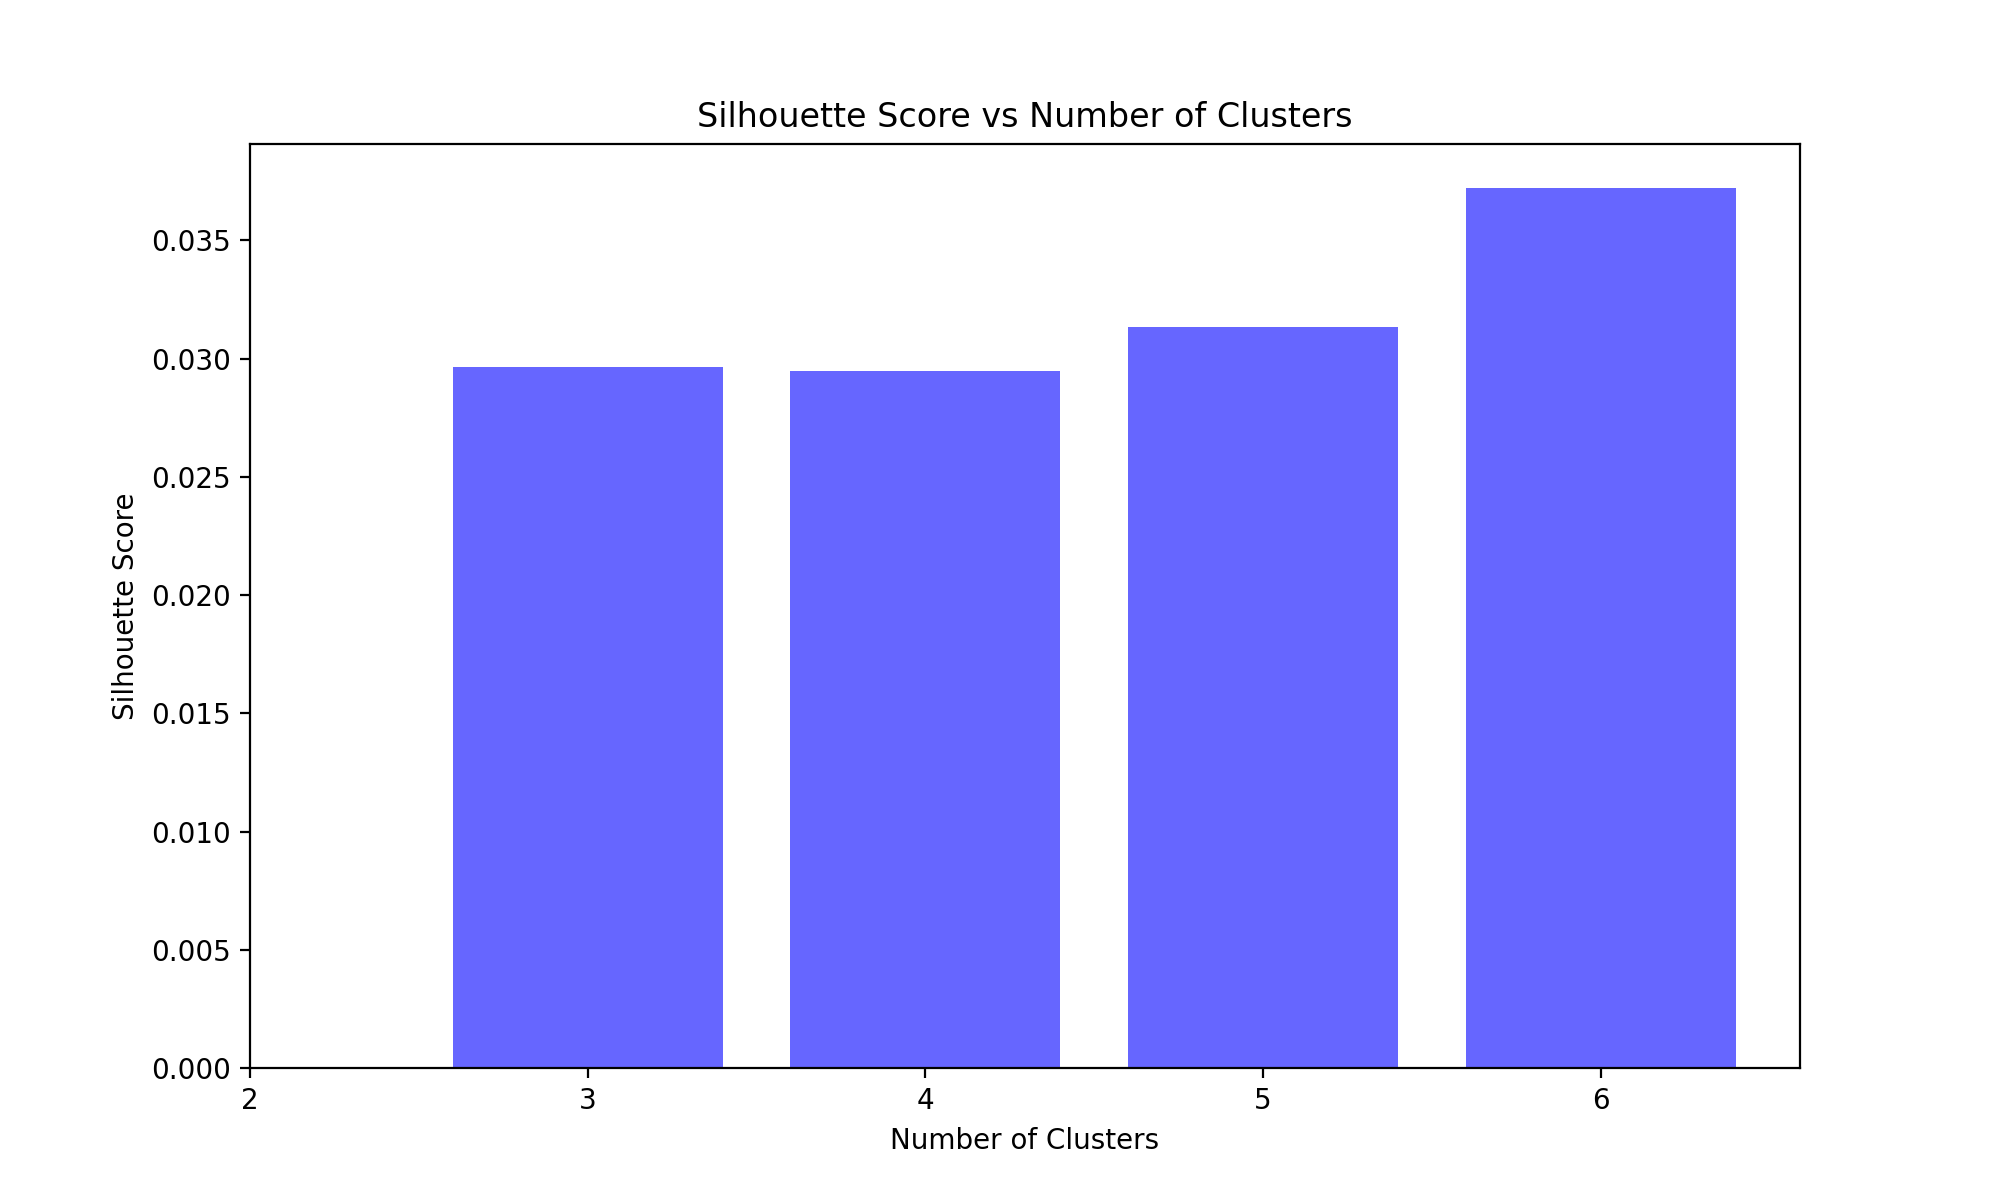

In [97]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize a DataFrame to store the count of cells for each cluster and each n_clusters value
cluster_counts_df = pd.DataFrame()

# Initialize a dictionary to store the Silhouette score for each n_clusters value
silhouette_scores = {}

# Loop through the desired range of n_clusters values
for n_clusters in range(3, 7):  # from 2 to 6
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(adata_filtered_day8.X)

    # Compute the Silhouette score
    silhouette_avg = silhouette_score(adata_filtered_day8.X, kmeans.labels_)
    silhouette_scores[n_clusters] = silhouette_avg


# Plot Silhouette scores
plt.figure(figsize=(10, 6))
plt.bar(silhouette_scores.keys(), silhouette_scores.values(), color='b', alpha=0.6)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xticks(list(range(2, 7)))  # Adjust the ticks to match the range of n_clusters
plt.show()



In [89]:
print(adata_filtered_day8.X.shape)


(1891, 15000)


In [71]:
cluster_day8 = mmdata_day8.obs['a']

In [72]:
with open('Desktop/EMT_Optimal_Transport/cell_set_day8.txt', 'w') as f:
    for i in range(mmdata_day8.shape[0]):
        f.write(mmdata_day8.obs.index[i] + '\t' + cluster_day8[i] + '\n')

In [9]:
VAR_DS_PATH_day0 = 'Desktop/EMT_Optimal_Transport/PNAS_Expression_Matrix_day0.txt'
CELL_DAYS_PATH_day0 = 'Desktop/EMT_Optimal_Transport/PNAS_Cells_Days_day0.txt'

In [10]:
days_df_day0 = pd.read_csv(CELL_DAYS_PATH_day0, index_col='id', sep='\t')

In [33]:
days_df_day0

day
id                             
MCF10A_t4_AAACCTGGTTGTCTTT    4
MCF10A_t4_AAACGGGCATACGCTA    4
MCF10A_t4_AAAGATGTCCGAAGAG    4
MCF10A_t4_AAAGCAACATCCGCGA    4
MCF10A_t4_AAAGCAAGTTAGGGTG    4
...                         ...
MCF10A_t3_TTTGGTTTCGAGCTGC    3
MCF10A_t3_TTTGGTTTCTTCGTGC    3
MCF10A_t3_TTTGTTGAGCGTACAG    3
MCF10A_t3_TTTGTTGAGGATACAT    3
MCF10A_t3_TTTGTTGCAATCCAGT    3

[12588 rows x 1 columns]

In [12]:
adata_var_day0 = wot.io.read_dataset(VAR_DS_PATH_day0, obs=[days_df_day0])


/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))


In [13]:
 mmdata_day0 = io.MultimodalData(adata_var_day0)

In [14]:
pg.pca(mmdata_day0, features=None)


2023-09-02 19:00:23,220 - pegasus.tools.preprocessing - INFO - Function 'pca' finished in 1.63s.


In [15]:
pg.neighbors(mmdata_day0)

2023-09-02 19:00:28,756 - pegasus.tools.nearest_neighbors - INFO - Function 'get_neighbors' finished in 0.44s.
2023-09-02 19:00:28,823 - pegasus.tools.nearest_neighbors - INFO - Function 'calculate_affinity_matrix' finished in 0.07s.


In [16]:
pg.diffmap(mmdata_day0)

2023-09-02 19:00:29,823 - pegasus.tools.diffusion_map - INFO - Calculating connected components is done.
2023-09-02 19:00:29,835 - pegasus.tools.diffusion_map - INFO - Calculating normalized affinity matrix is done.
2023-09-02 19:00:30,645 - pegasus.tools.diffusion_map - INFO - Detected knee point at t = 47.
2023-09-02 19:00:30,647 - pegasus.tools.diffusion_map - INFO - Function 'diffmap' finished in 0.83s.


In [27]:
pg.fle(mmdata_day0)


2023-09-02 19:01:51,991 - pegasus.tools.nearest_neighbors - INFO - Found cached kNN results, no calculation is required.
2023-09-02 19:01:51,994 - pegasus.tools.nearest_neighbors - INFO - Function 'get_neighbors' finished in 0.00s.
2023-09-02 19:01:52,053 - pegasus.tools.nearest_neighbors - INFO - Function 'calculate_affinity_matrix' finished in 0.06s.
2023-09-02 19:01:52,081 - pegasus.tools.graph_operations - INFO - Function 'construct_graph' finished in 0.03s.


Sep 02, 2023 7:01:53 PM org.netbeans.modules.masterfs.watcher.Watcher getNotifierForPlatform
INFO: Native file watcher is disabled
Sep 02, 2023 7:01:53 PM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Nodes loaded: 2,734
Sep 02, 2023 7:01:53 PM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Edges loaded: 86,191


100 iterations, change_per_node = 25.35059537245397
200 iterations, change_per_node = 7.823047263880659
300 iterations, change_per_node = 3.1504234890006333
Finished in 344 iterations, change_per_node = 1.7802052470470517
Time = 3.308s
2023-09-02 19:01:55,959 - pegasus.tools.visualization - INFO - Function 'fle' finished in 3.97s.


In [28]:
coords_day0 = mmdata_day0.obsm['X_fle']

In [29]:
with open('Desktop/EMT_Optimal_Transport/FLE_coords_day0.txt', 'w') as f:
    for i in range(coords_day0.shape[0]):
        f.write(mmdata_day0.obs.index[i] + '\t' + str(coords_day0[i, 0]) + '\t' + str(coords_day0[i, 1]) +  '\n')

In [30]:
FLE_COORDS_PATH_day0 ='Desktop/EMT_Optimal_Transport/FLE_coords_day0.txt'


In [32]:
coord_df_day0 = pd.read_csv(FLE_COORDS_PATH_day0, index_col='id', sep='\t')


In [164]:
adata_day0 = wot.io.read_dataset(VAR_DS_PATH_day0, obs=[days_df_day0, coord_df_day0])


/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))


In [165]:
unique_days_day0 = adata_day0.obs['day'].unique()
unique_days_day0 = unique_days_day0[np.isnan(unique_days_day0) == False]

Text(0.5, 1.0, 'Day')

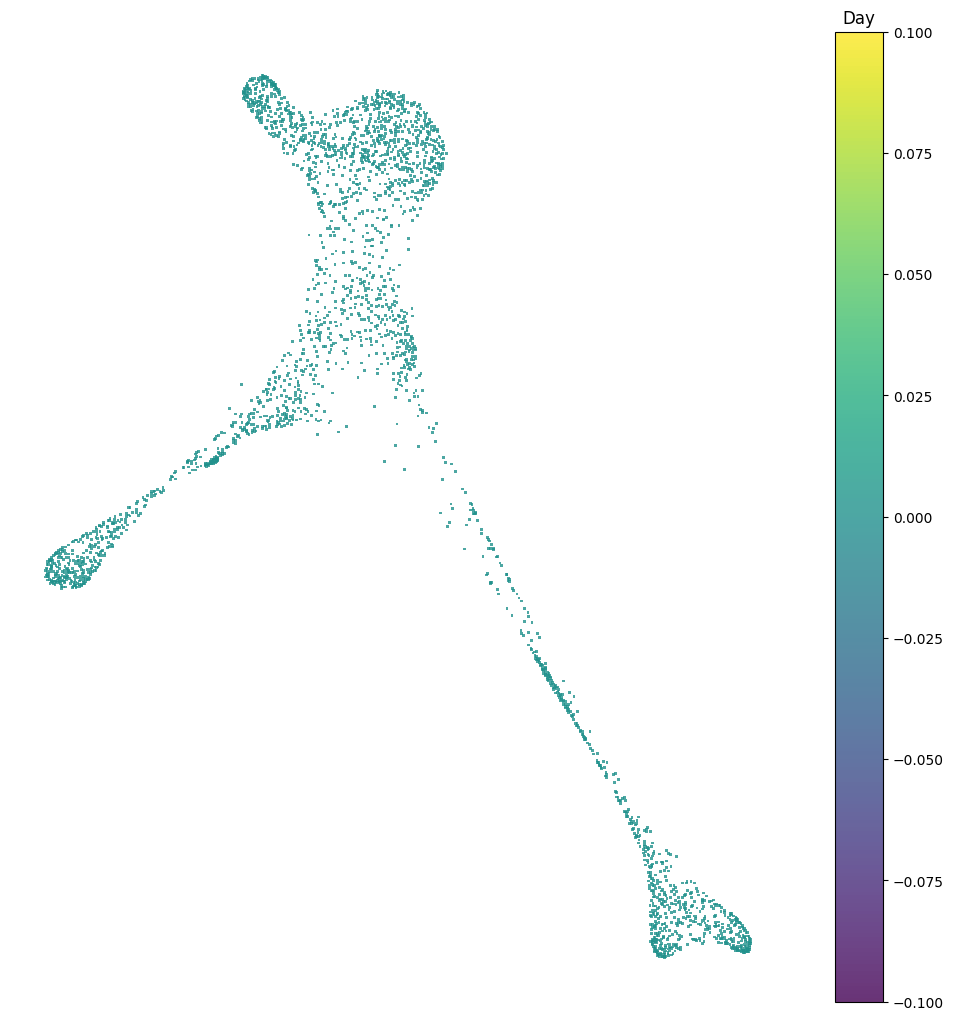

In [166]:
# plot visualization coordinates
figure = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.tight_layout()
plt.scatter(adata_day0.obs['x'], adata_day0.obs['y'],c=adata_day0.obs['day'],
               s=4, marker=',', edgecolors='none', alpha=0.8)
cb = plt.colorbar()
cb.ax.set_title('Day')


In [174]:
 pg.cluster(mmdata_day0, algo = 'leiden', resolution=0.5, class_label = "a")

2022-11-05 16:57:40,318 - pegasus.tools.graph_operations - INFO - Function 'construct_graph' finished in 0.08s.
2022-11-05 16:57:40,451 - pegasus.tools.clustering - INFO - Leiden clustering is done. Get 4 clusters.
2022-11-05 16:57:40,453 - pegasus.tools.clustering - INFO - Function 'leiden' finished in 0.22s.


In [175]:
cluster_day0 = mmdata_day0.obs['a']

In [36]:
with open('Desktop/EMT_Optimal_Transport/cell_set_day0.txt', 'w') as f:
    for i in range(mmdata_day0.shape[0]):
        f.write(mmdata_day0.obs.index[i] + '\t' + cluster_day0[i] + '\n')

NameError: name 'cluster_day0' is not defined

In [37]:
 mmdata = io.MultimodalData(adata_var)

NameError: name 'adata_var' is not defined

In [10]:
pg.pca(mmdata, features=None)


2022-11-04 23:01:35,982 - pegasus.tools.preprocessing - INFO - Function 'pca' finished in 6.21s.


In [11]:
pg.neighbors(mmdata)

2022-11-04 23:01:40,064 - pegasus.tools.nearest_neighbors - INFO - Function 'get_neighbors' finished in 1.42s.
2022-11-04 23:01:40,366 - pegasus.tools.nearest_neighbors - INFO - Function 'calculate_affinity_matrix' finished in 0.30s.


In [12]:
pg.diffmap(mmdata)

2022-11-04 23:01:43,326 - pegasus.tools.diffusion_map - INFO - Calculating connected components is done.
2022-11-04 23:01:43,365 - pegasus.tools.diffusion_map - INFO - Calculating normalized affinity matrix is done.
2022-11-04 23:01:46,703 - pegasus.tools.diffusion_map - INFO - Detected knee point at t = 63.
2022-11-04 23:01:46,706 - pegasus.tools.diffusion_map - INFO - Function 'diffmap' finished in 3.40s.


In [13]:
pg.fle(mmdata)


2022-11-04 23:01:51,911 - pegasus.tools.nearest_neighbors - INFO - Function 'get_neighbors' finished in 1.46s.
2022-11-04 23:01:52,107 - pegasus.tools.nearest_neighbors - INFO - Function 'calculate_affinity_matrix' finished in 0.20s.
2022-11-04 23:01:52,224 - pegasus.tools.graph_operations - INFO - Function 'construct_graph' finished in 0.12s.


Nov 04, 2022 11:01:53 PM org.netbeans.modules.masterfs.watcher.Watcher getNotifierForPlatform
INFO: Native file watcher is disabled
Nov 04, 2022 11:01:55 PM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Nodes loaded: 12,588
Nov 04, 2022 11:01:55 PM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Edges loaded: 381,097


100 iterations, change_per_node = 49.248604037201204
200 iterations, change_per_node = 44.86055930097875
300 iterations, change_per_node = 24.42254357091418
400 iterations, change_per_node = 8.339320308938104
500 iterations, change_per_node = 7.836220448544156
600 iterations, change_per_node = 12.620674283324247
700 iterations, change_per_node = 6.777015345356839
800 iterations, change_per_node = 5.544547373601993
900 iterations, change_per_node = 5.340124171564667
1000 iterations, change_per_node = 7.067646846645355
1100 iterations, change_per_node = 5.699571380822627
1200 iterations, change_per_node = 4.086387929697965
1300 iterations, change_per_node = 5.786505107779587
1400 iterations, change_per_node = 5.678589690678355
1500 iterations, change_per_node = 3.5837610800219997
1600 iterations, change_per_node = 5.503436393086469
1700 iterations, change_per_node = 7.076039980751344
1800 iterations, change_per_node = 9.308058585964494
1900 iterations, change_per_node = 7.57472141739191


2100 iterations, change_per_node = 2.332236585372666
Finished in 2170 iterations, change_per_node = 1.6132382537578696
Time = 31.569s
2022-11-04 23:02:24,918 - pegasus.tools.visualization - INFO - Function 'fle' finished in 34.46s.


In [14]:
figure = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.tight_layout()

In [13]:
coords = mmdata.obsm['X_fle']

NameError: name 'mmdata' is not defined

In [9]:
with open('Desktop/EMT_Optimal_Transport/FLE_coords.txt', 'w') as f:
    for i in range(coords.shape[0]):
        f.write(mmdata.obs.index[i] + '\t' + str(coords[i, 0]) + '\t' + str(coords[i, 1]) +  '\n')

NameError: name 'coords' is not defined

In [11]:
FLE_COORDS_PATH ='Desktop/EMT_Optimal_Transport/FLE_coords.txt'


In [12]:
coord_df = pd.read_csv(FLE_COORDS_PATH, index_col='id', sep='\t')


In [13]:
print(coord_df)

                                     x            y
id                                                 
MCF10A_t4_AAACCTGGTTGTCTTT  -6904.4390  16087.58200
MCF10A_t4_AAACGGGCATACGCTA   6516.0034  -2783.17870
MCF10A_t4_AAAGATGTCCGAAGAG   7982.5703    598.64340
MCF10A_t4_AAAGCAACATCCGCGA -11109.0810  15296.31800
MCF10A_t4_AAAGCAAGTTAGGGTG -10213.2030  13516.45800
...                                ...          ...
MCF10A_t3_TTTGGTTTCGAGCTGC   4346.2207  12597.01400
MCF10A_t3_TTTGGTTTCTTCGTGC   7018.0680   -417.41640
MCF10A_t3_TTTGTTGAGCGTACAG   3866.7644   -172.76889
MCF10A_t3_TTTGTTGAGGATACAT   1390.7549 -25357.09000
MCF10A_t3_TTTGTTGCAATCCAGT   4647.6670   8791.35200

[12588 rows x 2 columns]


In [14]:
print(days_df)

                            day
id                             
MCF10A_t4_AAACCTGGTTGTCTTT    4
MCF10A_t4_AAACGGGCATACGCTA    4
MCF10A_t4_AAAGATGTCCGAAGAG    4
MCF10A_t4_AAAGCAACATCCGCGA    4
MCF10A_t4_AAAGCAAGTTAGGGTG    4
...                         ...
MCF10A_t3_TTTGGTTTCGAGCTGC    3
MCF10A_t3_TTTGGTTTCTTCGTGC    3
MCF10A_t3_TTTGTTGAGCGTACAG    3
MCF10A_t3_TTTGTTGAGGATACAT    3
MCF10A_t3_TTTGTTGCAATCCAGT    3

[12588 rows x 1 columns]


In [15]:
merged_df = pd.merge(coord_df, days_df, left_index=True, right_index=True)

In [16]:
print(merged_df)

                                     x            y  day
id                                                      
MCF10A_t4_AAACCTGGTTGTCTTT  -6904.4390  16087.58200    4
MCF10A_t4_AAACGGGCATACGCTA   6516.0034  -2783.17870    4
MCF10A_t4_AAAGATGTCCGAAGAG   7982.5703    598.64340    4
MCF10A_t4_AAAGCAACATCCGCGA -11109.0810  15296.31800    4
MCF10A_t4_AAAGCAAGTTAGGGTG -10213.2030  13516.45800    4
...                                ...          ...  ...
MCF10A_t3_TTTGGTTTCGAGCTGC   4346.2207  12597.01400    3
MCF10A_t3_TTTGGTTTCTTCGTGC   7018.0680   -417.41640    3
MCF10A_t3_TTTGTTGAGCGTACAG   3866.7644   -172.76889    3
MCF10A_t3_TTTGTTGAGGATACAT   1390.7549 -25357.09000    3
MCF10A_t3_TTTGTTGCAATCCAGT   4647.6670   8791.35200    3

[12588 rows x 3 columns]


In [15]:
def read_gmt_file(file_path):
    gene_sets = {}

    with open(file_path, 'r') as f:
        for line in f:
            split_line = line.strip().split('\t')
            gene_set_name = split_line[0]
            gene_list = split_line[2:]  # The gene list starts from the third element
            gene_sets[gene_set_name] = gene_list

    return gene_sets

Cells_cluster_day_8 = read_gmt_file('Desktop/EMT_Optimal_Transport/cell_cluster_rename.gmt')

In [16]:
list(Cells_cluster_day_8)

['Low EMT', 'High EMT', 'Medium EMT']

In [17]:
# Reverse the dictionary
reverse_dict = {cell_id: status for status, cell_ids in Cells_cluster_day_8.items() for cell_id in cell_ids}

# Map the EMT status onto the dataframe
merged_df['EMT'] = pd.Series(merged_df.index).map(reverse_dict).values


In [18]:
# Convert EMT column to categorical type
merged_df['EMT'] = merged_df['EMT'].astype('category')

# Create the dummy variables
dummy_df = pd.get_dummies(merged_df['EMT'])

# Merge the dummy variables with the original DataFrame
merged_df = pd.concat([merged_df, dummy_df], axis=1)

# Drop the original 'EMT' column
merged_df = merged_df.drop(columns=['EMT'])


In [19]:
print(merged_df)


                                     x            y  day  High EMT  Low EMT  \
id                                                                            
MCF10A_t4_AAACCTGGTTGTCTTT  -6904.4390  16087.58200    4         0        0   
MCF10A_t4_AAACGGGCATACGCTA   6516.0034  -2783.17870    4         0        0   
MCF10A_t4_AAAGATGTCCGAAGAG   7982.5703    598.64340    4         0        0   
MCF10A_t4_AAAGCAACATCCGCGA -11109.0810  15296.31800    4         0        0   
MCF10A_t4_AAAGCAAGTTAGGGTG -10213.2030  13516.45800    4         0        0   
...                                ...          ...  ...       ...      ...   
MCF10A_t3_TTTGGTTTCGAGCTGC   4346.2207  12597.01400    3         0        0   
MCF10A_t3_TTTGGTTTCTTCGTGC   7018.0680   -417.41640    3         0        0   
MCF10A_t3_TTTGTTGAGCGTACAG   3866.7644   -172.76889    3         0        0   
MCF10A_t3_TTTGTTGAGGATACAT   1390.7549 -25357.09000    3         0        0   
MCF10A_t3_TTTGTTGCAATCCAGT   4647.6670   8791.35200 

In [120]:
df_FLE = pd.read_csv('Desktop/EMT_Optimal_Transport/FLE_coords_S.log', sep='\t', header=None)
df_FLE

0          1             2  3
0      MCF10A_t4_AAACCTGGTTGTCTTT -5789.5940  16504.246000  4
1      MCF10A_t4_AAACGGGCATACGCTA  6235.5350  -3247.665800  4
2      MCF10A_t4_AAAGATGTCCGAAGAG  7938.4710      3.120892  4
3      MCF10A_t4_AAAGCAACATCCGCGA -9981.8000  15988.693000  4
4      MCF10A_t4_AAAGCAAGTTAGGGTG -9264.6250  14137.026000  4
...                           ...        ...           ... ..
12583  MCF10A_t3_TTTGGTTTCGAGCTGC  5063.2246  12293.264000  3
12584  MCF10A_t3_TTTGGTTTCTTCGTGC  6891.6147   -936.069030  3
12585  MCF10A_t3_TTTGTTGAGCGTACAG  3789.1120   -425.396240  3
12586  MCF10A_t3_TTTGTTGAGGATACAT  -952.9902 -25215.613000  3
12587  MCF10A_t3_TTTGTTGCAATCCAGT  5136.3310   8473.238000  3

[12588 rows x 4 columns]

In [121]:
df_FLE_subset = df_FLE[df_FLE.iloc[:, 3] == 8]
df_FLE_subset

0           1             2  3
1147  MCF10A_t8_AAACCTGAGACTTGAA  10297.2550  13108.997000  8
1148  MCF10A_t8_AAACCTGAGCGAAGGG  11760.6440  14709.328000  8
1149  MCF10A_t8_AAACCTGAGTCATGCT   7880.2383    -25.020695  8
1150  MCF10A_t8_AAACCTGCACGACTCG   3546.7356   3670.141600  8
1151  MCF10A_t8_AAACCTGCACGCCAGT -12711.7200  17477.625000  8
...                          ...         ...           ... ..
3033  MCF10A_t8_TTTGGTTTCTTGTACT   8265.1470   1874.305900  8
3034  MCF10A_t8_TTTGTCACACCATCCT  -9793.1660  15926.473000  8
3035  MCF10A_t8_TTTGTCAGTTCTGGTA -10568.4920  14021.086000  8
3036  MCF10A_t8_TTTGTCATCATTATCC  10299.0220  11067.524000  8
3037  MCF10A_t8_TTTGTCATCTCCCTGA  10118.5220  12918.501000  8

[1891 rows x 4 columns]

In [122]:
# Extract the second and third columns into a new DataFrame
subset_df_array = df_FLE_subset.iloc[:, [1, 2]]

# Convert the DataFrame to a NumPy array
subset_df_array = subset_df_array.to_numpy()

subset_df_array

array([[ 10297.255   ,  13108.997   ],
       [ 11760.644   ,  14709.328   ],
       [  7880.2383  ,    -25.020695],
       ...,
       [-10568.492   ,  14021.086   ],
       [ 10299.022   ,  11067.524   ],
       [ 10118.522   ,  12918.501   ]])

For n_clusters = 2, the average silhouette_score is: 0.6284633110799986
For n_clusters = 3, the average silhouette_score is: 0.6451599680861436
For n_clusters = 4, the average silhouette_score is: 0.6678050618165615
For n_clusters = 5, the average silhouette_score is: 0.6005150680836778
For n_clusters = 6, the average silhouette_score is: 0.510571947592666
Cluster Counts:
   n_clusters_2  n_clusters_3  n_clusters_4  n_clusters_5  n_clusters_6
0         588.0         746.0         589.0         722.0           308
1        1303.0         589.0         549.0         195.0           195
2           NaN         556.0         721.0         544.0           526
3           NaN           NaN          32.0         398.0            30
4           NaN           NaN           NaN          32.0           434
5           NaN           NaN           NaN           NaN           398


<IPython.core.display.Javascript object>


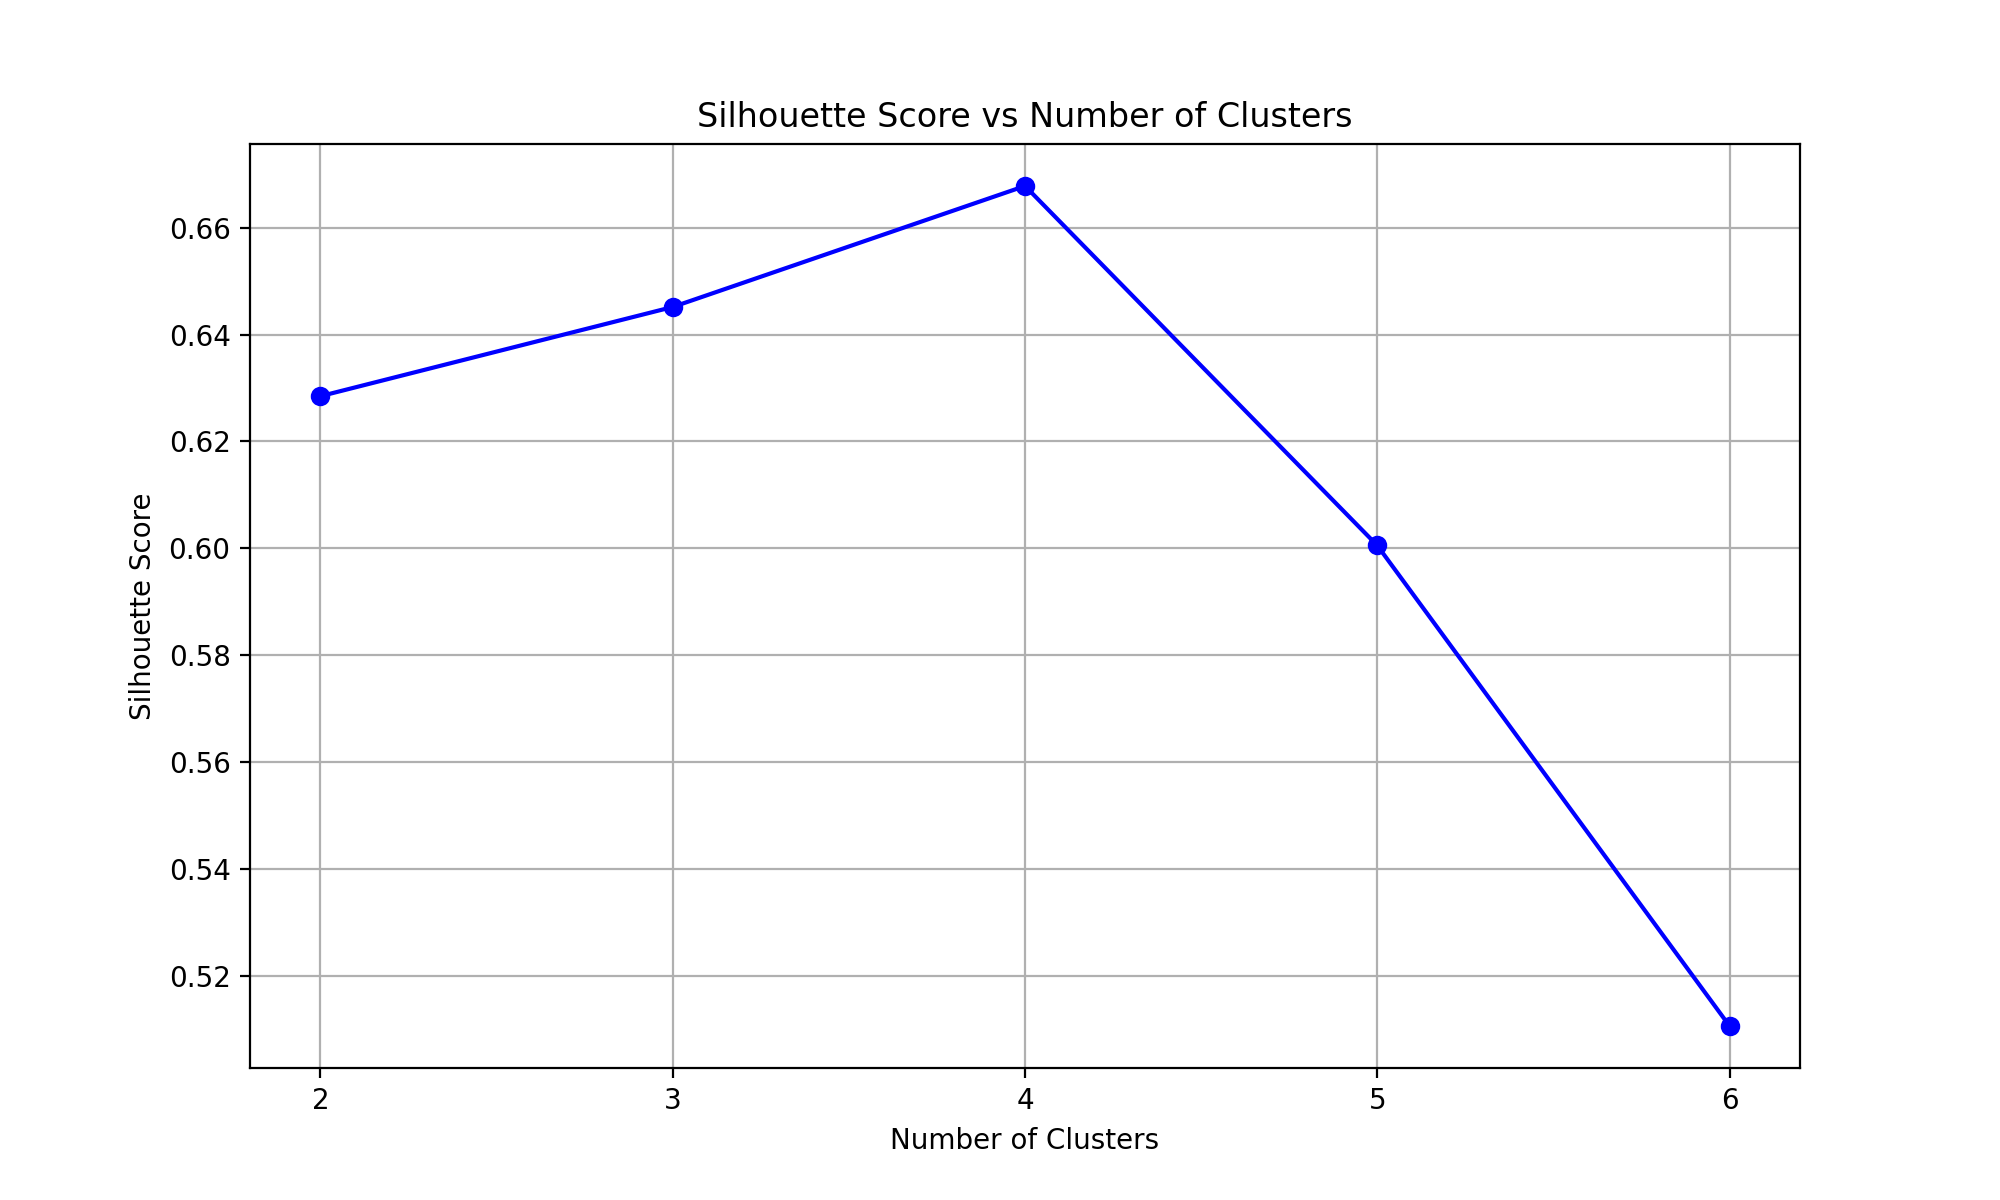

In [127]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Initialize a DataFrame to store the count of items for each cluster and each n_clusters value
cluster_counts_df = pd.DataFrame()

# Initialize a dictionary to store the Silhouette score for each n_clusters value
silhouette_scores = {}

# Loop through the desired range of n_clusters values
for n_clusters in range(2, 7):  # from 2 to 6
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(subset_df_array)  # Assuming subset_df_array is your data array

    # Compute the Silhouette score
    silhouette_avg = silhouette_score(subset_df_array, kmeans.labels_)
    silhouette_scores[n_clusters] = silhouette_avg
    
    # Print the Silhouette score for this value of n_clusters
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

    # Count the number of items in each cluster
    cluster_counts = pd.Series(kmeans.labels_).value_counts().sort_index()
    cluster_counts.name = f'n_clusters_{n_clusters}'
    cluster_counts_df = pd.concat([cluster_counts_df, cluster_counts], axis=1)

# Print the cluster counts DataFrame
print("Cluster Counts:")
print(cluster_counts_df)

# Plot Silhouette scores using a line plot
plt.figure(figsize=(10, 6))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xticks(list(range(2, 7)))  # Adjust the ticks to match the range of n_clusters
plt.grid(True)
plt.show()




#  plots FLE coordinates colored by day.

In [17]:
# Read expression matrix, cell days, and 2-d coordinates
adata = wot.io.read_dataset(VAR_DS_PATH, obs=[days_df,coord_df])
unique_days = adata.obs['day'].unique()
unique_days = unique_days[np.isnan(unique_days) == False]

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))


In [18]:
unique_days_r = np.array([0,1,2,3,4,8])

<IPython.core.display.Javascript object>


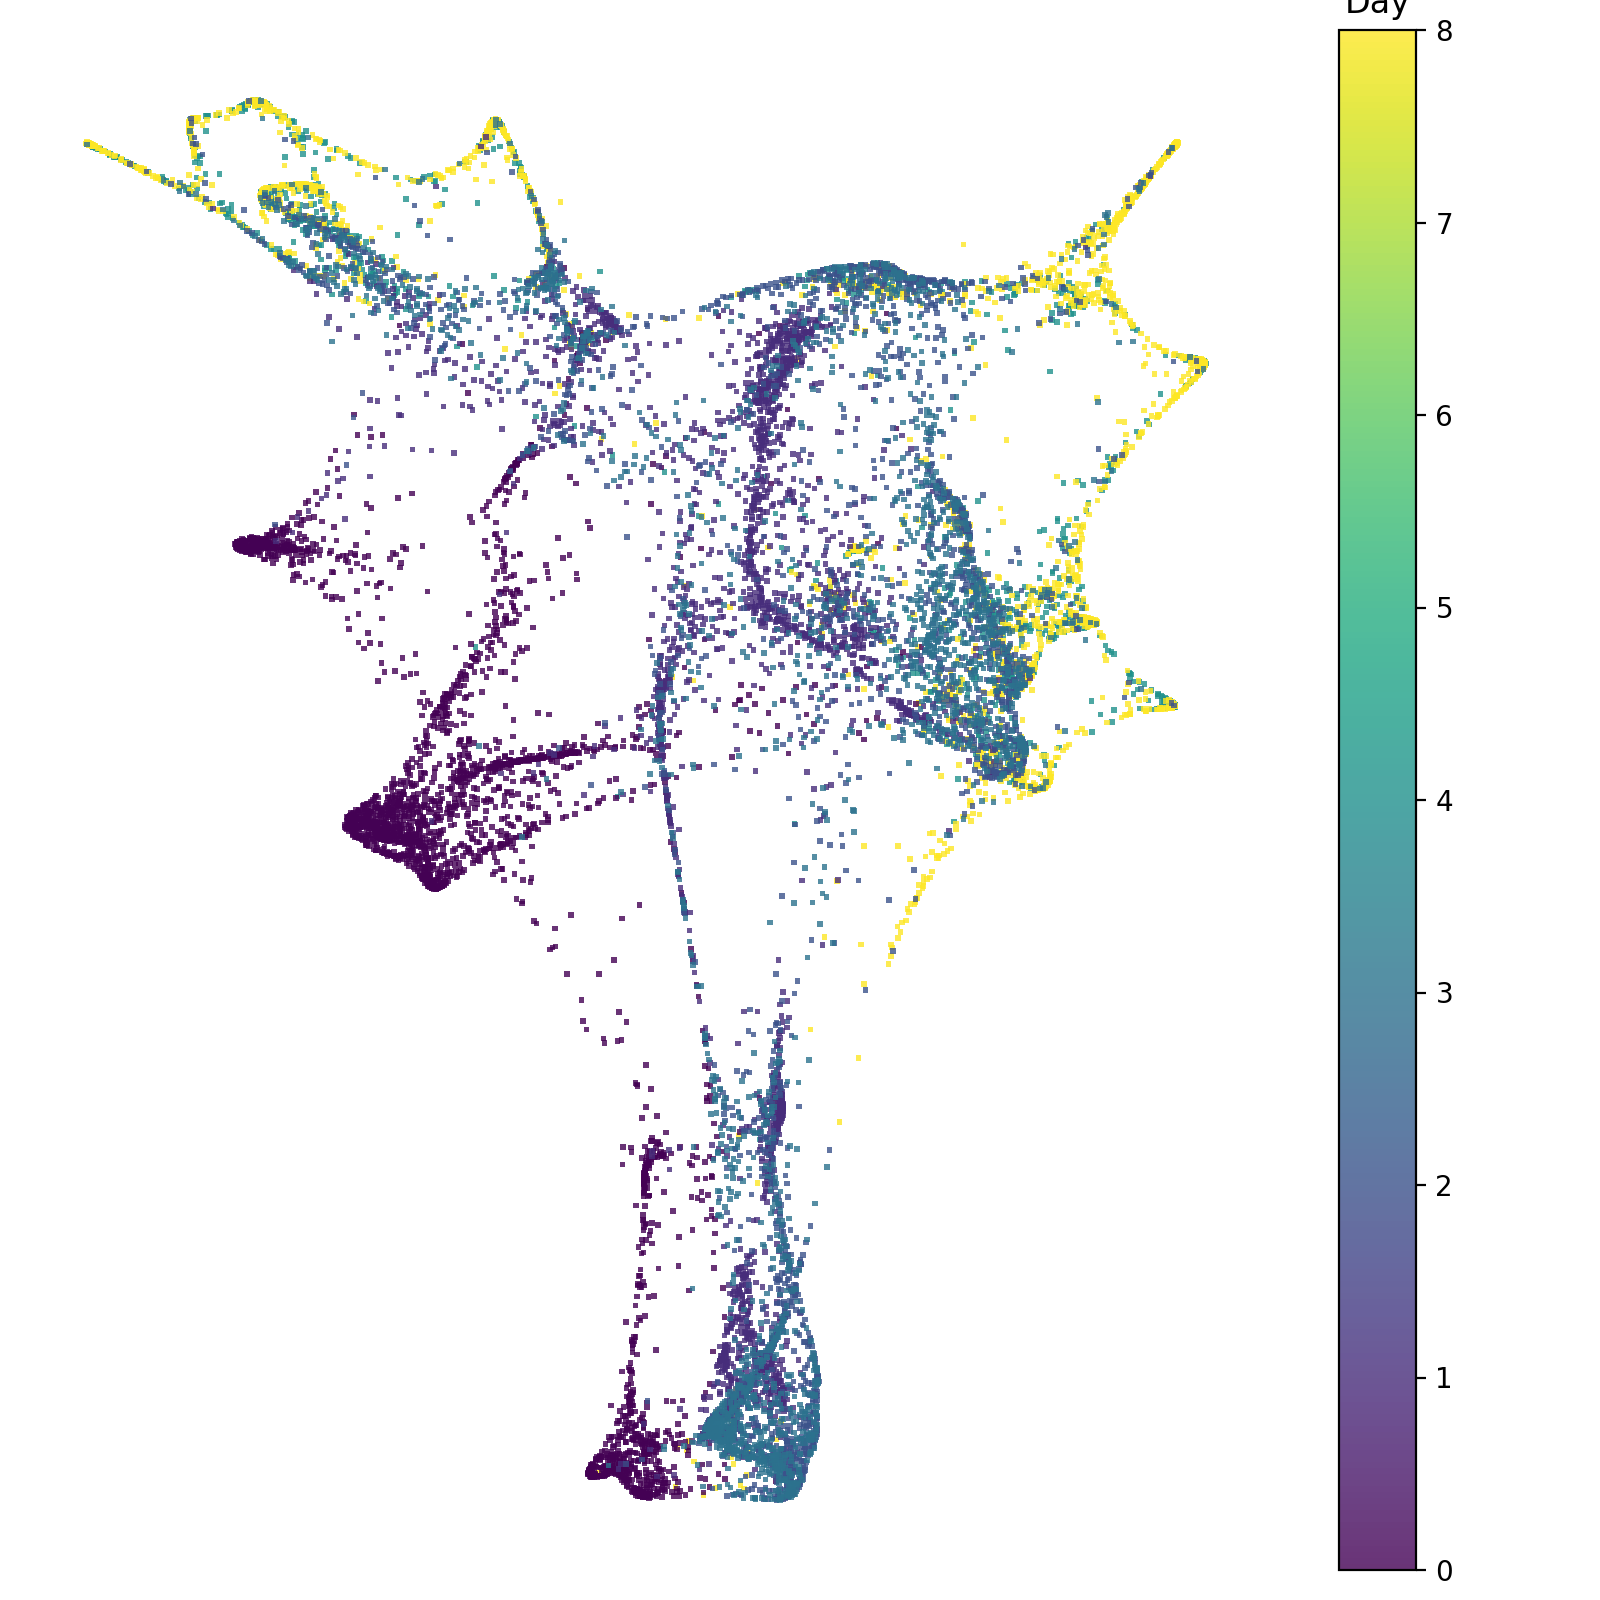

In [20]:
# plot visualization coordinates
figure = plt.figure(figsize=(8, 8))
plt.axis('off')
plt.tight_layout()
plt.scatter(adata.obs['x'], adata.obs['y'],c=adata.obs['day'],
               s=4, marker=',', edgecolors='none', alpha=0.8)
cb = plt.colorbar()
cb.ax.set_title('Day')
plt.show()


In [21]:
day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=False,
    index=(0,len(unique_days)-1),
    description='Days'
)

In [22]:
def update_whole_cell_vis(days):
    cell_set_coords = adata.obs[(adata.obs['day']>=days[0]) & (adata.obs['day']<=days[1])]
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(', days {}-{}, {:,} cells'.format(days[0], days[1], cell_set_coords.shape[0]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(cell_set_coords['x'], cell_set_coords['y'], c="peru",
                   s=4, marker=',', edgecolors='none', vmin=unique_days[0],  vmax=unique_days[len(unique_days)-1])
    cb = plt.colorbar()
    cb.ax.set_title('Day')

In [23]:
widgets.interact(update_whole_cell_vis, days=day_selector)

interactive(children=(SelectionRangeSlider(continuous_update=False, description='Days', index=(0, 5), options=…

<function __main__.update_whole_cell_vis(days)>

# Compute gene signature scores¶


In [24]:
GENE_SETS_PATH = 'Desktop/EMT_Optimal_Transport/hallmark_pathways.gmt'


In [25]:
gs = wot.io.read_sets(GENE_SETS_PATH, adata.var.index.values)
gene_set_scores_df = pd.DataFrame(index=adata.obs.index)
for j in range(gs.shape[1]):
    gene_set_name = str(gs.var.index.values[j])
    result = wot.score_gene_sets(ds=adata, gs=gs[:, [j]], permutations=0, method='mean_z_score')
    gene_set_scores_df[gene_set_name] = result['score']
ratio_1 = 'HALLMARK_GLYCOLYSIS' + str("") + str("/") + str("") +  'HALLMARK_OXIDATIVE_PHOSPHORYLATION'
gene_set_scores_df[ratio_1] =  (gene_set_scores_df['HALLMARK_GLYCOLYSIS'] - np.amin(gene_set_scores_df['HALLMARK_GLYCOLYSIS']) + 1) / (gene_set_scores_df['HALLMARK_OXIDATIVE_PHOSPHORYLATION'] - np.amin(gene_set_scores_df['HALLMARK_OXIDATIVE_PHOSPHORYLATION'])+1)
gene_set_scores_df.to_csv('Desktop/EMT_Optimal_Transport/gene_set_scores.csv', index_label='id')

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:304: FutureWarning: X.dtype being converted to np.float32 from int8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=x, obs=obs, var=var)


In [26]:
GENE_SET_SCORES_PATH = 'Desktop/EMT_Optimal_Transport/gene_set_scores.csv'


In [27]:
gene_set_scores_df = pd.read_csv(GENE_SET_SCORES_PATH,index_col='id')
gene_set_dropdown = widgets.Dropdown(
    options=gene_set_scores_df.columns,
    description='Gene Set:'
)

gene_set_scores_df = gene_set_scores_df.join(coord_df).join(days_df)
day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=False,
    index=(0,len(unique_days)-1),
    description='Days'
)

def update_gene_set_vis(name, days):
    gene_set_score_coords = gene_set_scores_df[(gene_set_scores_df['day']>=days[0]) & (gene_set_scores_df['day']<=days[1])]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_set_score_coords['x'], gene_set_score_coords['y'], c=gene_set_score_coords[name], 
                   s=4, marker=',', edgecolors='none')
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(gene_set_score_coords[name], bins=500)
    return figure, figure2


def update_gene_set_vis_modified(name, days):
    gene_set_score_coords = gene_set_scores_df[(gene_set_scores_df['day']>=days[0]) & (gene_set_scores_df['day']<=days[1])]
    pd_series = gene_set_score_coords[name]    
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    gene_set_score_coords_modified = gene_set_score_coords[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_set_score_coords_modified['x'], gene_set_score_coords_modified['y'], c=pd_series_adjusted, 
                   s=4, marker=',', edgecolors='none')
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(pd_series_adjusted, bins=500)
    
    return figure, figure2

widgets.interact(update_gene_set_vis, name=gene_set_dropdown, days=day_selector)

interactive(children=(Dropdown(description='Gene Set:', options=('HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK…

<function __main__.update_gene_set_vis(name, days)>

# Compute single gene score - EMT

In [28]:
GENE_SINGLE_PATH = 'Desktop/EMT_Optimal_Transport/single_gene_MLR.gmt'


In [29]:
gss = wot.io.read_sets(GENE_SINGLE_PATH, adata.var.index.values)
gene_single_scores_df = pd.DataFrame(index=adata.obs.index)
for j in range(gss.shape[1]):
    gene_single_name = str(gss.var.index.values[j])
    result = wot.score_gene_sets(ds=adata, gs=gss[:, [j]], permutations=0, method='mean_z_score')
    gene_single_scores_df[gene_single_name] = result['score']
ratio_1 = str(gss.var.index.values[0]) + str("") + str("/") + str("") +  str(gss.var.index.values[1])
ratio_2 = str(gss.var.index.values[2]) + str("") + str("/") + str("") +  str(gss.var.index.values[1])
ratio_3 = str(gss.var.index.values[1]) + str("") + str("/") + str("") +  str(gss.var.index.values[0])
gene_single_scores_df[ratio_1] =  (gene_single_scores_df['CDH1'] - np.amin(gene_single_scores_df['CDH1']) + 0.1)/(gene_single_scores_df['VIM'] - np.amin(gene_single_scores_df['VIM'])+0.1) 
gene_single_scores_df[ratio_2] =  (gene_single_scores_df['OVOL2'] - np.amin(gene_single_scores_df['OVOL2']) + 0.1)/(gene_single_scores_df['VIM']-np.amin(gene_single_scores_df['VIM'])+0.1)
gene_single_scores_df[ratio_3] =  (gene_single_scores_df['VIM'] - np.amin(gene_single_scores_df['VIM'])+0.1)/(gene_single_scores_df['CDH1']-np.amin(gene_single_scores_df['CDH1'])+0.1)
gene_single_scores_df.to_csv('Desktop/EMT_Optimal_Transport/gene_single_scores.csv', index_label='id')

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:304: FutureWarning: X.dtype being converted to np.float32 from int8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=x, obs=obs, var=var)


In [30]:
GENE_SINGLE_SCORES_PATH = 'Desktop/EMT_Optimal_Transport/gene_single_scores.csv'


In [31]:
gene_single_scores_df = pd.read_csv(GENE_SINGLE_SCORES_PATH,index_col='id')
gene_single_dropdown = widgets.Dropdown(
    options=gene_single_scores_df.columns,
    description='Gene Set:'
)

gene_single_scores_df = gene_single_scores_df.join(coord_df).join(days_df)
day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=False,
    index=(0,len(unique_days)-1),
    description='Days'
)

def update_gene_single_vis(name, days):
    gene_single_score_coords = gene_single_scores_df[(gene_single_scores_df['day']>=days[0]) & (gene_single_scores_df['day']<=days[1])]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_single_score_coords['x'], gene_single_score_coords['y'], c=gene_single_score_coords[name], 
                   s=4, marker=',', edgecolors='none')
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(gene_single_score_coords[name] , bins=500)
    
    return figure, figure2


def update_gene_single_vis_modified(name, days):
    gene_single_score_coords = gene_single_scores_df[(gene_single_scores_df['day']>=days[0]) & (gene_single_scores_df['day']<=days[1])]
    pd_series = gene_single_score_coords[name]    
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    gene_single_score_coords_modified = gene_single_score_coords[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_single_score_coords_modified['x'], gene_single_score_coords_modified['y'], c=pd_series_adjusted, 
                   s=4, marker=',', edgecolors='none', cmap = "Reds")
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(pd_series_adjusted, bins=500)
    
    return figure, figure2

widgets.interact(update_gene_single_vis_modified, name=gene_single_dropdown, days=day_selector)


interactive(children=(Dropdown(description='Gene Set:', options=('CDH1', 'VIM', 'OVOL2', 'TMEM125', 'CLDN7', '…

<function __main__.update_gene_single_vis_modified(name, days)>

# Compute single gene score - metabolism

In [32]:
GENE_SINGLE_PATH_METABOLISM = 'Desktop/EMT_Optimal_Transport/single_gene_metabolic.gmt'


In [33]:
gsm = wot.io.read_sets(GENE_SINGLE_PATH_METABOLISM, adata.var.index.values)
gene_single_scores_df_meta = pd.DataFrame(index=adata.obs.index)
for j in range(gsm.shape[1]):
    gene_single_name_meta = str(gsm.var.index.values[j])
    result = wot.score_gene_sets(ds=adata, gs=gsm[:, [j]], permutations=0, method='mean_z_score')
    gene_single_scores_df_meta[gene_single_name_meta] = result['score']
ratio_1 = str(gsm.var.index.values[0]) + str("") + str("/") + str("") +  str(gsm.var.index.values[1])
#gene_single_scores_df_meta[ratio_1] =  np.log(gene_single_scores_df_meta['HIF1A']/gene_single_scores_df_meta['PRKAA2'] + 100)
gene_single_scores_df_meta[ratio_1] =  (gene_single_scores_df_meta['HIF1A'] - np.amin(gene_single_scores_df_meta['HIF1A'])+ 0.1)/(gene_single_scores_df_meta['PRKAA2'] - np.amin(gene_single_scores_df_meta['PRKAA2'])+ 0.1)

gene_single_scores_df_meta.to_csv('Desktop/EMT_Optimal_Transport/gene_single_scores_metabolism.csv', index_label='id')

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:304: FutureWarning: X.dtype being converted to np.float32 from int8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=x, obs=obs, var=var)


In [34]:
GENE_SINGLE_SCORES_PATH_METABOLISM = 'Desktop/EMT_Optimal_Transport/gene_single_scores_metabolism.csv'


In [35]:
gene_single_scores_df_metabolism = pd.read_csv(GENE_SINGLE_SCORES_PATH_METABOLISM,index_col='id')
gene_single_dropdown_metabolism = widgets.Dropdown(
    options=gene_single_scores_df_metabolism.columns,
    description='Gene Set:'
)

gene_single_scores_df_metabolism = gene_single_scores_df_metabolism.join(coord_df).join(days_df)
day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=False,
    index=(0,len(unique_days)-1),
    description='Days'
)

def update_gene_single_vis_metabolism(name, days):
    gene_single_score_coords = gene_single_scores_df_metabolism[(gene_single_scores_df_metabolism['day']>=days[0]) & (gene_single_scores_df_metabolism['day']<=days[1])]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_single_score_coords['x'], gene_single_score_coords['y'], c=gene_single_score_coords[name], 
                   s=4, marker=',', edgecolors='none')
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(gene_single_score_coords[name] , bins=500)
    
    return figure, figure2


def update_gene_single_vis_modified_metabolism(name, days):
    gene_single_score_coords = gene_single_scores_df_metabolism[(gene_single_scores_df_metabolism['day']>=days[0]) & (gene_single_scores_df_metabolism['day']<=days[1])]
    pd_series = gene_single_score_coords[name]    
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    gene_single_score_coords_modified = gene_single_score_coords[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_single_score_coords_modified['x'], gene_single_score_coords_modified['y'], c=pd_series_adjusted, 
                   s=4, marker=',', edgecolors='none', cmap = "inferno")
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(pd_series_adjusted, bins=500)
    
    return figure, figure2

widgets.interact(update_gene_single_vis_modified_metabolism, name=gene_single_dropdown_metabolism, days=day_selector)


interactive(children=(Dropdown(description='Gene Set:', options=('HIF1A', 'PRKAA2', 'PRKAG2', 'HIF1A/PRKAA2'),…

<function __main__.update_gene_single_vis_modified_metabolism(name, days)>

# Compute single gene score - Stemness/reactome/Curated/EED/ALDH


In [36]:
GENE_SINGLE_PATH_STEM = 'Desktop/EMT_Optimal_Transport/single_gene_df_EED_CD44_ALDH.gmt'


In [37]:
gse = wot.io.read_sets(GENE_SINGLE_PATH_STEM, adata.var.index.values)
gene_single_scores_df_stem = pd.DataFrame(index=adata.obs.index)
for j in range(gse.shape[1]):
    gene_single_name_stem = str(gse.var.index.values[j])
    result = wot.score_gene_sets(ds=adata, gs=gse[:, [j]], permutations=0, method='mean_z_score')
    gene_single_scores_df_stem[gene_single_name_stem] = result['score']
#gene_single_scores_df_meta[ratio_1] =  np.log(gene_single_scores_df_meta['HIF1A']/gene_single_scores_df_meta['PRKAA2'] + 100)

gene_single_scores_df_stem.to_csv('Desktop/EMT_Optimal_Transport/single_gene_df_EED_CD44_ALDH.csv', index_label='id')



/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:304: FutureWarning: X.dtype being converted to np.float32 from int8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=x, obs=obs, var=var)
/opt/anaconda3/lib/python3.9/site-packages/wot/gene_set_scores.py:123: RuntimeWarning: Mean of empty slice.
  observed_scores = x.mean(axis=1)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/opt/anaconda3/lib/python3.9/site-packages/wot/gene_set_scores.py:123: RuntimeWarning: Mean of empty slice.
  observed_scores = x.mean(axis=1)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [38]:
GENE_SINGLE_SCORES_PATH_STEM = 'Desktop/EMT_Optimal_Transport/single_gene_df_EED_CD44_ALDH.csv'

In [39]:
gene_single_scores_df_stem = pd.read_csv(GENE_SINGLE_SCORES_PATH_STEM,index_col='id')
gene_single_dropdown_stem = widgets.Dropdown(
    options=gene_single_scores_df_stem.columns,
    description='Gene Set:'
)

gene_single_scores_df_stem = gene_single_scores_df_stem.join(coord_df).join(days_df)
day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=False,
    index=(0,len(unique_days)-1),
    description='Days'
)

def update_gene_single_vis_stem(name, days):
    gene_single_score_coords = gene_single_scores_df_stem[(gene_single_scores_df_stem['day']>=days[0]) & (gene_single_scores_df_stem['day']<=days[1])]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_single_score_coords['x'], gene_single_score_coords['y'], c=gene_single_score_coords[name], 
                   s=4, marker=',', edgecolors='none', cmap = "inferno")
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(gene_single_score_coords[name] , bins=500)
    
    return figure, figure2


def update_gene_single_vis_modified_stem(name, days):
    gene_single_score_coords = gene_single_scores_df_stem[(gene_single_scores_df_stem['day']>=days[0]) & (gene_single_scores_df_stem['day']<=days[1])]
    pd_series = gene_single_score_coords[name]    
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    gene_single_score_coords_modified = gene_single_score_coords[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_single_score_coords_modified['x'], gene_single_score_coords_modified['y'], c=pd_series_adjusted, 
                   s=4, marker=',', edgecolors='none', cmap = "inferno")
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(pd_series_adjusted, bins=500)
    
    return figure, figure2

widgets.interact(update_gene_single_vis_stem, name=gene_single_dropdown_stem, days=day_selector)


interactive(children=(Dropdown(description='Gene Set:', options=('ADD2', 'PRKAR2B', 'FGF13', 'NCAM1', 'NFASC',…

<function __main__.update_gene_single_vis_stem(name, days)>

# Compute single gene score - GRN


In [40]:
GENE_SINGLE_PATH_GRN = 'Desktop/EMT_Optimal_Transport/single_gene_GRN.gmt'


In [41]:
gse = wot.io.read_sets(GENE_SINGLE_PATH_GRN, adata.var.index.values)
gene_single_scores_df_GRN = pd.DataFrame(index=adata.obs.index)
for j in range(gse.shape[1]):
    gene_single_name_GRN = str(gse.var.index.values[j])
    result = wot.score_gene_sets(ds=adata, gs=gse[:, [j]], permutations=0, method='mean_z_score')
    gene_single_scores_df_GRN[gene_single_name_GRN] = result['score']
#gene_single_scores_df_meta[ratio_1] =  np.log(gene_single_scores_df_meta['HIF1A']/gene_single_scores_df_meta['PRKAA2'] + 100)

gene_single_scores_df_GRN.to_csv('Desktop/EMT_Optimal_Transport/gene_single_scores_GRN.csv', index_label='id')

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:304: FutureWarning: X.dtype being converted to np.float32 from int8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=x, obs=obs, var=var)


In [42]:
GENE_SINGLE_SCORES_PATH_GRN = 'Desktop/EMT_Optimal_Transport/gene_single_scores_GRN.csv'

In [43]:
gene_single_scores_df_GRN = pd.read_csv(GENE_SINGLE_SCORES_PATH_GRN,index_col='id')
gene_single_dropdown_GRN = widgets.Dropdown(
    options=gene_single_scores_df_GRN.columns,
    description='Gene Set:'
)

gene_single_scores_df_GRN = gene_single_scores_df_GRN.join(coord_df).join(days_df)
day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=False,
    index=(0,len(unique_days)-1),
    description='Days'
)

def update_gene_single_vis_GRN(name, days):
    gene_single_score_coords = gene_single_scores_df_GRN[(gene_single_scores_df_GRN['day']>=days[0]) & (gene_single_scores_df_GRN['day']<=days[1])]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_single_score_coords['x'], gene_single_score_coords['y'], c=gene_single_score_coords[name], 
                   s=4, marker=',', edgecolors='none')
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(gene_single_score_coords[name] , bins=500)
    
    return figure, figure2


def update_gene_single_vis_modified_GRN(name, days):
    gene_single_score_coords = gene_single_scores_df_GRN[(gene_single_scores_df_GRN['day']>=days[0]) & (gene_single_scores_df_GRN['day']<=days[1])]
    pd_series = gene_single_score_coords[name]    
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    gene_single_score_coords_modified = gene_single_score_coords[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_single_score_coords_modified['x'], gene_single_score_coords_modified['y'], c=pd_series_adjusted, 
                   s=4, marker=',', edgecolors='none', cmap = "inferno")
    cb = plt.colorbar()
    cb.ax.set_title('', fontsize=24)
    cb.ax.tick_params(labelsize=24)
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(pd_series_adjusted, bins=500)
    
    return figure, figure2

widgets.interact(update_gene_single_vis_modified_GRN, name=gene_single_dropdown_GRN, days=day_selector)



interactive(children=(Dropdown(description='Gene Set:', options=('CDH1', 'EPCAM', 'S100A9', 'NOTCH1', 'CDH2', …

<function __main__.update_gene_single_vis_modified_GRN(name, days)>

# Compute EMT/STEM/PROLIFERATION scores

In [44]:
GENE_SET_SCORES_PATH_EMT = 'Desktop/EMT_Optimal_Transport/scores.csv'

In [45]:
gene_set_scores_df_EMT = pd.read_csv(GENE_SET_SCORES_PATH_EMT,index_col='id')

gene_set_dropdown_EMT = widgets.Dropdown(
    options=gene_set_scores_df_EMT.columns,
    description='Gene Set:'
)

gene_set_scores_df_EMT = gene_set_scores_df_EMT.join(coord_df).join(days_df)
day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=False,
    index=(0, len(unique_days)-1),
    description='Days'
)

def update_gene_set_vis_EMT(name, days):
    gene_set_score_coords = gene_set_scores_df_EMT[(gene_set_scores_df_EMT['day']>=days[0]) & (gene_set_scores_df_EMT['day']<=days[1])]
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_set_score_coords['x'], gene_set_score_coords['y'], c=gene_set_score_coords[name],
                   s=4, marker=',', edgecolors='none')
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(gene_set_score_coords[name], bins=500)
    return figure, figure2

def update_gene_set_vis_EMT_modified(name, days):
    gene_set_score_coords = gene_set_scores_df_EMT[(gene_set_scores_df_EMT['day']>=days[0]) & (gene_set_scores_df_EMT['day']<=days[1])]
    pd_series = gene_set_score_coords[name]    
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    gene_set_score_coords_modified = gene_set_score_coords[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    figure = plt.figure(figsize=(9, 8))
    plt.axis('off')
    plt.tight_layout()
    plt.title(''.format(days[0], days[1]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_set_score_coords_modified['x'], gene_set_score_coords_modified['y'], c=pd_series_adjusted,
                   s=4, marker=',', edgecolors='none',  cmap = "inferno")
    cb = plt.colorbar()
    cb.ax.set_title('', fontsize=10)  # Change fontsize here
    cb.ax.tick_params(labelsize=26)  # Change label fontsize here
    figure2 = plt.figure(figsize=(10, 5))
    plt.title('')
    plt.hist(pd_series_adjusted, bins=500)
    return figure, figure2


widgets.interact(update_gene_set_vis_EMT_modified, name=gene_set_dropdown_EMT, days=day_selector)


interactive(children=(Dropdown(description='Gene Set:', options=('EMT_SCORE', 'EMT_SCORE_76GS', 'EMT_SCORE_76G…

<function __main__.update_gene_set_vis_EMT_modified(name, days)>

# Compute PNAS Stemness score

In [46]:
GENE_SET_SCORES_PATH_PNAS_stemness = 'Desktop/EMT_Optimal_Transport/PNAS_stemness_score.csv'

In [47]:
gene_set_scores_df_PNAS_stemness = pd.read_csv(GENE_SET_SCORES_PATH_PNAS_stemness,index_col='id')

gene_set_dropdown_PNAS_stemness = widgets.Dropdown(
    options=gene_set_scores_df_PNAS_stemness.columns,
    description='Gene Set:'
)

gene_set_scores_df_PNAS_stemness = gene_set_scores_df_PNAS_stemness.join(coord_df).join(days_df)
day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=False,
    index=(0, len(unique_days)-1),
    description='Days'
)

def update_gene_set_vis_PNAS_stemness(name, days):
    gene_set_score_coords = gene_set_scores_df_PNAS_stemness[(gene_set_scores_df_PNAS_stemness['day']>=days[0]) & (gene_set_scores_df_PNAS_stemness['day']<=days[1])]
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_set_score_coords['x'], gene_set_score_coords['y'], c=gene_set_score_coords[name],
                   s=4, marker=',', edgecolors='none')
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(gene_set_score_coords[name], bins=500)
    return figure, figure2

def update_gene_set_vis_PNAS_stemness_modified(name, days):
    gene_set_score_coords = gene_set_scores_df_PNAS_stemness[(gene_set_scores_df_PNAS_stemness['day']>=days[0]) & (gene_set_scores_df_PNAS_stemness['day']<=days[1])]
    pd_series = gene_set_score_coords[name]    
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    gene_set_score_coords_modified = gene_set_score_coords[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    figure = plt.figure(figsize=(9, 8))
    plt.axis('off')
    plt.tight_layout()
    plt.title('')
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_set_score_coords_modified['x'], gene_set_score_coords_modified['y'], c=pd_series_adjusted,
                   s=4, marker=',', edgecolors='none',  cmap = "inferno")
    cb = plt.colorbar()
    cb.ax.set_title('')
    cb.ax.tick_params(labelsize=26)
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(pd_series_adjusted, bins=500)
    return figure, figure2

widgets.interact(update_gene_set_vis_PNAS_stemness_modified, name=gene_set_dropdown_PNAS_stemness, days=day_selector)


interactive(children=(Dropdown(description='Gene Set:', options=('Benporath_ES2', 'Benporath_ES1', 'Kim_Myc', …

<function __main__.update_gene_set_vis_PNAS_stemness_modified(name, days)>

# Compute AUCell Scores 

In [48]:
GENE_SET_SCORES_PATH_AU = 'Desktop/EMT_Optimal_Transport/AUCell_scores.csv'

In [49]:
gene_set_scores_df_AU = pd.read_csv(GENE_SET_SCORES_PATH_AU,index_col='id')

gene_set_dropdown_AU = widgets.Dropdown(
    options=gene_set_scores_df_AU.columns,
    description='Gene Set:'
)

gene_set_scores_df_AU = gene_set_scores_df_AU.join(coord_df).join(days_df)
day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=False,
    index=(0, len(unique_days)-1),
    description='Days'
)

def update_gene_set_vis_AU(name, days):
    gene_set_score_coords = gene_set_scores_df_AU[(gene_set_scores_df_AU['day']>=days[0]) & (gene_set_scores_df_AU['day']<=days[1])]
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_set_score_coords['x'], gene_set_score_coords['y'], c=gene_set_score_coords[name],
                   s=4, marker=',', edgecolors='none')
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(gene_set_score_coords[name], bins=500)
    return figure, figure2

def update_gene_set_vis_AU_modified(name, days):
    gene_set_score_coords = gene_set_scores_df_AU[(gene_set_scores_df_AU['day']>=days[0]) & (gene_set_scores_df_AU['day']<=days[1])]
    pd_series = gene_set_score_coords[name]    
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    gene_set_score_coords_modified = gene_set_score_coords[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_set_score_coords_modified['x'], gene_set_score_coords_modified['y'], c=pd_series_adjusted,
                   s=4, marker=',', edgecolors='none', cmap = "Reds")
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(pd_series_adjusted, bins=500)
    return figure, figure2

widgets.interact(update_gene_set_vis_AU, name=gene_set_dropdown_AU, days=day_selector)



interactive(children=(Dropdown(description='Gene Set:', options=('Epi', 'Mes', 'HALLMARK_FATTY_ACID_METABOLISM…

<function __main__.update_gene_set_vis_AU(name, days)>

# How many genes used in each gene set for computing ssGSEA

In [50]:

import os

def read_txt_file(file_path):
    return pd.read_csv(file_path, header=None, names=['gene'])

def read_gmt_file(file_path):
    genes = []
    with open(file_path, 'r') as file:
        for line in file:
            splitted_line = line.strip().split("\t")[2:]
            genes.extend(splitted_line)
    return pd.DataFrame(genes, columns=['gene'])

# Define input files and parameters
adata = sc.read_csv('Desktop/EMT_Optimal_Transport/transposed_data_df.tsv', delimiter='\t')
adata_df = adata.to_df()

# List of gene set files
gene_set_files = ['Desktop/EMT_Optimal_Transport/TG_stemness.txt', 
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Pece_breast_cancer.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/WONG_EMBRYONIC_STEM_CELL_CORE.gmt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/LIM_MAMMARY_STEM_CELL_UP.gmt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/LEE_NEURAL_CREST_STEM_CELL_UP.gmt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/BHATTACHARYA_EMBRYONIC_STEM_CELL.gmt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_ES1.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_ES2.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Bhattacharya_hESC.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Shats_iPSC.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Shats_Consensus.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_Nanog.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_Sox2.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Kim_Myc.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Smith_Human.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Stem_Palmer.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Proliferative_Porath.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Curated.txt']

for gene_set_file in gene_set_files:
    file_name, file_ext = os.path.splitext(gene_set_file)
    file_name = os.path.basename(file_name)

    if file_ext == '.txt':
        gene_set = read_txt_file(gene_set_file)
    elif file_ext == '.gmt':
        gene_set = read_gmt_file(gene_set_file)
    else:
        print(f"Unsupported file format: {file_ext}")
        continue

    gene_list = [gene for gene in gene_set['gene'].tolist() if gene in adata_df.index]
    
    print(f"Gene set: {file_name}")
    print(f"Number of overlapping genes: {len(gene_list)}")
    print("Gene list:", gene_list)
    print("\n")



NameError: name 'sc' is not defined

# Compute ssGSEA

In [185]:
pip install gseapy


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [186]:
pip install scanpy


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [187]:
import gseapy as gp
import pandas as pd
import scanpy as sc

In [188]:
from scipy.stats import zscore

# Define input files and parameters
adata = sc.read_csv('Desktop/EMT_Optimal_Transport/transposed_data_df.tsv', delimiter='\t')
gene_set = pd.read_csv('Desktop/EMT_Optimal_Transport/TG_stem_Palmer.txt', header=None, names=['gene'])

# Convert the gene expression data to a pandas dataframe
adata_df = adata.to_df()

# Get the list of genes in the gene set that are present in the data
gene_list = [gene for gene in gene_set['gene'].tolist() if gene in adata_df.index]

# Print the number of overlapping genes
print(f"Number of overlapping genes: {len(gene_list)}")

# Calculate the ssGSEA score for the gene set in each cell
ssgsea_scores = gp.ssgsea(data=adata_df, gene_sets={'stem_Palmer': gene_list}, min_size=1, max_size=len(gene_list))

# Set the index of the resulting DataFrame to the cell names
ssgsea_scores.res2d.index = adata_df.columns

# Convert the 'ES' column to a numeric type, replacing non-numeric values with NaN
ssgsea_scores.res2d['ES'] = pd.to_numeric(ssgsea_scores.res2d['ES'], errors='coerce')

# Remove rows with NaN values in the 'ES' column
ssgsea_scores.res2d = ssgsea_scores.res2d.dropna(subset=['ES'])

# Scale the ssGSEA scores as z-scores
ssgsea_scores.res2d['zscore'] = zscore(ssgsea_scores.res2d['ES'])

# Save the ssGSEA z-scores as a CSV file
ssgsea_scores.res2d[['zscore']].to_csv('Desktop/EMT_Optimal_Transport/ssgsea_stem_scores.csv')

# View the results
print(ssgsea_scores.res2d[['zscore']])

Number of overlapping genes: 14999


2023-05-26 19:31:47,831 [ERROR] No gene sets passed through filtering condition !!! 
Hint 1: Try to lower min_size or increase max_size !
Hint 2: Check gene symbols are identifiable to your gmt input.
Hint 3: Gene symbols curated in Enrichr web services are all upcases.



KeyError: 'all_genes'

In [ ]:

# Define input files and parameters
adata = sc.read_csv('Desktop/EMT_Optimal_Transport/transposed_data_df.tsv', delimiter='\t')
gene_set = pd.read_csv('Desktop/EMT_Optimal_Transport/TG_stemness.txt', header=None, names=['gene'])

# Convert the gene expression data to a pandas dataframe
adata_df = adata.to_df()

# Get the list of genes in the gene set that are present in the data
gene_list = [gene for gene in gene_set['gene'].tolist() if gene in adata_df.index]

# Print the number of overlapping genes
print(f"Number of overlapping genes: {len(gene_list)}")

# Print the gene_list
print("Gene list:", gene_list)

# Define gene_sets dictionary
gene_sets = {'stemness': gene_list}
print("Gene sets:", gene_sets)

# Calculate the ssGSEA score for the gene set in each cell
ssgsea_scores = gp.ssgsea(data=adata_df, gene_sets=gene_sets, min_size=1, max_size=len(gene_list))

# Set the index of the resulting DataFrame to the cell names
ssgsea_scores.res2d.index = adata_df.columns

# Convert the 'ES' column to a numeric type, replacing non-numeric values with NaN
ssgsea_scores.res2d['ES'] = pd.to_numeric(ssgsea_scores.res2d['ES'], errors='coerce')

# Remove rows with NaN values in the 'ES' column
ssgsea_scores.res2d = ssgsea_scores.res2d.dropna(subset=['ES'])

# Scale the ssGSEA scores as z-scores
ssgsea_scores.res2d['zscore'] = zscore(ssgsea_scores.res2d['ES'])

# Save the ssGSEA z-scores as a CSV file
ssgsea_scores.res2d[['zscore']].to_csv('Desktop/EMT_Optimal_Transport/ssgsea_stem_2_scores.csv')

# View the results
print(ssgsea_scores.res2d[['zscore']])



In [ ]:
# Read in the gene set file
with open('Desktop/EMT_Optimal_Transport/TG_stem_Palmer.txt', 'r') as f:
    gene_set = f.read().splitlines()

# Convert the gene set to a .gmt file format
gene_sets = [{'name': 'MyGeneSet', 'description': 'A custom gene set', 'genes': gene_set}]
with open('Desktop/EMT_Optimal_Transport/my_gene_set.gmt', 'w') as f:
    for gene_set in gene_sets:
        f.write(gene_set['name'] + '\t' + gene_set['description'] + '\t' + '\t'.join(gene_set['genes']) + '\n')


In [826]:
# Load gene expression data from a .csv file
expression_data_file = "Desktop/EMT_Optimal_Transport/data_gsea_test.csv"
expression_df = pd.read_csv(expression_data_file, index_col=0)  # assuming the first column contains gene identifiers

# Filter genes with expression below the median average expression across samples
median_expression = expression_df.mean(axis=1).median()
filtered_expression_df = expression_df.loc[expression_df.mean(axis=1) >= median_expression]

# Load gene sets from multiple .txt files
gene_set_files = ["Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_ES1.txt", 
                  "Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_ES2.txt", 
                  "Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_Nanog.txt",
                  "Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_Sox2.txt",
                  "Desktop/EMT_Optimal_Transport/TG_stemness/Bhattacharya_hESC.txt", 
                  "Desktop/EMT_Optimal_Transport/TG_stemness/Curated.txt",
                  "Desktop/EMT_Optimal_Transport/TG_stemness/Kim_Myc.txt",
                  "Desktop/EMT_Optimal_Transport/TG_stemness/Proliferative_Porath.txt",
                  "Desktop/EMT_Optimal_Transport/TG_stemness/Shats_Consensus.txt",
                  "Desktop/EMT_Optimal_Transport/TG_stemness/Shats_iPSC.txt",
                  "Desktop/EMT_Optimal_Transport/TG_stemness/Smith_Human.txt",
                  "Desktop/EMT_Optimal_Transport/TG_stemness/Stem_Palmer.txt",
                  "Desktop/EMT_Optimal_Transport/TG_stemness.txt"]  # Add or remove file names as needed
gene_set_names = ["Benporath_ES1", "Benporath_ES2", "Benporath_Nanog", "Benporath_Sox2",
                  "Bhattacharya_hESC", "Curated", "Kim_Myc", "Proliferative_Porath",
                  "Shats_Consensus", "Shats_iPSC", "Smith_Human", "Stem_Palmer",
                  "REACTOME_TRANSCRIPTIONAL_REGULATION_OF_PLURIPOTENT_STEM_CELLS"]  # Add or remove gene set names as needed
gene_set_dict = {}

for i, gene_set_file in enumerate(gene_set_files):
    with open(gene_set_file, "r") as f:
        gene_set = [line.strip() for line in f.readlines()]
        intersected_genes = set(gene_set).intersection(filtered_expression_df.index)
        gene_set_dict[gene_set_names[i]] = list(intersected_genes)

# Run ssGSEA on the filtered expression data for the gene sets
ssgsea = gp.ssgsea(data=filtered_expression_df, gene_sets=gene_set_dict, outdir=None, no_plot=True, processes=1)

# Convert the results to a DataFrame
ssgsea_df = pd.DataFrame(ssgsea.results)

# Extract the 'es' (enrichment score) values from the dictionaries and scale them as z-scores
ssgsea_scores_z = ssgsea_df.applymap(lambda x: x['es']).apply(zscore, axis=1)

# Transpose the DataFrame to have gene sets as columns and cells as rows
ssgsea_scores_z_t = ssgsea_scores_z.T

# Save the scaled ssGSEA scores to a .csv file
ssgsea_scores_z_t.to_csv("Desktop/EMT_Optimal_Transport/ssgsea_scores_z_multiple.csv")


/var/folders/8r/89vnr7ys5lq5cwbdyl6pj5th0000gp/T/ipykernel_38658/663010672.py:36: DeprecationWarning: processes is deprecated; use threads
  ssgsea = gp.ssgsea(data=filtered_expression_df, gene_sets=gene_set_dict, outdir=None, no_plot=True, processes=1)


In [189]:
# Load gene expression data from a .csv file
expression_data_file = "Desktop/EMT_Optimal_Transport/data_gsea_test.csv"
expression_df = pd.read_csv(expression_data_file, index_col=0)  # assuming the first column contains gene identifiers

# Filter genes with expression below the median average expression across samples
median_expression = expression_df.mean(axis=1).median()
filtered_expression_df = expression_df.loc[expression_df.mean(axis=1) >= median_expression]

# Load gene sets from multiple .txt files
gene_set_files = ["Desktop/EMT_Optimal_Transport/TG_stemness/TG_EED_geneset.txt"]  # Add or remove file names as needed
gene_set_names = ["TG_EED_geneset"]  # Add or remove gene set names as needed
gene_set_dict = {}

for i, gene_set_file in enumerate(gene_set_files):
    with open(gene_set_file, "r") as f:
        gene_set = [line.strip() for line in f.readlines()]
        intersected_genes = set(gene_set).intersection(filtered_expression_df.index)
        gene_set_dict[gene_set_names[i]] = list(intersected_genes)
        print(f"Genes used in {gene_set_names[i]} gene set:", list(intersected_genes))  # Added line to print the genes used in each gene set


# Run ssGSEA on the filtered expression data for the gene sets
ssgsea = gp.ssgsea(data=filtered_expression_df, gene_sets=gene_set_dict, outdir=None, no_plot=True, processes=1)

# Convert the results to a DataFrame
ssgsea_df = pd.DataFrame(ssgsea.results)

# Extract the 'es' (enrichment score) values from the dictionaries and scale them as z-scores
ssgsea_scores_z = ssgsea_df.applymap(lambda x: x['es']).apply(zscore, axis=1)

# Transpose the DataFrame to have gene sets as columns and cells as rows
ssgsea_scores_z_t = ssgsea_scores_z.T

# Save the scaled ssGSEA scores to a .csv file
ssgsea_scores_z_t.to_csv("Desktop/EMT_Optimal_Transport/ssgsea_scores_z_EED_geneset.csv")


Genes used in TG_EED_geneset gene set: ['RTN1', 'NCAM1', 'SNCAIP', 'WT1', 'EBF1', 'SLC44A5', 'NPY1R', 'AARD', 'EYA1', 'FOXF2', 'VAT1L', 'TMEM74', 'FOXS1', 'NFASC', 'WDR17', 'CAMK4', 'ZNF804A', 'PRKAR2B', 'PDE1C', 'EPB41L4A', 'FAM110B', 'FMN2', 'FGF13', 'ADD2', 'ILDR2', 'DCLK1', 'PGBD5', 'PLXNA4', 'SHISA9', 'TNFRSF11B', 'SAMD5']


/var/folders/8r/89vnr7ys5lq5cwbdyl6pj5th0000gp/T/ipykernel_89327/3310210873.py:23: DeprecationWarning: processes is deprecated; use threads
  ssgsea = gp.ssgsea(data=filtered_expression_df, gene_sets=gene_set_dict, outdir=None, no_plot=True, processes=1)


In [1546]:
# Load gene expression data from a .csv file
expression_data_file = "Desktop/EMT_Optimal_Transport/data_gsea_test.csv"
expression_df = pd.read_csv(expression_data_file, index_col=0)  # assuming the first column contains gene identifiers

# Filter genes with expression below the median average expression across samples
median_expression = expression_df.mean(axis=1).median()
filtered_expression_df = expression_df.loc[expression_df.mean(axis=1) >= median_expression]

# Load gene sets from multiple .gmt files
gene_set_files = ["Desktop/EMT_Optimal_Transport/TG_stemness/LIM_MAMMARY_LUMINAL_MATURE_DN.gmt"]  # Add or remove file names as needed

gene_set_dict = {}

for gene_set_file in gene_set_files:
    with open(gene_set_file, "r") as f:
        for line in f.readlines():
            line = line.strip().split('\t')
            gene_set_name = line[0]
            gene_set = line[2:]
            intersected_genes = set(gene_set).intersection(filtered_expression_df.index)
            gene_set_dict[gene_set_name] = list(intersected_genes)
            print(f"Genes used in {gene_set_name} gene set:", list(intersected_genes))

# Run ssGSEA on the filtered expression data for the gene sets
ssgsea = gp.ssgsea(data=filtered_expression_df, gene_sets=gene_set_dict, outdir=None, no_plot=True, processes=1)

# Convert the results to a DataFrame
ssgsea_df = pd.DataFrame(ssgsea.results)

# Extract the 'es' (enrichment score) values from the dictionaries and scale them as z-scores
ssgsea_scores_z = ssgsea_df.applymap(lambda x: x['es']).apply(zscore, axis=1)

# Transpose the DataFrame to have gene sets as columns and cells as rows
ssgsea_scores_z_t = ssgsea_scores_z.T

# Save the scaled ssGSEA scores to a .csv file
ssgsea_scores_z_t.to_csv("Desktop/EMT_Optimal_Transport/ssgsea_scores_z_LIM_MAMMARY_LUMINAL_MATURE_DN.csv")


Genes used in LIM_MAMMARY_LUMINAL_MATURE_DN gene set: ['COL4A1', 'FRMD4A', 'TSHZ2', 'FOXN3', 'FABP5', 'EPB41L2', 'LMO4', 'TLE4', 'TMEM47', 'DAB2', 'NREP', 'FSTL1', 'SLC6A15', 'FAM171A1', 'FZD1', 'MEIS2', 'COL16A1', 'JAG2', 'BCL11A', 'PRICKLE1', 'LTBP4', 'SERPINH1', 'COL6A1', 'IRS2', 'TINAGL1', 'VIM', 'STAC2', 'SLC1A3', 'MOB3B', 'IGFBP3', 'SORBS1', 'NRTN', 'WTIP', 'MAP4K4', 'HTRA1', 'FOXO1', 'ETS1', 'RAP2B', 'LRIG3', 'TPST1', 'PCF11', 'TGFBR3', 'APOE', 'LAMA1', 'EGFR', 'TUBB6', 'FAS', 'KCTD12', 'SFRP1', 'CALD1', 'COL4A2', 'TSPAN2', 'ITPKB', 'GAS6', 'FBXO32', 'COL6A2', 'SNAI2', 'NES', 'TFAP2C', 'DPYSL2', 'CRYAB', 'CASP1']


/var/folders/8r/89vnr7ys5lq5cwbdyl6pj5th0000gp/T/ipykernel_38658/13030123.py:25: DeprecationWarning: processes is deprecated; use threads
  ssgsea = gp.ssgsea(data=filtered_expression_df, gene_sets=gene_set_dict, outdir=None, no_plot=True, processes=1)


In [197]:
# Load gene expression data from a .csv file
expression_data_file = "Desktop/EMT_Optimal_Transport/data_gsea_test.csv"
expression_df = pd.read_csv(expression_data_file, index_col=0)  # assuming the first column contains gene identifiers

# Filter genes with expression below the median average expression across samples
median_expression = expression_df.mean(axis=1).median()
filtered_expression_df = expression_df.loc[expression_df.mean(axis=1) >= median_expression]

# Load gene sets from multiple .txt files
gene_set_files = ["Desktop/EMT_Optimal_Transport/TG_stemness/TG_all.txt"]  # Add or remove file names as needed
gene_set_names = ["TG_all"]  # Add or remove gene set names as needed
gene_set_dict = {}

for i, gene_set_file in enumerate(gene_set_files):
    with open(gene_set_file, "r") as f:
        gene_set = [line.strip() for line in f.readlines()]
        intersected_genes = set(gene_set).intersection(filtered_expression_df.index)
        gene_set_dict[gene_set_names[i]] = list(intersected_genes)
        #print(f"Genes used in {gene_set_names[i]} gene set:", list(intersected_genes))

# Run ssGSEA on the filtered expression data for the gene sets
ssgsea = gp.ssgsea(data=filtered_expression_df, gene_sets=gene_set_dict, outdir=None, no_plot=True, processes=1)

# Convert the results to a DataFrame
ssgsea_df = pd.DataFrame(ssgsea.results)

# Extract the 'es' (enrichment score) values from the dictionaries and scale them as z-scores
ssgsea_scores_z = ssgsea_df.applymap(lambda x: x['es']).apply(zscore, axis=1)

# Transpose the DataFrame to have gene sets as columns and cells as rows
ssgsea_scores_z_t = ssgsea_scores_z.T

# Save the scaled ssGSEA scores to a .csv file
ssgsea_scores_z_t.to_csv("Desktop/EMT_Optimal_Transport/ssgsea_scores_z_test_geneset.csv")


/var/folders/8r/89vnr7ys5lq5cwbdyl6pj5th0000gp/T/ipykernel_89327/3729405609.py:22: DeprecationWarning: processes is deprecated; use threads
  ssgsea = gp.ssgsea(data=filtered_expression_df, gene_sets=gene_set_dict, outdir=None, no_plot=True, processes=1)
2023-05-27 00:26:17,887 [ERROR] No gene sets passed through filtering condition !!! 
Hint 1: Try to lower min_size or increase max_size !
Hint 2: Check gene symbols are identifiable to your gmt input.
Hint 3: Gene symbols curated in Enrichr web services are all upcases.



KeyError: 'TG_all'

# Overlap genes computation

In [712]:
def read_genes_from_file(file_path):
    with open(file_path, 'r') as f:
        genes = [line.strip() for line in f.readlines()]
    return set(genes)

# Replace 'file1.txt' and 'file2.txt' with the actual file names or paths
genes_file1 = 'Desktop/EMT_Optimal_Transport/TG_stem_Palmer.txt'
genes_file2 = 'Desktop/EMT_Optimal_Transport/TG_stemness.txt'

genes_set1 = read_genes_from_file(genes_file1)
genes_set2 = read_genes_from_file(genes_file2)

# Find the intersection of the two gene sets
intersected_genes = genes_set1.intersection(genes_set2)

# Print the intersected genes
print(f"Number of intersected genes: {len(intersected_genes)}")
print(intersected_genes)


Number of intersected genes: 1
{'FGF2'}


In [843]:
import os

def read_genes_from_file(file_path):
    with open(file_path, 'r') as f:
        genes = [line.strip() for line in f.readlines()]
    return set(genes)

def read_genes_from_gmt(file_path):
    gene_sets = {}
    with open(file_path, 'r') as f:
        for line in f.readlines():
            line = line.strip().split('\t')
            gene_set_name = line[0]
            gene_set = set(line[2:])
            gene_sets[gene_set_name] = gene_set
    return gene_sets

genes_gmt_file1 = 'Desktop/EMT_Optimal_Transport/TG_stemness/HALLMARK_P53_PATHWAY.gmt'
genes_txt_files_to_compare = [
    'Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_ES1.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_ES2.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Bhattacharya_hESC.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Shats_iPSC.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Shats_Consensus.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_Nanog.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_Sox2.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Kim_Myc.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Smith_Human.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Proliferative_Porath.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Curated.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Pece_breast_cancer.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Stem_Palmer.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/TG_stemness.txt'
    # Add more gene set file paths here
]

# Read all gene sets from .txt files to compare
all_gene_sets = {}
for txt_file in genes_txt_files_to_compare:
    gene_set_name = os.path.splitext(os.path.basename(txt_file))[0]
    gene_set = read_genes_from_file(txt_file)
    all_gene_sets[gene_set_name] = gene_set

intersection_results = {}

# Iterate through each gene set in genes_sets1
for gene_set1_name, gene_set1 in genes_sets1.items():
    for gene_set_name, gene_set in all_gene_sets.items():
        intersected_genes = gene_set1.intersection(gene_set)
        intersection_results[(gene_set1_name, gene_set_name)] = intersected_genes
        
        # Print the intersected genes
        file_name1 = os.path.splitext(os.path.basename(gene_set1_name))[0]
        file_name2 = os.path.splitext(os.path.basename(gene_set_name))[0]
        print(f"Intersection between {file_name1} and {file_name2}:")
        print(f"Number of intersected genes: {len(intersected_genes)}")
        print(intersected_genes)
        print()



Intersection between HALLMARK_P53_PATHWAY and Benporath_ES1:
Number of intersected genes: 4
{'FGF13', 'AEN', 'PITPNC1', 'NUDT15'}

Intersection between HALLMARK_P53_PATHWAY and Benporath_ES2:
Number of intersected genes: 1
{'AEN'}

Intersection between HALLMARK_P53_PATHWAY and Bhattacharya_hESC:
Number of intersected genes: 1
{'LDHB'}

Intersection between HALLMARK_P53_PATHWAY and Shats_iPSC:
Number of intersected genes: 0
set()

Intersection between HALLMARK_P53_PATHWAY and Shats_Consensus:
Number of intersected genes: 0
set()

Intersection between HALLMARK_P53_PATHWAY and Benporath_Nanog:
Number of intersected genes: 3
{'FOXO3', 'BMP2', 'BLCAP'}

Intersection between HALLMARK_P53_PATHWAY and Benporath_Sox2:
Number of intersected genes: 5
{'ATF3', 'HMOX1', 'BTG1', 'APP', 'BMP2'}

Intersection between HALLMARK_P53_PATHWAY and Kim_Myc:
Number of intersected genes: 7
{'SLC3A2', 'RPL18', 'POLH', 'SP1', 'PRKAB1', 'RPS12', 'RPS27L'}

Intersection between HALLMARK_P53_PATHWAY and Smith_Human

In [842]:
import os

def read_genes_from_gmt(file_path):
    gene_sets = {}
    with open(file_path, 'r') as f:
        for line in f.readlines():
            line = line.strip().split('\t')
            gene_set_name = line[0]
            gene_set = set(line[2:])
            gene_sets[gene_set_name] = gene_set
    return gene_sets

genes_gmt_file1 = 'Desktop/EMT_Optimal_Transport/TG_stemness/HALLMARK_P53_PATHWAY.gmt'
genes_gmt_files_to_compare = [
    'Desktop/EMT_Optimal_Transport/TG_stemness/BHATTACHARYA_EMBRYONIC_STEM_CELL.gmt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/LEE_NEURAL_CREST_STEM_CELL_UP.gmt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/LIM_MAMMARY_STEM_CELL_UP.gmt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/WONG_EMBRYONIC_STEM_CELL_CORE.gmt'
    # Add more gene set file paths here
]

# Read gene sets from genes_gmt_file1
genes_sets1 = read_genes_from_gmt(genes_gmt_file1)

# Read all gene sets from .gmt files to compare
all_gene_sets = {}
for gmt_file in genes_gmt_files_to_compare:
    gene_sets = read_genes_from_gmt(gmt_file)
    all_gene_sets.update(gene_sets)

intersection_results = {}

# Iterate through each gene set in genes_sets1
for gene_set1_name, gene_set1 in genes_sets1.items():
    for gene_set_name, gene_set in all_gene_sets.items():
        intersected_genes = gene_set1.intersection(gene_set)
        intersection_results[(gene_set1_name, gene_set_name)] = intersected_genes
        
        # Print the intersected genes
        file_name1 = os.path.splitext(os.path.basename(gene_set1_name))[0]
        file_name2 = os.path.splitext(os.path.basename(gene_set_name))[0]
        print(f"Intersection between {file_name1} and {file_name2}:")
        print(f"Number of intersected genes: {len(intersected_genes)}")
        print(intersected_genes)
        print()


Intersection between HALLMARK_P53_PATHWAY and BHATTACHARYA_EMBRYONIC_STEM_CELL:
Number of intersected genes: 1
{'LDHB'}

Intersection between HALLMARK_P53_PATHWAY and LEE_NEURAL_CREST_STEM_CELL_UP:
Number of intersected genes: 2
{'S100A10', 'NHLH2'}

Intersection between HALLMARK_P53_PATHWAY and LIM_MAMMARY_STEM_CELL_UP:
Number of intersected genes: 14
{'CDH13', 'FAS', 'TM7SF3', 'UPP1', 'ITGB4', 'PDGFA', 'CDKN1A', 'HRAS', 'PTPRE', 'CCND2', 'TSPYL2', 'SPHK1', 'PHLDA3', 'TP63'}

Intersection between HALLMARK_P53_PATHWAY and WONG_EMBRYONIC_STEM_CELL_CORE:
Number of intersected genes: 5
{'BAX', 'PCNA', 'TP53', 'CCND2', 'RPS12'}



# Pre-Compute other scores

In [1594]:
# Define the input .txt file, output .gmt file, gene set name, and optional description
input_txt_file = "Desktop/EMT_Optimal_Transport/TG_stemness/TG_EED_geneset.txt"
output_gmt_file = "Desktop/EMT_Optimal_Transport/TG_stemness/TG_EED_geneset.gmt"
gene_set_name = "EED_gene_set"
gene_set_description = "Example gene set description"

# Read the genes from the .txt file
with open(input_txt_file, "r") as f:
    genes = [line.strip() for line in f.readlines()]

# Write the genes to a .gmt file
with open(output_gmt_file, "w") as f:
    f.write(gene_set_name + "\t" + gene_set_description)
    for gene in genes:
        f.write("\t" + gene)

In [1595]:
STEM_SETS_PATH = 'Desktop/EMT_Optimal_Transport/TG_stemness/TG_EED_geneset.gmt'

In [1596]:
ss = wot.io.read_sets(STEM_SETS_PATH, adata.var.index.values)
stem_set_scores_df = pd.DataFrame(index=adata.obs.index)
for j in range(ss.shape[1]):
    stem_set_name = str(ss.var.index.values[j])
    result = wot.score_gene_sets(ds=adata, gs=ss[:, [j]], permutations=0, method='mean_z_score')
    stem_set_scores_df[stem_set_name] = result['score']
stem_set_scores_df.to_csv('Desktop/EMT_Optimal_Transport/TG_stemness/single_gene_df_EED.csv', index_label='id')


/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/wot/io/io.py:304: FutureWarning: X.dtype being converted to np.float32 from int8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=x, obs=obs, var=var)


In [1597]:
STEM_SET_SCORES_PATH = 'Desktop/EMT_Optimal_Transport/TG_stemness/single_gene_df_EED.csv'


In [1598]:
stem_set_scores_df = pd.read_csv(STEM_SET_SCORES_PATH,index_col='id')
stem_set_dropdown = widgets.Dropdown(
    options=stem_set_scores_df.columns,
    description='Gene Set:'
)

stem_set_scores_df = stem_set_scores_df.join(coord_df).join(days_df)
day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=False,
    index=(0,len(unique_days_r)-1),
    description='Days'
)

def update_stem_set_vis(name, days):
    gene_set_score_coords = stem_set_scores_df[(stem_set_scores_df['day']>=days[0]) & (stem_set_scores_df['day']<=days[1])]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_set_score_coords['x'], gene_set_score_coords['y'], c=gene_set_score_coords[name], 
                   s=4, marker=',', edgecolors='none',  cmap = "inferno")
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(gene_set_score_coords[name])
    return figure, figure2

widgets.interact(update_stem_set_vis, name=stem_set_dropdown, days=day_selector)


interactive(children=(Dropdown(description='Gene Set:', options=('EED_gene_set',), value='EED_gene_set'), Sele…

<function __main__.update_stem_set_vis(name, days)>

# Construct initial estimate of cell growth rates

In [51]:
# load proliferation and apoptosis scores (USE G2M)
gene_set_scores_2 = pd.read_csv(GENE_SET_SCORES_PATH, index_col=0)
proliferation=gene_set_scores_2['HALLMARK_G2M_CHECKPOINT']
apoptosis = gene_set_scores_2['HALLMARK_APOPTOSIS']

In [52]:
# load proliferation and apoptosis scores (USE PROLIFERATION)
gene_set_scores_2 = pd.read_csv(GENE_SET_SCORES_PATH, index_col=0)
gene_set_scores_3 = pd.read_csv(GENE_SET_SCORES_PATH_EMT, index_col=0)
proliferation=gene_set_scores_3['PROLIFERATION_SCORE']
apoptosis = gene_set_scores_2['HALLMARK_APOPTOSIS']

In [53]:
# apply logistic function to transform to birth rate and death rate
def logistic(x, L, k, x0=0):
    f = L / (1 + np.exp(-k * (x - x0)))
    return f
def gen_logistic(p, beta_max, beta_min, pmax, pmin, center, width):
    return beta_min + logistic(p, L=beta_max - beta_min, k=4 / width, x0=center)

def beta(p, beta_max=1.7, beta_min=0.3, pmax=1.0, pmin=-0.5, center=0.25):
    return gen_logistic(p, beta_max, beta_min, pmax, pmin, center, width=0.5)

def delta(a, delta_max=1.7, delta_min=0.3, amax=0.5, amin=-0.4, center=0.1):
    return gen_logistic(a, delta_max, delta_min, amax, amin, center,
                          width=0.2)

birth = beta(proliferation)
death = delta(apoptosis)

# growth rate is given by 
gr = np.exp(birth-death)
growth_rates_df = pd.DataFrame(index=gene_set_scores_2.index, data={'cell_growth_rate':gr})
growth_rates_df.to_csv('Desktop/EMT_Optimal_Transport/growth_gs_init_2.txt')

In [54]:
CELL_GROWTH_PATH = 'Desktop/EMT_Optimal_Transport/growth_gs_init_2.txt'
adata_growth = wot.io.read_dataset(VAR_DS_PATH, obs=[CELL_DAYS_PATH, CELL_GROWTH_PATH])
adata_growth.shape

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))


(12588, 15000)

In [55]:
adata_growth.obs

day  cell_growth_rate
id                                               
MCF10A_t4_AAACCTGGTTGTCTTT    4          0.604503
MCF10A_t4_AAACGGGCATACGCTA    4          1.058596
MCF10A_t4_AAAGATGTCCGAAGAG    4          0.774933
MCF10A_t4_AAAGCAACATCCGCGA    4          0.914431
MCF10A_t4_AAAGCAAGTTAGGGTG    4          0.367763
...                         ...               ...
MCF10A_t3_TTTGGTTTCGAGCTGC    3          0.829310
MCF10A_t3_TTTGGTTTCTTCGTGC    3          0.900654
MCF10A_t3_TTTGTTGAGCGTACAG    3          1.155940
MCF10A_t3_TTTGTTGAGGATACAT    3          1.286113
MCF10A_t3_TTTGTTGCAATCCAGT    3          0.333572

[12588 rows x 2 columns]

# Visualization of Cell Sets - day 8

In [56]:
CELL_SETS_PATH = 'Desktop/EMT_Optimal_Transport/cell_cluster_rename.gmt'


In [57]:
# Load cell sets
cell_sets = wot.io.read_sets(CELL_SETS_PATH)

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:304: FutureWarning: X.dtype being converted to np.float32 from int8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=x, obs=obs, var=var)


In [58]:
from collections import Counter
import numpy as np



# Convert the rows to tuples
tuple_rows = [tuple(row) for row in cell_sets.X]

# Count the occurrences of each unique row
count_rows = Counter(tuple_rows)

# Display the counts
for row, count in count_rows.items():
    print(f"Row {row} occurs {count} times.")



Row (1.0, 0.0, 0.0) occurs 589 times.
Row (0.0, 1.0, 0.0) occurs 746 times.
Row (0.0, 0.0, 1.0) occurs 556 times.


In [59]:
# Visualize Cell Sets 
cell_set_dropdown = widgets.Dropdown(
    options=cell_sets.var.index,
    description='Cell Set:'
)

day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=False,
    index=(0,len(unique_days)-1),
    description='Days'
)

In [60]:
def update_cell_set_vis(name, days):
    cell_set = cell_sets[:, name]
    cell_set_coords = cell_set[cell_set.X>0].obs.join(coord_df).join(days_df)
    cell_set_coords = cell_set_coords[(cell_set_coords['day']>=days[0]) & (cell_set_coords['day']<=days[1])]
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}, {:,} cells'.format(days[0], days[1], cell_set_coords.shape[0]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(cell_set_coords['x'], cell_set_coords['y'], c="Green",
                   s=4, marker=',', edgecolors='none', vmin=unique_days[0],  vmax=unique_days[len(unique_days)-1])
    cb = plt.colorbar()
    cb.ax.set_title('Day')

In [61]:
widgets.interact(update_cell_set_vis, name=cell_set_dropdown, days=day_selector)

interactive(children=(Dropdown(description='Cell Set:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='…

<function __main__.update_cell_set_vis(name, days)>

# Visualization of Cell Sets - day 0

In [62]:
CELL_SETS_PATH_day0 = 'Desktop/EMT_Optimal_Transport/cell_cluster_day0.gmt'

In [63]:
# Load cell sets
cell_sets_day0_load = wot.io.read_sets(CELL_SETS_PATH_day0)

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:304: FutureWarning: X.dtype being converted to np.float32 from int8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=x, obs=obs, var=var)


In [64]:
# Visualize Cell Sets 
cell_set_dropdown_day0 = widgets.Dropdown(
    options=cell_sets_day0_load.var.index,
    description='Cell Set:'
)

day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=True,
    index=(0, len(unique_days)-1),
    description='Days'
)

In [65]:
def update_cell_set_vis_day0(name, days):
    cell_set = cell_sets_day0_load[:, name]
    cell_set_coords = cell_set[cell_set.X>0].obs.join(coord_df).join(days_df)
    cell_set_coords = cell_set_coords[(cell_set_coords['day']>=days[0]) & (cell_set_coords['day']<=days[1])]
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}, {:,} cells'.format(days[0], days[1], cell_set_coords.shape[0]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(cell_set_coords['x'], cell_set_coords['y'], c="red",
                   s=4, marker=',', edgecolors='none', vmin=unique_days[0],  vmax=unique_days[len(unique_days)-1])
    cb = plt.colorbar()
    cb.ax.set_title('Day')

In [66]:
widgets.interact(update_cell_set_vis_day0, name=cell_set_dropdown_day0, days=day_selector)

interactive(children=(Dropdown(description='Cell Set:', options=('A', 'B', 'D', 'C'), value='A'), SelectionRan…

<function __main__.update_cell_set_vis_day0(name, days)>

# Computing transport matrices

In [67]:
ot_model = wot.ot.OTModel(adata_growth, growth_rate_field='g2',growth_iters = 1) 
ot_model.compute_all_transport_maps(tmap_out='tmaps/serum')

#we can speed this up by supplying g2 and doing 1 growth iter

/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly t

In [68]:
TMAP_PATH = 'tmaps/serum'

# Inference of the trajectories (ancestors) of each group of cells at day 8

In [69]:
tmap_model = wot.tmap.TransportMapModel.from_directory(TMAP_PATH)
cell_sets_trajectory = wot.io.read_sets(CELL_SETS_PATH, as_dict=True)
populations = tmap_model.population_from_cell_sets(cell_sets_trajectory, at_time=8)

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:304: FutureWarning: X.dtype being converted to np.float32 from int8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=x, obs=obs, var=var)


In [70]:
trajectory_ds = tmap_model.trajectories(populations)


/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=np.concatenate(trajectories), obs=self.meta.copy(),


In [71]:
# Load embedding coordinates
coord_df = pd.read_csv(FLE_COORDS_PATH, sep='\t', index_col=0)
nbins = 500
xrange = coord_df['x'].min(), coord_df['x'].max()
yrange = coord_df['y'].min(), coord_df['y'].max()
coord_df['x'] = np.floor(
    np.interp(coord_df['x'], [xrange[0], xrange[1]], [0, nbins - 1])).astype(int)
coord_df['y'] = np.floor(
    np.interp(coord_df['y'], [yrange[0], yrange[1]], [0, nbins - 1])).astype(int)
trajectory_ds.obs = trajectory_ds.obs.join(coord_df)

In [222]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

light_blue = cm.Blues(0.1)  # for a light blue
dark_blue = cm.Blues(0.9)  # for a dark blue

# Define the colors you want in your color map
colors = ["gray", "green"]

# Create a custom color map
cmap = mcolors.LinearSegmentedColormap.from_list("custom", colors)



In [223]:
# Visualize trajectories
trajectory_dropdown = widgets.Dropdown(
    options=trajectory_ds.var.index,
    description='Trajectory:'
)

_fate_ds = fate_ds


    

def update_trajectory_vis_snapshot_fate(name, day):
    _trajectory_ds = trajectory_ds[trajectory_ds.obs['day']==day]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = _trajectory_ds.obs.copy()
    binned_df['values'] = fate_ds[:, name][fate_ds.obs['day']==day].X.flatten()

def update_trajectory_vis(name):
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = trajectory_ds.obs.copy()
    binned_df['values'] = fate_ds[:, name].X.flatten()
    #binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.975), cmap = cmap)
    cbar = plt.colorbar()
    cbar.ax.set_title('')
    cbar.ax.tick_params(labelsize=24)

widgets.interact(update_trajectory_vis, name=trajectory_dropdown)

interactive(children=(Dropdown(description='Trajectory:', options=('Low EMT', 'High EMT', 'Medium EMT'), value…

<function __main__.update_trajectory_vis(name)>

In [80]:
# Visualize trajectories
trajectory_dropdown_total = widgets.Dropdown(
    options=trajectory_ds.var.index,
    description='Trajectory:'
)

def update_trajectory_vis(name):
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = trajectory_ds.obs.copy()
    binned_df['values'] = trajectory_ds[:, name].X
    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.975), cmap = cmap)
    cbar = plt.colorbar()
    cbar.ax.set_title('Trajectory')
    cbar.ax.tick_params(labelsize=14)

widgets.interact(update_trajectory_vis, name=trajectory_dropdown_total)

interactive(children=(Dropdown(description='Trajectory:', options=('Low EMT', 'High EMT', 'Medium EMT'), value…

<function __main__.update_trajectory_vis(name)>

In [81]:
cell_set_L = cell_sets[:, "Low EMT"]
cell_set_M = cell_sets[:, "Medium EMT"]
cell_set_H = cell_sets[:, "High EMT"]
# Count the number of 1s
count_L = np.count_nonzero(cell_set_L.X == 1.)
count_M = np.count_nonzero(cell_set_M.X == 1.)
count_H = np.count_nonzero(cell_set_H.X == 1.)
print(count_L, count_M, count_H)

589 556 746


In [82]:
# Create a dictionary with EMT types and corresponding counts
data_cellset = {'EMT Type': ['Low EMT', 'Medium EMT', 'High EMT'], 
        'Count': [count_L, count_M, count_H]}

# Define a DataFrame
df_cellset = pd.DataFrame(data_cellset)

print(df_cellset)

     EMT Type  Count
0     Low EMT    589
1  Medium EMT    556
2    High EMT    746


In [83]:
cell_number = df_cellset.loc[df_cellset['EMT Type'] == "Low EMT", 'Count'].values[0]
cell_number

589

In [84]:
day_dropdown = widgets.Dropdown(
    options=fate_ds.obs['day'].unique(),
    description='Day',
    value=1
)

def update_trajectory_vis_snapshot(name, day):
    _trajectory_ds = trajectory_ds[trajectory_ds.obs['day']==day]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = _trajectory_ds.obs.copy()
    binned_df['values'] = _trajectory_ds[:, name].X
    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.975))
    cbar = plt.colorbar()
    cbar.ax.set_title('Trajectory')
    cbar.ax.tick_params(labelsize=14)

widgets.interact(update_trajectory_vis_snapshot, name=trajectory_dropdown, day=day_dropdown)

interactive(children=(Dropdown(description='Trajectory:', options=('Low EMT', 'High EMT', 'Medium EMT'), value…

<function __main__.update_trajectory_vis_snapshot(name, day)>

In [85]:
day_dropdown = widgets.Dropdown(
    options=fate_ds.obs['day'].unique(),
    description='Day',
    value=1
)

def update_trajectory_vis_snapshot_group(name, day):
    _trajectory_ds = trajectory_ds[trajectory_ds.obs['day']==day]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    cell_number = df_cellset.loc[df_cellset['EMT Type'] == name, 'Count'].values[0]
    binned_df = _trajectory_ds.obs.copy()
    binned_df['values'] = _trajectory_ds[:, name].X
    binned_df['values'] = binned_df['values']*cell_number
    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.9), cmap=cmap)
    cbar = plt.colorbar()
    cbar.ax.set_title('Trajectory')
    cbar.ax.tick_params(labelsize=14)

widgets.interact(update_trajectory_vis_snapshot_group, name=trajectory_dropdown, day=day_dropdown)

interactive(children=(Dropdown(description='Trajectory:', options=('Low EMT', 'High EMT', 'Medium EMT'), value…

<function __main__.update_trajectory_vis_snapshot_group(name, day)>

In [86]:
fate_ds.X

array([[0.2233773 , 0.14193709, 0.63468564],
       [0.2880888 , 0.5899268 , 0.12198443],
       [0.28182805, 0.5240032 , 0.19416875],
       ...,
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ]], dtype=float32)

In [87]:
import numpy as np

# assuming fate_ds.X is your array
array = fate_ds.X

# check all values are not larger than 1
check = np.all(array <= 1)

print(check)

True


In [88]:
fate_ds[:, "Low EMT"][fate_ds.obs['day']== 1].X.flatten()

ArrayView([0.14151868, 0.18105148, 0.08221862, ..., 0.83962196,
           0.14091812, 0.41172817], dtype=float32)

In [89]:
# Group by 'x' and count unique IDs for each 'x' value
id_counts = coord_df.groupby('y').nunique()

# Print the result
print(id_counts)


      x
y      
0    16
1    26
2    24
3    25
4    25
..   ..
495   8
496   9
497   9
498   8
499   1

[495 rows x 1 columns]


In [90]:
_fate_ds = fate_ds

day_dropdown = widgets.Dropdown(
    options=_fate_ds.obs['day'].unique(),
    description='Day',
    value=1
)


    

def update_trajectory_vis_snapshot_fate(name, day):
    _trajectory_ds = trajectory_ds[trajectory_ds.obs['day']==day]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = _trajectory_ds.obs.copy()
    binned_df['values'] = fate_ds[:, name][fate_ds.obs['day']==day].X.flatten()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(1), cmap=cmap)
    cbar = plt.colorbar()
    cbar.ax.set_title('Trajectory')
    cbar.ax.tick_params(labelsize=20)
    max_value = binned_df['values'].max()
    print(max_value)

widgets.interact(update_trajectory_vis_snapshot_fate, name=trajectory_dropdown, day=day_dropdown)

interactive(children=(Dropdown(description='Trajectory:', options=('Low EMT', 'High EMT', 'Medium EMT'), value…

<function __main__.update_trajectory_vis_snapshot_fate(name, day)>

# Compute heterogeneity

In [225]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from scipy.stats import ranksums

In [226]:
# Transpose adata.X to align the gene expression data with the cells
gene_expr_data = adata.X

# Convert the gene expression data to a DataFrame
gene_expr_df = pd.DataFrame(gene_expr_data, index=adata.obs.index, columns=adata.var.index)

# Sort the DataFrame by the cell IDs to align it with trajectory_ds
gene_expr_df = gene_expr_df.sort_index()

In [227]:
pip install anndata



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [228]:
import anndata

# Verify that the cell IDs in gene_expr_df and trajectory_ds are now aligned
assert all(gene_expr_df.index == trajectory_ds.obs.index)

# Create a new .obs DataFrame by concatenating trajectory_ds.obs with gene_expr_df
merged_obs = pd.concat([trajectory_ds.obs, gene_expr_df], axis=1)

# Create a new Anndata object with the original .X and .var from trajectory_ds, and the new .obs
new_trajectory_ds = anndata.AnnData(X=trajectory_ds.X, obs=merged_obs, var=trajectory_ds.var)


In [246]:
# Get the list of gene columns (exclude 'day', 'x' and 'y')
gene_columns = [col for col in new_trajectory_ds.obs.columns if col not in ['day', 'x', 'y']]

In [247]:
# Get the gene expression data of the cells of interest
gene_expression_data = cells_of_interest.obs[gene_columns].to_numpy()

NameError: name 'cells_of_interest' is not defined

In [820]:
# Read genes from the .txt file
with open("Desktop/EMT_Optimal_Transport/EMT_76signature_cleaned.txt", "r") as f:
    genes = f.read().splitlines()

# Filter genes that are also in the DataFrame
gene_columns_set = [gene for gene in genes if gene in new_trajectory_ds.obs.columns]

# Find genes that are not in the DataFrame
unused_genes = [gene for gene in genes if gene not in new_trajectory_ds.obs.columns]

# Print the number of genes and unused genes
print("Number of genes:", len(gene_columns_set))
print("Number of unused genes:", len(unused_genes))

# Print the unused genes
print("Unused genes:", unused_genes)


Number of genes: 72
Number of unused genes: 10
Unused genes: ['LIX1L', 'C3orf21', 'GALNT5', 'MTAC2D1', 'LRRC54', 'GRHL2', 'RBM35A', 'TMEM3OB', 'TACSTD1', 'XXYLT1']


In [248]:
# Define the file paths
file_path_1 = 'Desktop/EMT_Optimal_Transport/top_genes_day8_H_to_M_31_pvalue.txt'
file_path_2 = 'Desktop/EMT_Optimal_Transport/top_genes_day8_M_to_H_31_pvalue.txt'

# Read the gene names from the first file
with open(file_path_1, 'r') as file:
    gene_names_1 = file.read().splitlines()

# Read the gene names from the second file
with open(file_path_2, 'r') as file:
    gene_names_2 = file.read().splitlines()

# Combine the gene names from both files
combined_gene_names = list(set(gene_names_1 + gene_names_2))

# Filter genes that are also in the DataFrame
gene_columns_set = [gene for gene in combined_gene_names if gene in new_trajectory_ds.obs.columns]

# Find genes that are not in the DataFrame
unused_genes = [gene for gene in combined_gene_names if gene not in new_trajectory_ds.obs.columns]

# Print the number of genes and unused genes
print("Number of genes:", len(gene_columns_set))
print("Number of unused genes:", len(unused_genes))

# Print the unused genes
print("Unused genes:", unused_genes)

Number of genes: 62
Number of unused genes: 0
Unused genes: []


    Day   EMT State  Expected Distance  Variance  N_Samples
0   0.0    High EMT           0.052003  0.023400       2734
1   0.0  Medium EMT           0.056365  0.024656       2734
2   1.0    High EMT           0.032394  0.028804       2303
3   1.0  Medium EMT           0.039197  0.035183       2303
4   2.0    High EMT           0.067870  0.018757       2381
5   2.0  Medium EMT           0.059269  0.019235       2381
6   3.0    High EMT           0.052038  0.023029       2132
7   3.0  Medium EMT           0.041512  0.020279       2132
8   4.0    High EMT           0.051427  0.002026       1147
9   4.0  Medium EMT           0.049205  0.003389       1147
10  8.0    High EMT           0.044117  0.002639       1891
11  8.0  Medium EMT           0.036384  0.001997       1891


<IPython.core.display.Javascript object>


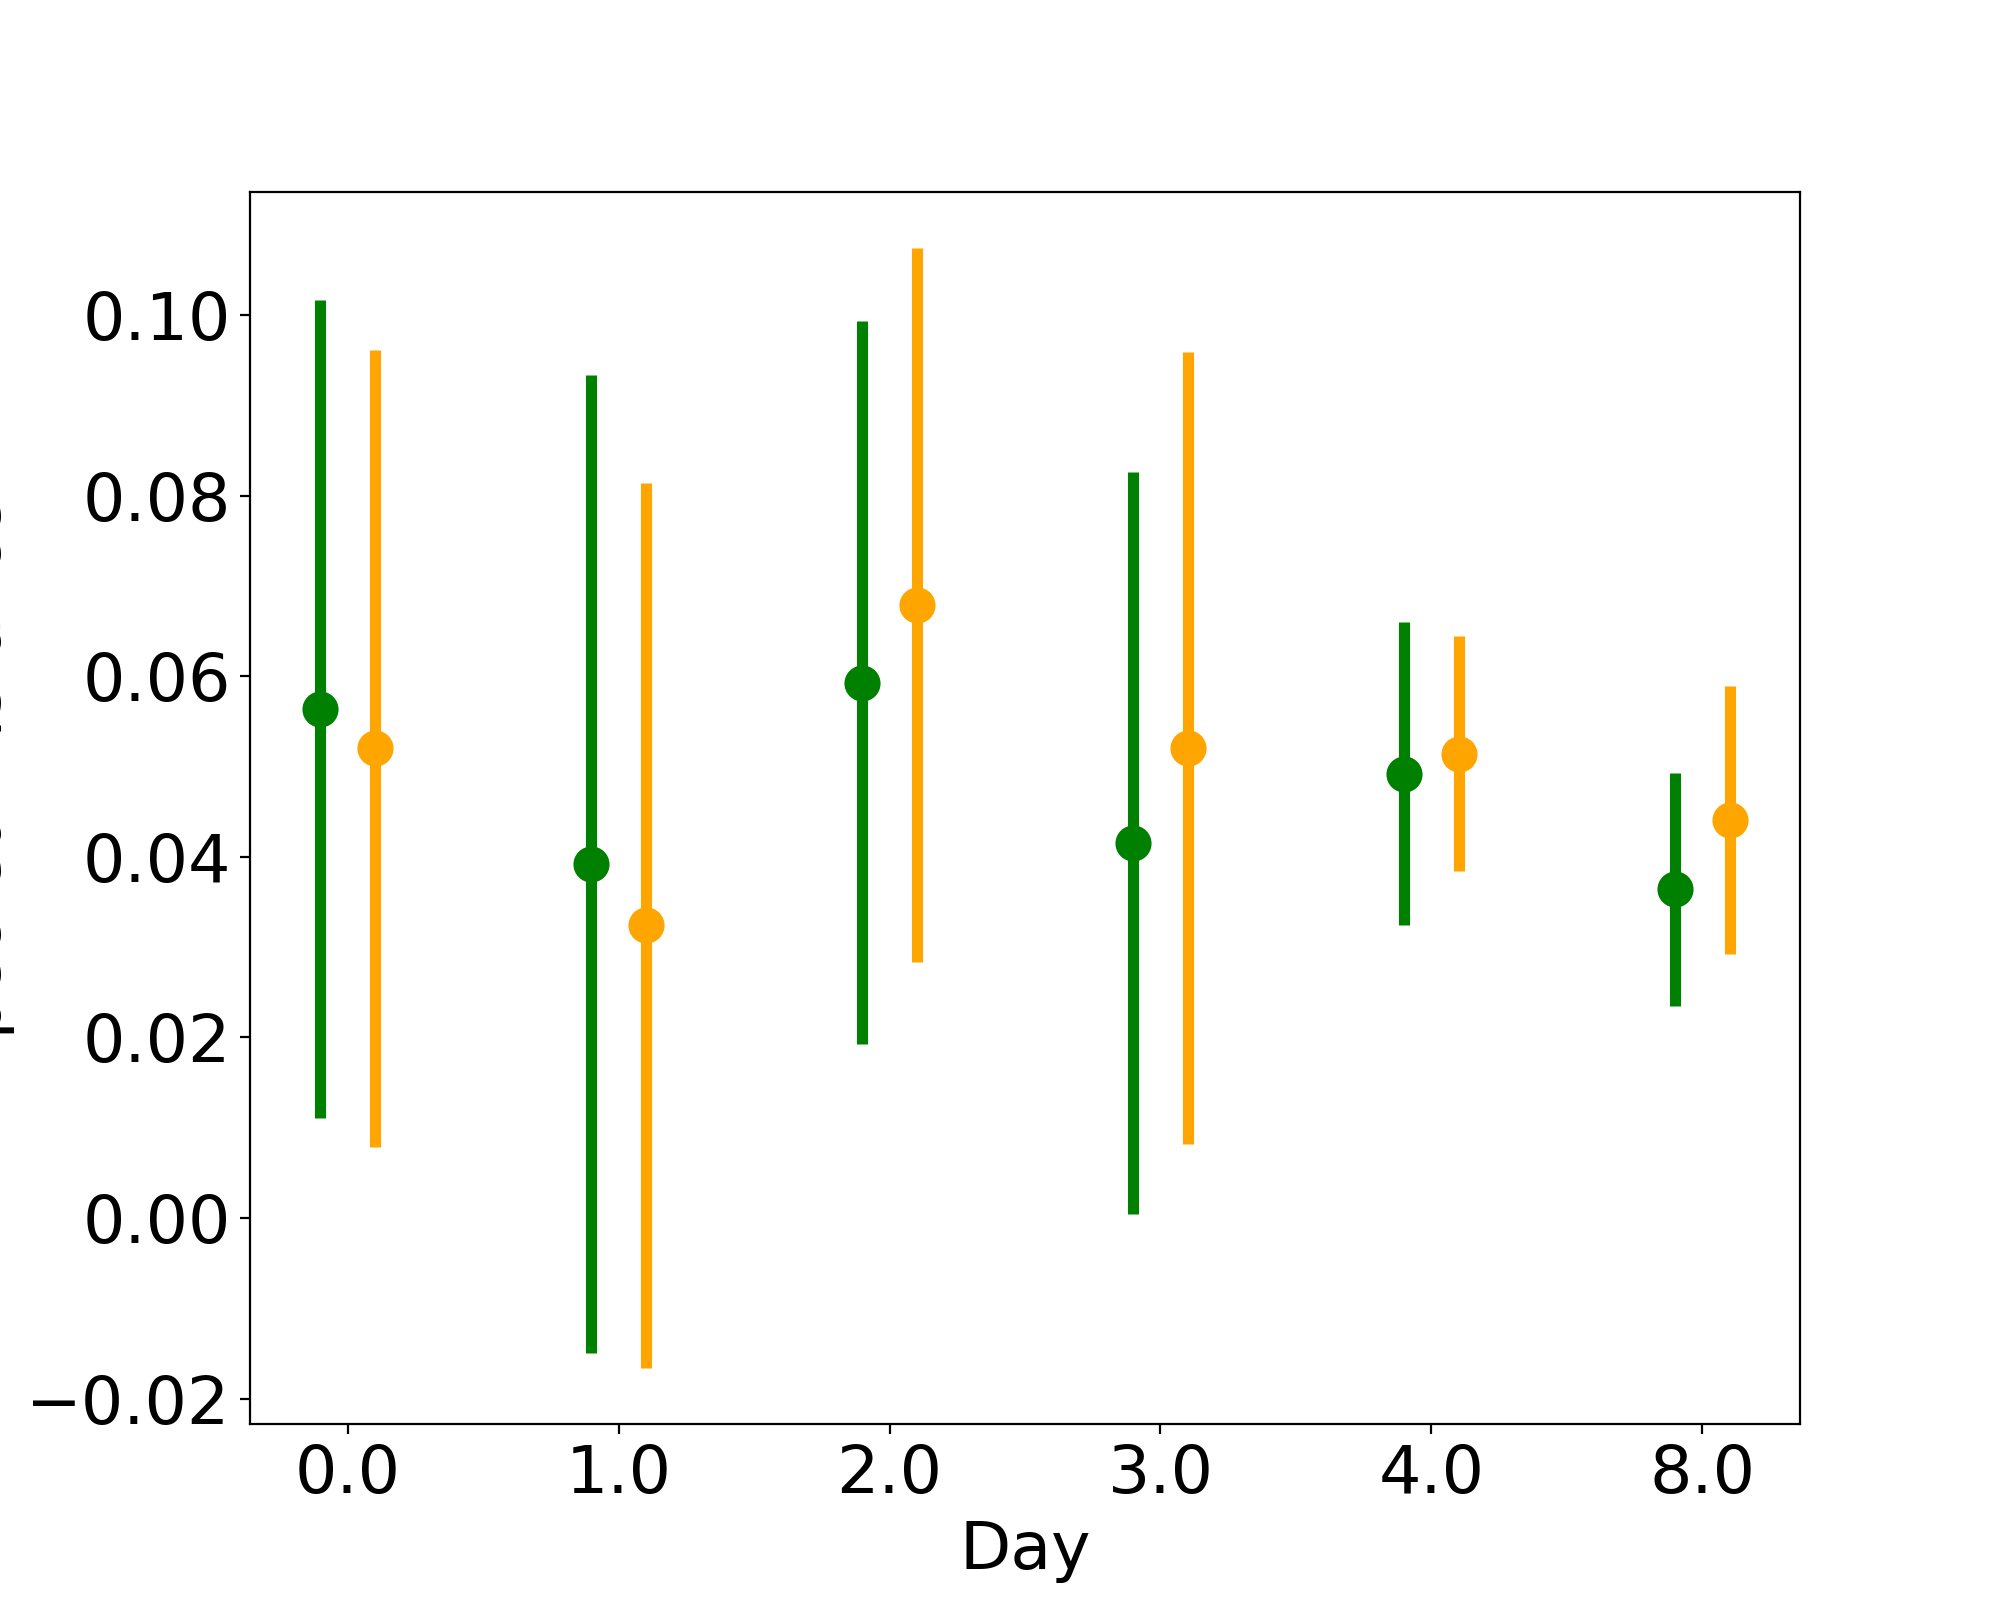

In [249]:
EMT_states = ["High EMT", "Medium EMT"]
results = []

for day in new_trajectory_ds.obs['day'].unique():
    for EMT_state in EMT_states:
        cells_of_interest = new_trajectory_ds[new_trajectory_ds.obs['day'] == day]

        # Get the gene expression data of the cells of interest
        gene_expression_data = cells_of_interest.obs[gene_columns_set].to_numpy()

        # Compute the pairwise distances
        pairwise_distances = distance.squareform(distance.pdist(gene_expression_data, metric='euclidean'))

        # Get the weights for the cells of interest
        weights = cells_of_interest[:, EMT_state].X.flatten()

        # Compute the pairwise weights
        pairwise_weights = np.outer(weights, weights)

        # Compute the weighted pairwise distances
        weighted_distances = pairwise_distances * pairwise_weights

        # Compute the expected distance (mean)
        expected_distance = np.sum(weighted_distances) / np.sum(pairwise_weights)

        # Compute the variance
        variance = np.sum(pairwise_weights * (pairwise_distances - expected_distance) ** 2) / np.sum(pairwise_weights)

        # Get the number of samples (cells of interest)
        n_samples = len(cells_of_interest)

        # Add the result to the list
        results.append([day, EMT_state, expected_distance, variance, n_samples])

# Create a DataFrame from the results
df = pd.DataFrame(results, columns=['Day', 'EMT State', 'Expected Distance', 'Variance', 'N_Samples'])


# Print the DataFrame
print(df)

# Create error bar plots for mean and variance
fig, ax = plt.subplots(figsize=(10, 8))

# Prepare data
r1 = np.arange(len(df['Day'].unique()))

# Define a small offset for each state
offsets = [0.1, -0.1]

# Define colors for each state
colors = ["orange", "green"]

for offset, state, color in zip(offsets, EMT_states, colors):
    state_data = df[df['EMT State'] == state]
    mean = state_data['Expected Distance']
    stderr = np.sqrt(state_data['Variance'] / len(df))
    ax.errorbar(r1 + offset, mean, yerr=stderr, fmt='o', label=state, color=color, markersize=12, lw=4)

ax.set_xlabel('Day', fontsize= 24)
ax.set_ylabel('Expected Distance', fontsize= 24)
ax.set_xticks(r1, df['Day'].unique())
#ax.legend(fontsize= 24)
ax.tick_params(labelsize=24)


plt.show()

In [250]:
from scipy.stats import t

# Make sure df is the DataFrame
result_df = df

days = result_df['Day'].unique()

for day in days:
    high_emt_data = result_df[(result_df['EMT State'] == 'High EMT') & (result_df['Day'] == day)]
    medium_emt_data = result_df[(result_df['EMT State'] == 'Medium EMT') & (result_df['Day'] == day)]
    
    # retrieve the statistics
    mean_high_emt = high_emt_data['Expected Distance'].values[0]
    var_high_emt = high_emt_data['Variance'].values[0]
    n_high_emt = high_emt_data['N_Samples'].values[0]


    mean_medium_emt = medium_emt_data['Expected Distance'].values[0]
    var_medium_emt = medium_emt_data['Variance'].values[0]
    n_medium_emt = medium_emt_data['N_Samples'].values[0]

    
    # compute the t-statistic
    t_stat = (mean_high_emt - mean_medium_emt) / np.sqrt(var_high_emt/n_high_emt + var_medium_emt/n_medium_emt)

    # compute the degrees of freedom
    df_test = n_high_emt + n_medium_emt - 2

    # compute the p-value
    p_value = 2 * t.sf(np.abs(t_stat), df_test)  # multiply by 2 for a two-tailed test

    print(f"Day {day} - T-statistic: {t_stat}, P-value: {p_value}")



Day 0.0 - T-statistic: -1.0404120082968678, P-value: 0.2981945421508173
Day 1.0 - T-statistic: -1.2905386362686286, P-value: 0.1969285115595442
Day 2.0 - T-statistic: 2.1529913101625837, P-value: 0.03136945277504648
Day 3.0 - T-statistic: 2.335284731497309, P-value: 0.019574719598578875
Day 4.0 - T-statistic: 1.0223621223624175, P-value: 0.3067174344569971
Day 8.0 - T-statistic: 4.938991057534054, P-value: 8.192516374473771e-07


    Day   EMT State  Expected Distance   Variance  N_Samples
0   0.0    High EMT          12.939606  14.300536       2734
1   0.0  Medium EMT          13.818669  15.081518       2734
2   1.0    High EMT          15.817634  13.636068       2303
3   1.0  Medium EMT          15.717487  13.166520       2303
4   2.0    High EMT          13.918746  20.580875       2381
5   2.0  Medium EMT          14.391312  18.027702       2381
6   3.0    High EMT          13.928227  20.510777       2132
7   3.0  Medium EMT          14.438066  17.120619       2132
8   4.0    High EMT          10.639548  47.453410       1147
9   4.0  Medium EMT          10.369825  19.607589       1147
10  8.0    High EMT          11.527962  54.645525       1891
11  8.0  Medium EMT          10.490863  16.450911       1891


<IPython.core.display.Javascript object>


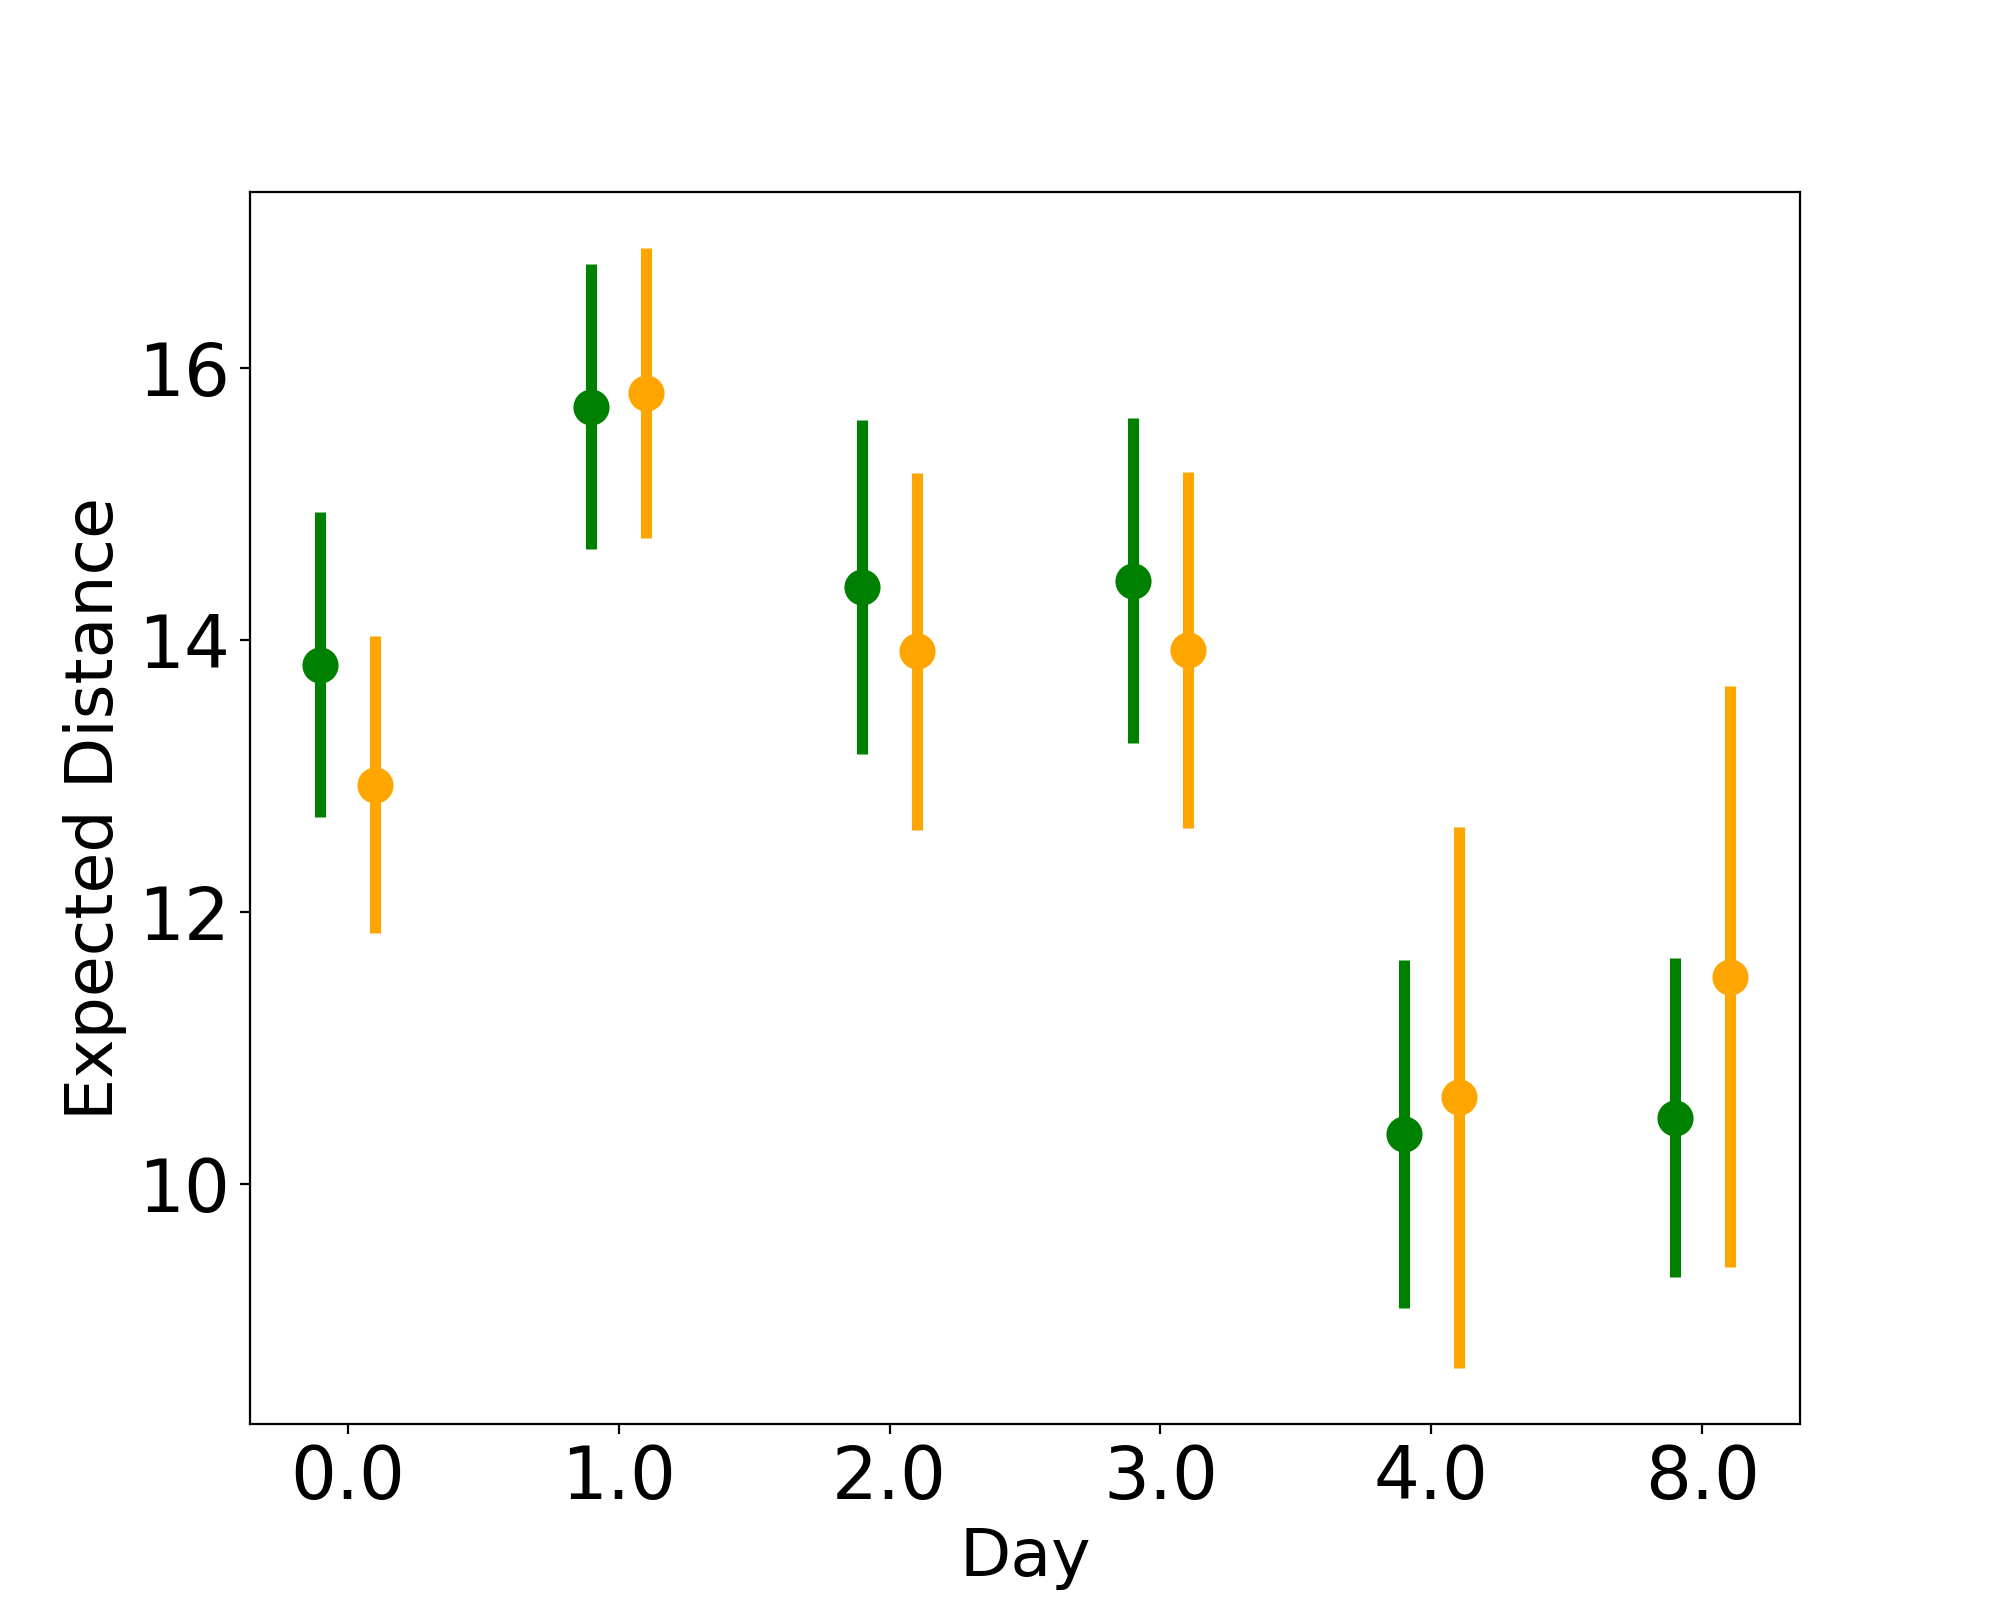

In [857]:
from sklearn.decomposition import PCA

EMT_states = ["High EMT", "Medium EMT"]
results = []

for day in new_trajectory_ds.obs['day'].unique():
    for EMT_state in EMT_states:
        cells_of_interest = new_trajectory_ds[new_trajectory_ds.obs['day'] == day]

        # Get the gene expression data of the cells of interest
        gene_expression_data = cells_of_interest.obs[gene_columns].to_numpy()
        
        # Create PCA object
        pca = PCA(n_components=72)  # n_components refers to the number of dimensions you want to reduce to

        # Fit and transform the data to the PCA
        reduced_gene_expression_data = pca.fit_transform(gene_expression_data)

        # Compute the pairwise distances with the reduced data
        pairwise_distances = distance.squareform(distance.pdist(reduced_gene_expression_data, metric='euclidean'))


        # Get the weights for the cells of interest
        weights = cells_of_interest[:, EMT_state].X.flatten()

        # Compute the pairwise weights
        pairwise_weights = np.outer(weights, weights)

        # Compute the weighted pairwise distances
        weighted_distances = pairwise_distances * pairwise_weights

        # Compute the expected distance (mean)
        expected_distance = np.sum(weighted_distances) / np.sum(pairwise_weights)

        # Compute the variance
        variance = np.sum(pairwise_weights * (pairwise_distances - expected_distance) ** 2) / np.sum(pairwise_weights)

        # Get the number of samples (cells of interest)
        n_samples = len(cells_of_interest)

        # Add the result to the list
        results.append([day, EMT_state, expected_distance, variance, n_samples])

# Create a DataFrame from the results
df = pd.DataFrame(results, columns=['Day', 'EMT State', 'Expected Distance', 'Variance', 'N_Samples'])


# Print the DataFrame
print(df)

# Create error bar plots for mean and variance
fig, ax = plt.subplots(figsize=(10, 8))

# Prepare data
r1 = np.arange(len(df['Day'].unique()))

# Define a small offset for each state
offsets = [0.1, -0.1]

# Define colors for each state
colors = ["orange", "green"]

for offset, state, color in zip(offsets, EMT_states, colors):
    state_data = df[df['EMT State'] == state]
    mean = state_data['Expected Distance']
    stderr = np.sqrt(state_data['Variance'] / len(df))
    ax.errorbar(r1 + offset, mean, yerr=stderr, fmt='o', label=state, color=color, markersize=12, lw=4)

ax.set_xlabel('Day', fontsize = 24)
ax.set_ylabel('Expected Distance', fontsize = 24)
ax.set_xticks(r1, df['Day'].unique())
#ax.legend(fontsize = 24)
ax.tick_params(labelsize=24)

plt.show()

In [283]:
from scipy.stats import t

# Make sure df is the DataFrame
result_df = df

days = result_df['Day'].unique()

for day in days:
    high_emt_data = result_df[(result_df['EMT State'] == 'High EMT') & (result_df['Day'] == day)]
    medium_emt_data = result_df[(result_df['EMT State'] == 'Medium EMT') & (result_df['Day'] == day)]
    
    # retrieve the statistics
    mean_high_emt = high_emt_data['Expected Distance'].values[0]
    var_high_emt = high_emt_data['Variance'].values[0]
    n_high_emt = high_emt_data['N_Samples'].values[0]


    mean_medium_emt = medium_emt_data['Expected Distance'].values[0]
    var_medium_emt = medium_emt_data['Variance'].values[0]
    n_medium_emt = medium_emt_data['N_Samples'].values[0]

    
    # compute the t-statistic
    t_stat = (mean_high_emt - mean_medium_emt) / np.sqrt(var_high_emt/n_high_emt + var_medium_emt/n_medium_emt)

    # compute the degrees of freedom
    df_test = n_high_emt + n_medium_emt - 2

    # compute the p-value
    p_value = 2 * t.sf(np.abs(t_stat), df_test)  # multiply by 2 for a two-tailed test

    print(f"Day {day} - T-statistic: {t_stat}, P-value: {p_value}")


Day 0.0 - T-statistic: 7.278261864786182, P-value: 3.859817598368882e-13
Day 1.0 - T-statistic: 11.47170561726688, P-value: 4.67069404481428e-30
Day 2.0 - T-statistic: 5.698958753099683, P-value: 1.2780440463089144e-08
Day 3.0 - T-statistic: 4.161690325387364, P-value: 3.2213271374200446e-05
Day 4.0 - T-statistic: -0.5690149545729938, P-value: 0.569401743934564
Day 8.0 - T-statistic: 7.919115324800318, P-value: 3.1192492316064814e-15


In [816]:
# Step 1: Load the genes you want to exclude
with open("Desktop/EMT_Optimal_Transport/top_genes_day8.txt", "r") as file:
    exclude_genes = file.read().splitlines()

# Step 2: Create a new list that excludes these genes
gene_columns_ex = [gene for gene in gene_columns if gene not in exclude_genes]
print(len(gene_columns))
print(len(gene_columns_ex))

15000
14928


    Day   EMT State  Expected Distance   Variance  N_Samples
0   0.0    High EMT          28.255901  14.504386       2734
1   0.0  Medium EMT          28.399692  15.055068       2734
2   1.0    High EMT          36.314138  11.807439       2303
3   1.0  Medium EMT          36.328877  10.939412       2303
4   2.0    High EMT          25.415645  18.114890       2381
5   2.0  Medium EMT          26.387443  15.497685       2381
6   3.0    High EMT          28.445679  17.939688       2132
7   3.0  Medium EMT          29.183589  15.915531       2132
8   4.0    High EMT          16.655490  30.989751       1147
9   4.0  Medium EMT          17.201246  14.123087       1147
10  8.0    High EMT          18.547412  34.491854       1891
11  8.0  Medium EMT          18.934259  13.039790       1891


<IPython.core.display.Javascript object>


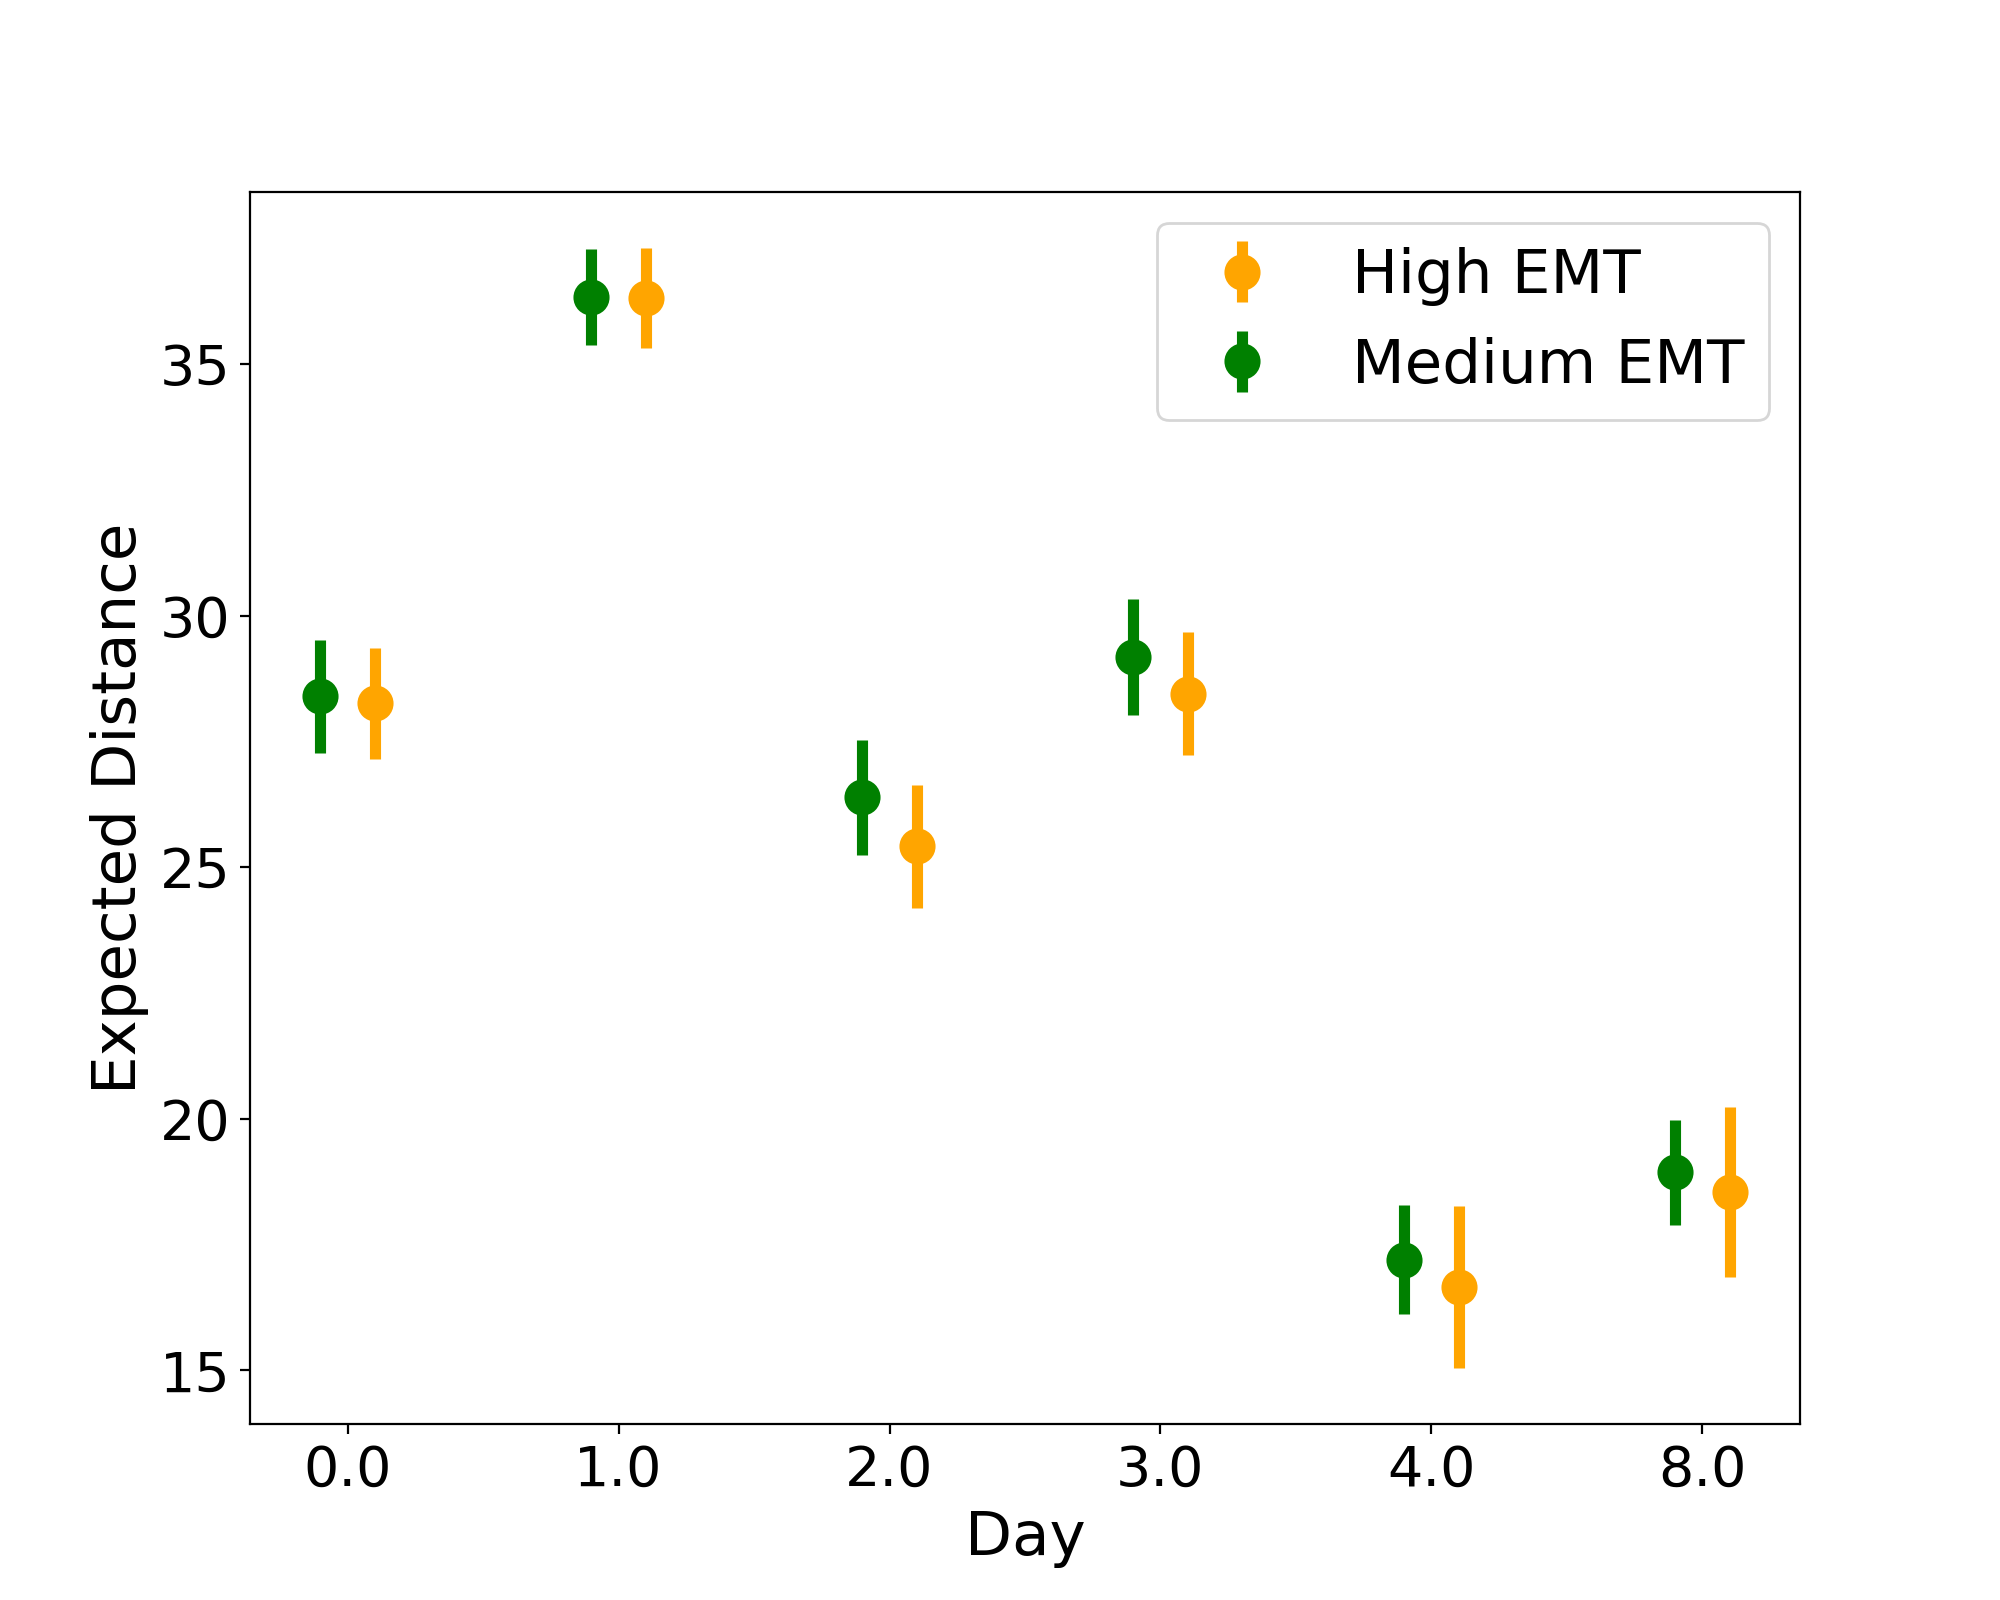

In [817]:
EMT_states = ["High EMT", "Medium EMT"]
results = []

for day in new_trajectory_ds.obs['day'].unique():
    for EMT_state in EMT_states:
        cells_of_interest = new_trajectory_ds[new_trajectory_ds.obs['day'] == day]

        # Get the gene expression data of the cells of interest
        gene_expression_data = cells_of_interest.obs[gene_columns_ex].to_numpy()

        # Compute the pairwise distances
        pairwise_distances = distance.squareform(distance.pdist(gene_expression_data, metric='euclidean'))

        # Get the weights for the cells of interest
        weights = cells_of_interest[:, EMT_state].X.flatten()

        # Compute the pairwise weights
        pairwise_weights = np.outer(weights, weights)

        # Compute the weighted pairwise distances
        weighted_distances = pairwise_distances * pairwise_weights

        # Compute the expected distance (mean)
        expected_distance = np.sum(weighted_distances) / np.sum(pairwise_weights)

        # Compute the variance
        variance = np.sum(pairwise_weights * (pairwise_distances - expected_distance) ** 2) / np.sum(pairwise_weights)

        # Get the number of samples (cells of interest)
        n_samples = len(cells_of_interest)

        # Add the result to the list
        results.append([day, EMT_state, expected_distance, variance, n_samples])

# Create a DataFrame from the results
df = pd.DataFrame(results, columns=['Day', 'EMT State', 'Expected Distance', 'Variance', 'N_Samples'])


# Print the DataFrame
print(df)

# Create error bar plots for mean and variance
fig, ax = plt.subplots(figsize=(10, 8))

# Prepare data
r1 = np.arange(len(df['Day'].unique()))

# Define a small offset for each state
offsets = [0.1, -0.1]

# Define colors for each state
colors = ["orange", "green"]

for offset, state, color in zip(offsets, EMT_states, colors):
    state_data = df[df['EMT State'] == state]
    mean = state_data['Expected Distance']
    stderr = np.sqrt(state_data['Variance'] / len(df))
    ax.errorbar(r1 + offset, mean, yerr=stderr, fmt='o', label=state, color=color, markersize=12, lw=4)

ax.set_xlabel('Day', fontsize = 22)
ax.set_ylabel('Expected Distance', fontsize = 22)
ax.set_xticks(r1, df['Day'].unique())
ax.legend(fontsize = 22)

plt.show()

In [286]:
from scipy.stats import t

# Make sure df is the DataFrame
result_df = df

days = result_df['Day'].unique()

for day in days:
    high_emt_data = result_df[(result_df['EMT State'] == 'High EMT') & (result_df['Day'] == day)]
    medium_emt_data = result_df[(result_df['EMT State'] == 'Medium EMT') & (result_df['Day'] == day)]
    
    # retrieve the statistics
    mean_high_emt = high_emt_data['Expected Distance'].values[0]
    var_high_emt = high_emt_data['Variance'].values[0]
    n_high_emt = high_emt_data['N_Samples'].values[0]


    mean_medium_emt = medium_emt_data['Expected Distance'].values[0]
    var_medium_emt = medium_emt_data['Variance'].values[0]
    n_medium_emt = medium_emt_data['N_Samples'].values[0]

    
    # compute the t-statistic
    t_stat = (mean_high_emt - mean_medium_emt) / np.sqrt(var_high_emt/n_high_emt + var_medium_emt/n_medium_emt)

    # compute the degrees of freedom
    df_test = n_high_emt + n_medium_emt - 2

    # compute the p-value
    p_value = 2 * t.sf(np.abs(t_stat), df_test)  # multiply by 2 for a two-tailed test

    print(f"Day {day} - T-statistic: {t_stat}, P-value: {p_value}")

Day 0.0 - T-statistic: 7.278261864786182, P-value: 3.859817598368882e-13
Day 1.0 - T-statistic: 11.47170561726688, P-value: 4.67069404481428e-30
Day 2.0 - T-statistic: 5.698958753099683, P-value: 1.2780440463089144e-08
Day 3.0 - T-statistic: 4.161690325387364, P-value: 3.2213271374200446e-05
Day 4.0 - T-statistic: -0.5690149545729938, P-value: 0.569401743934564
Day 8.0 - T-statistic: 7.919115324800318, P-value: 3.1192492316064814e-15


# DEGs at day 8

In [230]:
df_day8 = new_trajectory_ds[new_trajectory_ds.obs['day'] == 8]
df_day8 = df_day8.obs[gene_columns]
df_day8

PI3    S100A9    SPRR1B    S100A8    SPRR2D  \
MCF10A_t8_AAACCTGAGACTTGAA -0.005449  0.188992 -0.008123  0.183889 -0.023266   
MCF10A_t8_AAACCTGAGCGAAGGG  0.328056  0.461032 -0.011410  0.398379 -0.034881   
MCF10A_t8_AAACCTGAGTCATGCT  0.041941  0.254332 -0.030064  0.109075  0.033308   
MCF10A_t8_AAACCTGCACGACTCG  0.001741  0.188483 -0.011839 -0.046259 -0.118541   
MCF10A_t8_AAACCTGCACGCCAGT  0.042004  0.370171 -0.014494  0.010320  0.110935   
...                              ...       ...       ...       ...       ...   
MCF10A_t8_TTTGGTTTCTTGTACT  0.027844  0.261889 -0.014105  0.003696  0.206323   
MCF10A_t8_TTTGTCACACCATCCT -0.007491  0.196476 -0.010899 -0.027554 -0.020066   
MCF10A_t8_TTTGTCAGTTCTGGTA  0.096796  0.366199  0.001003  0.015999 -0.012742   
MCF10A_t8_TTTGTCATCATTATCC  0.010040  0.227023 -0.033702  0.021100 -0.017801   
MCF10A_t8_TTTGTCATCTCCCTGA  0.222247  0.245423 -0.023247 -0.015292 -0.035302   

                               KLK10     KRT16  C15orf48     S100P      SAA1  \
MCF10A_t8_AAACCTGAGACTTGAA -0.027455  0.454099  0.235691  0.008205  0.796555   
MCF10A_t8_AAACCTGAGCGAAGGG -0.000684  0.329189  0.214191 -0.019196  0.090192   
MCF10A_t8_AAACCTGAGTCATGCT -0.006930  0.025981  0.044861 -0.002866  0.379721   
MCF10A_t8_AAACCTGCACGACTCG -0.013304  0.089057  0.129672 -0.014071  1.360818   
MCF10A_t8_AAACCTGCACGCCAGT -0.008792  0.179959  0.258383 -0.008736  0.875408   
...                              ...       ...       ...       ...       ...   
MCF10A_t8_TTTGGTTTCTTGTACT -0.052195  0.200157 -0.012267 -0.013381  0.174560   
MCF10A_t8_TTTGTCACACCATCCT -0.032288  0.363163  0.277319 -0.042165  0.869437   
MCF10A_t8_TTTGTCAGTTCTGGTA  0.127961  0.170084  0.300863 -0.005125  0.709902   
MCF10A_t8_TTTGTCATCATTATCC -0.074330 -0.034061  0.109705 -0.014751  0.472803   
MCF10A_t8_TTTGTCATCTCCCTGA -0.015363  0.240462  0.356671 -0.005205  0.083936   

                            ...    NOS1AP  SARDH     CPEB3  OBP2A  \
MCF10A_t8_AAACCTGAGACTTGAA  ...  0.001082    0.0  0.004907    0.0   
MCF10A_t8_AAACCTGAGCGAAGGG  ...  0.005732    0.0  0.000389    0.0   
MCF10A_t8_AAACCTGAGTCATGCT  ...  0.031106    0.0 -0.004887    0.0   
MCF10A_t8_AAACCTGCACGACTCG  ...  0.006322    0.0  0.005859    0.0   
MCF10A_t8_AAACCTGCACGCCAGT  ...  0.017946    0.0 -0.000713    0.0   
...                         ...       ...    ...       ...    ...   
MCF10A_t8_TTTGGTTTCTTGTACT  ...  0.002139    0.0  0.000918    0.0   
MCF10A_t8_TTTGTCACACCATCCT  ...  0.011020    0.0 -0.000119    0.0   
MCF10A_t8_TTTGTCAGTTCTGGTA  ...  0.146796    0.0 -0.005438    0.0   
MCF10A_t8_TTTGTCATCATTATCC  ...  0.024216    0.0  0.010486    0.0   
MCF10A_t8_TTTGTCATCTCCCTGA  ...  0.004618    0.0  0.000000    0.0   

                            RP11-80H5.9     TUBG1      FGF8     SBNO2  \
MCF10A_t8_AAACCTGAGACTTGAA          0.0  0.446758  0.000000  0.138820   
MCF10A_t8_AAACCTGAGCGAAGGG          0.0  0.234605  0.000000  0.249741   
MCF10A_t8_AAACCTGAGTCATGCT          0.0  0.527545  0.000000  0.306262   
MCF10A_t8_AAACCTGCACGACTCG          0.0  1.406358  0.000000  0.070377   
MCF10A_t8_AAACCTGCACGCCAGT          0.0  0.610582  0.000000  0.099562   
...                                 ...       ...       ...       ...   
MCF10A_t8_TTTGGTTTCTTGTACT          0.0  0.694703  0.000000  0.384899   
MCF10A_t8_TTTGTCACACCATCCT          0.0  0.393088  0.001373  0.143210   
MCF10A_t8_TTTGTCAGTTCTGGTA          0.0  0.646379  0.000000  0.133524   
MCF10A_t8_TTTGTCATCATTATCC          0.0  0.404170  0.000000  0.079026   
MCF10A_t8_TTTGTCATCTCCCTGA          0.0  0.368579  0.000000  0.102628   

                                NRG2  RP13-631K18.2  
MCF10A_t8_AAACCTGAGACTTGAA -0.007209            0.0  
MCF10A_t8_AAACCTGAGCGAAGGG -0.006398            0.0  
MCF10A_t8_AAACCTGAGTCATGCT  0.000000            0.0  
MCF10A_t8_AAACCTGCACGACTCG  0.013961            0.0  
MCF10A_t8_AAACCTGCACGCCAGT  0.009945            0.0  
...                              ...            ...  
MCF10A_t8_TTTGGTTTCTTGTACT 

In [231]:
import pandas as pd

# Convert the cell_sets AnnData object to a DataFrame
cell_sets_df = pd.DataFrame(cell_sets.X, index=cell_sets.obs.index, columns=cell_sets.var['description'])

# Merge the DataFrames
merged_df_day8 = df_day8.merge(cell_sets_df, left_index=True, right_index=True)
merged_df_day8.columns

Index(['PI3', 'S100A9', 'SPRR1B', 'S100A8', 'SPRR2D', 'KLK10', 'KRT16',
       'C15orf48', 'S100P', 'SAA1',
       ...
       'OBP2A', 'RP11-80H5.9', 'TUBG1', 'FGF8', 'SBNO2', 'NRG2',
       'RP13-631K18.2', 'Low EMT', 'High EMT', 'Medium EMT'],
      dtype='object', length=15003)

In [251]:
from scipy import stats

high_emt_df = merged_df_day8[merged_df_day8['High EMT'] == 1]
medium_emt_df = merged_df_day8[merged_df_day8['Medium EMT'] == 1]

# Get gene columns
gene_columns_DEG = [col for col in merged_df_day8.columns if col not in ['Low EMT', 'High EMT', 'Medium EMT']]

results = []

for gene in gene_columns_DEG:
    # Perform t-test
    t_stat, p_val = stats.ttest_ind(medium_emt_df[gene], high_emt_df[gene])
    
    # Calculate the fold change
    if high_emt_df[gene].mean() == 0 or medium_emt_df[gene].mean() == 0:
        fold_change = np.nan
    else:
        fold_change = high_emt_df[gene].mean() / medium_emt_df[gene].mean()

    # Append the result to the list
    results.append([gene, t_stat, p_val, fold_change])

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Gene', 'T-statistic', 'P-value', 'Fold Change'])

# Print the results
print(results_df)


                Gene  T-statistic       P-value  Fold Change
0                PI3     6.409338  2.039543e-10     0.488692
1             S100A9     5.587784  2.798524e-08     0.780374
2             SPRR1B     3.560895  3.829325e-04     0.158873
3             S100A8     2.190874  2.863790e-02     0.766838
4             SPRR2D     0.984064  3.252669e-01     0.704096
...              ...          ...           ...          ...
14995          TUBG1   -11.741803  2.490899e-30     1.403603
14996           FGF8    -0.970651  3.319029e-01          NaN
14997          SBNO2    -2.949051  3.244500e-03     1.143917
14998           NRG2    -5.209783  2.196383e-07    -1.317630
14999  RP13-631K18.2          NaN           NaN          NaN

[15000 rows x 4 columns]


In [252]:
# Exclude nan values in Fold Change
results_df = results_df[~results_df['Fold Change'].isna()]

# Filter DataFrame to include only rows with P-value < 1e-8
results_df_fold = results_df[results_df['P-value'] < 1e-8]

# Sort the filtered DataFrame by Fold Change in descending order and take the top 31 genes
top_genes_df = results_df_fold.sort_values(by='Fold Change', ascending=False).head(31)

print(top_genes_df.to_string())






                 Gene  T-statistic       P-value   Fold Change
6904        TNFRSF13C    -9.944134  1.662023e-22  18515.697160
8378       AC005592.3    -7.653083  3.805478e-14   1239.385380
14452         FAM90A1     8.613316  2.023067e-17    990.375158
4468              CR2     8.452886  7.525397e-17    979.151881
6250     RP11-231N3.1    -7.422878  2.064171e-13    785.865599
13623  CTD-2583A14.10    -8.776412  5.205831e-18    578.915494
5993             LBX2    -8.723185  8.127058e-18    576.004023
5397     RP11-84C10.4    -9.081948  3.859103e-19    515.398756
12789      AL358113.1    -9.081948  3.859103e-19    515.398756
10003            VIL1    -5.838981  6.626776e-09    504.248161
14931      AC092415.1    -8.419453  9.868411e-17    493.639030
7509     RP11-138C9.1   -11.678123  4.913674e-30    446.627364
13675   RP11-304F15.7     6.334556  3.272852e-10    395.626387
5541     RP11-839G9.1     6.332493  3.315612e-10    350.751055
4661            DCHS1    -8.590324  2.445361e-17    348

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


<IPython.core.display.Javascript object>


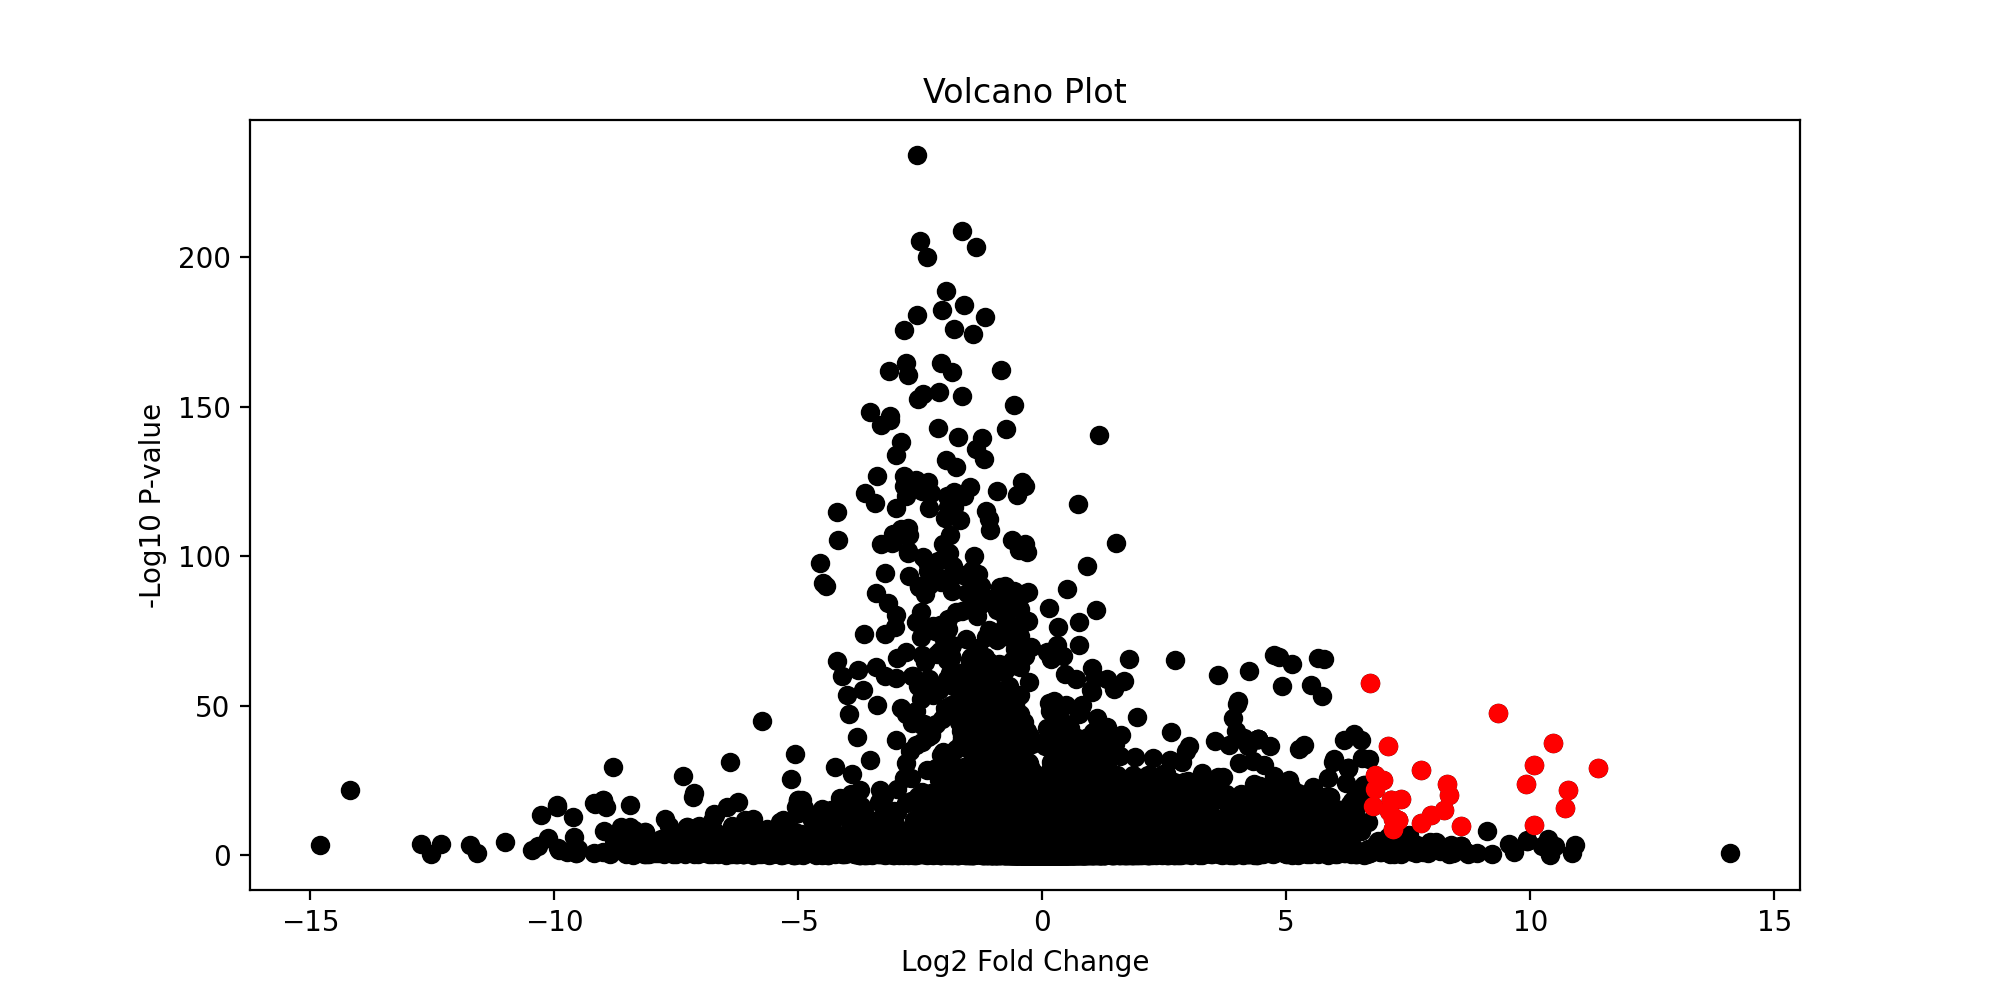

In [244]:
import matplotlib.pyplot as plt
import numpy as np

# Taking -log10 of P-value
results_df['-log10Pvalue'] = -np.log10(results_df['P-value'])

# Taking log2 of Fold Change
results_df['log2FoldChange'] = np.log2(results_df['Fold Change'])

plt.figure(figsize=(10, 5))
plt.scatter(results_df['log2FoldChange'], results_df['-log10Pvalue'], color='black')
plt.title('Volcano Plot')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 P-value')

# Highlight genes that are in the top 72 genes by P-value
top_genes = top_genes_df['Gene']
is_top_gene = results_df['Gene'].isin(top_genes)
plt.scatter(results_df[is_top_gene]['log2FoldChange'], results_df[is_top_gene]['-log10Pvalue'], color='red')

plt.show()


In [245]:
# Write gene names to a .txt file
top_genes_df['Gene'].to_csv('Desktop/EMT_Optimal_Transport/top_genes_day8_M_to_H_31_pvalue.txt', index=False, header=False)


In [625]:
# Read the list of genes to exclude from the .txt file
with open('Desktop/EMT_Optimal_Transport/EMT_76signature_cleaned.txt', 'r') as file:
    exclude_genes = file.read().splitlines()

# Filter out the genes to exclude from results_df
filtered_df = results_df[results_df['Gene'].isin(exclude_genes)]

# Filter out genes with p<0.05 and fold change > 1
filtered_df = filtered_df[(filtered_df['P-value'] < 0.05) & (filtered_df['Fold Change'] > 1)]

#complement_df = filtered_df[~((filtered_df['P-value'] < 0.05) & (filtered_df['Fold Change'] > 1))]


# Now you can proceed with your further analysis on this filtered_df DataFrame
print(filtered_df.to_string())
print(complement_df.to_string())

# Number of genes in the filtered DataFrame
num_genes = filtered_df.shape[0]
#num_genes_c = complement_df.shape[0]

print("Number of genes in the filtered DataFrame: ", num_genes)
#print("Number of genes in the complement_df DataFrame: ", num_genes_c)

complement_df['Gene'].to_csv('Desktop/EMT_Optimal_Transport/top_genes_day8_not_M_to_H_EMT.txt', index=False, header=False)



           Gene  T-statistic       P-value  Fold Change
17        FXYD3     3.673680  2.487973e-04     4.350428
28        CLDN4     3.482556  5.131308e-04     2.324607
53      TACSTD2     4.417643  1.080756e-05     1.358053
77          FN1    21.768015  7.913571e-90     1.417932
89         MUC1     9.562230  5.539415e-21     1.947475
94        CLDN7     7.039094  3.123898e-12     1.769922
212       TGFBI    15.357020  4.881852e-49     1.115974
224       ITGB6     6.532072  9.284587e-11     1.234116
279        CDH1     3.992454  6.905118e-05     1.324236
287         DSP     5.710637  1.393279e-08     1.117979
403        CDH3     3.384493  7.343470e-04     1.138445
460    C1orf116     3.038597  2.424247e-03     1.464796
552      PRSS22     9.566239  5.342451e-21     5.272500
591        MMP2    10.730725  8.469298e-26     1.572655
780       PRSS8     6.822481  1.367859e-11     2.524599
803       GPR56    12.669325  9.049153e-35     1.902231
935       STAP2     4.971955  7.513076e-07     1

# Inference of the trajectories (descendents) of each group of cells at day 0

In [83]:
cell_sets_day0 = wot.io.read_sets(CELL_SETS_PATH_day0, as_dict=True)

/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/wot/io/io.py:304: FutureWarning: X.dtype being converted to np.float32 from int8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=x, obs=obs, var=var)


In [50]:
cell_sets_day0

{'A': ['MCF10A_t0_AAACCCAAGCCACAAG',
  'MCF10A_t0_AAACCCACATGGTGGA',
  'MCF10A_t0_AAACCCAGTTAAGGAT',
  'MCF10A_t0_AAACGAACACCACTGG',
  'MCF10A_t0_AAAGAACCACGTGAGA',
  'MCF10A_t0_AAAGAACTCATGAAAG',
  'MCF10A_t0_AAAGGATTCAAGAATG',
  'MCF10A_t0_AAAGGGCGTCTGTGGC',
  'MCF10A_t0_AAAGGGCTCTCGGCTT',
  'MCF10A_t0_AAAGGTAAGACATAAC',
  'MCF10A_t0_AAAGGTAAGGTCGTGA',
  'MCF10A_t0_AAAGGTAAGGTGCTTT',
  'MCF10A_t0_AAAGGTAGTGTGTTTG',
  'MCF10A_t0_AAAGGTATCCGTATAG',
  'MCF10A_t0_AAAGTCCTCAGGAGAC',
  'MCF10A_t0_AAAGTGAGTCTCACGG',
  'MCF10A_t0_AACAAAGCACCGTGCA',
  'MCF10A_t0_AACAAAGCAGCTTCCT',
  'MCF10A_t0_AACAAAGTCCTAGCCT',
  'MCF10A_t0_AACAAAGTCGAATCCA',
  'MCF10A_t0_AACAACCGTACAGTAA',
  'MCF10A_t0_AACAACCGTACGGTTT',
  'MCF10A_t0_AACAAGAAGCAGCACA',
  'MCF10A_t0_AACAGGGCAGAAACCG',
  'MCF10A_t0_AACCAACGTCACTAGT',
  'MCF10A_t0_AACCAACGTCGTTATG',
  'MCF10A_t0_AACCACAGTCATAAAG',
  'MCF10A_t0_AACCACAGTCGTCAGC',
  'MCF10A_t0_AACCATGGTGCAGTGA',
  'MCF10A_t0_AACCCAAAGCCAGAGT',
  'MCF10A_t0_AACCCAATCTGACCCT',
  '

In [41]:
populations_day0 = tmap_model.population_from_cell_sets(cell_sets_day0, at_time=0)

In [42]:
trajectory_ds_day0 = tmap_model.trajectories(populations_day0)


/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=np.concatenate(trajectories), obs=self.meta.copy(),


In [43]:
# Load embedding coordinates
trajectory_ds_day0.obs = trajectory_ds_day0.obs.join(coord_df)

In [44]:
# Visualize trajectories
trajectory_dropdown_day0 = widgets.Dropdown(
    options=trajectory_ds_day0.var.index,
    description='Trajectory:'
)

def update_trajectory_vis_day0(name):
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = trajectory_ds_day0.obs.copy()
    binned_df['values'] = trajectory_ds_day0[:, name].X
    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.975))
    plt.colorbar().ax.set_title('Trajectory')

widgets.interact(update_trajectory_vis_day0, name=trajectory_dropdown_day0)

interactive(children=(Dropdown(description='Trajectory:', options=('A', 'B', 'D', 'C'), value='A'), Output()),…

<function __main__.update_trajectory_vis_day0(name)>

In [93]:
day_dropdown = widgets.Dropdown(
    options=fate_ds.obs['day'].unique(),
    description='Day',
    value=1
)

def update_trajectory_vis__day0_snapshot(name, day):
    _trajectory_ds = trajectory_ds_day0[trajectory_ds_day0.obs['day']==day]
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = _trajectory_ds.obs.copy()
    binned_df['values'] = _trajectory_ds[:, name].X
    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.975))
    plt.colorbar().ax.set_title('Trajectory')

widgets.interact(update_trajectory_vis__day0_snapshot, name=trajectory_dropdown_day0, day=day_dropdown)

interactive(children=(Dropdown(description='Trajectory:', options=('A', 'B', 'D', 'C'), value='A'), Dropdown(d…

<function __main__.update_trajectory_vis__day0_snapshot(name, day)>

# Compuate variances

In [91]:
import scipy.stats as st

In [92]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))

def cv_compute_EMT(hallmark):
    cv_EMT = {}
    for i in trajectory_ds.var.index:
        cv_EMT[i] = {}
        for day in fate_ds.obs['day'].unique():
            gene_set_scores_df_EMT_temp = gene_set_scores_df_EMT[gene_set_scores_df_EMT['day'] == day]
            trajectory_ds_temp = trajectory_ds[trajectory_ds.obs['day'] == day]
            binned_df = trajectory_ds_temp.obs.copy()
            binned_df['values'] = trajectory_ds_temp[:, i].X
            length = len(binned_df['values'])
            values_gene = gene_set_scores_df_EMT_temp[hallmark]
            weights_gene = binned_df['values']
            mean_std = weighted_avg_and_std(values = values_gene, weights = weights_gene)
            mean = mean_std[0]
            sem = mean_std[1]/math.sqrt(length)
            cv_EMT[i][day] = st.norm.interval(alpha=0.95, loc=mean, scale=sem) 
    return(cv_EMT)



def cv_compute_PNAS_stemness(hallmark):
    cv_EMT = {}
    for i in trajectory_ds.var.index:
        cv_EMT[i] = {}
        for day in fate_ds.obs['day'].unique():
            gene_set_scores_df_EMT_temp = gene_set_scores_df_PNAS_stemness[gene_set_scores_df_PNAS_stemness['day'] == day]
            trajectory_ds_temp = trajectory_ds[trajectory_ds.obs['day'] == day]
            binned_df = trajectory_ds_temp.obs.copy()
            binned_df['values'] = trajectory_ds_temp[:, i].X
            length = len(binned_df['values'])
            values_gene = gene_set_scores_df_EMT_temp[hallmark]
            weights_gene = binned_df['values']
            mean_std = weighted_avg_and_std(values = values_gene, weights = weights_gene)
            mean = mean_std[0]
            sem = mean_std[1]/math.sqrt(length)
            cv_EMT[i][day] = st.norm.interval(alpha=0.95, loc=mean, scale=sem) 
    return(cv_EMT)


def cv_compute_single(hallmark):
    cv_EMT = {}
    for i in trajectory_ds.var.index:
        cv_EMT[i] = {}
        for day in fate_ds.obs['day'].unique():
            gene_set_scores_df_EMT_temp = gene_single_scores_df[gene_single_scores_df['day'] == day]
            trajectory_ds_temp = trajectory_ds[trajectory_ds.obs['day'] == day]
            binned_df = trajectory_ds_temp.obs.copy()
            binned_df['values'] = trajectory_ds_temp[:, i].X
            length = len(binned_df['values'])
            values_gene = gene_set_scores_df_EMT_temp[hallmark]
            weights_gene = binned_df['values']
            mean_std = weighted_avg_and_std(values = values_gene, weights = weights_gene)
            mean = mean_std[0]
            sem = mean_std[1]/math.sqrt(length)
            cv_EMT[i][day] = st.norm.interval(alpha=0.95, loc=mean, scale=sem) 
    return(cv_EMT)

def cv_compute_single_GRN(hallmark):
    cv_EMT = {}
    for i in trajectory_ds.var.index:
        cv_EMT[i] = {}
        for day in fate_ds.obs['day'].unique():
            gene_set_scores_df_EMT_temp = gene_single_scores_df_GRN[gene_single_scores_df_GRN['day'] == day]
            trajectory_ds_temp = trajectory_ds[trajectory_ds.obs['day'] == day]
            binned_df = trajectory_ds_temp.obs.copy()
            binned_df['values'] = trajectory_ds_temp[:, i].X
            length = len(binned_df['values'])
            values_gene = gene_set_scores_df_EMT_temp[hallmark]
            weights_gene = binned_df['values']
            mean_std = weighted_avg_and_std(values = values_gene, weights = weights_gene)
            mean = mean_std[0]
            sem = mean_std[1]/math.sqrt(length)
            cv_EMT[i][day] = st.norm.interval(alpha=0.95, loc=mean, scale=sem) 
    return(cv_EMT)

def cv_compute_single_stem(hallmark):
    cv_EMT = {}
    for i in trajectory_ds.var.index:
        cv_EMT[i] = {}
        for day in fate_ds.obs['day'].unique():
            gene_set_scores_df_EMT_temp = gene_single_scores_df_stem[gene_single_scores_df_stem['day'] == day]
            trajectory_ds_temp = trajectory_ds[trajectory_ds.obs['day'] == day]
            binned_df = trajectory_ds_temp.obs.copy()
            binned_df['values'] = trajectory_ds_temp[:, i].X
            length = len(binned_df['values'])
            values_gene = gene_set_scores_df_EMT_temp[hallmark]
            weights_gene = binned_df['values']
            mean_std = weighted_avg_and_std(values = values_gene, weights = weights_gene)
            mean = mean_std[0]
            sem = mean_std[1]/math.sqrt(length)
            cv_EMT[i][day] = st.norm.interval(alpha=0.95, loc=mean, scale=sem) 
    return(cv_EMT)

def cv_compute_metabolism(hallmark):
    cv_EMT = {}
    for i in trajectory_ds.var.index:
        cv_EMT[i] = {}
        for day in fate_ds.obs['day'].unique():
            gene_set_scores_df_EMT_temp = gene_single_scores_df_metabolism[gene_single_scores_df_metabolism['day'] == day]
            trajectory_ds_temp = trajectory_ds[trajectory_ds.obs['day'] == day]
            binned_df = trajectory_ds_temp.obs.copy()
            binned_df['values'] = trajectory_ds_temp[:, i].X
            length = len(binned_df['values'])
            values_gene = gene_set_scores_df_EMT_temp[hallmark]
            weights_gene = binned_df['values']
            mean_std = weighted_avg_and_std(values = values_gene, weights = weights_gene)
            mean = mean_std[0]
            sem = mean_std[1]/math.sqrt(length)
            cv_EMT[i][day] = st.norm.interval(alpha=0.95, loc=mean, scale=sem) 
    return(cv_EMT)


def cv_compute_HALLMARK(hallmark):
    cv_HALLMARK = {}
    for i in trajectory_ds_GS.var.index:
        cv_HALLMARK[i] = {}
        for day in fate_ds.obs['day'].unique():
            gene_set_scores_df_temp = gene_set_scores_df[gene_set_scores_df['day'] == day]
            trajectory_ds_temp = trajectory_ds_GS[trajectory_ds_GS.obs['day'] == day]
            binned_df = trajectory_ds_temp.obs.copy()
            binned_df['values'] = trajectory_ds_temp[:, i].X
            length = len(binned_df['values'])
            values_gene = gene_set_scores_df_temp[hallmark]
            weights_gene = binned_df['values']
            mean_std = weighted_avg_and_std(values = values_gene, weights = weights_gene)
            mean = mean_std[0]
            sem = mean_std[1]/math.sqrt(length)
            cv_HALLMARK[i][day] = st.norm.interval(alpha=0.95, loc=mean, scale=sem) 
    return(cv_HALLMARK)


def cv_compute_AUCell(hallmark):
    cv_EMT = {}
    for i in trajectory_ds.var.index:
        cv_EMT[i] = {}
        for day in fate_ds.obs['day'].unique():
            gene_set_scores_df_EMT_temp = gene_set_scores_df_AU[gene_set_scores_df_AU['day'] == day]
            trajectory_ds_temp = trajectory_ds[trajectory_ds.obs['day'] == day]
            binned_df = trajectory_ds_temp.obs.copy()
            binned_df['values'] = trajectory_ds_temp[:, i].X
            length = len(binned_df['values'])
            values_gene = gene_set_scores_df_EMT_temp[hallmark]
            weights_gene = binned_df['values']
            mean_std = weighted_avg_and_std(values = values_gene, weights = weights_gene)
            mean = mean_std[0]
            sem = mean_std[1]/math.sqrt(length)
            cv_EMT[i][day] = st.norm.interval(alpha=0.95, loc=mean, scale=sem) 
    return(cv_EMT)

# Expression trends along trajectories (NOTCH1, TGFBI, SNAI1, etc.)-day8

In [142]:
#Compute trends for all genes
trajectory_trends = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds, adata)

# Save each trajectory in a separate file
for i in range(len(trajectory_trends)):
    wot.io.write_dataset(trajectory_trends[i], trajectory_ds.var.index[i] + '_trends.txt')

/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [143]:
trajectory_trend_datasets = []
trajectory_names = []

for i in range(trajectory_ds.shape[1]):
    trajectory_names.append(trajectory_ds.var.index[i]) 
    trajectory_trend_datasets.append(wot.io.read_dataset(trajectory_ds.var.index[i] + '_trends.txt'))

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.in

In [144]:
trajectory_dropdown = widgets.SelectMultiple(
    options=trajectory_ds.var.index,
    value=[trajectory_ds.var.index[0]],
    description='Trajectory:'
)

gene_input = widgets.Text(
    placeholder='',
    description='Genes:',
    value='NOTCH1', #PAGR1, #WDR72(RBBP5), #SUZ12, #PHF19, #MYC #ALDH1A1 #ALDH1A2 #ALDH1A2 #ALDH1L1 #ALDH1L2 #ALDH2 #ALDH3A1 #ALDH3A2
                     #ALDH3B1 ALDH3B2 ALDH4A1 ALDH5A1 ALDH8A1
    continuous_update=False
)

def update_trends_vis(selected_trajectories, gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in selected_trajectories:
        trajectory_index = trajectory_names.index(selected_trajectory)
        mean = trajectory_trend_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])] 
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()

widgets.interact(update_trends_vis, selected_trajectories=trajectory_dropdown, gene_names=gene_input)

interactive(children=(SelectMultiple(description='Trajectory:', index=(0,), options=('Low EMT', 'High EMT', 'M…

<function __main__.update_trends_vis(selected_trajectories, gene_names)>

# Expression trends along trajectories (NOTCH1, TGFBI, SNAI1, etc.)-day0

In [145]:
#Compute trends for all genes
trajectory_trends_day0 = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_day0, adata_gs)

# Save each trajectory in a separate file
for i in range(len(trajectory_trends_day0)):
    wot.io.write_dataset(trajectory_trends_day0[i], trajectory_ds_day0.var.index[i] + '_trends.txt')

NameError: name 'trajectory_ds_day0' is not defined

In [146]:
trajectory_trend_datasets_day0 = []
trajectory_names_day0 = []

for i in range(trajectory_ds_day0.shape[1]):
    trajectory_names_day0.append(trajectory_ds_day0.var.index[i]) 
    trajectory_trend_datasets_day0.append(wot.io.read_dataset(trajectory_ds_day0.var.index[i] + '_trends.txt'))

NameError: name 'trajectory_ds_day0' is not defined

In [147]:
trajectory_dropdown_day0 = widgets.SelectMultiple(
    options=trajectory_ds_day0.var.index,
    value=[trajectory_ds_day0.var.index[0]],
    description='Trajectory:'
)

gene_input = widgets.Text(
    placeholder='',
    description='Genes:',
    value='TGFBI',
    continuous_update=False
)

def update_trends_vis_day0(selected_trajectories, gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(5, 5))
    
    
    for selected_trajectory in selected_trajectories:
        trajectory_index = trajectory_names_day0.index(selected_trajectory)
        mean = trajectory_trend_datasets_day0[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()

widgets.interact(update_trends_vis_day0, selected_trajectories=trajectory_dropdown_day0, gene_names=gene_input)

NameError: name 'trajectory_ds_day0' is not defined

# Expression hallmarks (gene signatures) along trajectories-day8 
(HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION, HALLMARK_MITOTIC_SPINDLE, HALLMARK_G2M_CHECKPOINT)

In [148]:
with open('Desktop/EMT_Optimal_Transport/gene_set_scores.csv', 'r') as inp, open('Desktop/EMT_Optimal_Transport/gene_set_scores.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ':')
        out.write(line)

In [149]:
adata_GS = wot.io.read_dataset('Desktop/EMT_Optimal_Transport/gene_set_scores.txt', obs=[days_df,coord_df])


/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))


In [150]:
trajectory_ds_GS = tmap_model.trajectories(populations)

/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=np.concatenate(trajectories), obs=self.meta.copy(),


In [151]:
# Forward
trajectory_ds_GS_F = tmap_model.trajectories(populations_day0)

NameError: name 'populations_day0' is not defined

In [152]:
#Compute trends for all genes
trajectory_trends_GS = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS, adata_GS)



/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [153]:
# Forward 
trajectory_trends_GS_F = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS_F, adata_GS)

NameError: name 'trajectory_ds_GS_F' is not defined

In [154]:
# Save each trajectory in a separate file
for i in range(len(trajectory_trends_GS)):
    wot.io.write_dataset(trajectory_trends_GS[i], trajectory_ds_GS.var.index[i] + '_trends.txt')

In [155]:
# Forward
for i in range(len(trajectory_trends_GS_F)):
    wot.io.write_dataset(trajectory_trends_GS_F[i], trajectory_ds_GS_F.var.index[i] + '_trends.txt')

NameError: name 'trajectory_trends_GS_F' is not defined

In [156]:
trajectory_trend_GS_datasets = []
trajectory_GS_names = []

for i in range(trajectory_ds_GS.shape[1]):
    trajectory_GS_names.append(trajectory_ds_GS.var.index[i]) 
    trajectory_trend_GS_datasets.append(wot.io.read_dataset(trajectory_ds_GS.var.index[i] + '_trends.txt'))

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.in

In [157]:
#Forward
trajectory_trend_GS_datasets_F = []
trajectory_GS_names_F = []

for i in range(trajectory_ds_GS_F.shape[1]):
    trajectory_GS_names_F.append(trajectory_ds_GS_F.var.index[i]) 
    trajectory_trend_GS_datasets_F.append(wot.io.read_dataset(trajectory_ds_GS_F.var.index[i] + '_trends.txt'))

NameError: name 'trajectory_ds_GS_F' is not defined

In [158]:
trajectory_dropdown_GS = widgets.SelectMultiple(
    options=trajectory_ds_GS.var.index,
    value=[trajectory_ds_GS.var.index[0]],
    description='Trajectory:'
)

gene_set_dropdown = widgets.Dropdown(
    options=gene_set_scores_df.columns,
    description='Gene Set:'
)



def update_trends_vis_GS(selected_trajectories, hallmark_names):
    hallmark_names = hallmark_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(10, 10))
    
    
    for selected_trajectory in selected_trajectories:
        trajectory_index = trajectory_GS_names.index(selected_trajectory)
        mean = trajectory_trend_GS_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in hallmark_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()
widgets.interact(update_trends_vis_GS, selected_trajectories=trajectory_dropdown_GS, hallmark_names=gene_set_dropdown)



interactive(children=(SelectMultiple(description='Trajectory:', index=(0,), options=('Low EMT', 'High EMT', 'M…

<function __main__.update_trends_vis_GS(selected_trajectories, hallmark_names)>

In [159]:
#Forward
trajectory_dropdown_GS_F = widgets.SelectMultiple(
    options=trajectory_ds_GS_F.var.index,
    value=[trajectory_ds_GS_F.var.index[0]],
    description='Trajectory:'
)

gene_set_dropdown = widgets.Dropdown(
    options=gene_set_scores_df.columns,
    description='Gene Set:'
)



def update_trends_vis_GS_F(selected_trajectories, hallmark_names):
    hallmark_names = hallmark_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(10, 10))
    
    
    for selected_trajectory in selected_trajectories:
        trajectory_index = trajectory_GS_names_F.index(selected_trajectory)
        mean = trajectory_trend_GS_datasets_F[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in hallmark_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()
widgets.interact(update_trends_vis_GS_F, selected_trajectories=trajectory_dropdown_GS_F, hallmark_names=gene_set_dropdown)



NameError: name 'trajectory_ds_GS_F' is not defined

In [160]:


gene_set_dropdown = widgets.Dropdown(
    options=gene_set_scores_df.columns,
    description='Gene Set:'
)




def update_trends_vis_GS(hallmark_names):
    
    cv_hallmark = cv_compute_HALLMARK(hallmark_names)

    
    hallmark_names = hallmark_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_GS_names.index(selected_trajectory)
        mean = trajectory_trend_GS_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in hallmark_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
        
        cv_trajectory = cv_hallmark[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()
            
            
widgets.interact(update_trends_vis_GS, hallmark_names=gene_set_dropdown)


interactive(children=(Dropdown(description='Gene Set:', options=('HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK…

<function __main__.update_trends_vis_GS(hallmark_names)>

In [161]:
# Create widgets for the gene set dropdown, filename input, and save button
gene_set_dropdown = widgets.Dropdown(
    options=gene_set_scores_df.columns,
    description='Gene Set:'
)

filename_input = widgets.Text(
    value='figure.png',
    description='Filename:',
)

save_button = widgets.Button(description="Save Plot")

def update_trends_vis_GS(hallmark_names, filename=None):
    cv_hallmark = cv_compute_HALLMARK(hallmark_names)
    hallmark_names = hallmark_names.replace(' ', '').split(',')
    
    # Set the figure size and font size
    plt.figure(figsize=(7, 7))

    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_GS_names.index(selected_trajectory)
        mean = trajectory_trend_GS_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in hallmark_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
        
        cv_trajectory = cv_hallmark[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize=14)
            plt.ylabel("Expression", fontsize=14)
            plt.legend(fontsize=9)

    # Save the figure if a filename is provided
    if filename is not None:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    else:
        plt.show()

# Handle the save button click event
def on_save_button_click(button):
    update_trends_vis_GS(gene_set_dropdown.value, filename=filename_input.value)

save_button.on_click(on_save_button_click)

# Display the widgets
widgets.VBox([gene_set_dropdown, filename_input, save_button])

In [162]:
#Forward
gene_set_dropdown = widgets.Dropdown(
    options=gene_set_scores_df.columns,
    description='Gene Set:'
)



def update_trends_vis_GS_F(hallmark_names):
    hallmark_names = hallmark_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS_F.var.index:
        trajectory_index = trajectory_GS_names_F.index(selected_trajectory)
        mean = trajectory_trend_GS_datasets_F[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in hallmark_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()
widgets.interact(update_trends_vis_GS_F, selected_trajectories=trajectory_dropdown_GS_F, hallmark_names=gene_set_dropdown)

NameError: name 'trajectory_dropdown_GS_F' is not defined

# Trend stem single genes / reactome / curated /EED /ALDH

In [163]:
with open('Desktop/EMT_Optimal_Transport/single_gene_df_EED_CD44_ALDH.csv', 'r') as inp, open('Desktop/EMT_Optimal_Transport/single_gene_df_EED_CD44_ALDH.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ':')
        out.write(line)

In [164]:
adata_scores_single_stem = wot.io.read_dataset('Desktop/EMT_Optimal_Transport/single_gene_df_EED_CD44_ALDH.txt', obs=[days_df,coord_df])


/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))


In [165]:
trajectory_trends_scores_single_stem = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS, adata_scores_single_stem)

/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [166]:
# Save each trajectory in a separate file
for i in range(len(trajectory_trends_scores_single_stem)):
    wot.io.write_dataset(trajectory_trends_scores_single_stem[i], trajectory_ds_GS.var.index[i] + '_trends.txt')

In [167]:
trajectory_trend_scores_datasets = []
trajectory_scores_names = []

for i in range(trajectory_ds_GS.shape[1]):
    trajectory_scores_names.append(trajectory_ds_GS.var.index[i]) 
    trajectory_trend_scores_datasets.append(wot.io.read_dataset(trajectory_ds_GS.var.index[i] + '_trends.txt'))

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.in

In [168]:
gene_input_GS_single_stem = widgets.Text(
    placeholder='',
    description='Genes:',
    value='SHISA9', #"ZEB1", #"ZEB2", #"SNAI1", #"SNAI2", #"MYC", #"NANOG", #"FOXP1", #"SOX2", #"TWIST1"
    #"TWIST2", #"LIN28A", #"LIN28B", #"MYC", #"LGR5", #"TSPAN8", # "EED", # "BCL11B", # "WNT4", # "SUZ12", "AXIN2", 
    #"CDK1" #TOP2A #RACGAP1
    ## Reactome: DKK1 FGF2 FOXP1 KLF4 PBX1 TSC22D1
    ## Curated: MSH6 DLGAP5 RRAS2 FANCB HMGA2 TRIM24 MIS18A NREP DIAPH3 FGF2 KIF20A BOD1 DPH3 RPF2
    ## Curated: HTR7 KIF7  ARMC9  ICMT SLC24A1 HAS2 FZD2 FST GARS HAT1 HAUS6 CENPH DCUN1D5 MTHFD2
    ## EED: ADD2 PRKAR2B NFASC FOXS1 PGBD5 PDE1C EPB41L4A PLXNA4 SLC44A5
    ## EED: FAM110B FGF13 FMN2 TNFRSF11B WT1 WDR17 SNCAIP EBF1 SHISA9
    ## ALDH: ALDH3B1 ALDH1L2 ALDH3A2 ALDH5A1
    continuous_update=False
)

cv_single = cv_compute_single_stem('SHISA9')

def update_trends_vis_scores_single_stem(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
        
        cv_trajectory = cv_single[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize=14)
            plt.ylabel("Expression", fontsize=14)
            plt.legend()
            
widgets.interact(update_trends_vis_scores_single_stem, gene_names=gene_input_GS_single_stem)

interactive(children=(Text(value='SHISA9', continuous_update=False, description='Genes:', placeholder=''), Out…

<function __main__.update_trends_vis_scores_single_stem(gene_names)>

# Trend GRN single genes

In [215]:
with open('Desktop/EMT_Optimal_Transport/gene_single_scores_GRN.csv', 'r') as inp, open('Desktop/EMT_Optimal_Transport/gene_single_scores_GRN.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ':')
        out.write(line)

In [216]:
adata_scores_GRN = wot.io.read_dataset('Desktop/EMT_Optimal_Transport/gene_single_scores_GRN.txt', obs=[days_df,coord_df])


/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))


In [217]:
trajectory_trends_scores_GRN = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS, adata_scores_GRN)

/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [218]:
# Save each trajectory in a separate file
for i in range(len(trajectory_trends_scores_GRN)):
    wot.io.write_dataset(trajectory_trends_scores_GRN[i], trajectory_ds_GS.var.index[i] + '_trends.txt')

In [219]:
trajectory_trend_scores_datasets = []
trajectory_scores_names = []

for i in range(trajectory_ds_GS.shape[1]):
    trajectory_scores_names.append(trajectory_ds_GS.var.index[i]) 
    trajectory_trend_scores_datasets.append(wot.io.read_dataset(trajectory_ds_GS.var.index[i] + '_trends.txt'))

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.in

In [221]:
gene_input_GS_GRN = widgets.Text(
    placeholder='',
    description='Genes:',
    value='CDH1', #"CDH1", #"EPCAM", #"S100A9", #"NOTCH1", #"CDH2", #"FN1", #"TGFB1", #"TGFBI", #"S100A6", #"KRT18"
    #"ZEB1", #"ZEB2", #"PRRX1", #"KRT8", #"POSTN", #"SNAI1", # "EED", # "EZH2", # "KMT2A", # "KMT2C", "PAGR1", "WDR72"
    #"LAMA3", #"LAMB3", #"ITGB4", #"CENPF", #"MKI67", #"CKS1B"
    continuous_update=False
)

cv_single = cv_compute_single_GRN('CDH1')

def update_trends_vis_scores_single(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(10, 9))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
        
        cv_trajectory = cv_single[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                print(f"Values for gene {i} in trajectory '{selected_trajectory}':")
                print(mean_i)
                plt.plot(timepoints, mean_i, label= selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize=26)
            plt.ylabel("Expression", fontsize=26)
            #plt.legend(fontsize=24, loc = "best")
            plt.tick_params(labelsize=26)
            plt.legend().set_visible(False)       # controls default text sizes

            
widgets.interact(update_trends_vis_scores_single, gene_names=gene_input_GS_GRN)

interactive(children=(Text(value='CDH1', continuous_update=False, description='Genes:', placeholder=''), Outpu…

<function __main__.update_trends_vis_scores_single(gene_names)>

# Trend EMT single genes

In [175]:
with open('Desktop/EMT_Optimal_Transport/gene_single_scores.csv', 'r') as inp, open('Desktop/EMT_Optimal_Transport/gene_single_scores.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ':')
        out.write(line)

In [176]:
adata_scores_s = wot.io.read_dataset('Desktop/EMT_Optimal_Transport/gene_single_scores.txt', obs=[days_df,coord_df])


/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))


In [177]:
#Compute trends for all genes
trajectory_trends_scores_s = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS, adata_scores_s)

/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [178]:
# Save each trajectory in a separate file
for i in range(len(trajectory_trends_scores_s)):
    wot.io.write_dataset(trajectory_trends_scores_s[i], trajectory_ds_GS.var.index[i] + '_trends.txt')

In [179]:
trajectory_trend_scores_datasets = []
trajectory_scores_names = []

for i in range(trajectory_ds_GS.shape[1]):
    trajectory_scores_names.append(trajectory_ds_GS.var.index[i]) 
    trajectory_trend_scores_datasets.append(wot.io.read_dataset(trajectory_ds_GS.var.index[i] + '_trends.txt'))

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.in

In [180]:
gene_input_GS_s = widgets.Text(
    placeholder='',
    description='Genes:',
    value='VIM/CDH1', #VIM #CDH1 #CDH1/VIM #OVOL2/VIM #VIM/CDH1
    continuous_update=False
)

cv_single = cv_compute_single('VIM/CDH1')

def update_trends_vis_scores_single(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(10, 10))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
        
        cv_trajectory = cv_single[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()
            
widgets.interact(update_trends_vis_scores_single, gene_names=gene_input_GS_s)

interactive(children=(Text(value='VIM/CDH1', continuous_update=False, description='Genes:', placeholder=''), O…

<function __main__.update_trends_vis_scores_single(gene_names)>

# Metabolism score

In [181]:
with open('Desktop/EMT_Optimal_Transport/gene_single_scores_metabolism.csv', 'r') as inp, open('Desktop/EMT_Optimal_Transport/gene_single_scores_metabolism.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ':')
        out.write(line)

In [182]:
adata_scores_m = wot.io.read_dataset('Desktop/EMT_Optimal_Transport/gene_single_scores_metabolism.txt', obs=[days_df,coord_df])


/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))


In [183]:
#Compute trends for all genes
trajectory_trends_scores_m = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS, adata_scores_m)


/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [184]:
# Save each trajectory in a separate file
for i in range(len(trajectory_trends_scores_m)):
    wot.io.write_dataset(trajectory_trends_scores_m[i], trajectory_ds_GS.var.index[i] + '_trends.txt')

In [185]:
trajectory_trend_scores_datasets = []
trajectory_scores_names = []

for i in range(trajectory_ds_GS.shape[1]):
    trajectory_scores_names.append(trajectory_ds_GS.var.index[i]) 
    trajectory_trend_scores_datasets.append(wot.io.read_dataset(trajectory_ds_GS.var.index[i] + '_trends.txt'))

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.in

In [186]:
gene_input_GS_m = widgets.Text(
    placeholder='',
    description='Genes:',
    value='HIF1A', #PRKAA2 #PRKAG2 #HIF1A #HIF1A/PRKAA2, #HALLMARK_GLYCOLYSIS/HALLMARK_OXIDATIVE_PHOSPHORYLATION
    continuous_update=False
)

cv_metabolism = cv_compute_metabolism('HIF1A')

def update_trends_vis_scores_metabolism(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(10, 9))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
        
        cv_trajectory = cv_metabolism[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                print(mean_i)
                plt.plot(timepoints, mean_i, label= selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize=26)
            plt.ylabel("Expression", fontsize=26)
            #plt.legend(fontsize=24)
            plt.tick_params(labelsize=26)
            plt.legend().set_visible(False)       # controls default text sizes
            
widgets.interact(update_trends_vis_scores_metabolism, gene_names=gene_input_GS_m)

interactive(children=(Text(value='HIF1A', continuous_update=False, description='Genes:', placeholder=''), Outp…

<function __main__.update_trends_vis_scores_metabolism(gene_names)>

# AUCell Scores

In [187]:
with open('Desktop/EMT_Optimal_Transport/AUCell_scores.csv', 'r') as inp, open('Desktop/EMT_Optimal_Transport/AUCell_scores.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ':')
        out.write(line)

In [188]:
adata_AU_scores = wot.io.read_dataset('Desktop/EMT_Optimal_Transport/AUCell_scores.txt', obs=[days_df,coord_df])


/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))


In [189]:
#Compute trends for all genes
trajectory_trends_AU_scores = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS, adata_AU_scores)


/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [190]:
# Save each trajectory in a separate file
for i in range(len(trajectory_trends_AU_scores)):
    wot.io.write_dataset(trajectory_trends_AU_scores[i], trajectory_ds_GS.var.index[i] + '_trends.txt')

In [191]:
trajectory_trend_AU_scores_datasets = []
trajectory_AU_scores_names = []

for i in range(trajectory_ds_GS.shape[1]):
    trajectory_AU_scores_names.append(trajectory_ds_GS.var.index[i]) 
    trajectory_trend_AU_scores_datasets.append(wot.io.read_dataset(trajectory_ds_GS.var.index[i] + '_trends.txt'))

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.in

In [192]:
# Add confidence intervals
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS_AU = widgets.Text(
    placeholder='',
    description='Genes:',
    value='Mes',
    continuous_update=False
)



cv_metabolism = cv_compute_AUCell('Mes')

def update_trends_vis_AU_scores(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_AU_scores_names.index(selected_trajectory)
        mean = trajectory_trend_AU_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
        
        cv_trajectory = cv_metabolism[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize=14)
            plt.ylabel("Expression", fontsize=14)
            plt.legend(bbox_to_anchor=(0.6, 0.2))
            

            
widgets.interact(update_trends_vis_AU_scores, gene_names=gene_input_GS_AU)

            

interactive(children=(Text(value='Mes', continuous_update=False, description='Genes:', placeholder=''), Output…

<function __main__.update_trends_vis_AU_scores(gene_names)>

In [193]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [194]:
# Add confidence intervals
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)


gene_input_GS_AU_1 = widgets.Text(
    placeholder='',
    description='Genes:',
    value='Mes', #AMPK_target_genes, #Mes, #HALLMARK_GLYCOLYSIS
    continuous_update=False
)

gene_input_GS_AU_2 = widgets.Text(
    placeholder='',
    description='Genes:',
    value='Epi', #HIF1_target_genes, #Epi, #HALLMARK_FATTY_ACID_METABOLISM, #HALLMARK_OXIDATIVE_PHOSPHORYLATION 
    continuous_update=False
)

def update_trends_vis_AU_2D_scores(gene_names_1, gene_names_2):
    gene_names_1 = gene_names_1.replace(' ', '').split(',')
    gene_names_2 = gene_names_2.replace(' ', '').split(',')
    
    fig = plt.figure()
    ax = Axes3D(fig)


    #figure = plt.figure(figsize=(10, 10))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_AU_scores_names.index(selected_trajectory)
        mean_1 = trajectory_trend_AU_scores_datasets[trajectory_index]
        mean_2 = trajectory_trend_AU_scores_datasets[trajectory_index]
        mean_1 = mean_1[:, mean_1.var.index.str.lower().isin([gene.lower() for gene in gene_names_1])]
        mean_2 = mean_2[:, mean_2.var.index.str.lower().isin([gene.lower() for gene in gene_names_2])]
        timepoints = mean_1.obs.index.values.astype(float)
        mean_1.obs.index = mean_1.obs.index.astype('category')
        mean_2.obs.index = mean_2.obs.index.astype('category')
        t = np.reshape(timepoints, (6,)) 
        
        if mean_1.shape[1] > 0 and mean_2.shape[1] > 0:
            for i in range(mean_1.shape[1]):  # each gene
                x = np.reshape(mean_1.X[:,i], (6,)) 
                y = np.reshape(mean_2.X[:,i], (6,)) 
            ax.plot( x[1:6], y[1:6], t[1:6])
            ax.set(xlabel='Mes', ylabel='Epi', zlabel='Day')
            ax.legend()
            
widgets.interact(update_trends_vis_AU_2D_scores, gene_names_1 =gene_input_GS_AU_1, gene_names_2 =gene_input_GS_AU_2)


interactive(children=(Text(value='Mes', continuous_update=False, description='Genes:', placeholder=''), Text(v…

<function __main__.update_trends_vis_AU_2D_scores(gene_names_1, gene_names_2)>

In [195]:
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

In [196]:
# Add confidence intervals
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)


gene_input_GS_AU_1 = widgets.Text(
    placeholder='',
    description='Genes:',
    value='Mes', #AMPK_target_genes, #Mes, #HALLMARK_GLYCOLYSIS
    continuous_update=False
)

gene_input_GS_AU_2 = widgets.Text(
    placeholder='',
    description='Genes:',
    value='Epi', #HIF1_target_genes, #Epi, #HALLMARK_FATTY_ACID_METABOLISM, #HALLMARK_OXIDATIVE_PHOSPHORYLATION
    continuous_update=False
)

def add_arrow_to_line2D(
    axes, line, arrow_locs=[0.2, 0.4, 0.6, 0.8],
    arrowstyle='-|>', arrowsize=1, transform=None):
    """
    Add arrows to a matplotlib.lines.Line2D at selected locations.

    Parameters:
    -----------
    axes: 
    line: list of 1 Line2D obbject as returned by plot command
    arrow_locs: list of locations where to insert arrows, % of total length
    arrowstyle: style of the arrow
    arrowsize: size of the arrow
    transform: a matplotlib transform instance, default to data coordinates

    Returns:
    --------
    arrows: list of arrows
    """
    if (not(isinstance(line, list)) or not(isinstance(line[0], 
                                           mlines.Line2D))):
        raise ValueError("expected a matplotlib.lines.Line2D object")
    x, y = line[0].get_xdata(), line[0].get_ydata()

    arrow_kw = dict(arrowstyle=arrowstyle, mutation_scale=10 * arrowsize)
    if transform is None:
        transform = axes.transData

    arrows = []
    for loc in arrow_locs:
        s = np.cumsum(np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2))
        n = np.searchsorted(s, s[-1] * loc)
        arrow_tail = (x[n], y[n])
        arrow_head = (np.mean(x[n:n + 2]), np.mean(y[n:n + 2]))
        p = mpatches.FancyArrowPatch(
            arrow_tail, arrow_head, transform=transform,
            **arrow_kw)
        axes.add_patch(p)
        arrows.append(p)
    return arrows

def update_trends_vis_AU_2D_scores(gene_names_1, gene_names_2):
    gene_names_1 = gene_names_1.replace(' ', '').split(',')
    gene_names_2 = gene_names_2.replace(' ', '').split(',')
    

    #figure = plt.figure(figsize=(10, 10))
    #fig, axs = plt.figure(figsize=(10, 10))
    fig, ax = plt.subplots(1, 1)

    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_AU_scores_names.index(selected_trajectory)
        mean_1 = trajectory_trend_AU_scores_datasets[trajectory_index]
        mean_2 = trajectory_trend_AU_scores_datasets[trajectory_index]
        mean_1 = mean_1[:, mean_1.var.index.str.lower().isin([gene.lower() for gene in gene_names_1])]
        mean_2 = mean_2[:, mean_2.var.index.str.lower().isin([gene.lower() for gene in gene_names_2])]
        timepoints = mean_1.obs.index.values.astype(float)
        mean_1.obs.index = mean_1.obs.index.astype('category')
        mean_2.obs.index = mean_2.obs.index.astype('category')
        t = np.reshape(timepoints, (6,)) 
        
        if mean_1.shape[1] > 0 and mean_2.shape[1] > 0:
            for i in range(mean_1.shape[1]):  # each gene
                x = np.reshape(mean_1.X[:,i], (6,)) 
                y = np.reshape(mean_2.X[:,i], (6,)) 
            
                        
            #axs = axs.flat

            #  Varying density along a streamline
         
                line = ax.plot(x[0:6], y[0:6])
                add_arrow_to_line2D(ax, line, arrow_locs=[ 0.2, 0.4, 0.6, 0.8], arrowsize=1)
                plt.xlabel("Mes")
                plt.ylabel("Epi")
                plt.legend()
        
            
            #plt.plot( x[1:6], y[1:6])
            #plt.xlabel("HALLMARK_GLYCOLYSIS")
            #plt.ylabel("HALLMARK_OXIDATIVE_PHOSPHORYLATION")
            #plt.legend()
         
            
widgets.interact(update_trends_vis_AU_2D_scores, gene_names_1 =gene_input_GS_AU_1, gene_names_2 =gene_input_GS_AU_2)

interactive(children=(Text(value='Mes', continuous_update=False, description='Genes:', placeholder=''), Text(v…

<function __main__.update_trends_vis_AU_2D_scores(gene_names_1, gene_names_2)>

# 2D - EMT vs Stemness 

In [197]:
with open('Desktop/EMT_Optimal_Transport/PNAS_stemness_score.csv', 'r') as inp, open('Desktop/EMT_Optimal_Transport/PNAS_stemness_score.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ':')
        out.write(line)

In [198]:
adata_scores_stemness = wot.io.read_dataset('Desktop/EMT_Optimal_Transport/PNAS_stemness_score.txt', obs=[days_df,coord_df])

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))


In [199]:
#Compute trends for all genes
trajectory_trends_scores_stem = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS, adata_scores_stemness)

/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [200]:
# Save each trajectory in a separate file
for i in range(len(trajectory_trends_scores_stem)):
    wot.io.write_dataset(trajectory_trends_scores_stem[i], trajectory_ds_GS.var.index[i] + '_trends.txt')

In [201]:
trajectory_trend_scores_datasets_stem = []
trajectory_scores_names_stem = []

for i in range(trajectory_ds_GS.shape[1]):
    trajectory_scores_names_stem.append(trajectory_ds_GS.var.index[i]) 
    trajectory_trend_scores_datasets_stem.append(wot.io.read_dataset(trajectory_ds_GS.var.index[i] + '_trends.txt'))

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.in

In [202]:
with open('Desktop/EMT_Optimal_Transport/scores.csv', 'r') as inp, open('Desktop/EMT_Optimal_Transport/scores.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ':')
        out.write(line)

In [203]:
adata_scores_EMT = wot.io.read_dataset('Desktop/EMT_Optimal_Transport/scores.txt', obs=[days_df,coord_df])


/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))


In [204]:
#Compute trends for all genes
trajectory_trends_scores_EMT = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS, adata_scores_EMT)

/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [205]:
# Save each trajectory in a separate file
for i in range(len(trajectory_trends_scores_EMT)):
    wot.io.write_dataset(trajectory_trends_scores_EMT[i], trajectory_ds_GS.var.index[i] + '_trends.txt')

In [206]:
trajectory_trend_scores_datasets_EMT = []
trajectory_scores_names_EMT = []

for i in range(trajectory_ds_GS.shape[1]):
    trajectory_scores_names_EMT.append(trajectory_ds_GS.var.index[i]) 
    trajectory_trend_scores_datasets_EMT.append(wot.io.read_dataset(trajectory_ds_GS.var.index[i] + '_trends.txt'))

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.in

In [207]:
# Add confidence intervals
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS_1 = widgets.Text(
    placeholder='',
    description='Genes:',
    value= 'EMT_hallmark',
    continuous_update=False
)

gene_input_GS_2 = widgets.Text(
    placeholder='',
    description='Genes:',
    value='GSEA_multiple_Porath_proliferation', #EMT_score_76GS(rescaled) #PROLIFERATION_SCORE #STEM_SCORE
    continuous_update=False
)

def add_arrow_to_line2D(
    axes, line, arrow_locs=[0.2, 0.4, 0.6, 0.8],
    arrowstyle='-|>', arrowsize=1, transform=None):
    """
    Add arrows to a matplotlib.lines.Line2D at selected locations.

    Parameters:
    -----------
    axes: 
    line: list of 1 Line2D obbject as returned by plot command
    arrow_locs: list of locations where to insert arrows, % of total length
    arrowstyle: style of the arrow
    arrowsize: size of the arrow
    transform: a matplotlib transform instance, default to data coordinates

    Returns:
    --------
    arrows: list of arrows
    """
    if (not(isinstance(line, list)) or not(isinstance(line[0], 
                                           mlines.Line2D))):
        raise ValueError("expected a matplotlib.lines.Line2D object")
    x, y = line[0].get_xdata(), line[0].get_ydata()

    arrow_kw = dict(arrowstyle=arrowstyle, mutation_scale=10 * arrowsize)
    if transform is None:
        transform = axes.transData

    arrows = []
    for loc in arrow_locs:
        s = np.cumsum(np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2))
        n = np.searchsorted(s, s[-1] * loc)
        arrow_tail = (x[n], y[n])
        arrow_head = (np.mean(x[n:n + 2]), np.mean(y[n:n + 2]))
        p = mpatches.FancyArrowPatch(
            arrow_tail, arrow_head, transform=transform,
            **arrow_kw)
        axes.add_patch(p)
        arrows.append(p)
    return arrows

def update_trends_vis_2D_scores(gene_names_1, gene_names_2):
    gene_names_1 = gene_names_1.replace(' ', '').split(',')
    gene_names_2 = gene_names_2.replace(' ', '').split(',')
    
    #figure = plt.figure(figsize=(10, 10))
    #fig, axs = plt.figure(figsize=(10, 10))
    fig, ax = plt.subplots(1, 1)
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index_1 = trajectory_scores_names_stem.index(selected_trajectory)
        trajectory_index_2 = trajectory_scores_names_EMT.index(selected_trajectory)
        mean_1 = trajectory_trend_scores_datasets_stem[trajectory_index_1]
        mean_2 = trajectory_trend_scores_datasets_EMT[trajectory_index_2]
        mean_1 = mean_1[:, mean_1.var.index.str.lower().isin([gene.lower() for gene in gene_names_1])]
        mean_2 = mean_2[:, mean_2.var.index.str.lower().isin([gene.lower() for gene in gene_names_2])]
        timepoints = mean_1.obs.index.values.astype(float)
        mean_1.obs.index = mean_1.obs.index.astype('category')
        mean_2.obs.index = mean_2.obs.index.astype('category')

        #ax.plot(timepoints, mean_1.X,  mean_2.X)
        #ax.legend()
        
        if mean_1.shape[1] > 0 and mean_2.shape[1] > 0:
            for i in range(mean_1.shape[1]):  # each gene
                x = np.reshape(mean_1.X[:,i], (6,)) 
                y = np.reshape(mean_2.X[:,i], (6,)) 
            
                        
            #axs = axs.flat

            #  Varying density along a streamline
         
                line = ax.plot(x[0:6], y[0:6])
                add_arrow_to_line2D(ax, line, arrow_locs=[0.2, 0.4, 0.6, 0.8], arrowsize=1)
                plt.xlabel("EMT_hallmark")
                plt.ylabel("Proliferation(Ben-Porath)")
                plt.legend()
        
            
            #plt.plot( x[1:6], y[1:6])
            #plt.xlabel("HALLMARK_GLYCOLYSIS")
            #plt.ylabel("HALLMARK_OXIDATIVE_PHOSPHORYLATION")
            #plt.legend()
         
            
widgets.interact(update_trends_vis_2D_scores, gene_names_1 =gene_input_GS_1, gene_names_2 =gene_input_GS_2)

interactive(children=(Text(value='EMT_hallmark', continuous_update=False, description='Genes:', placeholder=''…

<function __main__.update_trends_vis_2D_scores(gene_names_1, gene_names_2)>

# PNAS stemness score

In [208]:
with open('Desktop/EMT_Optimal_Transport/PNAS_stemness_score.csv', 'r') as inp, open('Desktop/EMT_Optimal_Transport/PNAS_stemness_score.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ':')
        out.write(line)

In [209]:
adata_scores_stemness = wot.io.read_dataset('Desktop/EMT_Optimal_Transport/PNAS_stemness_score.txt', obs=[days_df,coord_df])


/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))


In [210]:
#Compute trends for all genes
trajectory_trends_scores_PNAS = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS, adata_scores_stemness)

/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [211]:
# Save each trajectory in a separate file
for i in range(len(trajectory_trends_scores_PNAS)):
    wot.io.write_dataset(trajectory_trends_scores_PNAS[i], trajectory_ds_GS.var.index[i] + '_trends.txt')

In [212]:
trajectory_trend_scores_datasets_PNAS = []
trajectory_scores_names_PNAS = []

for i in range(trajectory_ds_GS.shape[1]):
    trajectory_scores_names_PNAS.append(trajectory_ds_GS.var.index[i]) 
    trajectory_trend_scores_datasets_PNAS.append(wot.io.read_dataset(trajectory_ds_GS.var.index[i] + '_trends.txt'))

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.in

In [213]:
# Add confidence intervals
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='Proliferative_Porath', #Benporath_Nanog #Shats_Consensus #Kim_Myc 
                           #Benporath_Sox2 #Smith_Human #Curated #Benporath_ES2 #Shats_iPSC #Bhattacharya_hESC 
                           #Benporath_ES1 #Proliferative_Porath #Stem_Palmer
                           #Benporath_ES1_z #Benporath_ES2_z #Benporath_Nanog_z #Benporath_Sox2_z
                           #Bhattacharya_hESC_z #Curated_z #Kim_Myc_z #Proliferative_Porath_z
                           #Shats_Consensus_z #Shats_iPSC_z #Smith_Human_z #Stem_Palmer_z
                           #Pece_breast_cancer #Pece_breast_cancer_z 
                           #Wong #Wong_z
                           #Lee  #Lee_z
                           #Lim_stem_up  #Lim_z
                           #BHATTACHARYA #BHATTACHARYA_z
                           #G2M #MITOTIC_SPINDLE #P53_pathway #Wnt_pathway
                           #Hypoxia #TGF_beta #PI3K_AKT_MTOR #IL6_JAK_STAT3 #EMT_hallmark
                           #WINNEPENNINCKX_MELANOMA_METASTASIS_UP  #POOLA_INVASIVE_BREAST_CANCER_UP
                           #NAKAMURA_METASTASIS #BIDUS_METASTASIS_UP #ALONSO_METASTASIS_EMT_UP
                           #WINNEPENNINCKX_MELANOMA_METASTASIS_UP_z  #POOLA_INVASIVE_BREAST_CANCER_UP_z
                           #NAKAMURA_METASTASIS_z #BIDUS_METASTASIS_UP_z #ALONSO_METASTASIS_EMT_UP_z
                           #Lim_stem_up Lim_stem_dn Lim_mature_up Lim_mature_dn Lim_progenitor_up
                           #EED-KO_gene_signature EED-KO_gene_signature_z
    continuous_update=False
)

cv_EMT_MLR = cv_compute_PNAS_stemness('Proliferative_Porath')

def update_trends_vis_scores(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(10, 9))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names_PNAS.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets_PNAS[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
        
        cv_trajectory = cv_EMT_MLR[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                # Printing the mean_i values
                print(f"Values for gene {i} in trajectory '{selected_trajectory}':")
                print(mean_i)
                plt.plot(timepoints, mean_i, label= selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize=26)
            plt.ylabel("Signature score", fontsize=26)
            #plt.legend(loc='best', fontsize=24)
            plt.legend().set_visible(False)
            plt.tick_params(labelsize=26)
            
widgets.interact(update_trends_vis_scores, gene_names=gene_input_GS)

interactive(children=(Text(value='Proliferative_Porath', continuous_update=False, description='Genes:', placeh…

<function __main__.update_trends_vis_scores(gene_names)>

# EMT scores (MLB, 76GS, KS)

In [1048]:
with open('Desktop/EMT_Optimal_Transport/scores.csv', 'r') as inp, open('Desktop/EMT_Optimal_Transport/scores.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ':')
        out.write(line)

In [1049]:
adata_scores = wot.io.read_dataset('Desktop/EMT_Optimal_Transport/scores.txt', obs=[days_df,coord_df])


/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))


In [1050]:
#Compute trends for all genes
trajectory_trends_scores = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS, adata_scores)


/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1051]:
#Forward
trajectory_trends_scores_F = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS_F, adata_scores)


NameError: name 'trajectory_ds_GS_F' is not defined

In [1052]:
# Save each trajectory in a separate file
for i in range(len(trajectory_trends_scores)):
    wot.io.write_dataset(trajectory_trends_scores[i], trajectory_ds_GS.var.index[i] + '_trends.txt')

In [1053]:
#Foward
for i in range(len(trajectory_trends_scores_F)):
    wot.io.write_dataset(trajectory_trends_scores_F[i], trajectory_ds_GS_F.var.index[i] + '_trends.txt')

NameError: name 'trajectory_trends_scores_F' is not defined

In [1054]:
trajectory_trend_scores_datasets = []
trajectory_scores_names = []

for i in range(trajectory_ds_GS.shape[1]):
    trajectory_scores_names.append(trajectory_ds_GS.var.index[i]) 
    trajectory_trend_scores_datasets.append(wot.io.read_dataset(trajectory_ds_GS.var.index[i] + '_trends.txt'))

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.in

In [1055]:
#Foward
trajectory_trend_scores_datasets_F = []
trajectory_scores_names_F = []

for i in range(trajectory_ds_GS_F.shape[1]):
    trajectory_scores_names_F.append(trajectory_ds_GS_F.var.index[i]) 
    trajectory_trend_scores_datasets_F.append(wot.io.read_dataset(trajectory_ds_GS_F.var.index[i] + '_trends.txt'))

NameError: name 'trajectory_ds_GS_F' is not defined

In [1056]:
# Add confidence intervals
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='EMT_SCORE',
    continuous_update=False
)

cv_EMT_MLR = cv_compute_EMT('EMT_SCORE')

def update_trends_vis_scores(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(10, 10))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
        
        cv_trajectory = cv_EMT_MLR[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize = 24)
            plt.ylabel("Expression", fontsize = 24)
            #plt.legend()
            plt.legend().set_visible(False)
            
widgets.interact(update_trends_vis_scores, gene_names=gene_input_GS)

interactive(children=(Text(value='EMT_SCORE', continuous_update=False, description='Genes:', placeholder=''), …

<function __main__.update_trends_vis_scores(gene_names)>

In [1057]:
trajectory_index = trajectory_scores_names.index('Low EMT')
mean = trajectory_trend_scores_datasets[trajectory_index]
mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in 'EMT_score'])]
mean.obs.index = mean.obs.index.astype('category')

In [1058]:
timepoints = mean.obs.index.values.astype(float)
timepoints

array([0., 1., 2., 3., 4., 8.])

In [1059]:
cv_trajectory =  cv_EMT_MLR['Low EMT']
cv_upper = []
cv_lower = []
for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])

In [1060]:
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='EMT_score',
    continuous_update=False
)



def update_trends_vis_scores(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(10, 10))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()
            
widgets.interact(update_trends_vis_scores, gene_names=gene_input_GS)


interactive(children=(Text(value='EMT_score', continuous_update=False, description='Genes:', placeholder=''), …

<function __main__.update_trends_vis_scores(gene_names)>

In [1061]:
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='EMT_SCORE_KS',
    continuous_update=False
)

cv_EMT_KS = cv_compute_EMT('EMT_SCORE_KS')


def update_trends_vis_scores(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        cv_trajectory = cv_EMT_KS[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                print(f"Values for gene {i} in trajectory '{selected_trajectory}':")
                print(mean_i)
                plt.plot(timepoints, mean_i, label= selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize=14)
            plt.ylabel("Expression", fontsize=14)
            plt.legend(loc='lower right', fontsize=14)
            
widgets.interact(update_trends_vis_scores, gene_names=gene_input_GS)

interactive(children=(Text(value='EMT_SCORE_KS', continuous_update=False, description='Genes:', placeholder=''…

<function __main__.update_trends_vis_scores(gene_names)>

In [1062]:
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='EMT_SCORE_76GS(rescaled)',
    continuous_update=False
)


cv_EMT_76 = cv_compute_EMT('EMT_SCORE_76GS(rescaled)')


def update_trends_vis_scores(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(10, 9))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        cv_trajectory = cv_EMT_76[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                print(f"Values for gene {i} in trajectory '{selected_trajectory}':")
                print(mean_i)
                #plt.plot(timepoints, mean_i, label='EMT score'.format(mean.var.index[i], selected_trajectory))
                plt.plot(timepoints, mean_i, label= selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize=26)
            plt.ylabel("Signature score", fontsize=26)
            plt.legend(fontsize=26)
            #plt.legend().set_visible(False)
            plt.tick_params(labelsize=26)
            
widgets.interact(update_trends_vis_scores, gene_names=gene_input_GS)

interactive(children=(Text(value='EMT_SCORE_76GS(rescaled)', continuous_update=False, description='Genes:', pl…

<function __main__.update_trends_vis_scores(gene_names)>

In [995]:
#Foward
gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='EMT_score',
    continuous_update=False
)



def update_trends_vis_scores_F(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS_F.var.index:
        trajectory_index = trajectory_scores_names_F.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets_F[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()
            
widgets.interact(update_trends_vis_scores_F, gene_names=gene_input_GS)

interactive(children=(Text(value='EMT_score', continuous_update=False, description='Genes:', placeholder=''), …

<function __main__.update_trends_vis_scores_F(gene_names)>

# Stemness score

In [445]:
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='STEM_SCORE',
    continuous_update=False
)

cv_STEM = cv_compute_EMT('STEM_SCORE')


def update_trends_vis_scores(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        cv_trajectory = cv_STEM[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize=20)
            plt.ylabel("Expression", fontsize=2)
            plt.legend(fontsize=20)
            
widgets.interact(update_trends_vis_scores, gene_names=gene_input_GS)

interactive(children=(Text(value='STEM_SCORE', continuous_update=False, description='Genes:', placeholder=''),…

<function __main__.update_trends_vis_scores(gene_names)>

In [446]:
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='STEM_SCORE_GSEA',
    continuous_update=False
)

cv_STEM = cv_compute_EMT('STEM_SCORE_GSEA')


def update_trends_vis_scores(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        cv_trajectory = cv_STEM[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize=14)
            plt.ylabel("Expression", fontsize=14)
            plt.legend()
            
widgets.interact(update_trends_vis_scores, gene_names=gene_input_GS)

interactive(children=(Text(value='STEM_SCORE_GSEA', continuous_update=False, description='Genes:', placeholder…

<function __main__.update_trends_vis_scores(gene_names)>

In [447]:
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='GSEA_multiple_Palmer_stem', #STEM_SCORE_Palmer #GSEA_multiple_Palmer_stem
    continuous_update=False
)

cv_STEM = cv_compute_EMT('GSEA_multiple_Palmer_stem')


def update_trends_vis_scores(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        cv_trajectory = cv_STEM[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize=14)
            plt.ylabel("Expression", fontsize=14)
            plt.legend()
            
widgets.interact(update_trends_vis_scores, gene_names=gene_input_GS)

interactive(children=(Text(value='GSEA_multiple_Palmer_stem', continuous_update=False, description='Genes:', p…

<function __main__.update_trends_vis_scores(gene_names)>

In [448]:
#Forward
gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='STEM_SCORE',
    continuous_update=False
)



def update_trends_vis_scores_F(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS_F.var.index:
        trajectory_index = trajectory_scores_names_F.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets_F[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()
            
widgets.interact(update_trends_vis_scores_F, gene_names=gene_input_GS)

interactive(children=(Text(value='STEM_SCORE', continuous_update=False, description='Genes:', placeholder=''),…

<function __main__.update_trends_vis_scores_F(gene_names)>

# Proliferation score

In [422]:
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='PROLIFERATION_SCORE',
    continuous_update=False
)

cv_pro = cv_compute_EMT('PROLIFERATION_SCORE')


def update_trends_vis_scores(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        cv_trajectory = cv_pro[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize=14)
            plt.ylabel("Expression", fontsize=14)
            plt.legend()
            
widgets.interact(update_trends_vis_scores, gene_names=gene_input_GS)

interactive(children=(Text(value='PROLIFERATION_SCORE', continuous_update=False, description='Genes:', placeho…

<function __main__.update_trends_vis_scores(gene_names)>

In [423]:
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='GSEA_multiple_Originial_proliferation', #PROLIFERATION_SCORE_Porath #GSEA_multiple_Porath_proliferation #GSEA_multiple_Originial_proliferation
    continuous_update=False
)

cv_pro = cv_compute_EMT('GSEA_multiple_Originial_proliferation')


def update_trends_vis_scores(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        cv_trajectory = cv_pro[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()
            
widgets.interact(update_trends_vis_scores, gene_names=gene_input_GS)

interactive(children=(Text(value='GSEA_multiple_Originial_proliferation', continuous_update=False, description…

<function __main__.update_trends_vis_scores(gene_names)>

In [424]:
#Forward
gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='PROLIFERATION_SCORE',
    continuous_update=False
)



def update_trends_vis_scores_F(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS_F.var.index:
        trajectory_index = trajectory_scores_names_F.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets_F[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()
            
widgets.interact(update_trends_vis_scores_F, gene_names=gene_input_GS)

interactive(children=(Text(value='PROLIFERATION_SCORE', continuous_update=False, description='Genes:', placeho…

<function __main__.update_trends_vis_scores_F(gene_names)>

# 2D scoring

In [1126]:
# Add confidence intervals
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS_1 = widgets.Text(
    placeholder='',
    description='Genes:',
    value= 'PI3K_AKT_MTOR', #Benporath_Nanog #Shats_Consensus #Kim_Myc 
                           #Benporath_Sox2 #Smith_Human #Curated #Benporath_ES2 #Shats_iPSC #Bhattacharya_hESC 
                           #Benporath_ES1 #Proliferative_Porath #Stem_Palmer
                           #Benporath_ES1_z #Benporath_ES2_z #Benporath_Nanog_z #Benporath_Sox2_z
                           #Bhattacharya_hESC_z #Curated_z #Kim_Myc_z #Proliferative_Porath_z
                           #Shats_Consensus_z #Shats_iPSC_z #Smith_Human_z #Stem_Palmer_z
                           #Pece_breast_cancer #Pece_breast_cancer_z 
                           #Wong #Wong_z
                           #Lee  #Lee_z
                           #Lim_stem_up  #Lim_z
                           #BHATTACHARYA #BHATTACHARYA_z
                           #G2M #MITOTIC_SPINDLE #P53_pathway #Wnt_pathway
                           #Hypoxia #TGF_beta #PI3K_AKT_MTOR #IL6_JAK_STAT3 #EMT_hallmark
                           #WINNEPENNINCKX_MELANOMA_METASTASIS_UP  #POOLA_INVASIVE_BREAST_CANCER_UP
                           #NAKAMURA_METASTASIS #BIDUS_METASTASIS_UP #ALONSO_METASTASIS_EMT_UP
                           #WINNEPENNINCKX_MELANOMA_METASTASIS_UP_z  #POOLA_INVASIVE_BREAST_CANCER_UP_z
                           #NAKAMURA_METASTASIS_z #BIDUS_METASTASIS_UP_z #ALONSO_METASTASIS_EMT_UP_z
                           #Lim_stem_up Lim_stem_dn Lim_mature_up Lim_mature_dn Lim_progenitor_up
                           #EED-KO_gene_signature EED-KO_gene_signature_z
    continuous_update=False
)

gene_input_GS_2 = widgets.Text(
    placeholder='',
    description='Genes:',
    value='TGF_beta', #EMT_score_76GS(rescaled) #PROLIFERATION_SCORE #STEM_SCORE
    continuous_update=False
)

def add_arrow_to_line2D(
    axes, line, arrow_locs=[0.1, 0.2, 0.3, 0.4],
    arrowstyle='-|>', arrowsize=5, transform=None):
    """
    Add arrows to a matplotlib.lines.Line2D at selected locations.

    Parameters:
    -----------
    axes: 
    line: list of 1 Line2D obbject as returned by plot command
    arrow_locs: list of locations where to insert arrows, % of total length
    arrowstyle: style of the arrow
    arrowsize: size of the arrow
    transform: a matplotlib transform instance, default to data coordinates

    Returns:
    --------
    arrows: list of arrows
    """
    if (not(isinstance(line, list)) or not(isinstance(line[0], 
                                           mlines.Line2D))):
        raise ValueError("expected a matplotlib.lines.Line2D object")
    x, y = line[0].get_xdata(), line[0].get_ydata()

    arrow_kw = dict(arrowstyle=arrowstyle, mutation_scale=20 * arrowsize)
    if transform is None:
        transform = axes.transData

    arrows = []
    for loc in arrow_locs:
        s = np.cumsum(np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2))
        n = np.searchsorted(s, s[-1] * loc)
        arrow_tail = (x[n], y[n])
        arrow_head = (np.mean(x[n:n + 2]), np.mean(y[n:n + 2]))
        p = mpatches.FancyArrowPatch(
            arrow_tail, arrow_head, transform=transform,
            **arrow_kw)
        axes.add_patch(p)
        arrows.append(p)
    return arrows

def add_arrows(line, color='red'):
    """
    Add arrows along a plotted line. The arrows are added in data coordinates,
    meaning their size does not change when zooming in/out.

    Parameters:
    ----------
    line: the Line2D object in which to insert arrows
    color: color of the arrows
    """
    xdata, ydata = line.get_data()
    num_points = len(xdata)
    arrows = []

    for i in range(1, num_points):
        arrow_tail = (xdata[i - 1], ydata[i - 1])
        arrow_head = (xdata[i], ydata[i])

        # Create arrow and add it to the plot
        arrow = plt.Arrow(*arrow_tail, *(arrow_head - arrow_tail), color=color)
        arrows.append(arrow)

        plt.gca().add_patch(arrow)

    return arrows


def update_trends_vis_2D_scores(gene_names_1, gene_names_2):
    gene_names_1 = gene_names_1.replace(' ', '').split(',')
    gene_names_2 = gene_names_2.replace(' ', '').split(',')
    
    #figure = plt.figure(figsize=(10, 10))
    #fig, axs = plt.figure(figsize=(10, 10))
    fig, ax = plt.subplots(1, 1,  figsize=(10, 9))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index_1 = trajectory_scores_names_PNAS.index(selected_trajectory)
        trajectory_index_2 = trajectory_scores_names_PNAS.index(selected_trajectory)
        mean_1 = trajectory_trend_scores_datasets_PNAS[trajectory_index_1]
        mean_2 = trajectory_trend_scores_datasets_PNAS[trajectory_index_2]
        mean_1 = mean_1[:, mean_1.var.index.str.lower().isin([gene.lower() for gene in gene_names_1])]
        mean_2 = mean_2[:, mean_2.var.index.str.lower().isin([gene.lower() for gene in gene_names_2])]
        timepoints = mean_1.obs.index.values.astype(float)
        mean_1.obs.index = mean_1.obs.index.astype('category')
        mean_2.obs.index = mean_2.obs.index.astype('category')

        #ax.plot(timepoints, mean_1.X,  mean_2.X)
        #ax.legend()
        
        if mean_1.shape[1] > 0 and mean_2.shape[1] > 0:
            for i in range(mean_1.shape[1]):  # each gene
                x = np.reshape(mean_1.X[:,i], (6,)) 
                y = np.reshape(mean_2.X[:,i], (6,)) 
                
                correlation = np.corrcoef(x, y)[0, 1]
                
                print(f"Trajectory '{selected_trajectory}':")
                print(f"X values: {x}")
                print(f"Y values: {y}")
                print(f"Correlation: {correlation:.2f}\n")
                        
            #axs = axs.flat

           # Here we pass the selected_trajectory variable as the label for the plot
                line = ax.plot(x[0:6], y[0:6], label=selected_trajectory)
                add_arrow_to_line2D(ax, line, arrow_locs=[0.1, 0.2, 0.4, 0.6, 0.8, 1.0], arrowsize=1.8)
                plt.xlabel("PI3K/AKT/MTOR pathway", fontsize = 24)
                plt.ylabel("TGF-beta pathway", fontsize = 24)
                plt.tick_params(labelsize=24)
                plt.legend().set_visible(False)       # controls default text sizes
            
            #plt.plot( x[1:6], y[1:6])
            #plt.xlabel("HALLMARK_GLYCOLYSIS")
            #plt.ylabel("HALLMARK_OXIDATIVE_PHOSPHORYLATION")
        plt.legend(loc='lower right', fontsize = 26)
         
            
widgets.interact(update_trends_vis_2D_scores, gene_names_1 =gene_input_GS_1, gene_names_2 =gene_input_GS_2)

interactive(children=(Text(value='PI3K_AKT_MTOR', continuous_update=False, description='Genes:', placeholder='…

<function __main__.update_trends_vis_2D_scores(gene_names_1, gene_names_2)>

In [704]:
# Add confidence intervals
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS_1 = widgets.Text(
    placeholder='',
    description='Genes:',
    value= 'PROLIFERATION_SCORE',
    continuous_update=False
)

gene_input_GS_2 = widgets.Text(
    placeholder='',
    description='Genes:',
    value='EMT_score_76GS(rescaled)', #EMT_score_76GS(rescaled) #PROLIFERATION_SCORE #STEM_SCORE
    continuous_update=False
)

def add_arrow_to_line2D(
    axes, line, arrow_locs=[0.2, 0.4, 0.6, 0.8],
    arrowstyle='-|>', arrowsize=1, transform=None):
    """
    Add arrows to a matplotlib.lines.Line2D at selected locations.

    Parameters:
    -----------
    axes: 
    line: list of 1 Line2D obbject as returned by plot command
    arrow_locs: list of locations where to insert arrows, % of total length
    arrowstyle: style of the arrow
    arrowsize: size of the arrow
    transform: a matplotlib transform instance, default to data coordinates

    Returns:
    --------
    arrows: list of arrows
    """
    if (not(isinstance(line, list)) or not(isinstance(line[0], 
                                           mlines.Line2D))):
        raise ValueError("expected a matplotlib.lines.Line2D object")
    x, y = line[0].get_xdata(), line[0].get_ydata()

    arrow_kw = dict(arrowstyle=arrowstyle, mutation_scale=10 * arrowsize)
    if transform is None:
        transform = axes.transData

    arrows = []
    for loc in arrow_locs:
        s = np.cumsum(np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2))
        n = np.searchsorted(s, s[-1] * loc)
        arrow_tail = (x[n], y[n])
        arrow_head = (np.mean(x[n:n + 2]), np.mean(y[n:n + 2]))
        p = mpatches.FancyArrowPatch(
            arrow_tail, arrow_head, transform=transform,
            **arrow_kw)
        axes.add_patch(p)
        arrows.append(p)
    return arrows

def update_trends_vis_2D_scores(gene_names_1, gene_names_2):
    gene_names_1 = gene_names_1.replace(' ', '').split(',')
    gene_names_2 = gene_names_2.replace(' ', '').split(',')
    
    #figure = plt.figure(figsize=(10, 10))
    #fig, axs = plt.figure(figsize=(10, 10))
    fig, ax = plt.subplots(1, 1)
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean_1 = trajectory_trend_scores_datasets[trajectory_index]
        mean_2 = trajectory_trend_scores_datasets[trajectory_index]
        mean_1 = mean_1[:, mean_1.var.index.str.lower().isin([gene.lower() for gene in gene_names_1])]
        mean_2 = mean_2[:, mean_2.var.index.str.lower().isin([gene.lower() for gene in gene_names_2])]
        timepoints = mean_1.obs.index.values.astype(float)
        mean_1.obs.index = mean_1.obs.index.astype('category')
        mean_2.obs.index = mean_2.obs.index.astype('category')

        #ax.plot(timepoints, mean_1.X,  mean_2.X)
        #ax.legend()
        
        if mean_1.shape[1] > 0 and mean_2.shape[1] > 0:
            for i in range(mean_1.shape[1]):  # each gene
                x = np.reshape(mean_1.X[:,i], (6,)) 
                y = np.reshape(mean_2.X[:,i], (6,)) 
            
                        
            #axs = axs.flat

            #  Varying density along a streamline
         
                line = ax.plot(x[1:6], y[1:6])
                add_arrow_to_line2D(ax, line, arrow_locs=[0.2, 0.4, 0.6, 0.8], arrowsize=1)
                plt.xlabel("PROLIFERATION_SCORE")
                plt.ylabel("STEM_SCORE")
                plt.legend()
        
            
            #plt.plot( x[1:6], y[1:6])
            #plt.xlabel("HALLMARK_GLYCOLYSIS")
            #plt.ylabel("HALLMARK_OXIDATIVE_PHOSPHORYLATION")
            #plt.legend()
         
            
widgets.interact(update_trends_vis_2D_scores, gene_names_1 =gene_input_GS_1, gene_names_2 =gene_input_GS_2)

interactive(children=(Text(value='PROLIFERATION_SCORE', continuous_update=False, description='Genes:', placeho…

<function __main__.update_trends_vis_2D_scores(gene_names_1, gene_names_2)>

In [705]:
# Add confidence intervals
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)


gene_input_GS_1 = widgets.Text(
    placeholder='',
    description='Genes:',
    value='PROLIFERATION_SCORE', 
    continuous_update=False
)

gene_input_GS_2 = widgets.Text(
    placeholder='',
    description='Genes:',
    value='STEM_SCORE', 
    continuous_update=False
)

def update_trends_vis_2D_scores(gene_names_1, gene_names_2):
    gene_names_1 = gene_names_1.replace(' ', '').split(',')
    gene_names_2 = gene_names_2.replace(' ', '').split(',')
    
    fig = plt.figure()
    ax = Axes3D(fig)


    #figure = plt.figure(figsize=(10, 10))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean_1 = trajectory_trend_scores_datasets[trajectory_index]
        mean_2 = trajectory_trend_scores_datasets[trajectory_index]
        mean_1 = mean_1[:, mean_1.var.index.str.lower().isin([gene.lower() for gene in gene_names_1])]
        mean_2 = mean_2[:, mean_2.var.index.str.lower().isin([gene.lower() for gene in gene_names_2])]
        timepoints = mean_1.obs.index.values.astype(float)
        mean_1.obs.index = mean_1.obs.index.astype('category')
        mean_2.obs.index = mean_2.obs.index.astype('category')
        t = np.reshape(timepoints, (6,)) 
        
        if mean_1.shape[1] > 0 and mean_2.shape[1] > 0:
            for i in range(mean_1.shape[1]):  # each gene
                x = np.reshape(mean_1.X[:,i], (6,)) 
                y = np.reshape(mean_2.X[:,i], (6,)) 
            ax.plot( x[1:6], y[1:6], t[1:6])
            ax.set(xlabel='PROLIFERATION_SCORE', ylabel='STEM_SCORE', zlabel='Day')
            ax.legend()
            
widgets.interact(update_trends_vis_2D_scores, gene_names_1 =gene_input_GS_1, gene_names_2 =gene_input_GS_2)

interactive(children=(Text(value='PROLIFERATION_SCORE', continuous_update=False, description='Genes:', placeho…

<function __main__.update_trends_vis_2D_scores(gene_names_1, gene_names_2)>

# Expression hallmarks + single gene expression along trajectories-day8 


In [706]:
trajectory_dropdown = widgets.SelectMultiple(
    options=trajectory_ds.var.index,
    value=[trajectory_ds.var.index[0]],
    description='Trajectory:'
)

gene_input = widgets.Text(
    placeholder='',
    description='Genes:',
    value='TGFBI',
    continuous_update=False
)

trajectory_dropdown_GS = widgets.SelectMultiple(
    options=trajectory_ds_GS.var.index,
    value=[trajectory_ds_GS.var.index[0]],
    description='Trajectory:'
)

gene_set_dropdown = widgets.Dropdown(
    options=gene_set_scores_df.columns,
    description='Gene Set:'
)


def update_trends_vis_TF_GS(selected_trajectories_TF, selected_trajectories_GS, TF_names, GS_names):
    TF_names = TF_names.replace(' ', '').split(',')
    GS_names = GS_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(10, 10))
    
    
    for selected_trajectory_TF in selected_trajectories_TF:
        trajectory_index_TF = trajectory_names.index(selected_trajectory_TF)
        mean_TF = trajectory_trend_datasets[trajectory_index_TF]
        mean_TF = mean_TF[:, mean_TF.var.index.str.lower().isin([gene.lower() for gene in TF_names])]
        timepoints_TF = mean_TF.obs.index.values.astype(float)
        mean_TF.obs.index = mean_TF.obs.index.astype('category')
    
        if mean_TF.shape[1] > 0:
            for i in range(mean_TF.shape[1]):  # each gene
                mean_i_TF = mean_TF[:, i].X/mean_TF[-1, i].X
                plt.plot(timepoints_TF, mean_i_TF, label=mean_TF.var.index[i] + ', ' + selected_trajectory_TF)
          

    for selected_trajectory_GS in selected_trajectories_GS:
        trajectory_index_GS = trajectory_GS_names.index(selected_trajectory_GS)
        mean_GS = trajectory_trend_GS_datasets[trajectory_index_GS]
        mean_GS = mean_GS[:, mean_GS.var.index.str.lower().isin([gene.lower() for gene in GS_names])]
        timepoints_GS = mean_GS.obs.index.values.astype(float)
        mean_GS.obs.index = mean_GS.obs.index.astype('category')
    
        if mean_GS.shape[1] > 0:
            for i in range(mean_GS.shape[1]):  # each gene
                mean_i_GS = mean_GS[:, i].X/mean_GS[-1, i].X
                plt.plot(timepoints_GS, mean_i_GS, label=mean_GS.var.index[i] + ', ' + selected_trajectory_GS)
                plt.xlabel("Day")
                plt.ylabel("Relative expression (to the expression at day8)")
                plt.legend()
            
widgets.interact(update_trends_vis_TF_GS, selected_trajectories_TF=trajectory_dropdown, selected_trajectories_GS=trajectory_dropdown_GS, TF_names=gene_input, GS_names=gene_set_dropdown)




interactive(children=(SelectMultiple(description='Trajectory:', index=(0,), options=('Low EMT', 'High EMT', 'M…

<function __main__.update_trends_vis_TF_GS(selected_trajectories_TF, selected_trajectories_GS, TF_names, GS_names)>

# Expression hallmarks (gene signatures) along trajectories-day0

In [164]:
#Compute trends for all genes
trajectory_trends_GS_day0 = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_day0, adata_GS)


NameError: name 'trajectory_ds_day0' is not defined

In [165]:
# Save each trajectory in a separate file
for i in range(len(trajectory_trends_GS_day0)):
    wot.io.write_dataset(trajectory_trends_GS_day0[i], trajectory_ds_day0.var.index[i] + '_trends.txt')

NameError: name 'trajectory_trends_GS_day0' is not defined

In [166]:
trajectory_trend_GS_datasets_day0 = []
trajectory_GS_names_day0 = []

for i in range(trajectory_ds_day0.shape[1]):
    trajectory_GS_names_day0.append(trajectory_ds_day0.var.index[i]) 
    trajectory_trend_GS_datasets_day0.append(wot.io.read_dataset(trajectory_ds_day0.var.index[i] + '_trends.txt'))

NameError: name 'trajectory_ds_day0' is not defined

In [167]:
trajectory_dropdown_GS_day0 = widgets.SelectMultiple(
    options=trajectory_ds_day0.var.index,
    value=[trajectory_ds_day0.var.index[0]],
    description='Trajectory:'
)

gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION',
    continuous_update=False
)

def update_trends_vis_GS_day0(selected_trajectories, gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(10, 10))
    
    
    for selected_trajectory in selected_trajectories:
        trajectory_index = trajectory_GS_names_day0.index(selected_trajectory)
        mean = trajectory_trend_GS_datasets_day0[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()
widgets.interact(update_trends_vis_GS_day0, selected_trajectories=trajectory_dropdown_GS_day0, gene_names=gene_input_GS)


NameError: name 'trajectory_ds_day0' is not defined

# Shared Ancestry (divergence of trajectories)-day8

In [109]:
divergence_df = wot.tmap.trajectory_divergence(adata, trajectory_ds, distance_metric='total_variation')

In [110]:
divergence_df['name1'] = divergence_df['name1'].str.replace('Low EMT', 'Blue cluster')
divergence_df['name1'] = divergence_df['name1'].str.replace('High EMT', 'Orange cluster')
divergence_df['name2'] = divergence_df['name2'].str.replace('Medium EMT', 'Green cluster')
divergence_df['name2'] = divergence_df['name2'].str.replace('High EMT', 'Orange cluster')

<IPython.core.display.Javascript object>


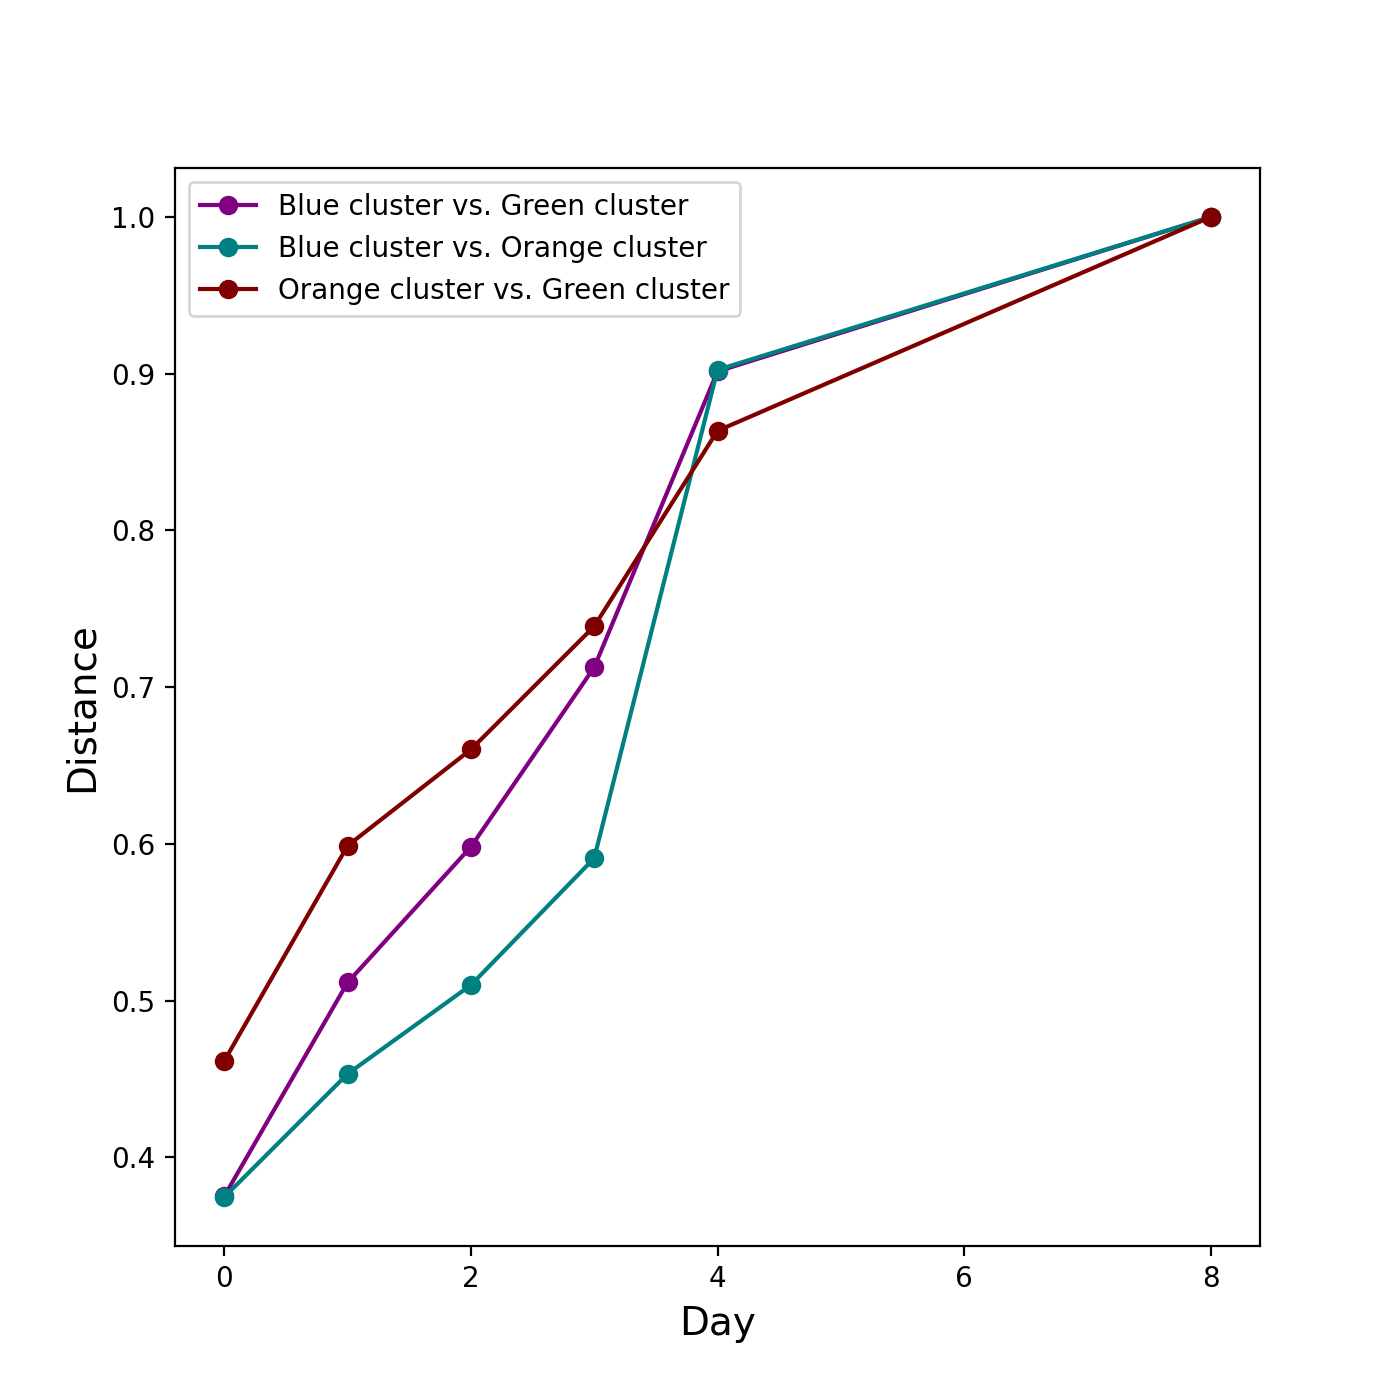

Values for Blue cluster vs. Green cluster:
[0.3751485347747803, 0.511513352394104, 0.5980663299560547, 0.7126123905181885, 0.9014473557472229, 1.0]
Values for Blue cluster vs. Orange cluster:
[0.37460631132125854, 0.45315849781036377, 0.5098662972450256, 0.5908189415931702, 0.9024559855461121, 0.9999999403953552]
Values for Orange cluster vs. Green cluster:
[0.461479127407074, 0.5987829566001892, 0.6601930856704712, 0.7387697696685791, 0.8635509610176086, 0.9999998807907104]


In [111]:
divergence_df['name'] = divergence_df['name1'].str.split('/').str.get(0) + ' vs. ' + divergence_df['name2'].str.split('/').str.get(
        0)
plt.figure(figsize=(7, 7))
plt.xlabel("Day", fontsize=14)
plt.ylabel("Distance", fontsize=14)
colors = ['purple', 'teal', 'maroon']
for i, (p, d) in enumerate(divergence_df.groupby('name')):
    plt.plot(d['day2'], d['distance'], '-o', label=p, color=colors[i])
    
    # Print out the values for d['distance']
    print(f"Values for {p}:")
    print(d['distance'].tolist())
    
plt.legend(loc='best')


# Shared descendent (convergence of trajectories)-day0

In [69]:
convergence_df = wot.tmap.trajectory_divergence(adata, trajectory_ds_day0, distance_metric='total_variation')


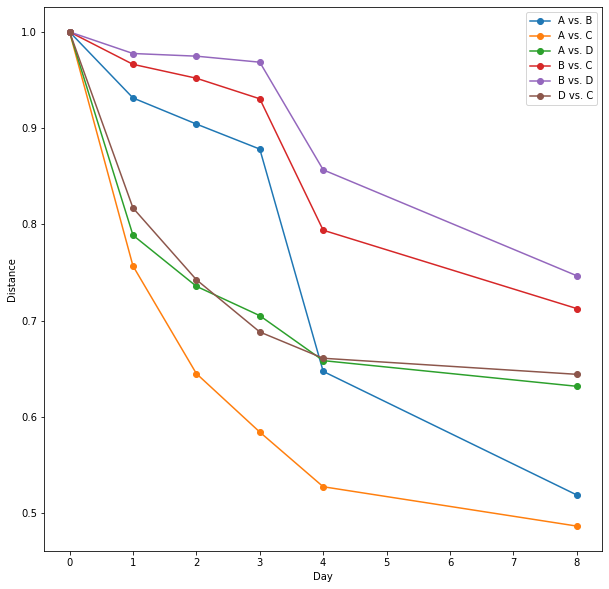

In [70]:
convergence_df['name'] = convergence_df['name1'].str.split('/').str.get(0) + ' vs. ' + convergence_df['name2'].str.split('/').str.get(
        0)
plt.figure(figsize=(10, 10))
plt.xlabel("Day")
plt.ylabel("Distance")
for p, d in convergence_df.groupby('name'):
    plt.plot(d['day2'], d['distance'], '-o', label=p)
plt.legend(loc='best')

# Fate Matrices Analysis

In [74]:
import math


In [75]:
cell_sets_fate = wot.io.read_sets('Desktop/EMT_Optimal_Transport/cell_cluster_rename.gmt', as_dict=True)


/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:304: FutureWarning: X.dtype being converted to np.float32 from int8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=x, obs=obs, var=var)


In [76]:
target_destinations = tmap_model.population_from_cell_sets(cell_sets_fate, at_time=8)

In [77]:
fate_ds = tmap_model.fates(target_destinations)


/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:69: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=X, obs=obs, var=pd.DataFrame(index=pop_names))


In [93]:
fate_ds.var.index

Index(['Low EMT', 'High EMT', 'Medium EMT'], dtype='object')

In [94]:
fate_dropdown1 = widgets.Dropdown(
    options=fate_ds.var.index,
    description='Fate 1:'
)
fate_dropdown2 = widgets.Dropdown(
    options=fate_ds.var.index,
    description='Fate 2:',
    value=fate_ds.var.index[1]
)
day_dropdown_fate = widgets.Dropdown(
    options=fate_ds.obs['day'].unique(),
    description='Day',
    value=1
)


def update_fate_vis(name1, name2,day):
    figure = plt.figure(figsize=(7, 7))   

    fate1 = fate_ds[:,name1][fate_ds.obs['day']==day].X.flatten()
    fate2 = fate_ds[:,name2][fate_ds.obs['day']==day].X.flatten()

    Nrows = len(fate1)
    x = np.zeros(Nrows)
    y = np.zeros(Nrows)
    P = np.array([[1,0],[np.cos(2*math.pi/3),math.sin(2*math.pi/3)],[math.cos(4*math.pi/3),math.sin(4*math.pi/3)]])

    for i in range(0,Nrows):
        ff = np.array([fate1[i],fate2[i],1-(fate1[i]+fate2[i])])
        x[i] = (ff @ P)[0]
        y[i] = (ff @ P)[1]
    
    vx = P[:,0]
    vy = P[:,1]
    t1 = plt.Polygon(P, color=(0,0,0,0.1))
    plt.gca().add_patch(t1)
    
    plt.scatter(x,y)
    #plt.scatter(vx,vy)
    #plt.scatter(0,0)
    plt.text(P[0,0]+.1, P[0,1], name1)
    plt.text(P[1,0]-.1, P[1,1]+.1, name2)
    plt.text(P[2,0]-.1, P[2,1]-.2, 'Medium EMT')
    plt.axis('equal')
    plt.axis('off')
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('{} vs. {} on day {}'.format(name1, name2,day))

widgets.interact(update_fate_vis, name1=fate_dropdown1, name2=fate_dropdown2,day=day_dropdown_fate)

interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_fate_vis(name1, name2, day)>

In [95]:
def update_trajectory_vis_snapshot_group_by_fate(day):
    _trajectory_ds = trajectory_ds[trajectory_ds.obs['day']==day]
    fig, ax = plt.subplots(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = _trajectory_ds.obs.copy()
    binned_df['values_1'] = _trajectory_ds[:, 'Low EMT'].X
    binned_df['values_2'] = _trajectory_ds[:, 'High EMT'].X
    binned_df['values_3'] = _trajectory_ds[:, 'Medium EMT'].X
    binned_df['values'] = _trajectory_ds[:, 'Low EMT'].X + _trajectory_ds[:, 'Medium EMT'].X + _trajectory_ds[:, 'High EMT'].X
  

    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    
    
    z = ['']*len(binned_df['x'])
    for i in range(0,len(binned_df['x'])):
        if binned_df['values_1'][i]/binned_df['values'][i]   > 0.75:
            z[i] = "fate1"
        elif binned_df['values_2'][i]/binned_df['values'][i] > 0.75:
            z[i] = "fate2"
        elif binned_df['values_3'][i]/binned_df['values'][i] > 0.75:
            z[i] = "fate3"
        else: 
            z[i] = "fate4"
    
    test = {'col1': binned_df['x'], 'col2': binned_df['y'], 'col3': z}
    d_test = pd.DataFrame(data=test)
    

    colors = {'fate1':'blue', 'fate2':'orange', 'fate3':'green', 'fate4':'gray'}
    
    ax.scatter(x = d_test.col1, y=d_test.col2, c=d_test.col3.map(colors),
                   s=6, marker=',', edgecolors='none')
    #plt.colorbar().ax.set_title('Trajectory')

widgets.interact(update_trajectory_vis_snapshot_group_by_fate, day=day_dropdown_fate)


interactive(children=(Dropdown(description='Day', index=1, options=(0.0, 1.0, 2.0, 3.0, 4.0, 8.0), value=1.0),…

<function __main__.update_trajectory_vis_snapshot_group_by_fate(day)>

In [96]:
def update_trajectory_vis_snapshot_group_by_fate_2(day):
    _trajectory_ds = trajectory_ds[trajectory_ds.obs['day']==day]
    fig, ax = plt.subplots(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = _trajectory_ds.obs.copy()
    binned_df['values_1'] = fate_ds[:, 'Low EMT'][fate_ds.obs['day']==day].X.flatten()
    binned_df['values_2'] = fate_ds[:, 'High EMT'][fate_ds.obs['day']==day].X.flatten()
    binned_df['values_3'] = fate_ds[:, 'Medium EMT'][fate_ds.obs['day']==day].X.flatten()
  

    #binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    
    
    z = ['']*len(binned_df['x'])
    for i in range(0,len(binned_df['x'])):
        if binned_df['values_1'][i]   > 0.85:
            z[i] = "fate1"
        elif binned_df['values_2'][i] > 0.85:
            z[i] = "fate2"
        elif binned_df['values_3'][i] > 0.85:
            z[i] = "fate3"
        else: 
            z[i] = "fate4"
    
    test = {'col1': binned_df['x'], 'col2': binned_df['y'], 'col3': z}
    d_test = pd.DataFrame(data=test)
    

    colors = {'fate1':'blue', 'fate2':'orange', 'fate3':'green', 'fate4':'gray'}
    
    ax.scatter(x = d_test.col1, y=d_test.col2, c=d_test.col3.map(colors),
                   s=6, marker=',', edgecolors='none')
    #plt.colorbar().ax.set_title('Trajectory')

widgets.interact(update_trajectory_vis_snapshot_group_by_fate_2, day=day_dropdown_fate)

interactive(children=(Dropdown(description='Day', index=1, options=(0.0, 1.0, 2.0, 3.0, 4.0, 8.0), value=1.0),…

<function __main__.update_trajectory_vis_snapshot_group_by_fate_2(day)>

In [97]:
from collections import Counter

In [138]:

def update_fate_vis_group(name1, name2,day):
    fig, ax = plt.subplots(figsize=(7, 7))

    fate1 = fate_ds[:,name1][fate_ds.obs['day']==day].X.flatten()
    fate2 = fate_ds[:,name2][fate_ds.obs['day']==day].X.flatten()

    Nrows = len(fate1)
    x = np.zeros(Nrows)
    y = np.zeros(Nrows)
    P = np.array([[1,0],[np.cos(2*math.pi/3),math.sin(2*math.pi/3)],[math.cos(4*math.pi/3),math.sin(4*math.pi/3)]])

    for i in range(0,Nrows):
        ff = np.array([fate1[i],fate2[i],1-(fate1[i]+fate2[i])])
        x[i] = (ff @ P)[0]
        y[i] = (ff @ P)[1]
    
    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.91:
            z[i] = "fate1"
        elif fate2[i] > 0.91:
            z[i] = "fate2"
        elif 1-(fate1[i]+fate2[i]) > 0.91:
            z[i] = "fate3"
        else: 
            z[i] = "fate4"
            
    fate_counts = Counter(z)
    total_elements = len(z)
    for fate, count in fate_counts.items():
        percentage = (count / total_elements) * 100
        print(f"{fate}: {count} ({percentage:.2f}%)")

    
    d = {'col1': x, 'col2': y, 'col3': z}
    df = pd.DataFrame(data=d)
    
    vx = P[:,0]
    vy = P[:,1]
    t1 = plt.Polygon(P, color=(0,0,0,0.1))
    plt.gca().add_patch(t1)
    
    colors = {'fate1':'blue', 'fate2':'orange', 'fate3':'green', 'fate4':'gray'}

    
    plt.scatter(x = df.col1, y=df.col2, c=df.col3.map(colors))
    #plt.scatter(vx,vy)
    #plt.scatter(0,0)
    plt.text(P[0,0]+.1, P[0,1], name1)
    plt.text(P[1,0]-.1, P[1,1]+.1, name2)
    plt.text(P[2,0]-.1, P[2,1]-.2, 'Medium EMT')
    plt.axis('equal')
    plt.axis('off')
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('{} vs. {} on day {}'.format(name1, name2,day))

widgets.interact(update_fate_vis_group, name1=fate_dropdown1, name2=fate_dropdown2,day=day_dropdown_fate)

interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_fate_vis_group(name1, name2, day)>

In [115]:
gene_set_dropdown_gs_fate_EMT = widgets.Dropdown(
    options=gene_set_scores_df_EMT.columns,
    description='Gene signature:'
)

day_dropdown_variance = widgets.Dropdown(
    options=fate_ds.obs['day'].unique(),
    description='Day',
    value=1
)


def update_fate_vis_gene_signature_EMT_modified_variance(name1, name2, day, gs):
    pd_series_day = gene_set_scores_df_EMT[gene_set_scores_df_EMT['day']==day]
    pd_series = pd_series_day[gs]
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.01), pd_series.quantile(1))]

    fate_temp = fate_ds[fate_ds.obs['day']==day][pd_series.between(pd_series.quantile(.01), pd_series.quantile(1))]
    
    fate1 = fate_temp[:,name1].X.flatten()
    fate2 = fate_temp[:,name2].X.flatten()

    Nrows = len(fate1)

    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.85:
            z[i] = "Low EMT"
        elif fate2[i] > 0.85:
            z[i] = "High EMT"
        elif 1-(fate1[i]+fate2[i]) > 0.85:
            z[i] = "Medium EMT"
        else: 
            z[i] = "Undetermined"
            
    # Create a new DataFrame with pd_series_adjusted and z
    df = pd.DataFrame({'pd_series_adjusted': pd_series_adjusted, 'z': z})
    df_grouped = df.groupby('z')
    variances = df_grouped['pd_series_adjusted'].var()
    means = df_grouped['pd_series_adjusted'].mean()
    table = pd.DataFrame({'means': means, 'variances': variances})
    table = table.rename(columns={'z': 'Fate Prediction (Threshold: 0.8)'})
    
    return table


In [116]:
# define the function to update the visualization
def update_viz(name1, name2, day, gs):
    table = update_fate_vis_gene_signature_EMT_modified_variance(name1, name2, day, gs)
    display(table)

# create the interactive widget and display it
widget = widgets.interact(update_viz, name1=fate_dropdown1, name2=fate_dropdown2, day=day_dropdown_variance, gs=gene_set_dropdown_gs_fate_EMT)
display(widget)

interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_viz(name1, name2, day, gs)>

In [117]:
pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [136]:
import seaborn as sns


#gene_single_scores_df_GRN
#gene_set_scores_df_EMT
#gene_set_scores_df_PNAS_stemness

gene_set_dropdown_gs_fate_EMT_1 = widgets.Dropdown(
    options=gene_set_scores_df_EMT.columns,
    description='Gene signature:'
)

gene_set_dropdown_gs_fate_EMT_2 = widgets.Dropdown(
    options=gene_set_scores_df_PNAS_stemness.columns,
    description='Gene signature:'
)


day_dropdown_variance_correlation = widgets.Dropdown(
    options=fate_ds.obs['day'].unique(),
    description='Day',
    value=1
)



def pearson_corr(series1, series2):
    return series1.corr(series2)



def update_fate_vis_gene_signature_EMT_stem_modified_variance(name1, name2, day, gs1, gs2):
    pd_series_day1 = gene_set_scores_df_EMT[gene_set_scores_df_EMT['day']==day]
    pd_series_day2 = gene_set_scores_df_PNAS_stemness[gene_set_scores_df_PNAS_stemness['day']==day]
    pd_series1 = pd_series_day1[gs1]
    pd_series2 = pd_series_day2[gs2]
    
    # Get boolean masks for the conditions
    mask1 = pd_series1.between(pd_series1.quantile(.0), pd_series1.quantile(1))
    mask2 = pd_series2.between(pd_series2.quantile(.0), pd_series2.quantile(1))

    # Get the intersection of the two masks
    intersection_mask = mask1 & mask2

    pd_series_adjusted1 = pd_series1[intersection_mask]
    pd_series_adjusted2 = pd_series2[intersection_mask]
    
    #pd_series_adjusted1=pd_series1
    #pd_series_adjusted2=pd_series2

    fate_temp = fate_ds[fate_ds.obs['day']==day][intersection_mask]
    
    #fate_temp = fate_ds[fate_ds.obs['day']==day]
    
    fate1 = fate_temp[:,name1].X.flatten()
    fate2 = fate_temp[:,name2].X.flatten()

    Nrows = len(fate1)

    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.90:
            z[i] = "Low EMT"
        elif fate2[i] > 0.90:
            z[i] = "High EMT"
        elif 1-(fate1[i]+fate2[i]) > 0.90:
            z[i] = "Medium EMT"
        else: 
            z[i] = "Undetermined"
            
    # Create a new DataFrame with pd_series_adjusted and z
    df = pd.DataFrame({'pd_series_adjusted1': pd_series_adjusted1, 'pd_series_adjusted2': pd_series_adjusted2, 'z': z})
    df_grouped = df.groupby('z')
    variances1 = df_grouped['pd_series_adjusted1'].var()
    means1 = df_grouped['pd_series_adjusted1'].mean()
    variances2 = df_grouped['pd_series_adjusted2'].var()
    means2 = df_grouped['pd_series_adjusted2'].mean()
    correlations = df_grouped.apply(lambda group: pearson_corr(group['pd_series_adjusted1'], group['pd_series_adjusted2']))
    
    # Create a scatter plot with the points colored based on 'z'
    color_map = {
    "Low EMT": "blue",
    "High EMT": "orange",
    "Medium EMT": "green",
    "Undetermined": "gray"}

    plt.figure(figsize=(10, 7))
    scatter_plot = sns.scatterplot(data=df, x='pd_series_adjusted1', y='pd_series_adjusted2', hue='z', palette=color_map, legend=False)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper', borderaxespad=0)
    plt.xlabel("EMT score", fontsize=24)
    plt.ylabel("Stemness score", fontsize=24)
    plt.title('Scatter plot of gene signatures with correlation and cell fate categories', fontsize=14)
    #plt.legend(loc ="upper left", fontsize=24)  
    # Show correlation coefficients for each group on the plot
    plt.tick_params(labelsize=24)

    plt.show()
   
   
    
    
    table = pd.DataFrame({'means_1': means1, 'variances_1': variances1, 'means_2': means2, 'variances_2': variances2})
    table['correlations'] = correlations
    table = table.rename(columns={'z': 'Fate Prediction (Threshold: 0.8)'})
    
    return table



In [137]:
# define the function to update the visualization
def update_viz_2D(name1, name2, day, gs1, gs2):
    table = update_fate_vis_gene_signature_EMT_stem_modified_variance(name1, name2, day, gs1, gs2)
    display(table)

# create the interactive widget and display it
widget = widgets.interact(update_viz_2D, name1=fate_dropdown1, name2=fate_dropdown2, day=day_dropdown_variance_correlation, gs1=gene_set_dropdown_gs_fate_EMT_1, gs2=gene_set_dropdown_gs_fate_EMT_2)
display(widget)

interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_viz_2D(name1, name2, day, gs1, gs2)>

In [133]:

#gene_single_scores_df_GRN
#gene_set_scores_df_EMT
#gene_set_scores_df_PNAS_stemness

gene_set_dropdown_gs_fate_violin = widgets.Dropdown(
    options=gene_set_scores_df_PNAS_stemness.columns,
    description='Gene signature:'
)



def series_violin_plot_gene_signatures_EMT_categories(name1, name2, gs1, palette=None, exclude_undetermined=True):
    unique_days = np.sort(fate_ds.obs['day'].unique())
    #unique_days = [4.0, 8.0]
    num_days = len(unique_days)
    
    # Define the default color palette if not provided
    if palette is None:
        palette = {
            "Low EMT": "blue",
            "High EMT": "orange",
            "Medium EMT": "green",
            "Undetermined": "gray"
        }
    
    # Create a figure with subplots for each unique day
    fig, axes = plt.subplots(1, num_days, figsize=(2.5 * num_days, 7), sharey=True)
    
    for idx, (day, ax) in enumerate(zip(unique_days, axes)):
        # Preprocessing and filtering data
        pd_series_day1 = gene_set_scores_df_PNAS_stemness[gene_set_scores_df_PNAS_stemness['day'] == day]
        pd_series1 = pd_series_day1[gs1]

        mask1 = pd_series1.between(pd_series1.quantile(.0), pd_series1.quantile(1))
        pd_series_adjusted1 = pd_series1[mask1]

        fate_temp = fate_ds[fate_ds.obs['day'] == day][mask1]
        fate1 = fate_temp[:, name1].X.flatten()
        fate2 = fate_temp[:, name2].X.flatten()
        
        
        
        Nrows = len(fate1)
        z = [''] * Nrows
        for i in range(0, Nrows):
            if fate1[i] > 0.75:
                z[i] = "Low EMT"
            elif fate2[i] > 0.75:
                z[i] = "High EMT"
            elif 1 - (fate1[i] + fate2[i]) > 0.75:
                z[i] = "Medium EMT"
            else:
                z[i] = "Undetermined"

        # Create a new DataFrame with pd_series_adjusted and z
        df = pd.DataFrame({'pd_series_adjusted1': pd_series_adjusted1, 'z': z})

        # Exclude the "Undetermined" category if requested
        if exclude_undetermined:
            df = df[df['z'] != 'Undetermined']

        # Specify the order of the x-axis
        x_axis_order = ["Low EMT", "Medium EMT", "High EMT"]
        x_axis_labels = ["L", "M", "H"]

        sns.violinplot(ax=ax, data=df, x='z', y='pd_series_adjusted1', inner="quartiles", palette=palette, order=x_axis_order)
        ax.set_title(f'Day {day}', fontsize=24)
        ax.set_xlabel('EMT',  fontsize=24)
        ax.set_xticklabels(x_axis_labels,  fontsize=24)  # Set the fontsize parameter and labels to the desired values
        ax.tick_params(axis='y', labelsize=24)

        
        if idx == 0:
            ax.set_ylabel("EMT score distribution", fontsize=24)
        else:
            ax.set_ylabel('')
    

    plt.show()


In [134]:
from scipy import stats
import pandas as pd

def compute_statistics(name1, name2, gs1, exclude_undetermined=True):
    unique_days = np.sort(fate_ds.obs['day'].unique())
    stats_df = pd.DataFrame(columns=['Day', 'Pair', 'Levene Statistic', 'Levene p-value', 'T-test Statistic', 'T-test p-value', 'Mean Group1', 'Mean Group2', 'Variance Group1', 'Variance Group2'])
    
    for day in unique_days:
        # Preprocessing and filtering data
        pd_series_day1 = gene_set_scores_df_PNAS_stemness[gene_set_scores_df_PNAS_stemness['day'] == day]
        pd_series1 = pd_series_day1[gs1]

        mask1 = pd_series1.between(pd_series1.quantile(.0), pd_series1.quantile(1))
        pd_series_adjusted1 = pd_series1[mask1]

        fate_temp = fate_ds[fate_ds.obs['day'] == day][mask1]
        fate1 = fate_temp[:, name1].X.flatten()
        fate2 = fate_temp[:, name2].X.flatten()

        Nrows = len(fate1)
        z = [''] * Nrows
        for i in range(0, Nrows):
            if fate1[i] > 0.90:
                z[i] = "Low EMT"
            elif fate2[i] > 0.90:
                z[i] = "High EMT"
            elif 1 - (fate1[i] + fate2[i]) > 0.90:
                z[i] = "Medium EMT"
            else:
                z[i] = "Undetermined"

        # Create a new DataFrame with pd_series_adjusted and z
        df = pd.DataFrame({'pd_series_adjusted1': pd_series_adjusted1, 'z': z})

        # Exclude the "Undetermined" category if requested
        if exclude_undetermined:
            df = df[df['z'] != 'Undetermined']
        
        # Compute the statistics for this day
        categories = df['z'].unique()
        for i in range(len(categories)):
            for j in range(i+1, len(categories)):
                group1 = df[df['z'] == categories[i]]['pd_series_adjusted1']
                group2 = df[df['z'] == categories[j]]['pd_series_adjusted1']
                levene_stat, levene_p = stats.levene(group1, group2)
                ttest_stat, ttest_p = stats.ttest_ind(group1, group2)

                # Calculate mean and variance for both groups
                mean1, mean2 = group1.mean(), group2.mean()
                var1, var2 = group1.var(), group2.var()

                stats_df = stats_df.append({
                    'Day': day,
                    'Pair': f'{categories[i]} vs {categories[j]}',
                    'Levene Statistic': levene_stat,
                    'Levene p-value': levene_p,
                    'T-test Statistic': ttest_stat,
                    'T-test p-value': ttest_p,
                    'Mean Group1': mean1,
                    'Mean Group2': mean2,
                    'Variance Group1': var1,
                    'Variance Group2': var2
                }, ignore_index=True)
    
    return stats_df


In [126]:
#full screen of Jupyter

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))


/var/folders/8r/89vnr7ys5lq5cwbdyl6pj5th0000gp/T/ipykernel_11417/1927140235.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [127]:
#Original screen of Jupyter

display(HTML("<style>.container { width:100% !important; }</style>"))


In [122]:
# define the function to update the visualization
def update_viz_2D_violin_seris(name1, name2, gs1):
    table = series_violin_plot_gene_signatures_EMT_categories(name1, name2, gs1)
    display(table)

# create the interactive widget and display it
widget = widgets.interact(update_viz_2D_violin_seris, name1=fate_dropdown1, name2=fate_dropdown2,  gs1=gene_set_dropdown_gs_fate_violin)
display(widget)

interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_viz_2D_violin_seris(name1, name2, gs1)>

In [135]:
# define the function to update the visualization
def update_viz_2D_stat_seris(name1, name2, gs1):
    table = compute_statistics(name1, name2, gs1)
    display(table)

# create the interactive widget and display it
widget = widgets.interact(update_viz_2D_stat_seris, name1=fate_dropdown1, name2=fate_dropdown2,  gs1=gene_set_dropdown_gs_fate_violin)
display(widget)

interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_viz_2D_stat_seris(name1, name2, gs1)>

In [345]:
gene_set_dropdown_gs_fate = widgets.Dropdown(
    options=gene_set_scores_df.columns,
    description='Gene signature:'
)

def update_fate_vis_gene_signature_modified(name1, name2, day, gs):
    figure = plt.figure(figsize=(7, 7))   
    
    pd_series_day = gene_set_scores_df[gene_set_scores_df['day']==day]
    pd_series = pd_series_day[gs]
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]

    fate_temp = fate_ds[fate_ds.obs['day']==day][pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    
    fate1 = fate_temp[:,name1].X.flatten()
    fate2 = fate_temp[:,name2].X.flatten()

    Nrows = len(fate1)
    x = np.zeros(Nrows)
    y = np.zeros(Nrows)
    P = np.array([[1,0],[np.cos(2*math.pi/3),math.sin(2*math.pi/3)],[math.cos(4*math.pi/3),math.sin(4*math.pi/3)]])

    for i in range(0,Nrows):
        ff = np.array([fate1[i],fate2[i],1-(fate1[i]+fate2[i])])
        x[i] = (ff @ P)[0]
        y[i] = (ff @ P)[1]

    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.5:
            z[i] = "fate1"
        elif fate2[i] > 0.5:
            z[i] = "fate2"
        elif 1-(fate1[i]+fate2[i]) > 0.5:
            z[i] = "fate3"
        else: 
            z[i] = "undetermined"
    
    d = {'col1': x, 'col2': y, 'col3': z}
    df = pd.DataFrame(data=d)
    
    vx = P[:,0]
    vy = P[:,1]
    t1 = plt.Polygon(P, color=(0,0,0,0.1))
    plt.gca().add_patch(t1)
    
   
    plt.scatter(x = df.col1, y=df.col2, c=pd_series_adjusted, cmap='Reds')
    cb = plt.colorbar(location = 'left')
    cb.ax.set_title('Signature')
    #plt.scatter(vx,vy)
    #plt.scatter(0,0)
    plt.text(P[0,0]+.1, P[0,1], name1)
    plt.text(P[1,0]-.1, P[1,1]+.1, name2)
    plt.text(P[2,0]-.1, P[2,1]-.2, 'Medium EMT')
    plt.axis('equal')
    plt.axis('off')
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('day {}'.format(day))


def update_fate_vis_gene_signature(name1, name2, day, gs):
    figure = plt.figure(figsize=(7, 7))   

    fate1 = fate_ds[:,name1][fate_ds.obs['day']==day].X.flatten()
    fate2 = fate_ds[:,name2][fate_ds.obs['day']==day].X.flatten()

    Nrows = len(fate1)
    x = np.zeros(Nrows)
    y = np.zeros(Nrows)
    P = np.array([[1,0],[np.cos(2*math.pi/3),math.sin(2*math.pi/3)],[math.cos(4*math.pi/3),math.sin(4*math.pi/3)]])

    for i in range(0,Nrows):
        ff = np.array([fate1[i],fate2[i],1-(fate1[i]+fate2[i])])
        x[i] = (ff @ P)[0]
        y[i] = (ff @ P)[1]
    
   
    gene_set_score_coords = gene_set_scores_df[gene_set_scores_df['day']==day]


    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.5:
            z[i] = "fate1"
        elif fate2[i] > 0.5:
            z[i] = "fate2"
        elif 1-(fate1[i]+fate2[i]) > 0.5:
            z[i] = "fate3"
        else: 
            z[i] = "undetermined"
    
    d = {'col1': x, 'col2': y, 'col3': z}
    df = pd.DataFrame(data=d)
    
    vx = P[:,0]
    vy = P[:,1]
    t1 = plt.Polygon(P, color=(0,0,0,0.1))
    plt.gca().add_patch(t1)
    
   
    plt.scatter(x = df.col1, y=df.col2, c=gene_set_score_coords[gs], cmap='Reds')
    cb = plt.colorbar(location = 'left')
    cb.ax.set_title('Signature')
    #plt.scatter(vx,vy)
    #plt.scatter(0,0)
    plt.text(P[0,0]+.1, P[0,1], name1)
    plt.text(P[1,0]-.1, P[1,1]+.1, name2)
    plt.text(P[2,0]-.1, P[2,1]-.2, 'Medium EMT')
    plt.axis('equal')
    plt.axis('off')
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('day {}'.format(day))

widgets.interact(update_fate_vis_gene_signature_modified, name1=fate_dropdown1, name2=fate_dropdown2,day=day_dropdown, gs = gene_set_dropdown_gs_fate)


interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_fate_vis_gene_signature_modified(name1, name2, day, gs)>

In [346]:
gene_set_dropdown_gs_fate_EMT = widgets.Dropdown(
    options=gene_set_scores_df_EMT.columns,
    description='Gene signature:'
)

def update_fate_vis_gene_signature_EMT_modified(name1, name2, day, gs):
    figure = plt.figure(figsize=(7, 7))   
    
    pd_series_day = gene_set_scores_df_EMT[gene_set_scores_df_EMT['day']==day]
    pd_series = pd_series_day[gs]
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]

    fate_temp = fate_ds[fate_ds.obs['day']==day][pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    
    fate1 = fate_temp[:,name1].X.flatten()
    fate2 = fate_temp[:,name2].X.flatten()

    Nrows = len(fate1)
    x = np.zeros(Nrows)
    y = np.zeros(Nrows)
    P = np.array([[1,0],[np.cos(2*math.pi/3),math.sin(2*math.pi/3)],[math.cos(4*math.pi/3),math.sin(4*math.pi/3)]])

    for i in range(0,Nrows):
        ff = np.array([fate1[i],fate2[i],1-(fate1[i]+fate2[i])])
        x[i] = (ff @ P)[0]
        y[i] = (ff @ P)[1]

    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.5:
            z[i] = "fate1"
        elif fate2[i] > 0.5:
            z[i] = "fate2"
        elif 1-(fate1[i]+fate2[i]) > 0.5:
            z[i] = "fate3"
        else: 
            z[i] = "undetermined"
    
    d = {'col1': x, 'col2': y, 'col3': z}
    df = pd.DataFrame(data=d)
    
    vx = P[:,0]
    vy = P[:,1]
    t1 = plt.Polygon(P, color=(0,0,0,0.1))
    plt.gca().add_patch(t1)
    
   
    plt.scatter(x = df.col1, y=df.col2, c=pd_series_adjusted, cmap = "inferno")
    cb = plt.colorbar(location = 'left')
    cb.ax.set_title('Signature')
    #plt.scatter(vx,vy)
    #plt.scatter(0,0)
    plt.text(P[0,0]+.1, P[0,1], name1)
    plt.text(P[1,0]-.1, P[1,1]+.1, name2)
    plt.text(P[2,0]-.1, P[2,1]-.2, 'Medium EMT')
    plt.axis('equal')
    plt.axis('off')
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('day {}'.format(day))


def update_fate_vis_gene_signature_EMT(name1, name2, day, gs):
    figure = plt.figure(figsize=(7, 7))   

    fate1 = fate_ds[:,name1][fate_ds.obs['day']==day].X.flatten()
    fate2 = fate_ds[:,name2][fate_ds.obs['day']==day].X.flatten()

    Nrows = len(fate1)
    x = np.zeros(Nrows)
    y = np.zeros(Nrows)
    P = np.array([[1,0],[np.cos(2*math.pi/3),math.sin(2*math.pi/3)],[math.cos(4*math.pi/3),math.sin(4*math.pi/3)]])

    for i in range(0,Nrows):
        ff = np.array([fate1[i],fate2[i],1-(fate1[i]+fate2[i])])
        x[i] = (ff @ P)[0]
        y[i] = (ff @ P)[1]
    
    gene_set_score_coords_EMT = gene_set_scores_df_EMT[gene_set_scores_df_EMT['day']==day]

    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.5:
            z[i] = "fate1"
        elif fate2[i] > 0.5:
            z[i] = "fate2"
        elif 1-(fate1[i]+fate2[i]) > 0.5:
            z[i] = "fate3"
        else: 
            z[i] = "undetermined"
    
    d = {'col1': x, 'col2': y, 'col3': z}
    df = pd.DataFrame(data=d)
    
    vx = P[:,0]
    vy = P[:,1]
    t1 = plt.Polygon(P, color=(0,0,0,0.1))
    plt.gca().add_patch(t1)
    
   
    plt.scatter(x = df.col1, y=df.col2, c=gene_set_score_coords_EMT[gs], cmap = "inferno")
    cb = plt.colorbar(location = 'left')
    cb.ax.set_title('Signature')
    #plt.scatter(vx,vy)
    #plt.scatter(0,0)
    plt.text(P[0,0]+.1, P[0,1], name1)
    plt.text(P[1,0]-.1, P[1,1]+.1, name2)
    plt.text(P[2,0]-.1, P[2,1]-.2, 'Medium EMT')
    plt.axis('equal')
    plt.axis('off')
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('day {}'.format(day))

widgets.interact(update_fate_vis_gene_signature_EMT_modified, name1=fate_dropdown1, name2=fate_dropdown2,day=day_dropdown, gs = gene_set_dropdown_gs_fate_EMT)


interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_fate_vis_gene_signature_EMT_modified(name1, name2, day, gs)>

In [552]:
gene_set_dropdown_gs_fate_stemness = widgets.Dropdown(
    options=gene_set_scores_df_PNAS_stemness.columns,
    description='Gene signature:'
)

def update_fate_vis_gene_signature_PNAS_stemness_modifed(name1, name2, day, gs):
    figure = plt.figure(figsize=(7, 7))   

    fate1 = fate_ds[:,name1][fate_ds.obs['day']==day].X.flatten()
    fate2 = fate_ds[:,name2][fate_ds.obs['day']==day].X.flatten()

    Nrows = len(fate1)
    x = np.zeros(Nrows)
    y = np.zeros(Nrows)
    P = np.array([[1,0],[np.cos(2*math.pi/3),math.sin(2*math.pi/3)],[math.cos(4*math.pi/3),math.sin(4*math.pi/3)]])

    for i in range(0,Nrows):
        ff = np.array([fate1[i],fate2[i],1-(fate1[i]+fate2[i])])
        x[i] = (ff @ P)[0]
        y[i] = (ff @ P)[1]
    
    gene_set_score_coords_EMT = gene_set_scores_df_PNAS_stemness[gene_set_scores_df_PNAS_stemness['day']==day]

    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.5:
            z[i] = "fate1"
        elif fate2[i] > 0.5:
            z[i] = "fate2"
        elif 1-(fate1[i]+fate2[i]) > 0.5:
            z[i] = "fate3"
        else: 
            z[i] = "undetermined"
    
    d = {'col1': x, 'col2': y, 'col3': z}
    df = pd.DataFrame(data=d)
    
    vx = P[:,0]
    vy = P[:,1]
    t1 = plt.Polygon(P, color=(0,0,0,0.1))
    plt.gca().add_patch(t1)
    
   
    plt.scatter(x = df.col1, y=df.col2, c=gene_set_score_coords_EMT[gs], cmap = "inferno")
    cb = plt.colorbar(location = 'left')
    cb.ax.set_title('Signature')
    #plt.scatter(vx,vy)
    #plt.scatter(0,0)
    plt.text(P[0,0]+.1, P[0,1], name1)
    plt.text(P[1,0]-.1, P[1,1]+.1, name2)
    plt.text(P[2,0]-.1, P[2,1]-.2, 'Medium EMT')
    plt.axis('equal')
    plt.axis('off')
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('day {}'.format(day))

widgets.interact(update_fate_vis_gene_signature_PNAS_stemness_modifed, name1=fate_dropdown1, name2=fate_dropdown2,day=day_dropdown, gs = gene_set_dropdown_gs_fate_stemness)


interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_fate_vis_gene_signature_PNAS_stemness_modifed(name1, name2, day, gs)>

In [551]:
gene_set_dropdown_gs_fate_m = widgets.Dropdown(
    options=gene_single_scores_df_metabolism.columns,
    description='Gene signature:'
)



def update_fate_vis_gene_signature_m_modified(name1, name2, day, gs):
    figure = plt.figure(figsize=(7, 7))   
    
    pd_series_day = gene_single_scores_df_metabolism[gene_single_scores_df_metabolism['day']==day]
    pd_series = pd_series_day[gs]
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]

    fate_temp = fate_ds[fate_ds.obs['day']==day][pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    
    fate1 = fate_temp[:,name1].X.flatten()
    fate2 = fate_temp[:,name2].X.flatten()

    Nrows = len(fate1)
    x = np.zeros(Nrows)
    y = np.zeros(Nrows)
    P = np.array([[1,0],[np.cos(2*math.pi/3),math.sin(2*math.pi/3)],[math.cos(4*math.pi/3),math.sin(4*math.pi/3)]])

    for i in range(0,Nrows):
        ff = np.array([fate1[i],fate2[i],1-(fate1[i]+fate2[i])])
        x[i] = (ff @ P)[0]
        y[i] = (ff @ P)[1]

    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.5:
            z[i] = "fate1"
        elif fate2[i] > 0.5:
            z[i] = "fate2"
        elif 1-(fate1[i]+fate2[i]) > 0.5:
            z[i] = "fate3"
        else: 
            z[i] = "undetermined"
    
    d = {'col1': x, 'col2': y, 'col3': z}
    df = pd.DataFrame(data=d)
    
    vx = P[:,0]
    vy = P[:,1]
    t1 = plt.Polygon(P, color=(0,0,0,0.1))
    plt.gca().add_patch(t1)
    
   
    plt.scatter(x = df.col1, y=df.col2, c=pd_series_adjusted, cmap='Reds')
    cb = plt.colorbar(location = 'left')
    cb.ax.set_title('Signature')
    #plt.scatter(vx,vy)
    #plt.scatter(0,0)
    plt.text(P[0,0]+.1, P[0,1], name1)
    plt.text(P[1,0]-.1, P[1,1]+.1, name2)
    plt.text(P[2,0]-.1, P[2,1]-.2, 'Medium EMT')
    plt.axis('equal')
    plt.axis('off')
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('day {}'.format(day))


def update_fate_vis_gene_signature_m(name1, name2, day, gs):
    figure = plt.figure(figsize=(7, 7))   

    fate1 = fate_ds[:,name1][fate_ds.obs['day']==day].X.flatten()
    fate2 = fate_ds[:,name2][fate_ds.obs['day']==day].X.flatten()

    Nrows = len(fate1)
    x = np.zeros(Nrows)
    y = np.zeros(Nrows)
    P = np.array([[1,0],[np.cos(2*math.pi/3),math.sin(2*math.pi/3)],[math.cos(4*math.pi/3),math.sin(4*math.pi/3)]])

    for i in range(0,Nrows):
        ff = np.array([fate1[i],fate2[i],1-(fate1[i]+fate2[i])])
        x[i] = (ff @ P)[0]
        y[i] = (ff @ P)[1]
    
    gene_set_score_coords = gene_single_scores_df_metabolism[gene_single_scores_df_metabolism['day']==day]

    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.5:
            z[i] = "fate1"
        elif fate2[i] > 0.5:
            z[i] = "fate2"
        elif 1-(fate1[i]+fate2[i]) > 0.5:
            z[i] = "fate3"
        else: 
            z[i] = "undetermined"
    
    d = {'col1': x, 'col2': y, 'col3': z}
    df = pd.DataFrame(data=d)
    
    vx = P[:,0]
    vy = P[:,1]
    t1 = plt.Polygon(P, color=(0,0,0,0.1))
    plt.gca().add_patch(t1)
    
   
    plt.scatter(x = df.col1, y=df.col2, c=gene_set_score_coords[gs], cmap='Reds')
    cb = plt.colorbar(location = 'left')
    cb.ax.set_title('Signature')
    #plt.scatter(vx,vy)
    #plt.scatter(0,0)
    plt.text(P[0,0]+.1, P[0,1], name1)
    plt.text(P[1,0]-.1, P[1,1]+.1, name2)
    plt.text(P[2,0]-.1, P[2,1]-.2, 'Medium EMT')
    plt.axis('equal')
    plt.axis('off')
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('day {}'.format(day))

widgets.interact(update_fate_vis_gene_signature_m_modified, name1=fate_dropdown1, name2=fate_dropdown2,day=day_dropdown, gs = gene_set_dropdown_gs_fate_m)


interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_fate_vis_gene_signature_m_modified(name1, name2, day, gs)>

In [183]:
gene_set_dropdown_gs_fate_EMT = widgets.Dropdown(
    options=gene_single_scores_df_GRN.columns,
    description='Gene signature:'
)

def update_fate_vis_gene_signature_GRN_modified(name1, name2, day, gs):
    figure = plt.figure(figsize=(7, 7))   
    
    pd_series_day = gene_single_scores_df_GRN[gene_single_scores_df_GRN['day']==day]
    pd_series = pd_series_day[gs]
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]

    fate_temp = fate_ds[fate_ds.obs['day']==day][pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    
    fate1 = fate_temp[:,name1].X.flatten()
    fate2 = fate_temp[:,name2].X.flatten()

    Nrows = len(fate1)
    x = np.zeros(Nrows)
    y = np.zeros(Nrows)
    P = np.array([[1,0],[np.cos(2*math.pi/3),math.sin(2*math.pi/3)],[math.cos(4*math.pi/3),math.sin(4*math.pi/3)]])

    for i in range(0,Nrows):
        ff = np.array([fate1[i],fate2[i],1-(fate1[i]+fate2[i])])
        x[i] = (ff @ P)[0]
        y[i] = (ff @ P)[1]

    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.5:
            z[i] = "fate1"
        elif fate2[i] > 0.5:
            z[i] = "fate2"
        elif 1-(fate1[i]+fate2[i]) > 0.5:
            z[i] = "fate3"
        else: 
            z[i] = "undetermined"
    
    d = {'col1': x, 'col2': y, 'col3': z}
    df = pd.DataFrame(data=d)
    
    vx = P[:,0]
    vy = P[:,1]
    t1 = plt.Polygon(P, color=(0,0,0,0.1))
    plt.gca().add_patch(t1)
    
   
    plt.scatter(x = df.col1, y=df.col2, c=pd_series_adjusted, cmap='Purples')
    cb = plt.colorbar(location = 'left')
    cb.ax.set_title('Signature')
    #plt.scatter(vx,vy)
    #plt.scatter(0,0)
    plt.text(P[0,0]+.1, P[0,1], name1)
    plt.text(P[1,0]-.1, P[1,1]+.1, name2)
    plt.text(P[2,0]-.1, P[2,1]-.2, 'Medium EMT')
    plt.axis('equal')
    plt.axis('off')
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('day {}'.format(day))


def update_fate_vis_gene_signature_GRN(name1, name2, day, gs):
    figure = plt.figure(figsize=(7, 7))   

    fate1 = fate_ds[:,name1][fate_ds.obs['day']==day].X.flatten()
    fate2 = fate_ds[:,name2][fate_ds.obs['day']==day].X.flatten()

    Nrows = len(fate1)
    x = np.zeros(Nrows)
    y = np.zeros(Nrows)
    P = np.array([[1,0],[np.cos(2*math.pi/3),math.sin(2*math.pi/3)],[math.cos(4*math.pi/3),math.sin(4*math.pi/3)]])

    for i in range(0,Nrows):
        ff = np.array([fate1[i],fate2[i],1-(fate1[i]+fate2[i])])
        x[i] = (ff @ P)[0]
        y[i] = (ff @ P)[1]
    
    gene_set_score_coords_GRN = gene_single_scores_df_GRN[gene_single_scores_df_GRN['day']==day]

    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.5:
            z[i] = "fate1"
        elif fate2[i] > 0.5:
            z[i] = "fate2"
        elif 1-(fate1[i]+fate2[i]) > 0.5:
            z[i] = "fate3"
        else: 
            z[i] = "undetermined"
    
    d = {'col1': x, 'col2': y, 'col3': z}
    df = pd.DataFrame(data=d)
    
    vx = P[:,0]
    vy = P[:,1]
    t1 = plt.Polygon(P, color=(0,0,0,0.1))
    plt.gca().add_patch(t1)
    
   
    plt.scatter(x = df.col1, y=df.col2, c=gene_set_score_coords_GRN[gs], cmap='Purples')
    cb = plt.colorbar(location = 'left')
    cb.ax.set_title('Signature')
    #plt.scatter(vx,vy)
    #plt.scatter(0,0)
    plt.text(P[0,0]+.1, P[0,1], name1)
    plt.text(P[1,0]-.1, P[1,1]+.1, name2)
    plt.text(P[2,0]-.1, P[2,1]-.2, 'Medium EMT')
    plt.axis('equal')
    plt.axis('off')
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('day {}'.format(day))

widgets.interact(update_fate_vis_gene_signature_GRN_modified, name1=fate_dropdown1, name2=fate_dropdown2,day=day_dropdown, gs = gene_set_dropdown_gs_fate_EMT)


interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_fate_vis_gene_signature_GRN_modified(name1, name2, day, gs)>

In [184]:
fate_dropdown1 = widgets.Dropdown(
    options=fate_ds.var.index,
    description='Fate 1:'
)
fate_dropdown2 = widgets.Dropdown(
    options=fate_ds.var.index,
    description='Fate 2:',
    value=fate_ds.var.index[1]
)

def update_fate_vis(name1, name2):
    figure = plt.figure(figsize=(7, 7))
    fate1 = fate_ds[:, name1].X
    fate2 = fate_ds[:, name2].X
    p = np.log(1e-9 + np.divide(fate1, fate2, out=np.zeros_like(fate1), where=fate2 != 0))
    plt.scatter(fate_ds.obs['day'], p, s=4, marker=',')
    plt.xlabel('Day')
    plt.ylabel('Log Odds')
    plt.title('{} vs. {}'.format(name1, name2))

widgets.interact(update_fate_vis, name1=fate_dropdown1, name2=fate_dropdown2)

interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_fate_vis(name1, name2)>

In [383]:
input_file = "Desktop/EMT_Optimal_Transport/TG_metabolism/single_gene_metabolic.gmt"
output_file = "Desktop/EMT_Optimal_Transport/TG_metabolism/single_gene_metabolic.txt"

with open(input_file, 'r') as f_in, open(output_file, 'w') as f_out:
    for line in f_in:
        # Split the line into words
        words = line.strip().split()
        
        # Skip the line if there are less than 3 words
        if len(words) < 3:
            continue
        
        # Get the gene names (the third word and beyond)
        gene_names = words[2:]
        
        # Write gene names line by line to the output file
        for gene in gene_names:
            f_out.write(gene + '\n')

# Combine gene sets

In [218]:
def read_genes_from_file(file_path):
    with open(file_path, 'r') as file:
        genes = [line.strip() for line in file]
    return genes

# List of input text files with gene lists
input_files = ['Desktop/EMT_Optimal_Transport/TG_metabolism/TG_fatty_acid.txt',
               'Desktop/EMT_Optimal_Transport/TG_metabolism/TG_glycolysis.txt',
               'Desktop/EMT_Optimal_Transport/TG_metabolism/TG_OXYPHOS.txt'
               ]

# Combine all gene lists into a single set (removing duplicates)
combined_genes = set()
for file_path in input_files:
    genes = read_genes_from_file(file_path)
    combined_genes.update(genes)

# Convert the combined set back to a list
unique_genes = list(combined_genes)

# Print the combined unique gene list
print(unique_genes)

['ETFB', 'GLRX', 'MRPL15', 'ADIPOR2', 'BAX', 'VEGFA', 'SLC25A10', 'QSOX1', 'B4GALT4', 'MED24', 'DLAT', 'KMT5A', 'COX15', 'PTS', 'HSPA5', 'ETFA', 'ACSL1', 'ATP5MC3', 'MGLL', 'GCLC', 'ACAA1', 'LTC4S', 'ALDH7A1', 'SDHD', 'NASP', 'FASN', 'SUPV3L1', 'B4GALT7', 'MRPS30', 'GUSB', 'OSTC', 'ATP5ME', 'GPC1', 'RARS1', 'HMGCS1', 'CAPN5', 'IDH3G', 'PSMC4', 'GYS1', 'NDUFC2', 'VNN1', 'CASP7', 'CACNA1H', 'NQO2', 'ATP5MC2', 'UGDH', 'TIMM9', 'UBE2L6', 'PAM', 'OAT', 'PCBD1', 'DEPDC1', 'PHB2', 'ATP6V1H', 'TALDO1', 'MPI', 'GPC3', 'TOMM22', 'ACADS', 'EGLN3', 'ECHS1', 'ATP5MF', 'CTH', 'PPP2CB', 'IDH1', 'AFG3L2', 'PPFIA4', 'IER3', 'NTHL1', 'NDUFS1', 'UROS', 'GPX4', 'XYLT2', 'PC', 'LHX9', 'CD44', 'SDHB', 'PAXIP1', 'POLR3K', 'UQCRH', 'NDUFV2', 'TIMM8B', 'SDHC', 'EGFR', 'UQCRC1', 'NDUFV3', 'PDP1', 'CHST2', 'IDH3B', 'GYS2', 'CLN6', 'TPST1', 'TIMM13', 'ADORA2B', 'ELOVL5', 'DCN', 'AQP7', 'HPGD', 'ACOT8', 'CLDN3', 'ATP5F1B', 'MIX23', 'LHPP', 'NDUFS2', 'AKR1A1', 'NDUFA5', 'ATP5F1D', 'CPT2', 'MIF', 'NANP', 'PMPCA', 'O

In [219]:
def save_genes_to_file(genes, file_path):
    with open(file_path, 'w') as file:
        for gene in genes:
            file.write(gene + '\n')

# Save the unique genes list to a new text file
save_genes_to_file(unique_genes, 'Desktop/EMT_Optimal_Transport/TG_metabolism/TG_combined_fatty_OXY_gly.txt')


#  Compare pairwise sets

In [869]:
cell_set_dict_MH = {'Medium EMT': major_cell_sets['Medium EMT'], 'High EMT': major_cell_sets['High EMT']}
cell_set_MH =  tmap_model.population_from_cell_sets(cell_set_dict_MH, at_time=8)
fate_ds_test_MH = tmap_model.fates(cell_set_MH)

/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:69: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=X, obs=obs, var=pd.DataFrame(index=pop_names))


In [870]:
results_MH_only =  wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([2])], fate_ds_test_MH,  compare= 'all' ) 

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))


In [871]:
results_MH_only = results_MH_only[(results_MH_only['name1'] == 'Medium EMT')&(results_MH_only['name2'] == 'High EMT')]  


In [872]:
results_MH_only.sort_values('fold_change', ascending=False).head(20)


fold_change     mean1     mean2  fraction_expressed1  \
TGFBI      1.530677  3.665217  3.239507             0.999736   
KRT8       1.409396  1.441818  1.098657             0.966148   
DSP        1.372709  1.076335  0.759550             0.906427   
CDH1       1.148772  0.223292  0.084598             0.388911   
POSTN      1.067520  0.263543  0.198205             0.216730   
CDH2       1.058084  0.339294  0.282834             0.617254   
KMT2C      1.033458  0.227304  0.194393             0.488643   
EPCAM      1.030806  0.124300  0.093959             0.263320   
JARID2     1.014962  0.229054  0.214203             0.495152   
SNAI1      1.006749  0.134221  0.127495             0.284620   
PRRX1      1.000000  0.000000  0.000000             0.000000   
TGFB1      0.998082  0.457417  0.459337             0.724220   
KMT2A      0.984514  0.376584  0.392191             0.690874   
ZEB2       0.981897  0.074095  0.092364             0.187702   
TWIST1     0.968636  0.184439  0.216306             0.407932   
ZEB1       0.955138  0.127330  0.173230             0.302605   
EED        0.944722  0.092473  0.149337             0.253915   
EZH2       0.882294  0.127347  0.252577             0.306422   
SUZ12      0.867031  0.333743  0.476424             0.630387   
PHF19      0.659388  0.462164  0.878608             0.620411   

        fraction_expressed2    t_score         t_pval          t_fdr  \
TGFBI              0.997280  24.520672  7.655436e-125  1.454533e-123   
KRT8               0.919281  20.629614   1.242694e-90   2.236849e-89   
DSP                0.808969  18.722509   1.582352e-75   2.689999e-74   
CDH1               0.176451  16.786987   3.202822e-61   5.124515e-60   
POSTN              0.194287   4.136220   3.593514e-05   2.874450e-04   
CDH2               0.579451   6.009298   2.003549e-09   2.203904e-08   
KMT2C              0.452187   4.200613   2.710903e-05   2.439548e-04   
EPCAM              0.195522   4.309899   1.666322e-05   1.666197e-04   
JARID2             0.480231   1.854057   6.379289e-02   2.807835e-01   
SNAI1              0.281103   0.947137   3.436171e-01   7.172050e-01   
PRRX1              0.000000   0.000000   1.000000e+00   1.000000e+00   
TGFB1              0.738481  -0.176192   8.601508e-01   9.804422e-01   
KMT2A              0.710854  -1.606395   1.082534e-01   3.676379e-01   
ZEB2               0.254383  -3.519338   4.366758e-04   2.617196e-03   
TWIST1             0.486050  -3.961276   7.564100e-05   5.293669e-04   
ZEB1               0.410521  -6.814070   1.067759e-11   1.281311e-10   
EED                0.394864 -10.131276   7.119730e-24   9.255649e-23   
EZH2               0.549665 -16.480513   2.841073e-59   4.261609e-58   
SUZ12              0.769571 -13.908793   3.967682e-43   5.554755e-42   
PHF19              0.899118 -30.986797  3.425938e-192  6.851876e-191   

        fraction_expressed_ratio  day1  day2       name1     name2  
TGFBI                   1.002462   2.0   2.0  Medium EMT  High EMT  
KRT8                    1.050977   2.0   2.0  Medium EMT  High EMT  
DSP                     1.120457   2.0   2.0  Medium EMT  High EMT  
CDH1                    2.203389   2.0   2.0  Medium EMT  High EMT  
POSTN                   1.115454   2.0   2.0  Medium EMT  High EMT  
CDH2                    1.065228   2.0   2.0  Medium EMT  High EMT  
KMT2C                   1.080603   2.0   2.0  Medium EMT  High EMT  
EPCAM                   1.346578   2.0   2.0  Medium EMT  High EMT  
JARID2                  1.031063   2.0   2.0  Medium EMT  High EMT  
SNAI1                   1.012505   2.0   2.0  Medium EMT  High EMT  
PRRX1                   1.000000   2.0   2.0  Medium EMT  High EMT  
TGFB1                   0.980692   2.0   2.0  Medium EMT  High EMT  
KMT2A                   0.971897   2.0   2.0  Medium EMT  High EMT  
ZEB2                    0.737973   2.0   2.0  Medium EMT  High EMT  
TWIST1                  0.839313   2.0   2.0  Medium EMT  High EMT  
ZEB1                    0.737188   2.0   2.0  

In [873]:
cell_set_dict_HM = {'High EMT': major_cell_sets['High EMT'], 'Medium EMT': major_cell_sets['Medium EMT']}
cell_set_HM =  tmap_model.population_from_cell_sets(cell_set_dict_HM, at_time=8)
fate_ds_test_HM = tmap_model.fates(cell_set_HM)

/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:69: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=X, obs=obs, var=pd.DataFrame(index=pop_names))


In [874]:
results_HM_only =  wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([8])], fate_ds_test_HM,  compare= 'all' ) 

In [875]:
results_HM_only = results_HM_only[(results_HM_only['name2'] == 'Medium EMT')&(results_HM_only['name1'] == 'High EMT')]  

In [876]:
def create_combined_df(results, group_name):
    fold_change_df = results['fold_change'].reset_index()
    fold_change_df.columns = ['gene', 'fold_change']
    fdr_value_df = results['t_pval'].reset_index()
    fdr_value_df.columns = ['gene', 't_pval']
    combined_df = fold_change_df.merge(fdr_value_df, on='gene')
    combined_df['group'] = group_name
    combined_df['log2_fold_change'] = np.log2(combined_df['fold_change'])
    combined_df['-log10_p_value'] = -np.log10(combined_df['t_pval'])
    return combined_df


combined_MH = create_combined_df(results_MH_only, 'Medium EMT compared to High EMT')
combined_HM = create_combined_df(results_HM_only, 'High EMT compared to Medium EMT')

all_results_MH = pd.concat([combined_MH], ignore_index=True)
all_results_MH.to_csv('Desktop/EMT_Optimal_Transport/MH_gene_expression_data.csv', index=False)


all_results_HM = pd.concat([combined_HM], ignore_index=True)
all_results_HM.to_csv('Desktop/EMT_Optimal_Transport/HM_gene_expression_data.csv', index=False)

In [877]:



# Load the data from R
r_dataframe = pd.read_csv("Desktop/EMT_Optimal_Transport/volcano_data_zhang_M_epi_from_zhang.csv")

# Drop the 'Unnamed: 0' column
r_dataframe = r_dataframe.drop(columns=['Unnamed: 0'])

# Rename the columns
r_dataframe.columns = ['gene', 'log2_fold_change', '-log10_p_value']

# Add a column to indicate the source
r_dataframe['source'] = 'C1-sgEED-Epi / C1-sgKMT2D-Epi' 


# Load the data from python
all_results_MH = pd.read_csv('Desktop/EMT_Optimal_Transport/MH_gene_expression_data.csv')
all_results_MH['source'] = 'Partial EMT / high EMT (day 2)'

<IPython.core.display.Javascript object>


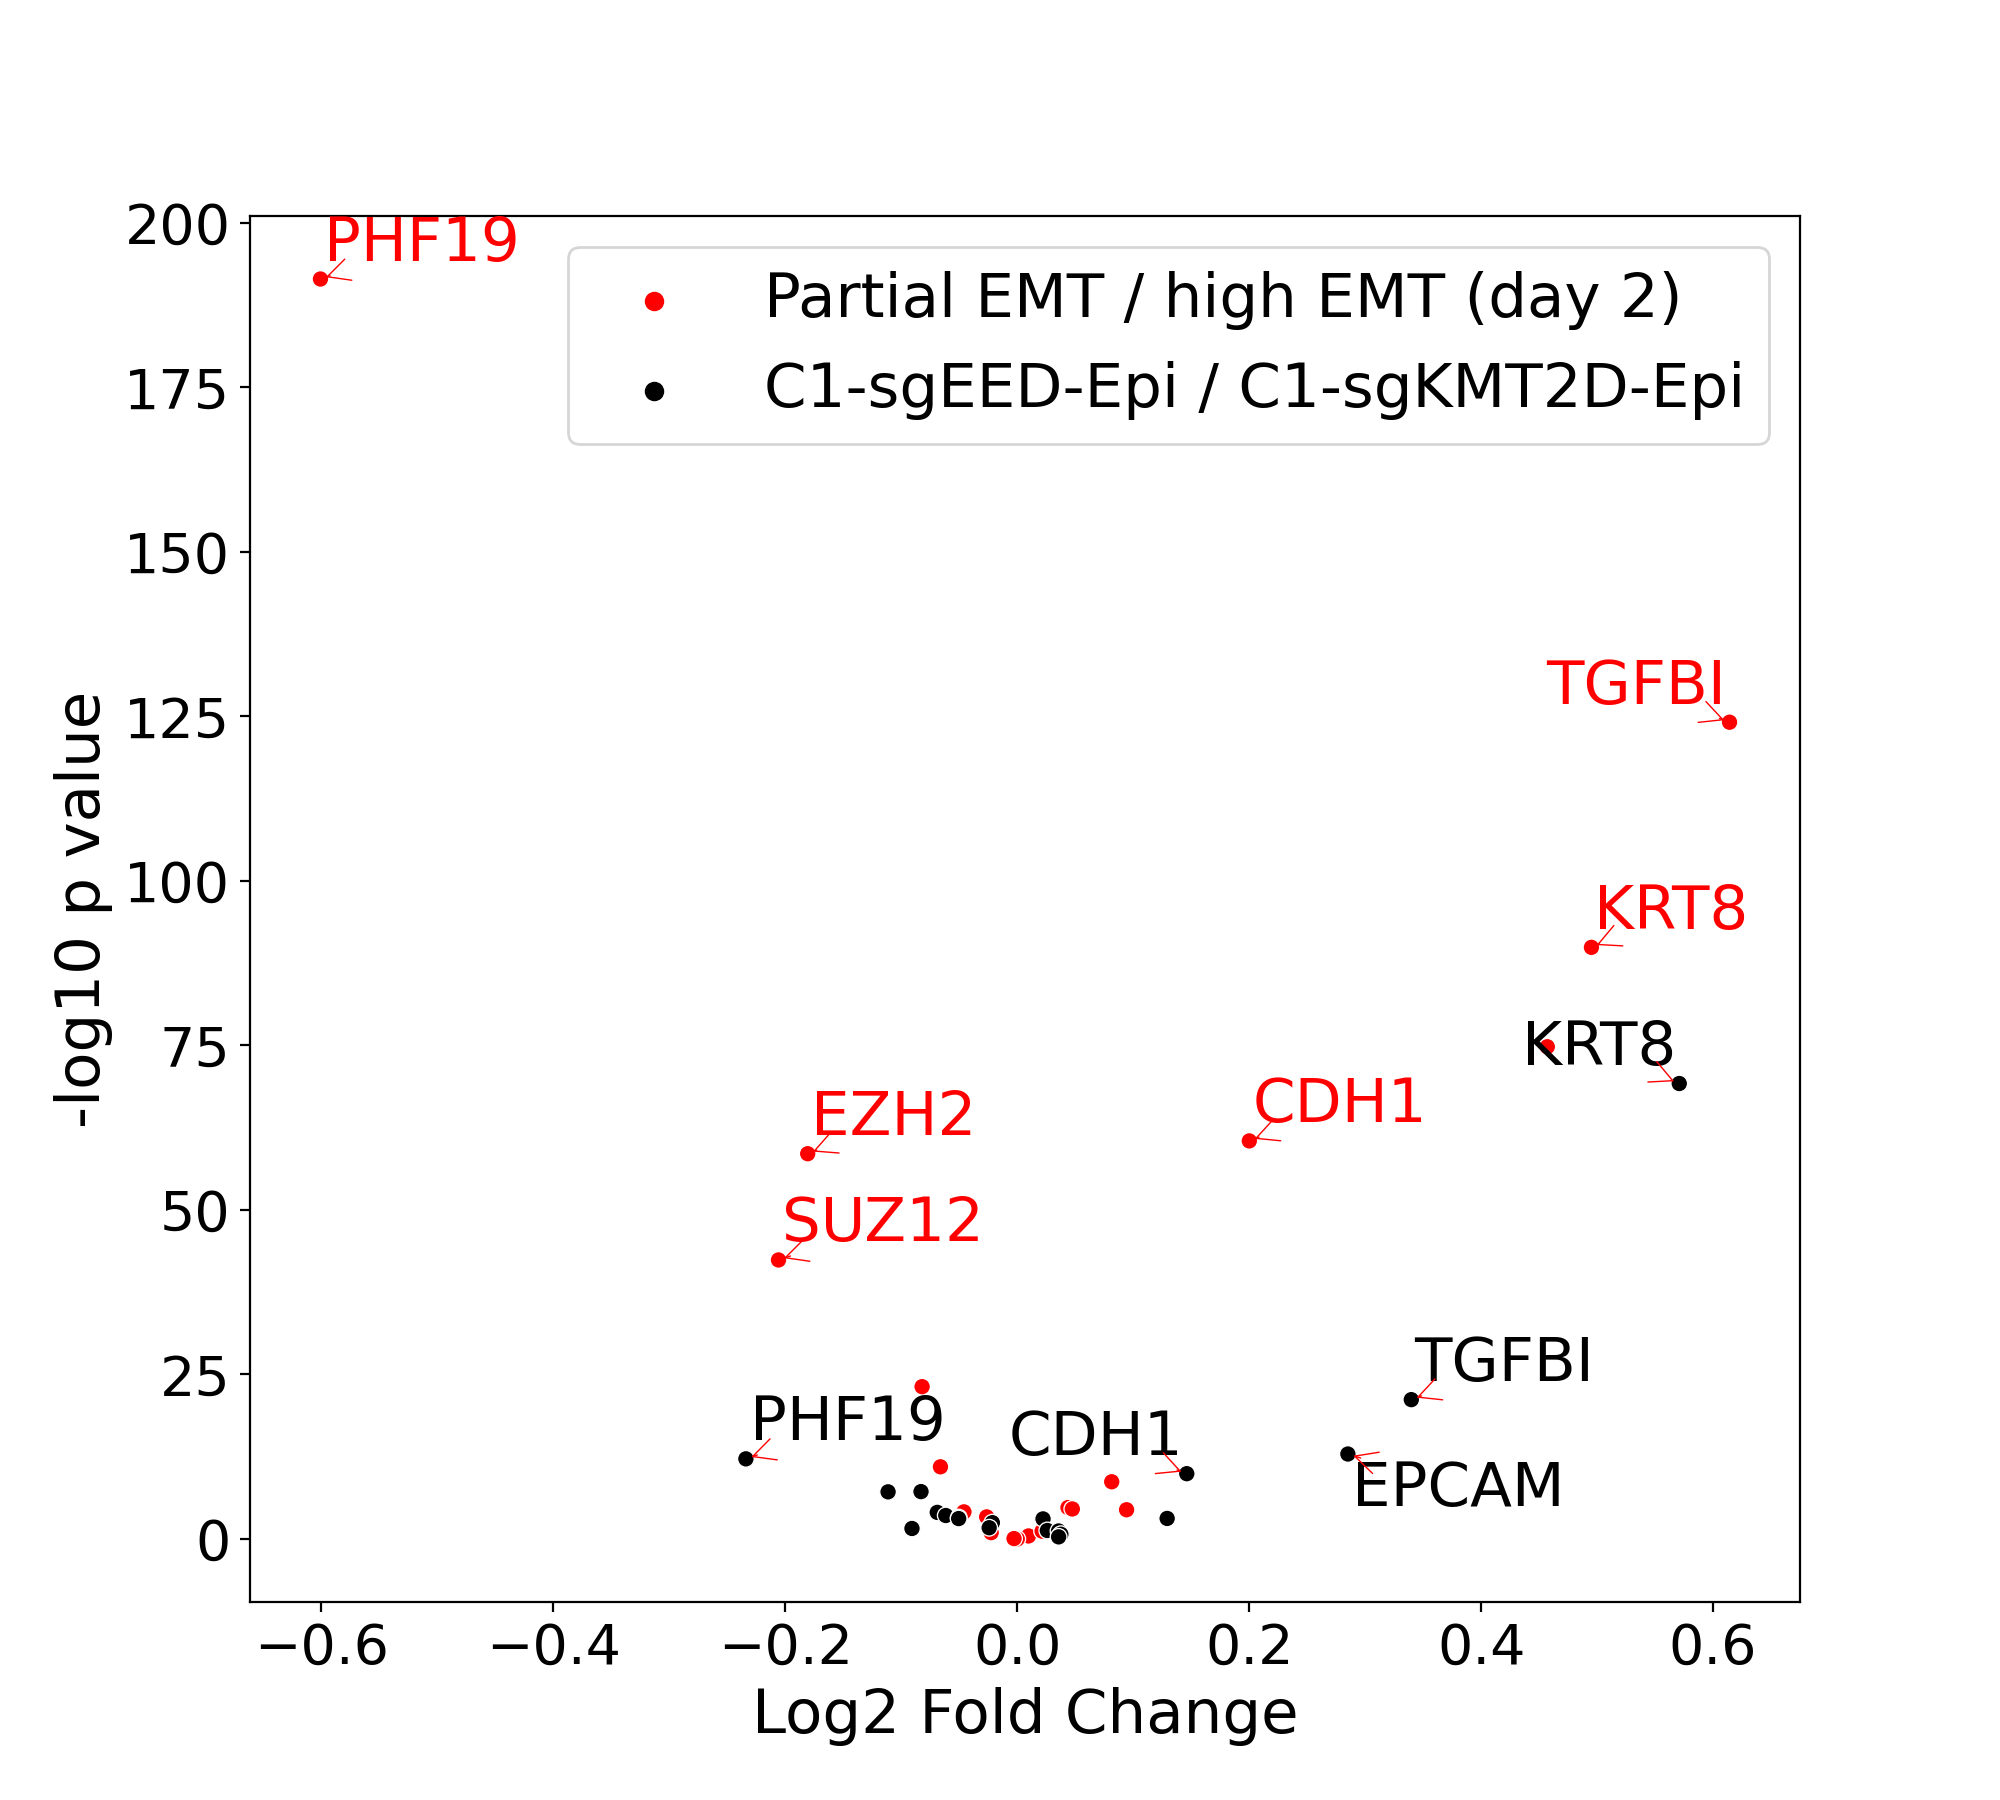

In [889]:
from adjustText import adjust_text


# Concatenate the two dataframes
all_data = pd.concat([all_results_MH, r_dataframe])

def create_volcano_plot_validation(data, title, log2_fold_change_threshold, neg_log10_fdr_threshold):
    plt.figure(figsize=(10, 9))
    
    custom_palette = {
        'C1-sgEED-Epi / C1-sgKMT2D-Epi': 'black',
        'Partial EMT / high EMT (day 2)': 'red'
    }
    
    plot = sns.scatterplot(data=data, x='log2_fold_change', y='-log10_p_value', hue='source', palette=custom_palette)

    texts = []
    
    # Dict of genes you want to exclude for a specific group
    exclude_genes = {'C1-sgEED-Epi / C1-sgKMT2D-Epi': ['MTF2', 'ZEB2', 'JARID2', 'EZH2',  'SNAI1', 'DPY30'],
                     'Partial EMT / high EMT (day 2)': ['DSP']} #['EZH1', 'EZH2', 'DSP', "JARID2", 'SNAI1', 'MTF2']

    for index, row in data.iterrows():
        if (abs(row['log2_fold_change']) > log2_fold_change_threshold) and (row['-log10_p_value'] > neg_log10_fdr_threshold):
            if row['gene'] not in exclude_genes.get(row['source'], []):
                color = custom_palette[row['source']]
                texts.append(plot.text(row['log2_fold_change'], row['-log10_p_value'], row['gene'], fontsize=22, ha='center', color=color))

    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

    plt.xlabel('Log2 Fold Change', fontsize=22)
    plt.ylabel('-log10 p value', fontsize=22)
    plt.title(title)
    plt.legend(loc = "upper right", fontsize=22)
    plt.show()


# Load the combined data from the CSV file
data = pd.read_csv('Desktop/EMT_Optimal_Transport/all_gene_expression_data.csv')

log2_fold_change_threshold = .1  # Change this value according to your data
neg_log10_fdr_threshold = 1 # Change this value according to your data

create_volcano_plot_validation(all_data, '', log2_fold_change_threshold, neg_log10_fdr_threshold)

# Predictive Transcription Factors

In [1143]:
TFS_PATH = 'Desktop/EMT_Optimal_Transport/TG_stemness/LIM_MAMMARY_STEM_CELL_UP.txt'

In [1144]:
major_cell_sets = wot.io.read_sets('Desktop/EMT_Optimal_Transport/cell_cluster_rename.gmt', as_dict=True)

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:304: FutureWarning: X.dtype being converted to np.float32 from int8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=x, obs=obs, var=var)


In [1145]:
# Load expression dataset and subset to transcription factors

adata_TF = wot.io.read_dataset(VAR_DS_PATH, obs=[CELL_DAYS_PATH], var_filter=TFS_PATH)

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))
/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:246: FutureWarning: X.dtype being converted to np.float32 from int8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=x, obs=obs, var=var)


In [1146]:
target_cell_set_M = tmap_model.population_from_cell_sets({'Medium EMT': major_cell_sets['Medium EMT']}, at_time=8)
target_cell_set_L = tmap_model.population_from_cell_sets({'Low EMT': major_cell_sets['Low EMT']}, at_time=8)
target_cell_set_H = tmap_model.population_from_cell_sets({'High EMT': major_cell_sets['High EMT']}, at_time=8)

In [1147]:
# Compute fate matrix for IPS 
fate_ds_M = tmap_model.fates(target_cell_set_M)
fate_ds_L = tmap_model.fates(target_cell_set_L)
fate_ds_H = tmap_model.fates(target_cell_set_H)


/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:69: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=X, obs=obs, var=pd.DataFrame(index=pop_names))
/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:69: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=X, obs=obs, var=pd.DataFrame(index=pop_names))
/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:69: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion wi

In [1148]:
# Find differentially expressed genes at day 1
results_M = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([2])], fate_ds_M, compare='all')
results_L = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([2])], fate_ds_L, compare='all')
results_H = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([2])], fate_ds_H, compare='all')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))


In [1149]:
import numpy as np

def create_combined_df(results, group_name):
    fold_change_df = results['fold_change'].reset_index()
    fold_change_df.columns = ['gene', 'fold_change']
    fdr_value_df = results['t_pval'].reset_index()
    fdr_value_df.columns = ['gene', 't_pval']
    combined_df = fold_change_df.merge(fdr_value_df, on='gene')
    combined_df['group'] = group_name
    combined_df['log2_fold_change'] = np.log2(combined_df['fold_change'])
    combined_df['-log10_p_value'] = -np.log10(combined_df['t_pval'])
    return combined_df


combined_L = create_combined_df(results_L, 'Low EMT')
combined_M = create_combined_df(results_M, 'Medium EMT')
combined_H = create_combined_df(results_H, 'High EMT')

all_results = pd.concat([combined_L, combined_M, combined_H], ignore_index=True)
all_results.to_csv('Desktop/EMT_Optimal_Transport/all_gene_expression_data.csv', index=False)

all_results_MH = pd.concat([combined_M, combined_H], ignore_index=True)
all_results_MH.to_csv('Desktop/EMT_Optimal_Transport/MH_gene_expression_data.csv', index=False)

all_results_L = pd.concat([combined_L], ignore_index=True)
all_results_L.to_csv('Desktop/EMT_Optimal_Transport/L_gene_expression_data.csv', index=False)


all_results_M = pd.concat([combined_M], ignore_index=True)
all_results_M.to_csv('Desktop/EMT_Optimal_Transport/M_gene_expression_data.csv', index=False)

all_results_H = pd.concat([combined_H], ignore_index=True)
all_results_H.to_csv('Desktop/EMT_Optimal_Transport/H_gene_expression_data.csv', index=False)


<IPython.core.display.Javascript object>


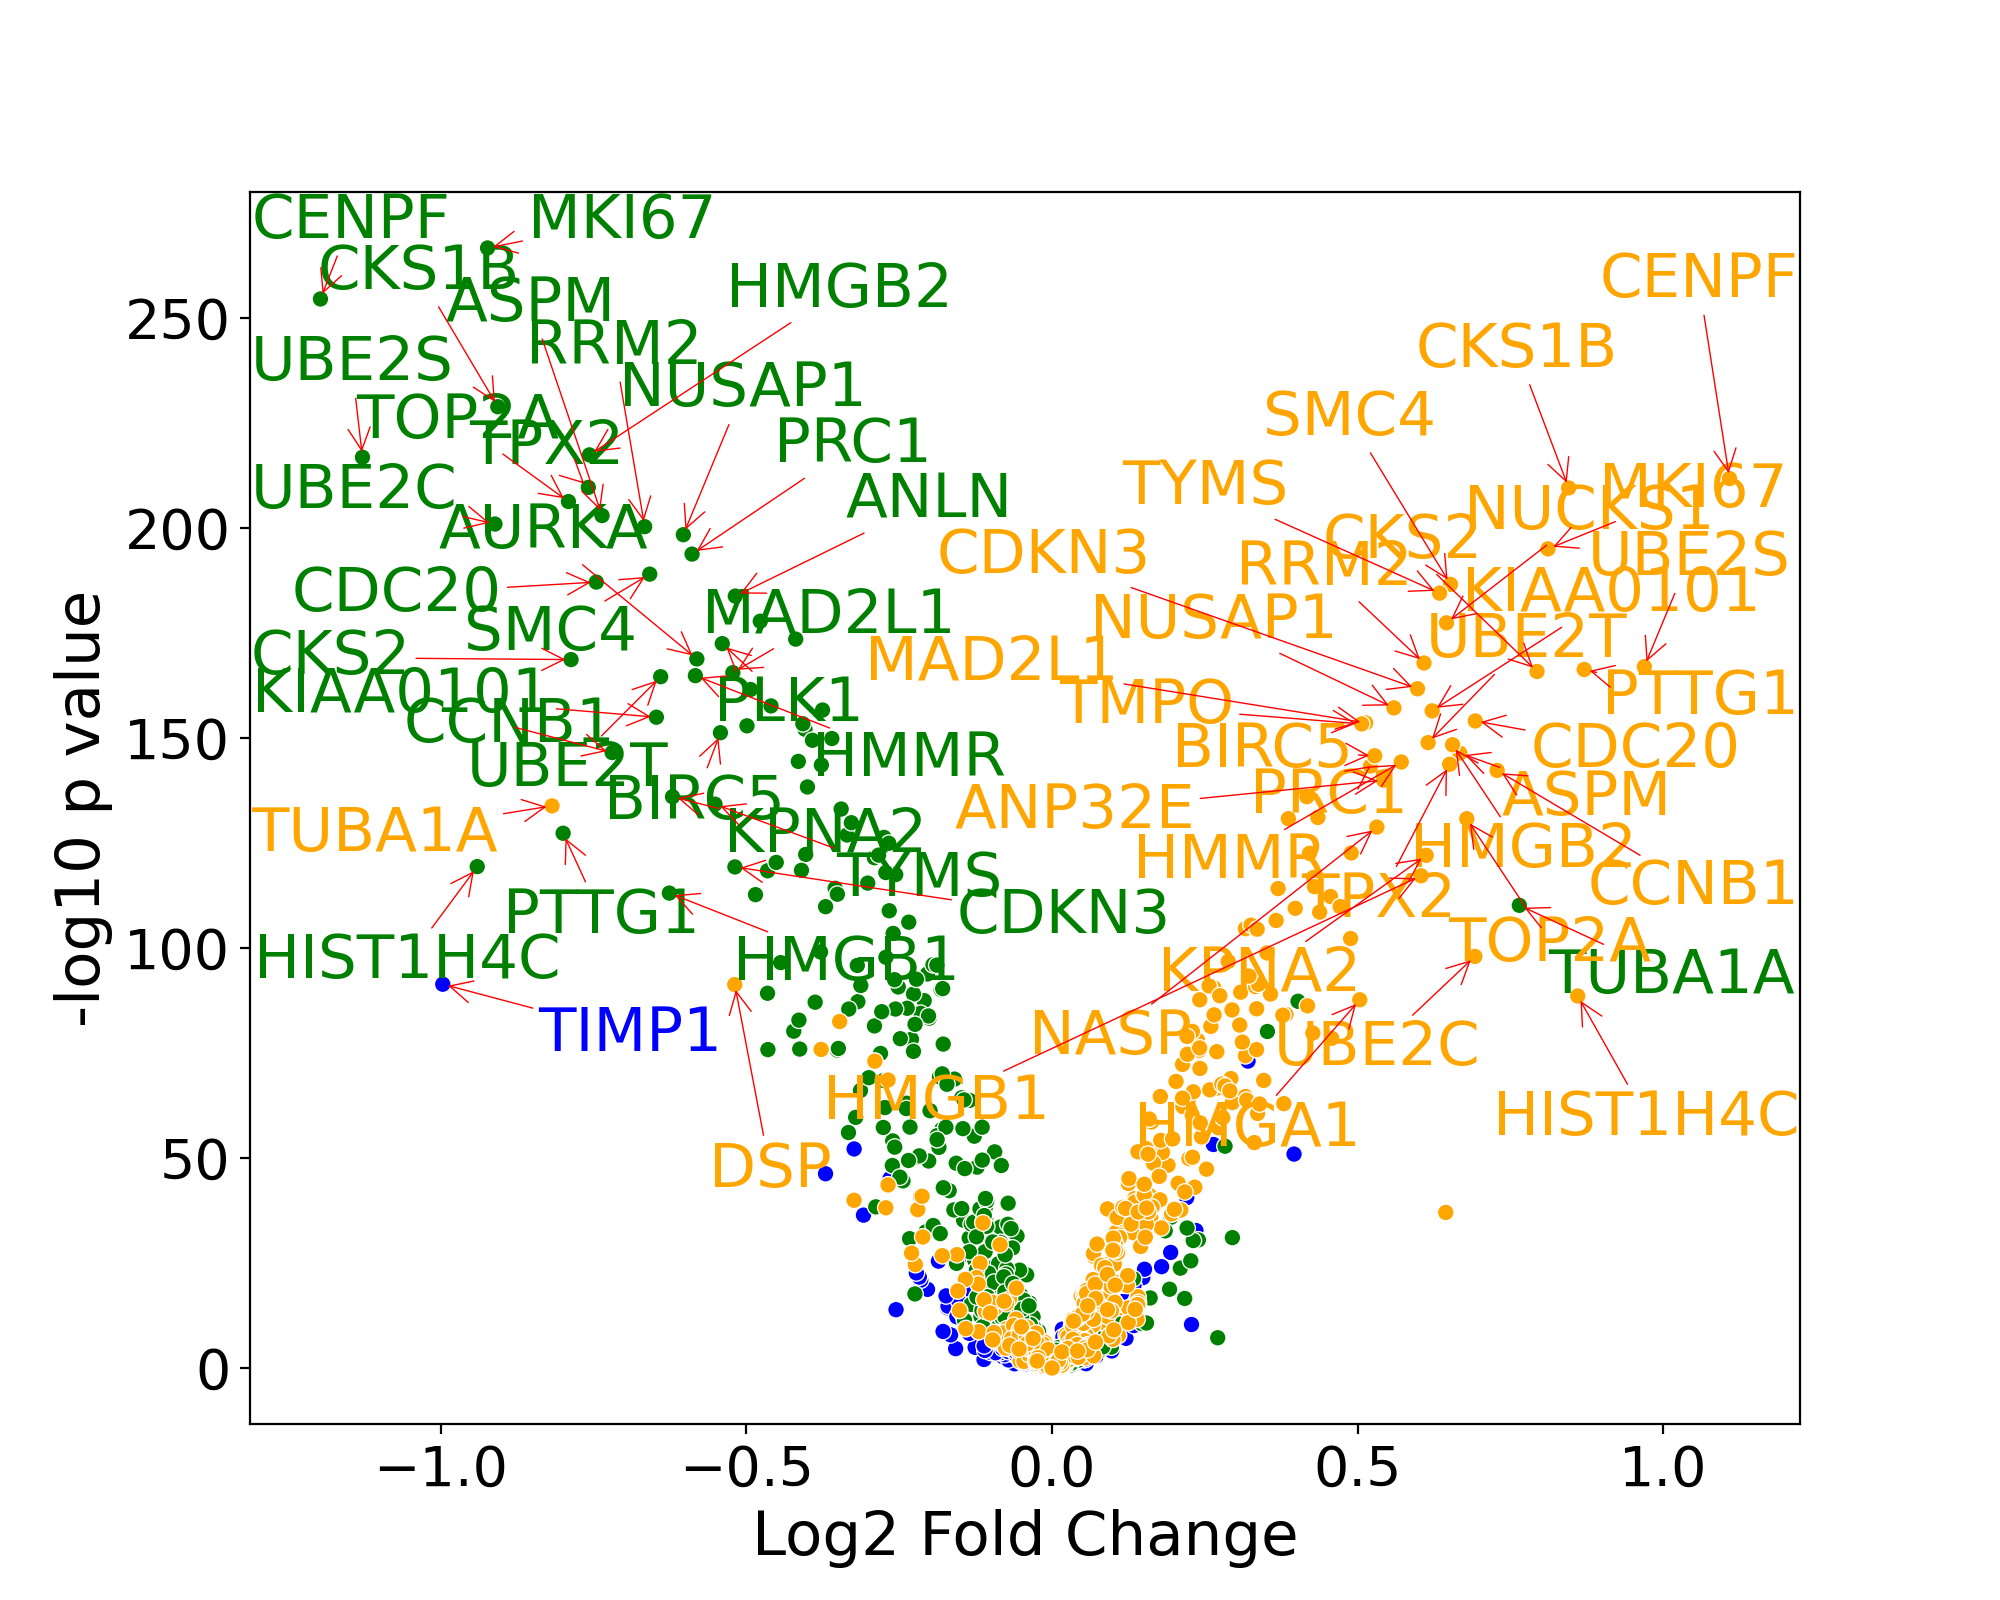

In [1139]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

def create_volcano_plot(data, title, log2_fold_change_threshold, neg_log10_fdr_threshold):
    plt.figure(figsize=(10, 8))
    
    custom_palette = {
        'Low EMT': 'blue',
        'Medium EMT': 'green',
        'High EMT': 'orange'
    }
    
    plot = sns.scatterplot(data=data, x='log2_fold_change', y='-log10_p_value', hue='group', palette=custom_palette)

    texts = []
    for index, row in data.iterrows():
        if (abs(row['log2_fold_change']) > log2_fold_change_threshold) and (row['-log10_p_value'] > neg_log10_fdr_threshold):
            color = custom_palette[row['group']]
            texts.append(plot.text(row['log2_fold_change'], row['-log10_p_value'], row['gene'], fontsize=22, ha='center', color=color))

    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

    plt.xlabel('Log2 Fold Change', fontsize=22)
    plt.ylabel('-log10 p value', fontsize=22)
    plt.title(title)
    #plt.legend(loc = "lower right", fontsize=22)
    plt.legend().set_visible(False) 
    plt.show()

# Load the combined data from the CSV file
data = pd.read_csv('Desktop/EMT_Optimal_Transport/all_gene_expression_data.csv')

log2_fold_change_threshold = .5  # Change this value according to your data
neg_log10_fdr_threshold = 50  # Change this value according to your data

create_volcano_plot(data, '', log2_fold_change_threshold, neg_log10_fdr_threshold)






In [757]:

# Load the data from R
r_dataframe = pd.read_csv("Desktop/EMT_Optimal_Transport/volcano_data_zhang_M_mes_from_zhang.csv")

# Drop the 'Unnamed: 0' column
r_dataframe = r_dataframe.drop(columns=['Unnamed: 0'])

# Rename the columns
r_dataframe.columns = ['gene', 'log2_fold_change', '-log10_p_value']

# Add a column to indicate the source
r_dataframe['source'] = 'Control group (Zhang et al)'


# Load the data from python
all_results_L = pd.read_csv('Desktop/EMT_Optimal_Transport/L_gene_expression_data.csv')
all_results_L['source'] = 'Gene expression (day 8) of failed EMT fate (Deshmusk et al)'

<IPython.core.display.Javascript object>


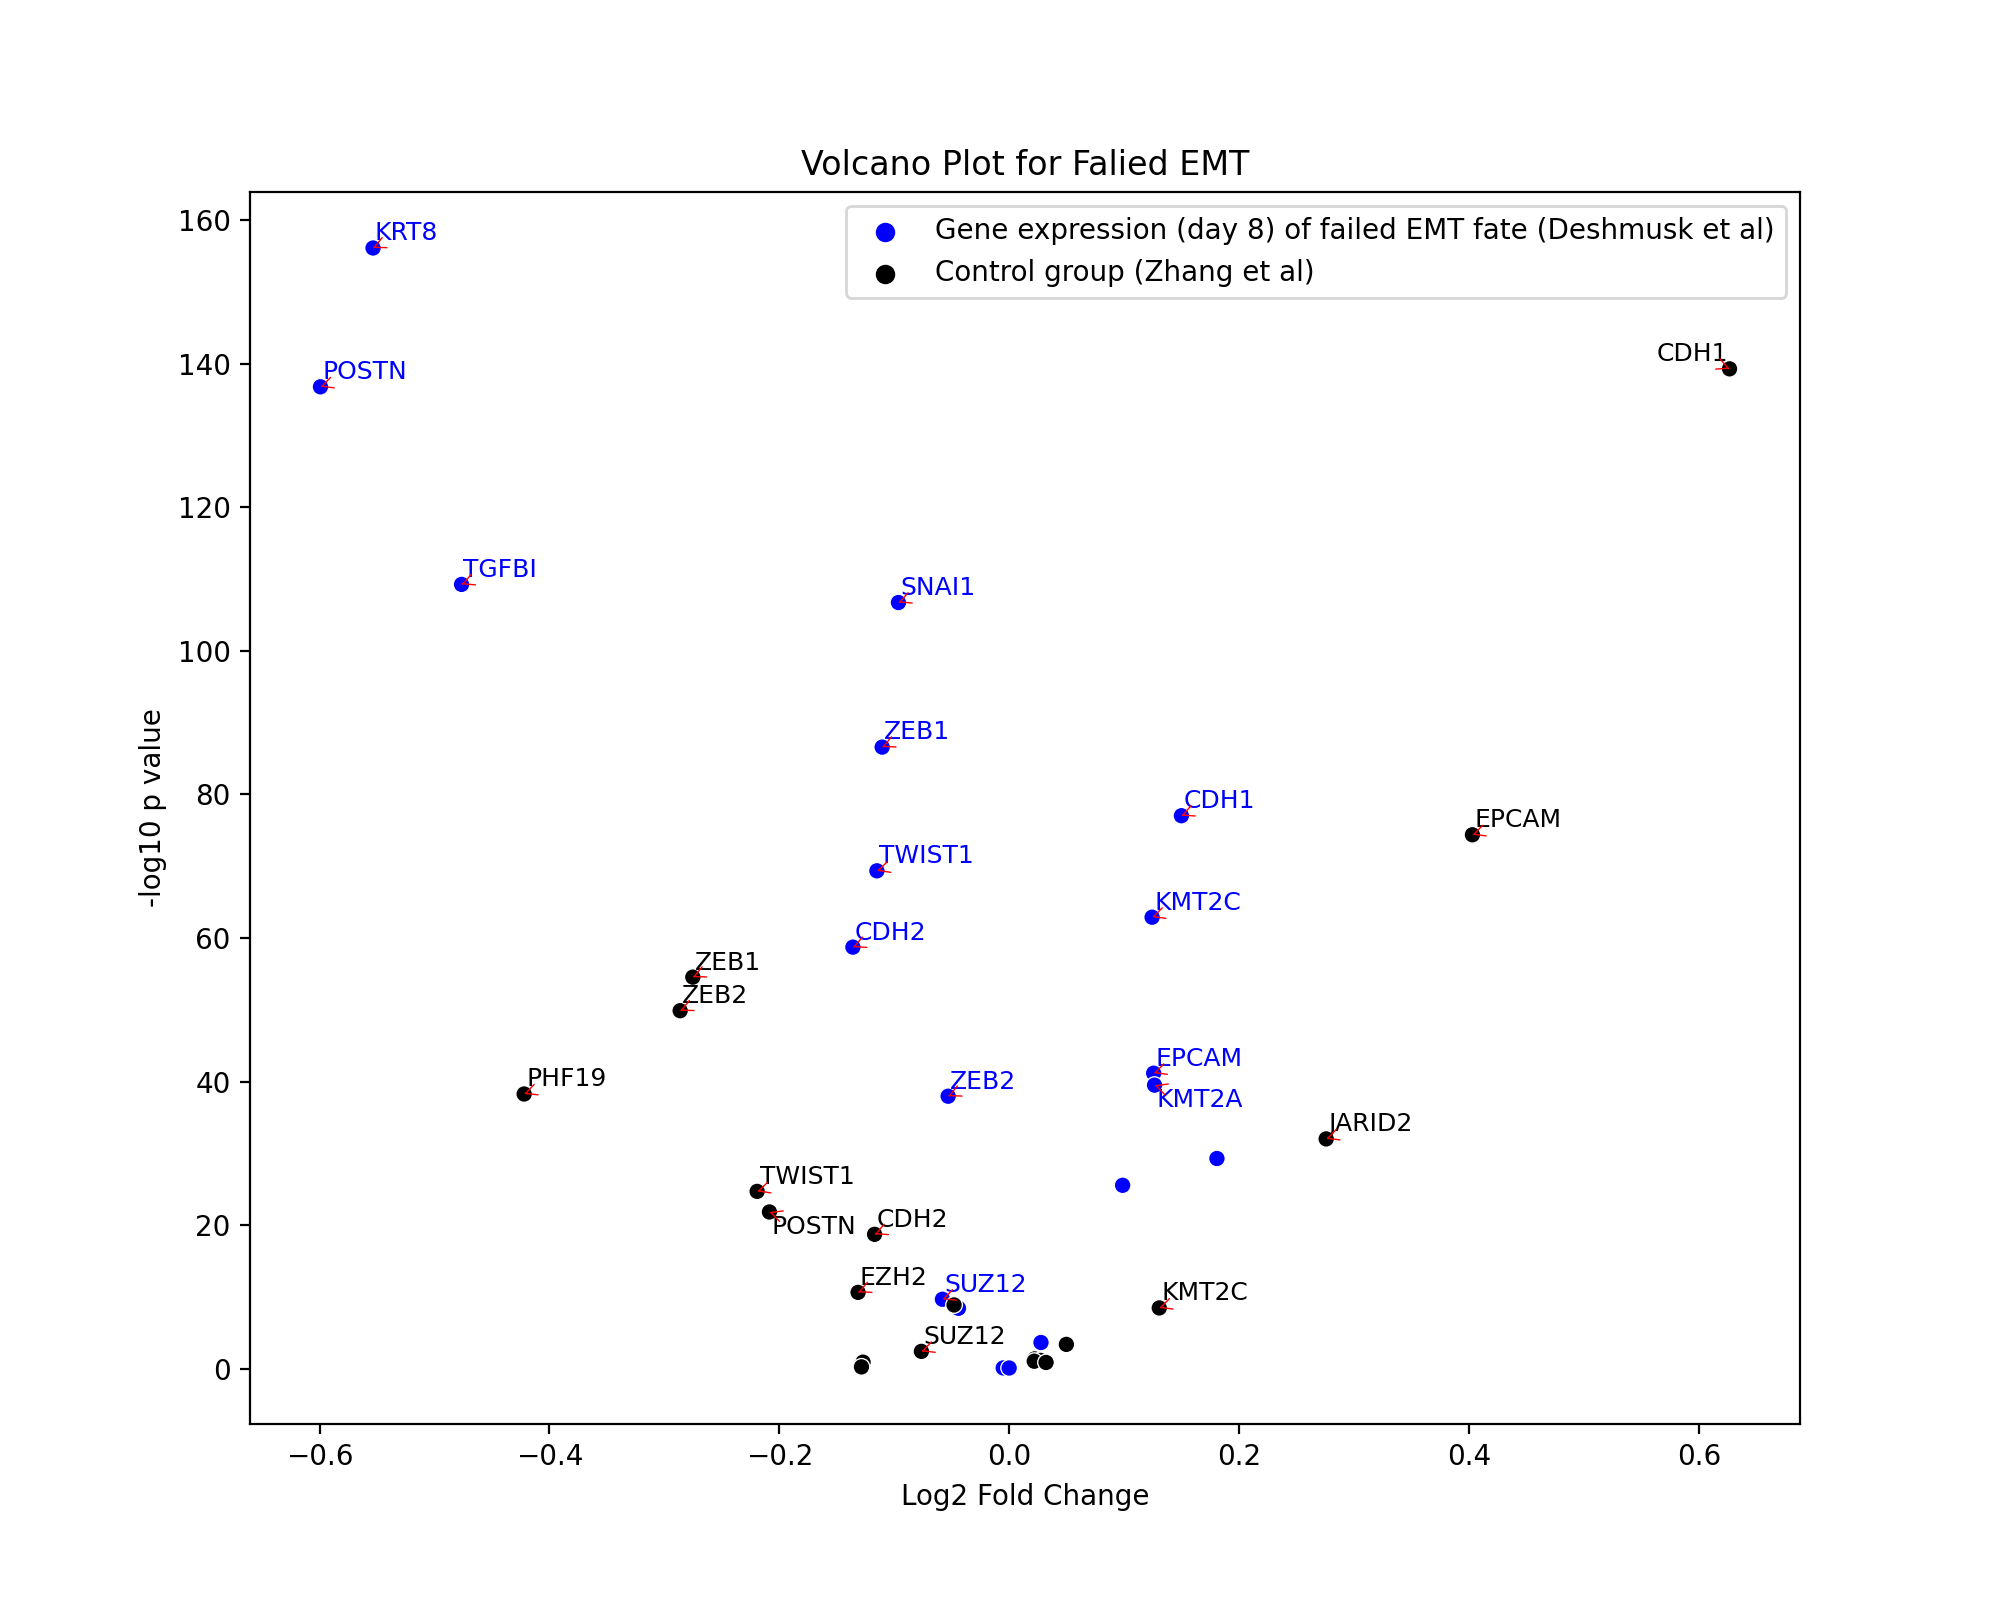

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py:384: RuntimeWarning: invalid value encountered in double_scalars
  return points[1, 1] - points[0, 1]


In [535]:
# Concatenate the two dataframes
all_data = pd.concat([all_results_L, r_dataframe])

def create_volcano_plot_validation(data, title, log2_fold_change_threshold, neg_log10_fdr_threshold):
    plt.figure(figsize=(10, 8))
    
    custom_palette = {
        'Control group (Zhang et al)': 'black',
        'Gene expression (day 8) of failed EMT fate (Deshmusk et al)': 'blue'
    }
    
    plot = sns.scatterplot(data=data, x='log2_fold_change', y='-log10_p_value', hue='source', palette=custom_palette)

    texts = []
    
    # Dict of genes you want to exclude for a specific group
    exclude_genes = {'KMT2D-KO epithelial cells (Zhang et al)': ['DPY30', 'WDR5'],
                     'Gene expression (day 8) of failed EMT fate (Deshmusk et al)': ['EZH2', 'DSP']} #['EZH1', 'EZH2', 'DSP', "JARID2", 'SNAI1', 'MTF2']

    for index, row in data.iterrows():
        if (abs(row['log2_fold_change']) > log2_fold_change_threshold) and (row['-log10_p_value'] > neg_log10_fdr_threshold):
            if row['gene'] not in exclude_genes.get(row['source'], []):
                color = custom_palette[row['source']]
                texts.append(plot.text(row['log2_fold_change'], row['-log10_p_value'], row['gene'], fontsize=9, ha='center', color=color))

    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-log10 p value')
    plt.title(title)
    plt.legend(loc = "upper right")
    plt.show()


# Load the combined data from the CSV file
data = pd.read_csv('Desktop/EMT_Optimal_Transport/all_gene_expression_data.csv')

log2_fold_change_threshold = .05  # Change this value according to your data
neg_log10_fdr_threshold = 1.4  # Change this value according to your data

create_volcano_plot_validation(all_data, 'Volcano Plot for Falied EMT', log2_fold_change_threshold, neg_log10_fdr_threshold)


In [426]:
# Find differentially expressed genes at day 4
results_M_2 = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([2])], fate_ds_M, compare='all')
results_L_2 = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([2])], fate_ds_L, compare='all')
results_H_2 = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([2])], fate_ds_H, compare='all')

results_M_4 = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([4])], fate_ds_M, compare='all')
results_L_4 = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([4])], fate_ds_L, compare='all')
results_H_4 = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([4])], fate_ds_H, compare='all')

results_M_8 = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([8])], fate_ds_M, compare='all')
results_L_8 = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([8])], fate_ds_L, compare='all')
results_H_8 = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([8])], fate_ds_H, compare='all')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))


In [463]:
combined_L_2 = create_combined_df(results_L_2, 'Low EMT day 2')
combined_M_2 = create_combined_df(results_M_2, 'Medium EMT day 2')
combined_H_2 = create_combined_df(results_H_2, 'High EMT day 2')

combined_L_4 = create_combined_df(results_L_4, 'Low EMT day 4')
combined_M_4 = create_combined_df(results_M_4, 'Medium EMT day 4')
combined_H_4 = create_combined_df(results_H_4, 'High EMT day 4')

combined_L_8 = create_combined_df(results_L_8, 'Low EMT day 8')
combined_M_8 = create_combined_df(results_M_8, 'Medium EMT day 8')
combined_H_8 = create_combined_df(results_H_8, 'High EMT day 8')

all_results_L = pd.concat([combined_L_2, combined_L_4, combined_L_8], ignore_index=True)
all_results_L.to_csv('Desktop/EMT_Optimal_Transport/all_gene_expression_data_L.csv', index=False)

all_results_M = pd.concat([combined_M_2, combined_M_4, combined_M_8], ignore_index=True)
all_results_M.to_csv('Desktop/EMT_Optimal_Transport/all_gene_expression_data_M.csv', index=False)

all_results_H = pd.concat([combined_H_2, combined_H_4, combined_H_8], ignore_index=True)
all_results_H.to_csv('Desktop/EMT_Optimal_Transport/all_gene_expression_data_H.csv', index=False)


<IPython.core.display.Javascript object>


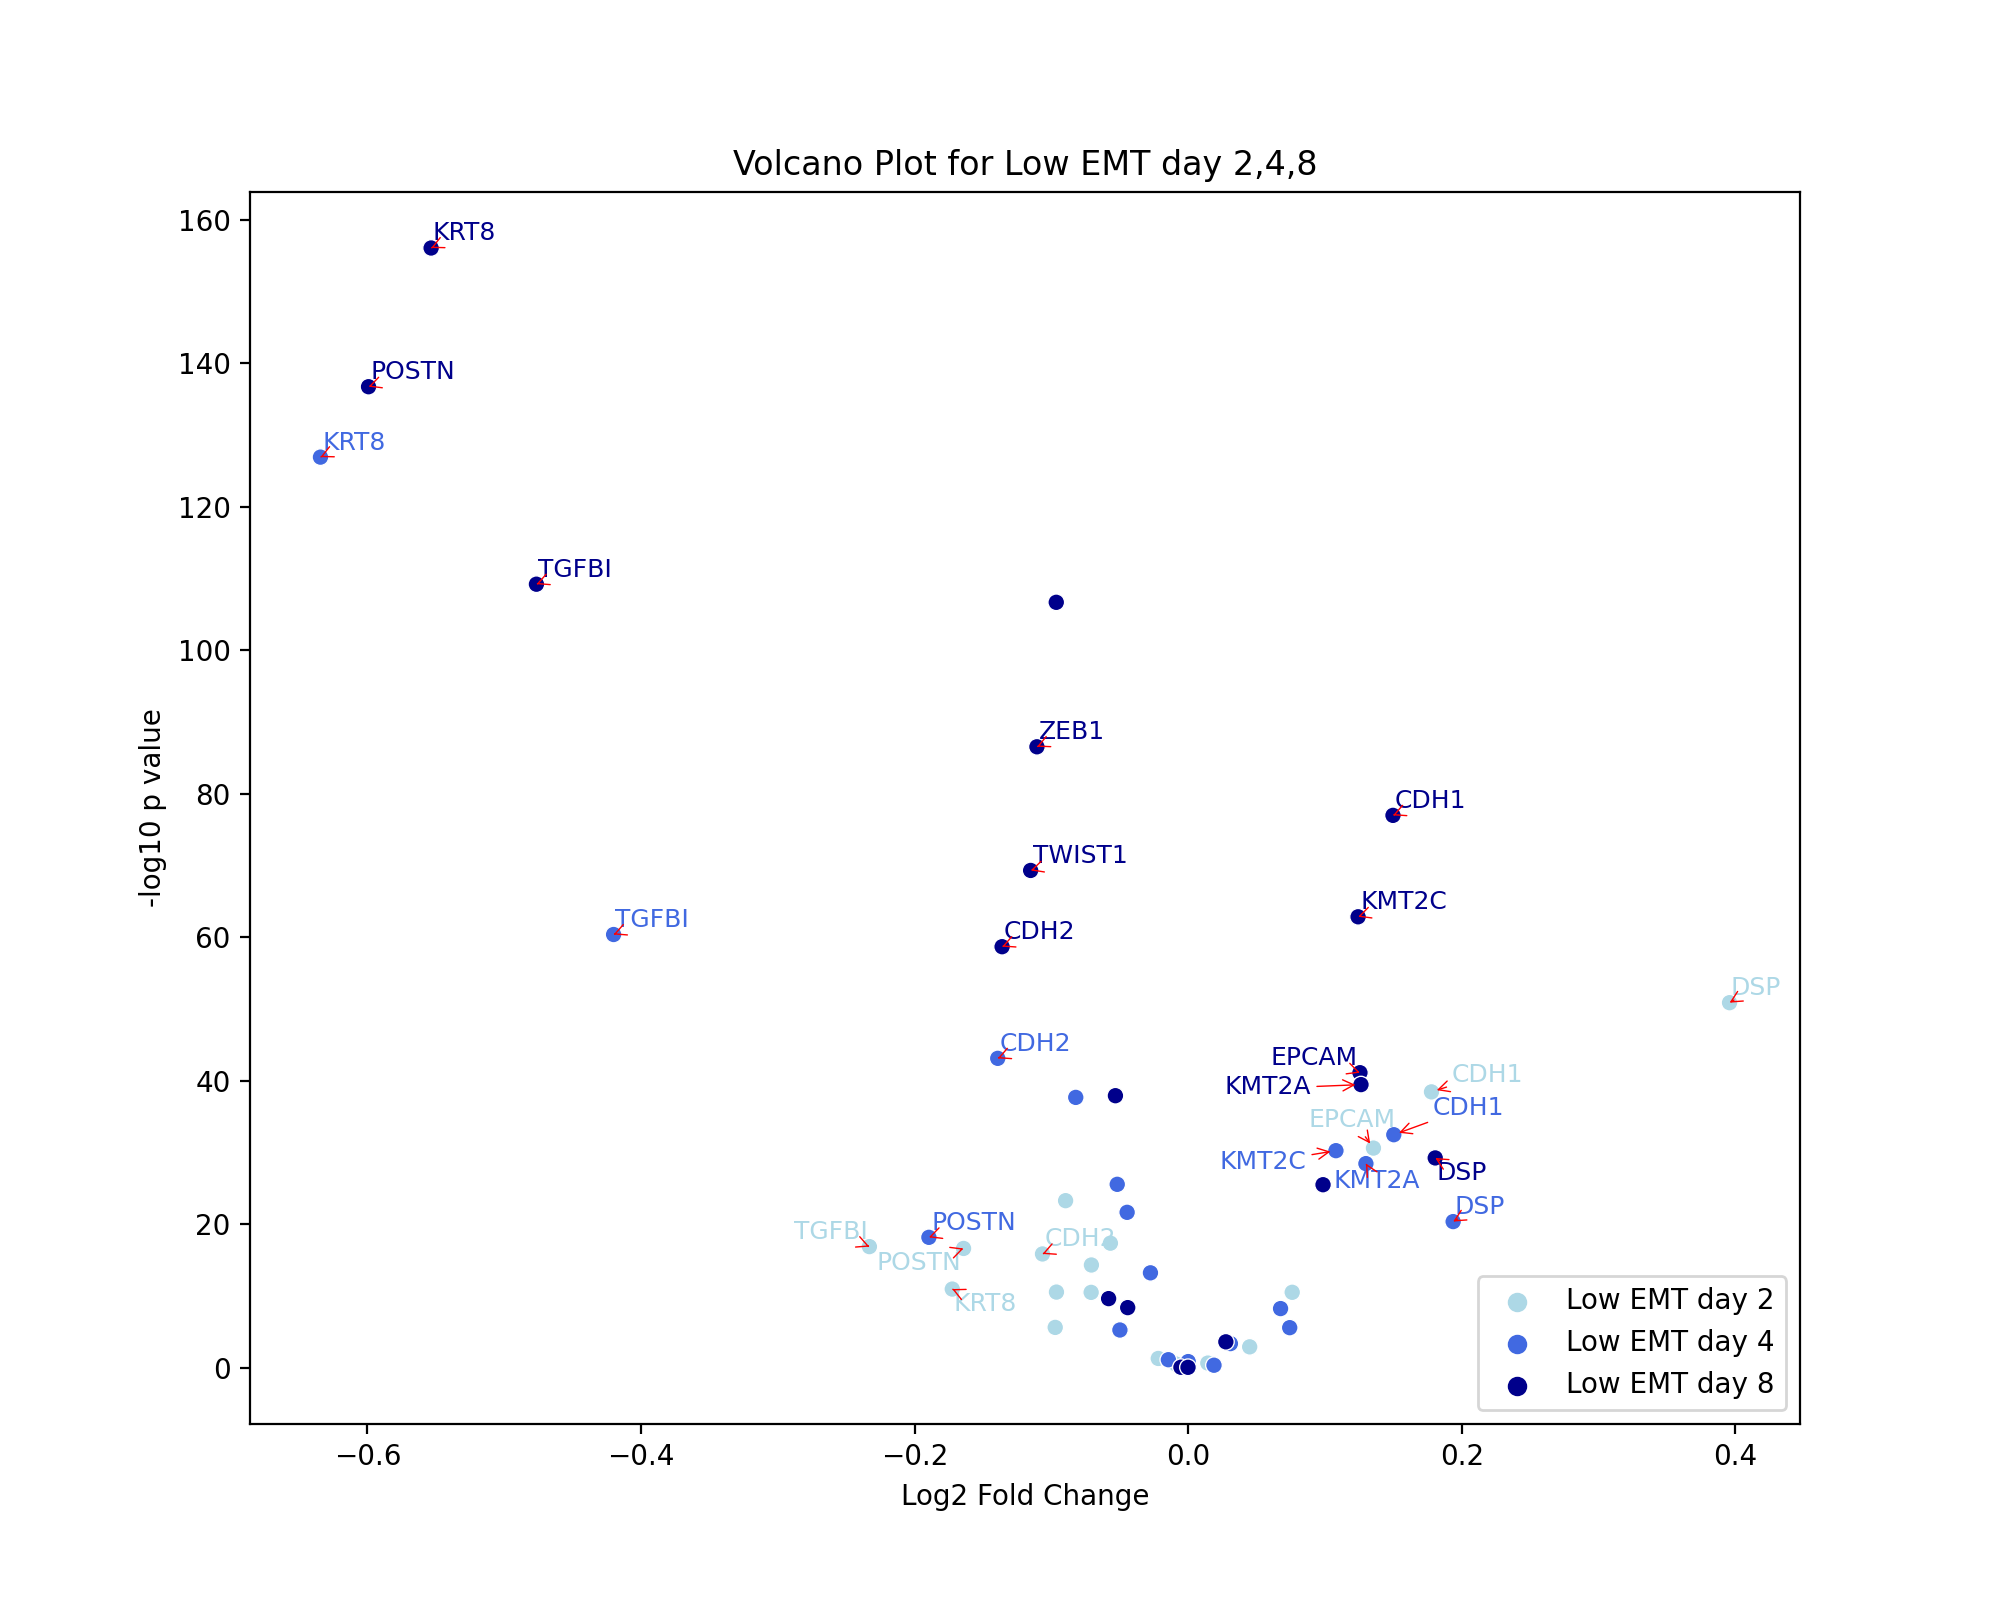

In [467]:


def create_volcano_plot_L(data, title, log2_fold_change_threshold, neg_log10_fdr_threshold):
    plt.figure(figsize=(10, 8))
    
    custom_palette = {
        'Low EMT day 2': '#add8e6',
        'Low EMT day 4': '#4169e1',
        'Low EMT day 8': '#00008b'
    }
    
    plot = sns.scatterplot(data=data, x='log2_fold_change', y='-log10_p_value', hue='group', palette=custom_palette)

    texts = []
    for index, row in data.iterrows():
        if (abs(row['log2_fold_change']) > log2_fold_change_threshold) and (row['-log10_p_value'] > neg_log10_fdr_threshold):
            color = custom_palette[row['group']]
            texts.append(plot.text(row['log2_fold_change'], row['-log10_p_value'], row['gene'], fontsize=9, ha='center', color=color))

    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-log10 p value')
    plt.title(title)
    plt.legend(loc = "lower right")
    plt.show()
    

# Load the combined data from the CSV file
data = pd.read_csv('Desktop/EMT_Optimal_Transport/all_gene_expression_data_L.csv')

log2_fold_change_threshold = .1  # Change this value according to your data
neg_log10_fdr_threshold = 10  # Change this value according to your data

create_volcano_plot_L(data, 'Volcano Plot for Low EMT day 2,4,8', log2_fold_change_threshold, neg_log10_fdr_threshold)


<IPython.core.display.Javascript object>


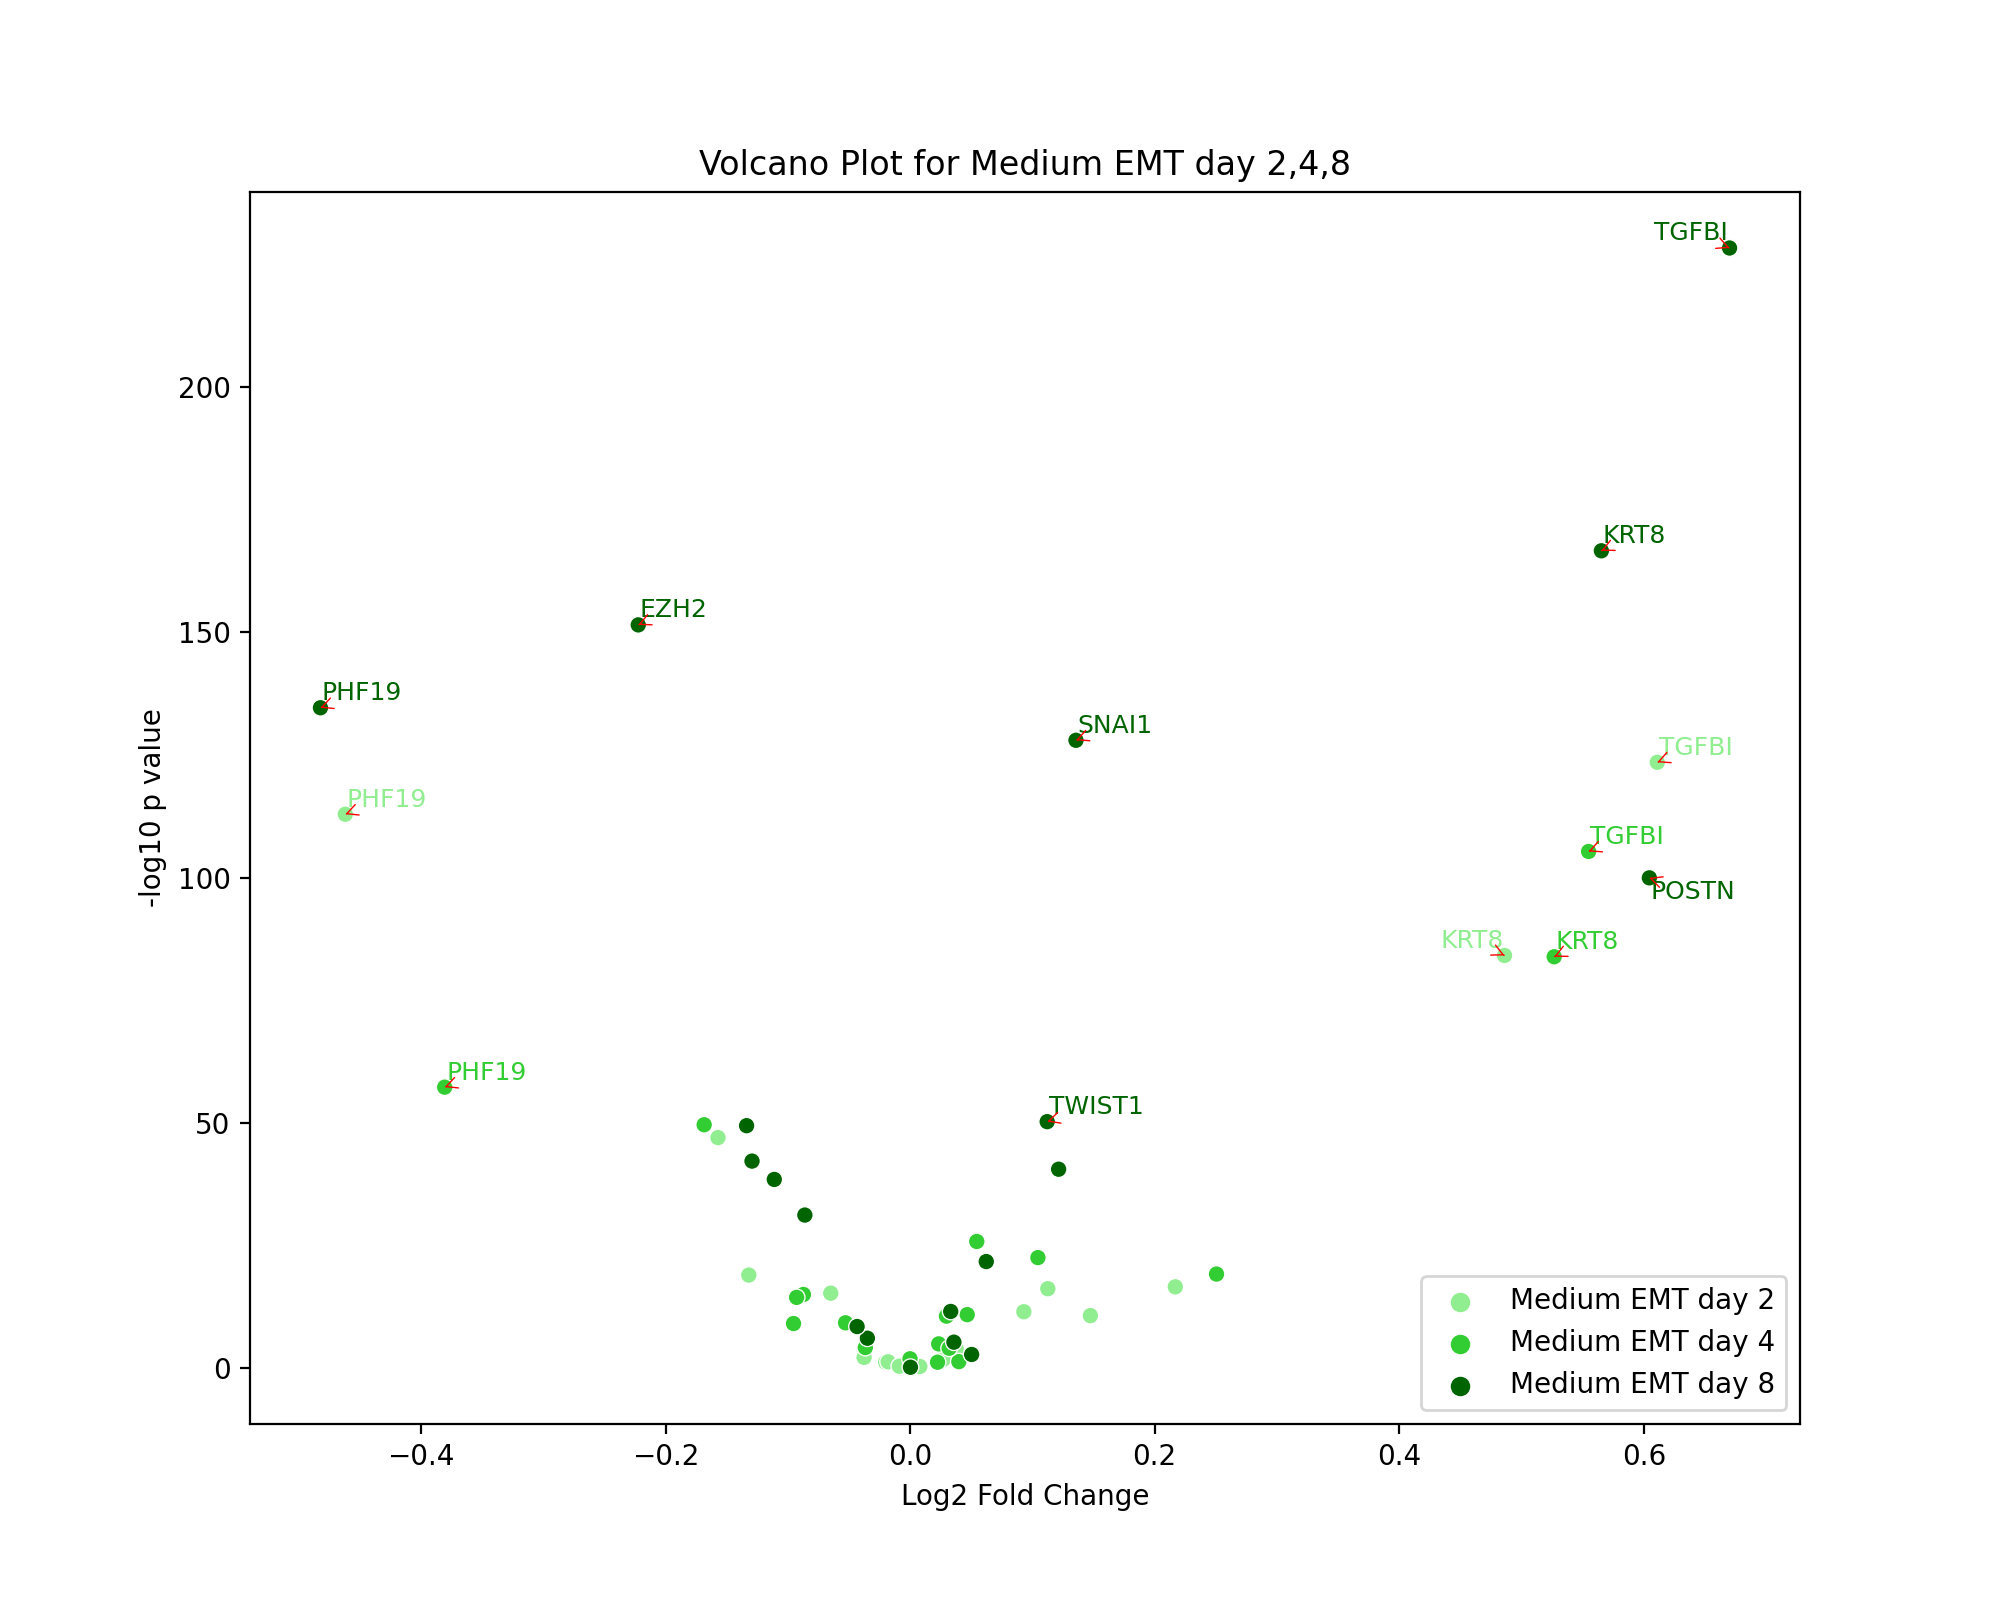

In [386]:

def create_volcano_plot_M(data, title, log2_fold_change_threshold, neg_log10_fdr_threshold):
    plt.figure(figsize=(10, 8))
    
    custom_palette = {
        'Medium EMT day 2': '#90ee90',
        'Medium EMT day 4': '#32cd32',
        'Medium EMT day 8': '#006400'
    }
    
    plot = sns.scatterplot(data=data, x='log2_fold_change', y='-log10_p_value', hue='group', palette=custom_palette)

    texts = []
    for index, row in data.iterrows():
        if (abs(row['log2_fold_change']) > log2_fold_change_threshold) and (row['-log10_p_value'] > neg_log10_fdr_threshold):
            color = custom_palette[row['group']]
            texts.append(plot.text(row['log2_fold_change'], row['-log10_p_value'], row['gene'], fontsize=9, ha='center', color=color))

    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-log10 p value')
    plt.title(title)
    plt.legend(loc = "lower right")
    plt.show()
    

# Load the combined data from the CSV file
data = pd.read_csv('Desktop/EMT_Optimal_Transport/all_gene_expression_data_M.csv')

log2_fold_change_threshold = .1  # Change this value according to your data
neg_log10_fdr_threshold = 50  # Change this value according to your data

create_volcano_plot_M(data, 'Volcano Plot for Medium EMT day 2,4,8', log2_fold_change_threshold, neg_log10_fdr_threshold)

<IPython.core.display.Javascript object>


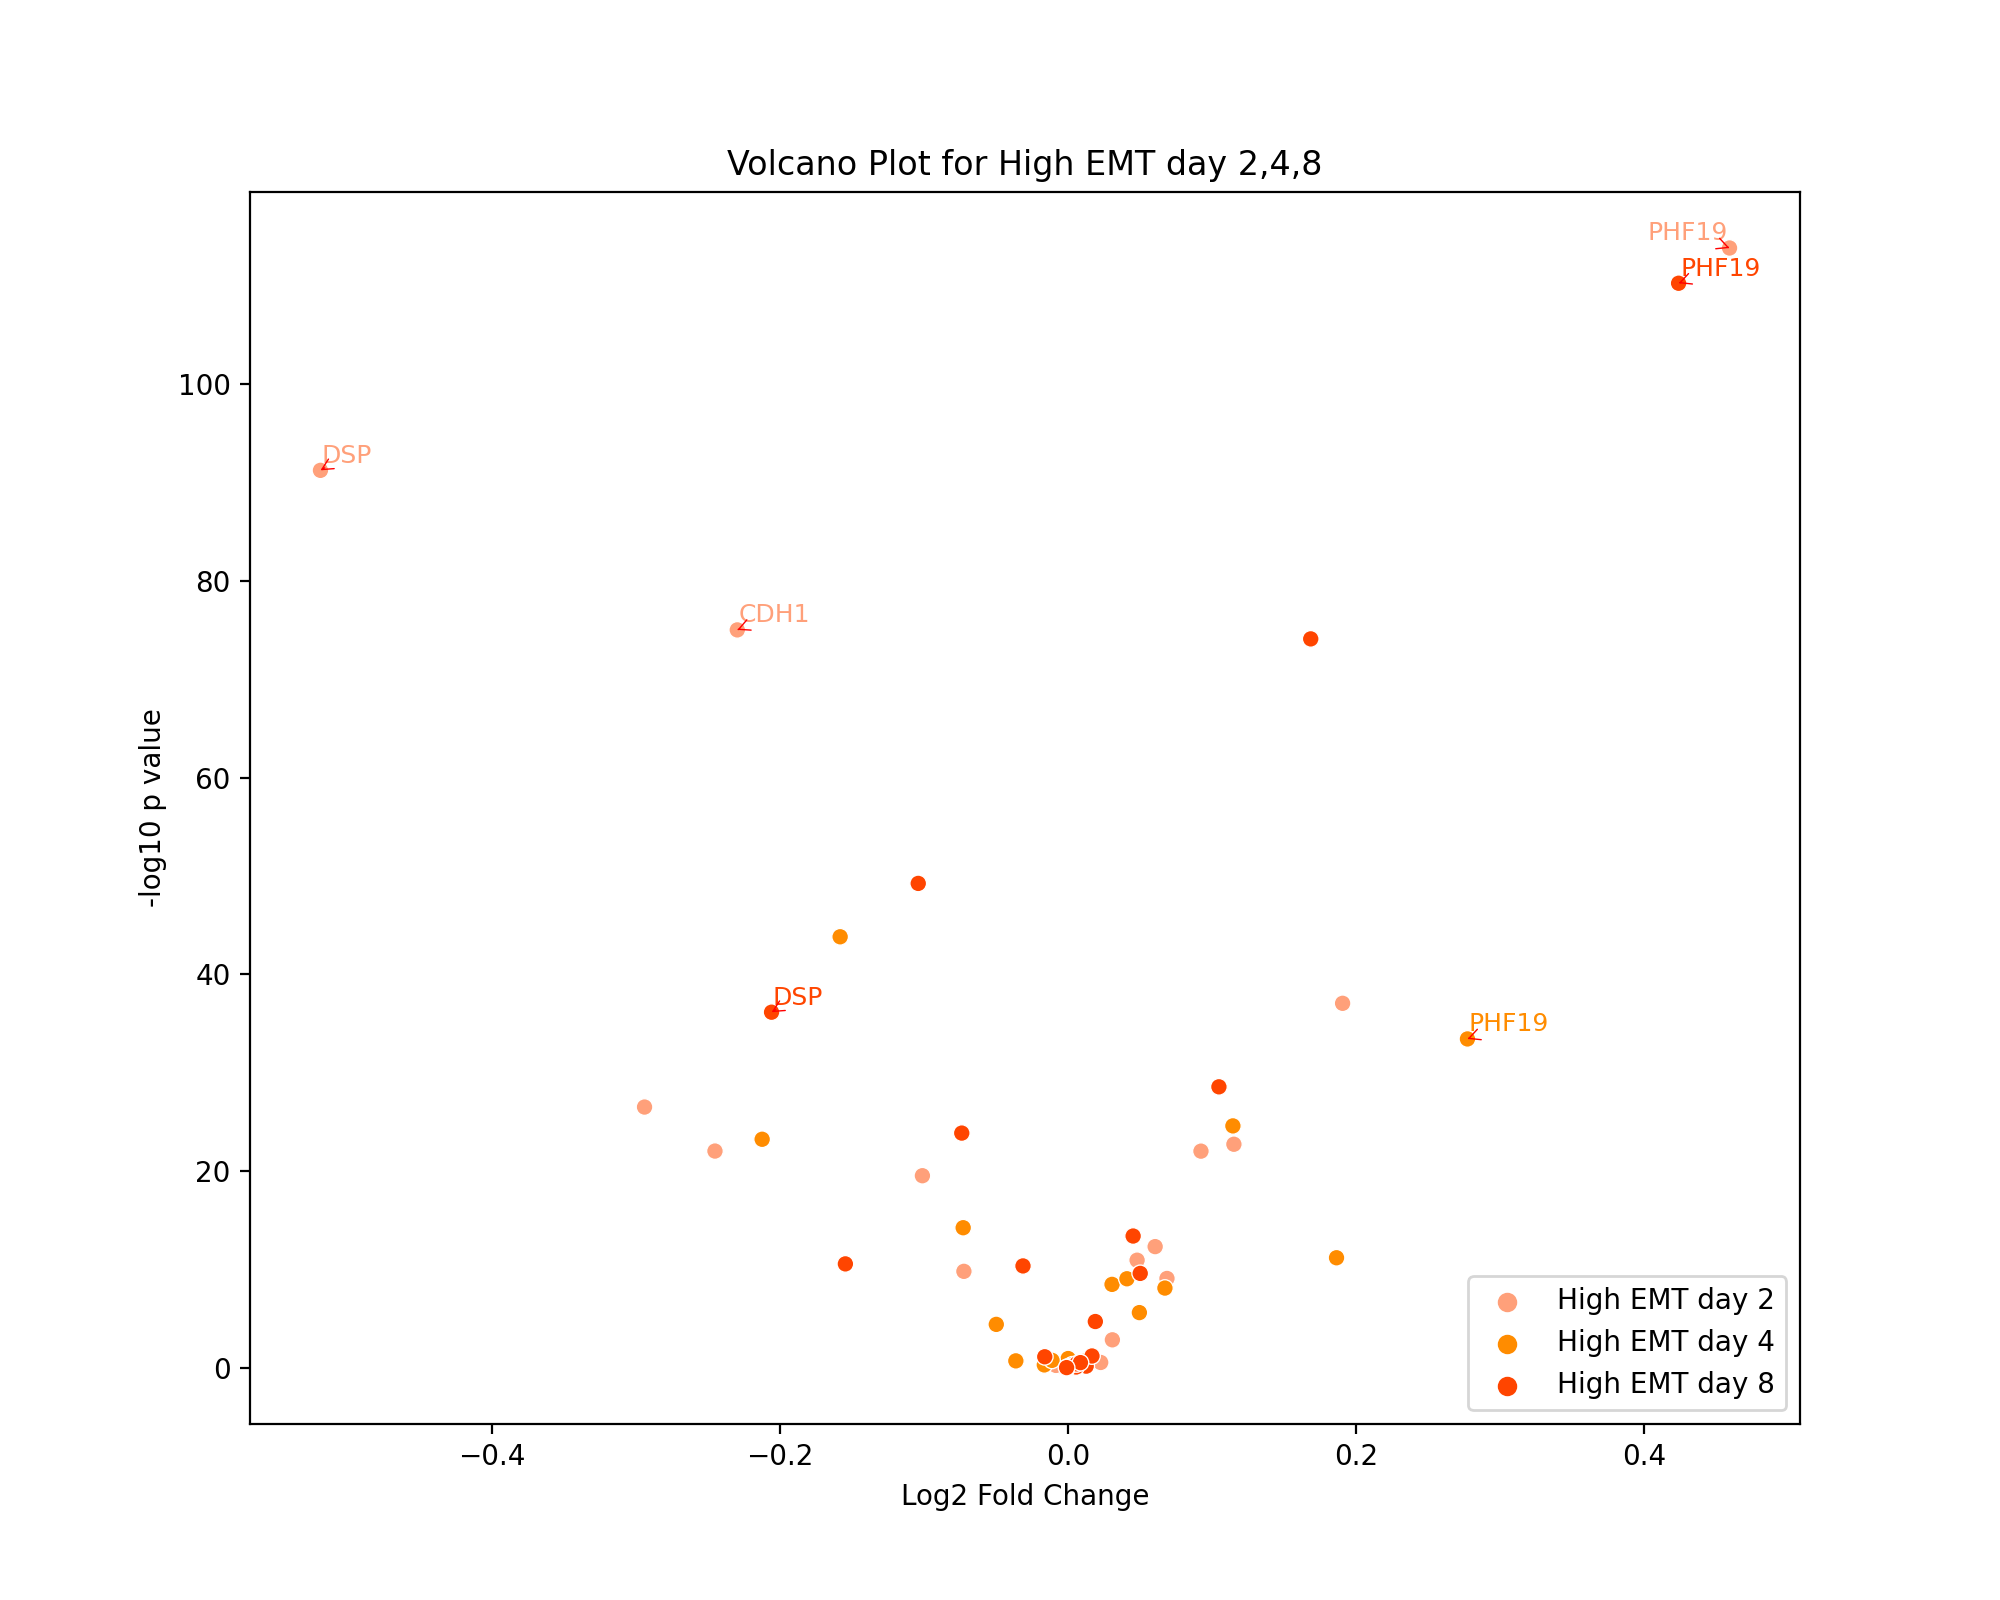

In [387]:
def create_volcano_plot_H(data, title, log2_fold_change_threshold, neg_log10_fdr_threshold):
    plt.figure(figsize=(10, 8))
    
    custom_palette = {
        'High EMT day 2': '#FFA07A',
        'High EMT day 4': '#FF8C00',
        'High EMT day 8': '#FF4500'
    }
    
    plot = sns.scatterplot(data=data, x='log2_fold_change', y='-log10_p_value', hue='group', palette=custom_palette)

    texts = []
    for index, row in data.iterrows():
        if (abs(row['log2_fold_change']) > log2_fold_change_threshold) and (row['-log10_p_value'] > neg_log10_fdr_threshold):
            color = custom_palette[row['group']]
            texts.append(plot.text(row['log2_fold_change'], row['-log10_p_value'], row['gene'], fontsize=9, ha='center', color=color))

    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-log10 p value')
    plt.title(title)
    plt.legend(loc = "lower right")
    plt.show()
    

# Load the combined data from the CSV file
data = pd.read_csv('Desktop/EMT_Optimal_Transport/all_gene_expression_data_H.csv')

log2_fold_change_threshold = .2  # Change this value according to your data
neg_log10_fdr_threshold = 30  # Change this value according to your data

create_volcano_plot_H(data, 'Volcano Plot for High EMT day 2,4,8', log2_fold_change_threshold, neg_log10_fdr_threshold)

In [1136]:
results_L[(results_L['t_fdr']<0.01)&(results_L['name1']=='Low EMT')].sort_values('fold_change', ascending=False).head(10)



fold_change     mean1     mean2  fraction_expressed1  \
DSP          1.315622  1.157841  0.883532             0.916213   
MUC1         1.248741  0.350886  0.128750             0.474560   
TMEM132A     1.200643  0.530795  0.347937             0.750633   
CTSD         1.180546  0.963956  0.797979             0.925386   
CDK6         1.177083  0.697588  0.534549             0.834611   
TUBA1A       1.171240  1.295629  1.137566             0.896256   
TFAP2A       1.164907  0.515366  0.362725             0.771310   
HRAS         1.143903  1.158034  1.023587             0.962437   
TUBB2A       1.132231  0.575561  0.451371             0.798028   
RPS25        1.118279  2.820864  2.709073             0.998236   

          fraction_expressed2    t_score        t_pval         t_fdr  \
DSP                  0.847111  15.303290  1.219334e-51  6.060088e-49   
MUC1                 0.250707  18.573231  9.141550e-74  4.570775e-71   
TMEM132A             0.626761  15.666239  6.467845e-54  3.227455e-51   
CTSD                 0.870864  11.728559  2.448671e-31  1.199849e-28   
CDK6                 0.737322  12.144626  1.908542e-33  9.370942e-31   
TUBA1A               0.850399   6.603398  4.457980e-11  2.037297e-08   
TFAP2A               0.639453  13.585683  2.920383e-41  1.442669e-38   
HRAS                 0.940372  11.089683  3.114482e-28  1.522982e-25   
TUBB2A               0.702009  10.350647  7.627449e-25  3.706940e-22   
RPS25                0.995339  12.743239  1.339342e-36  6.589561e-34   

          fraction_expressed_ratio  day1  day2    name1  name2  
DSP                       1.081563   2.0   2.0  Low EMT  Other  
MUC1                      1.892526   2.0   2.0  Low EMT  Other  
TMEM132A                  1.197607   2.0   2.0  Low EMT  Other  
CTSD                      1.062599   2.0   2.0  Low EMT  Other  
CDK6                      1.131931   2.0   2.0  Low EMT  Other  
TUBA1A                    1.053918   2.0   2.0  Low EMT  Other  
TFAP2A                    1.206172   2.0   2.0  Low EMT  Other  
HRAS                      1.023461   2.0   2.0  Low EMT  Other  
TUBB2A                    1.136758   2.0   2.0  Low EMT  Other  
RPS25                     1.002909   2.0   2.0  Low EMT  Other

In [1150]:
results_M[(results_M['t_fdr']<0.01)&(results_M['name1']=='Medium EMT')].sort_values('fold_change', ascending=False).head(40)
                                                                                                


fold_change     mean1     mean2  fraction_expressed1  \
LAMA3       1.656470  1.677019  1.172330             0.785381   
TAGLN       1.611372  1.670719  1.193633             0.883520   
LAMB3       1.547679  2.403691  1.966935             0.988693   
ITGB4       1.494501  1.347907  0.946115             0.853282   
KRT14       1.427863  2.228394  1.872215             0.859549   
LGALS1      1.350316  4.100317  3.799978             0.999673   
MYL9        1.335996  0.644223  0.354545             0.657072   
CALD1       1.333904  1.946728  1.658618             0.990145   
ITGB1       1.321648  2.077052  1.798173             0.996341   
COL17A1     1.305311  0.786563  0.520122             0.710735   
ITGA6       1.232546  1.231830  1.022748             0.899687   
GSN         1.222218  0.459601  0.258933             0.699055   
HTRA1       1.212544  0.749005  0.556284             0.832889   
PDLIM7      1.212294  1.306667  1.114153             0.968396   
PRNP        1.203754  0.962965  0.777520             0.928008   
KANK4       1.200909  0.409610  0.226531             0.622729   
COL4A1      1.192111  0.708628  0.532903             0.835483   
VIM         1.177158  3.501523  3.338421             0.998648   
KRT5        1.173269  1.686290  1.526496             0.906808   
CDH3        1.167686  0.503332  0.348308             0.625096   
RND3        1.164935  0.694276  0.541610             0.827807   
VCAN        1.164901  0.664066  0.511430             0.815904   
TPM2        1.163781  1.947412  1.795737             0.989162   
LIMA1       1.162019  0.830990  0.680831             0.831094   
IGFBP6      1.158665  1.022366  0.875098             0.911354   
JAG1        1.157058  0.703888  0.558007             0.809152   
BMP1        1.132934  0.479216  0.354405             0.757541   
PDPN        1.132656  0.692137  0.567572             0.844165   
COL4A2      1.131911  0.803841  0.679934             0.895013   
MMP2        1.126875  0.262662  0.143214             0.467259   
PHLDA3      1.118196  0.798732  0.687015             0.890791   
POSTN       1.107622  0.263543  0.161328             0.216730   
DCBLD2      1.105590  0.884286  0.783907             0.913000   
SNAI2       1.095324  0.555547  0.464496             0.779974   
CDKN1A      1.092241  0.583714  0.495483             0.754039   
CRYAB       1.092220  0.250315  0.162102             0.348990   
TPST1       1.090110  0.218662  0.132384             0.465832   
TNS4        1.086998  0.574367  0.490947             0.758386   
COL7A1      1.084194  0.295647  0.214811             0.584535   
SEMA3C      1.081501  0.379278  0.300928             0.612833   

         fraction_expressed2    t_score         t_pval          t_fdr  \
LAMA3               0.682643  16.308565   3.253286e-58   1.138650e-55   
TAGLN               0.768275  15.766955   1.252333e-54   4.358118e-52   
LAMB3               0.971909  18.995188   1.305777e-77   4.635507e-75   
ITGB4               0.718987  17.744169   2.895582e-68   1.022140e-65   
KRT14               0.785329   9.067665   1.746597e-19   5.571643e-17   
LGALS1              0.997237  25.681156  6.013857e-136  2.158975e-133   
MYL9                0.472084  16.604568   4.061644e-60   1.425637e-57   
CALD1               0.974829  19.455465   3.679889e-81   1.310041e-78   
ITGB1               0.982899  20.313778   5.318512e-88   1.904027e-85   
COL17A1             0.592835  15.841858   4.242285e-55   1.480557e-52   
ITGA6               0.888631  10.915879   2.043953e-27   6.826803e-25   
GSN                 0.494465  18.641254   7.919015e-75   2.803331e-72   
HTRA1               0.768756  13.137733   9.855605e-39   3.380473e-36   
PDLIM7              0.950647  14.162899   1.239676e-44   4.289279e-42   
PRNP                0.883802  13.439260   1.936107e-40   6.679568e-38   
KANK4               0.426642  17.150488   6.254535e-64   2.201596e-61   
COL4A1              0.765477  12.981326   6.913378e-38   2.364375e-35   
VIM                 0.985499 

In [1142]:
results_H[(results_H['t_fdr']<0.01)&(results_H['name1']=='High EMT')].sort_values('fold_change', ascending=False).head(10)


fold_change     mean1     mean2  fraction_expressed1  \
CENPF        2.155624  1.561840  0.793760             0.925449   
UBE2S        1.957086  2.263816  1.592360             0.967130   
PTTG1        1.828218  1.620150  1.016808             0.933418   
HIST1H4C     1.814766  1.533743  0.937787             0.896364   
CKS1B        1.796260  1.522558  0.936851             0.946831   
MKI67        1.754605  1.118017  0.555774             0.888906   
CKS2         1.732950  1.370902  0.821077             0.925798   
CCNB1        1.656302  1.083193  0.578605             0.855932   
CDC20        1.615789  1.002762  0.522939             0.866973   
UBE2C        1.614987  1.012242  0.532915             0.796410   

          fraction_expressed2    t_score         t_pval          t_fdr  \
CENPF                0.613977  32.772396  2.128984e-212  1.066621e-209   
UBE2S                0.934535  28.810287  1.224840e-167  6.050710e-165   
PTTG1                0.774243  28.742567  5.847811e-167  2.882971e-164   
HIST1H4C             0.781798  20.471682   2.914866e-89   1.288371e-86   
CKS1B                0.824860  32.653667  3.582602e-210  1.791301e-207   
MKI67                0.524982  31.301533  1.135807e-195  5.667675e-193   
CKS2                 0.795142  28.632093  1.721162e-166  8.468119e-164   
CCNB1                0.611871  26.350069  6.021458e-143  2.878257e-140   
CDC20                0.546927  27.507809  1.025214e-154  5.003044e-152   
UBE2C                0.517901  21.595325   1.106554e-98   5.012690e-96   

          fraction_expressed_ratio  day1  day2     name1  name2  
CENPF                     1.507219   2.0   2.0  High EMT  Other  
UBE2S                     1.034875   2.0   2.0  High EMT  Other  
PTTG1                     1.205562   2.0   2.0  High EMT  Other  
HIST1H4C                  1.146523   2.0   2.0  High EMT  Other  
CKS1B                     1.147850   2.0   2.0  High EMT  Other  
MKI67                     1.693080   2.0   2.0  High EMT  Other  
CKS2                      1.164297   2.0   2.0  High EMT  Other  
CCNB1                     1.398812   2.0   2.0  High EMT  Other  
CDC20                     1.585065   2.0   2.0  High EMT  Other  
UBE2C                     1.537661   2.0   2.0  High EMT  Other

In [170]:
day0_diff_exp = wot.tmap.diff_exp(adata_TF, fate_ds, compare='within')


/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/e

In [170]:
day0_diff_exp = wot.tmap.diff_exp(adata_TF, fate_ds, compare='within')


/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/e

In [170]:
day0_diff_exp = wot.tmap.diff_exp(adata_TF, fate_ds, compare='within')


/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/e

In [125]:
day0_diff_exp[(day0_diff_exp['name1']=='Blue') & (day0_diff_exp['day1']==4) & (day0_diff_exp['fold_change']>=2) & (day0_diff_exp['t_fdr']<=0.01)].sort_values('t_score', ascending=False)


fold_change     mean1     mean2  fraction_expressed1  \
TGFBI     9.944674  3.211894  0.914856                  1.0   

       fraction_expressed2     t_score  t_pval  t_fdr  \
TGFBI             0.820081  143.291641     0.0    0.0   

       fraction_expressed_ratio  day1  day2 name1 name2  
TGFBI                  1.219366   4.0   0.0  Blue  Blue

<IPython.core.display.Javascript object>


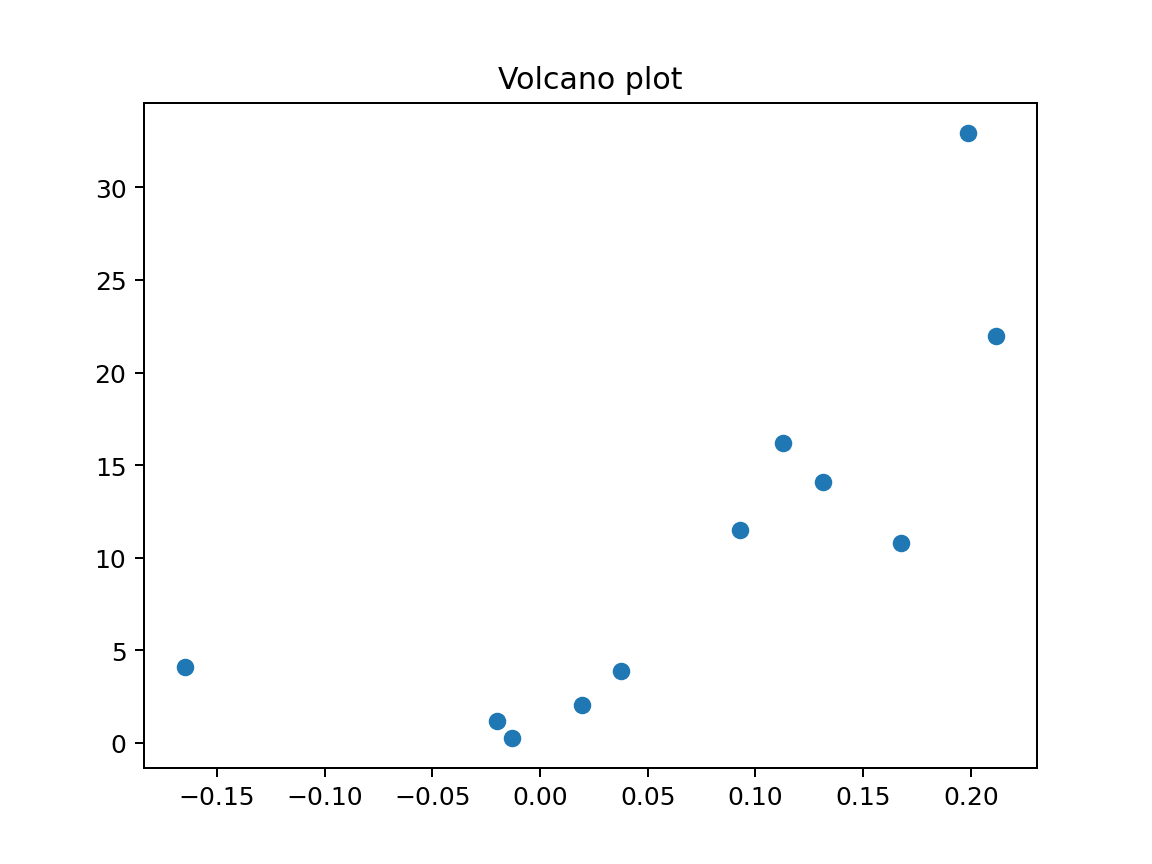

In [369]:
 

    x = np.log2(results_M['fold_change'])
    y = -np.log10(results_M['t_pval'])
    z = list(results_M.index)
    
   
    plt.scatter(x = x, y=y)
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('Volcano plot')
    plt.show()



# Validations

In [377]:
interp_summary = wot.ot.compute_validation_summary(ot_model, day_triplets=[(3, 4, 8)])

/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))


In [378]:
interp_summary.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std])

mean  std
interval_mid name               
4            F     8.715940  NaN
             I     6.844606  NaN
             L     5.465322  NaN
             R     7.404249  NaN

<IPython.core.display.Javascript object>


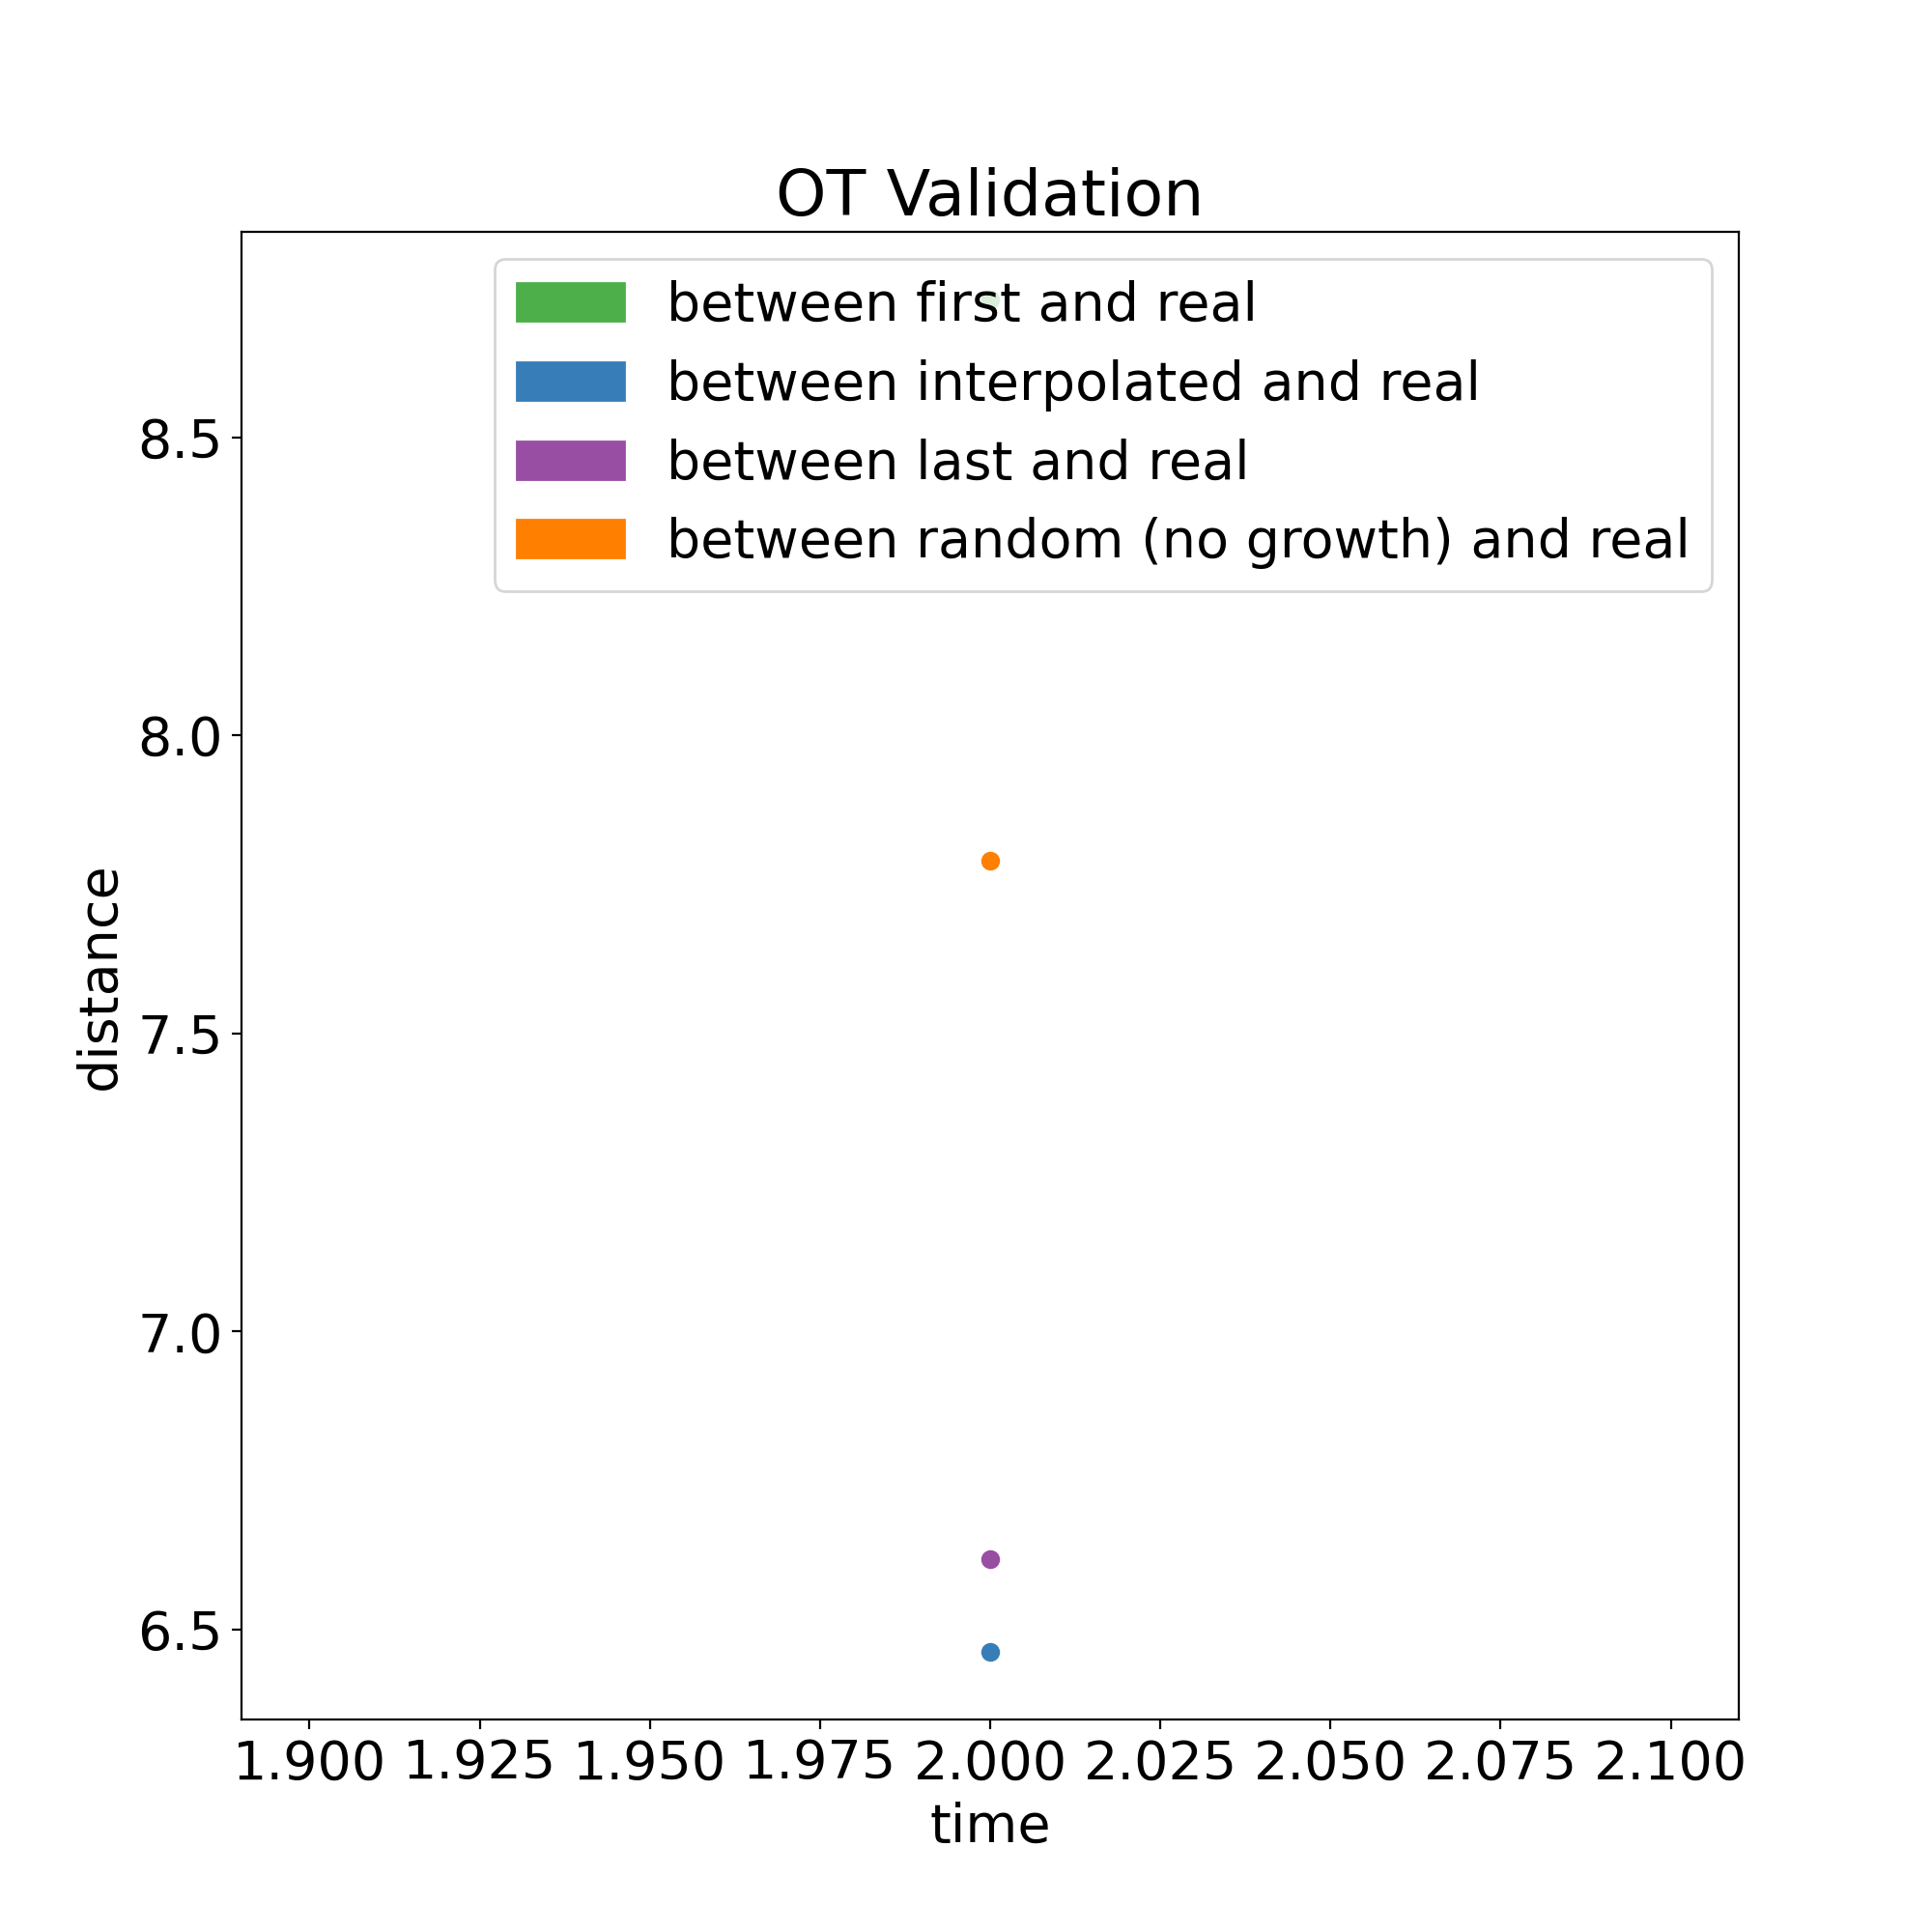

In [369]:
wot.graphics.plot_ot_validation_summary_stats(interp_summary.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std]))


In [225]:
all_triplets_summary = wot.ot.compute_validation_summary(ot_model)

# save results
all_triplets_summary.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary.txt')
all_triplets_stats = all_triplets_summary.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std])
all_triplets_stats.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_stats.txt')

/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version 

<IPython.core.display.Javascript object>


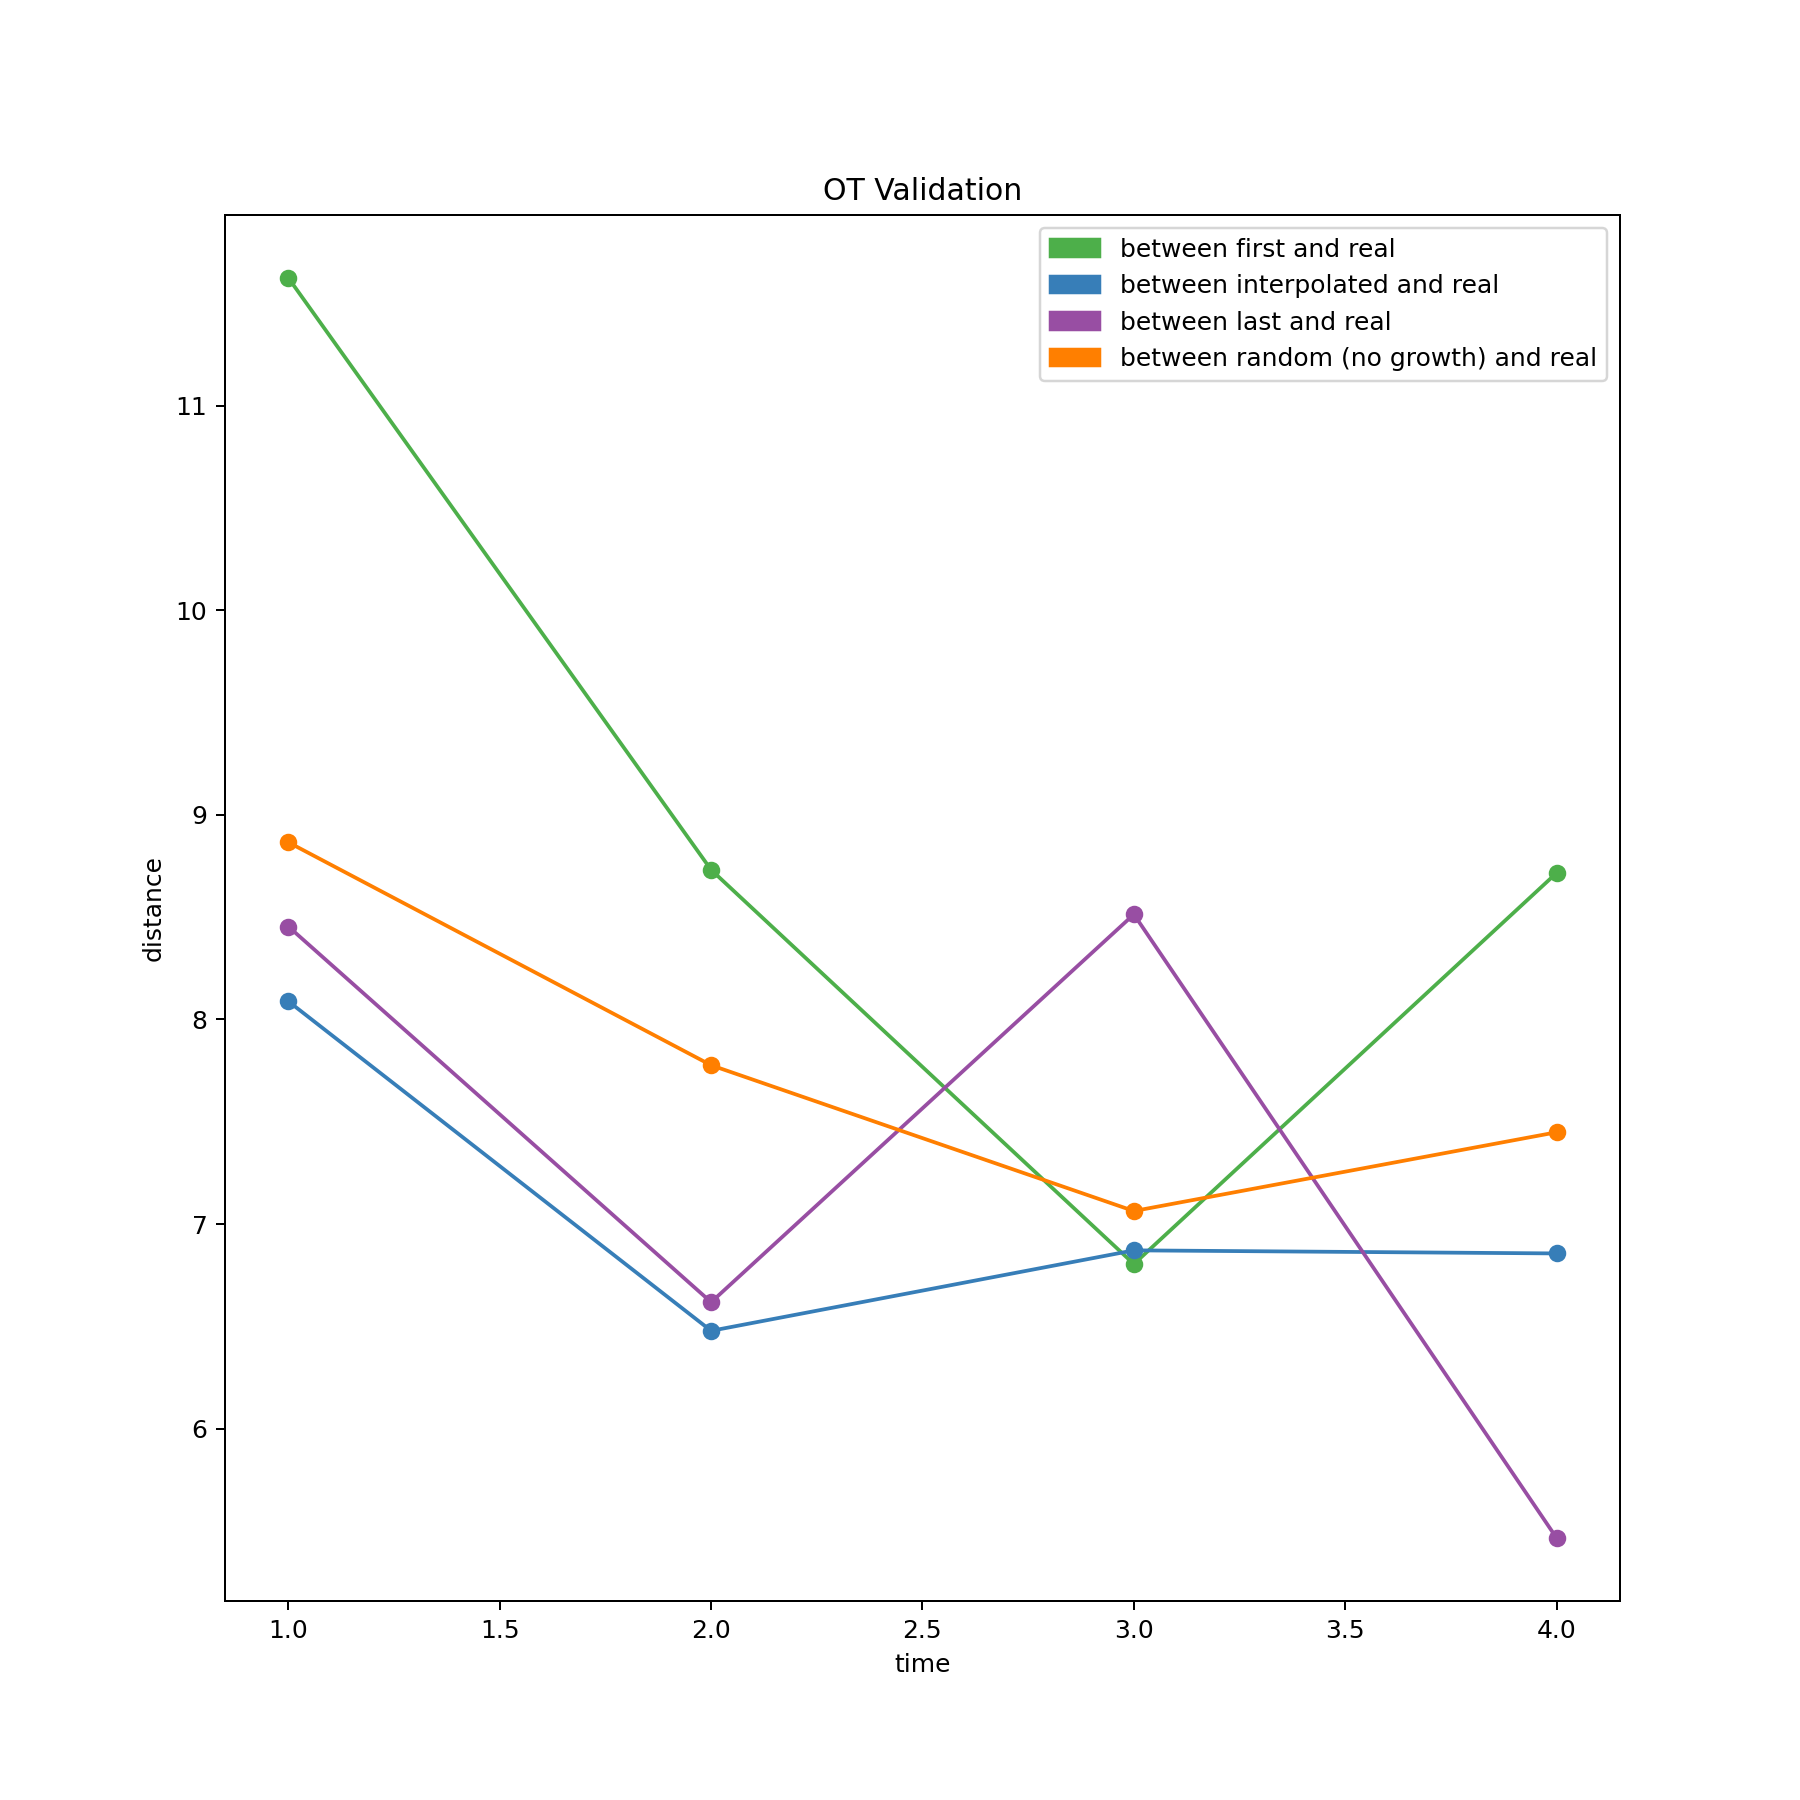

In [554]:
# read in and plot results
all_triplets_stats = pd.read_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_stats.txt')
wot.graphics.plot_ot_validation_summary_stats(all_triplets_stats)

# Change level of noises-low

In [163]:
ot_model_low_noise = wot.ot.OTModel(adata, epsilon = 0.005, lambda1 = 1, lambda2 = 50, growth_iters = 3) 
ot_model_low_noise.compute_all_transport_maps(tmap_out='tmaps_low_noise/serum')

#we can speed this up by supplying g2 and doing 1 growth iter

/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly t

In [164]:
TMAP_PATH_low_noise = 'tmaps_low_noise/serum'

In [464]:
tmap_model_low_noise = wot.tmap.TransportMapModel.from_directory(TMAP_PATH_low_noise)
cell_sets_trajectory = wot.io.read_sets(CELL_SETS_PATH, as_dict=True)
populations_low_noise = tmap_model_low_noise.population_from_cell_sets(cell_sets_trajectory, at_time=8)

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:304: FutureWarning: X.dtype being converted to np.float32 from int8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=x, obs=obs, var=var)


In [465]:
trajectory_ds_low_noise = tmap_model_low_noise.trajectories(populations_low_noise)


/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=np.concatenate(trajectories), obs=self.meta.copy(),


In [466]:
# Load embedding coordinates
coord_df = pd.read_csv(FLE_COORDS_PATH, sep='\t', index_col=0)
nbins = 500
xrange = coord_df['x'].min(), coord_df['x'].max()
yrange = coord_df['y'].min(), coord_df['y'].max()
coord_df['x'] = np.floor(
    np.interp(coord_df['x'], [xrange[0], xrange[1]], [0, nbins - 1])).astype(int)
coord_df['y'] = np.floor(
    np.interp(coord_df['y'], [yrange[0], yrange[1]], [0, nbins - 1])).astype(int)
trajectory_ds_low_noise.obs = trajectory_ds_low_noise.obs.join(coord_df)

In [467]:
# Visualize trajectories
trajectory_dropdown_low_noise = widgets.Dropdown(
    options=trajectory_ds_low_noise.var.index,
    description='Trajectory:'
)

def update_trajectory_vis_low_nose(name):
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = trajectory_ds_low_noise.obs.copy()
    binned_df['values'] = trajectory_ds_low_noise[:, name].X
    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.975))
    plt.colorbar().ax.set_title('Trajectory')

widgets.interact(update_trajectory_vis_low_nose, name=trajectory_dropdown_low_noise)

interactive(children=(Dropdown(description='Trajectory:', options=('Blue', 'Cyan', 'Red'), value='Blue'), Outp…

<function __main__.update_trajectory_vis_low_nose(name)>

In [468]:
populations_day0_low_noise = tmap_model_low_noise.population_from_cell_sets(cell_sets_day0, at_time=0)

In [469]:
trajectory_ds_day0_low_noise = tmap_model_low_noise.trajectories(populations_day0_low_noise)


/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=np.concatenate(trajectories), obs=self.meta.copy(),


In [470]:
# Load embedding coordinates
coord_df = pd.read_csv(FLE_COORDS_PATH, sep='\t', index_col=0)
nbins = 500
xrange = coord_df['x'].min(), coord_df['x'].max()
yrange = coord_df['y'].min(), coord_df['y'].max()
coord_df['x'] = np.floor(
    np.interp(coord_df['x'], [xrange[0], xrange[1]], [0, nbins - 1])).astype(int)
coord_df['y'] = np.floor(
    np.interp(coord_df['y'], [yrange[0], yrange[1]], [0, nbins - 1])).astype(int)
trajectory_ds_day0_low_noise.obs = trajectory_ds_day0_low_noise.obs.join(coord_df)

In [471]:
# Visualize trajectories
trajectory_dropdown_day0_low_noise = widgets.Dropdown(
    options=trajectory_ds_day0_low_noise.var.index,
    description='Trajectory:'
)

def update_trajectory_vis_day0_low_nose(name):
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = trajectory_ds_day0_low_noise.obs.copy()
    binned_df['values'] = trajectory_ds_day0_low_noise[:, name].X
    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.975))
    plt.colorbar().ax.set_title('Trajectory')

widgets.interact(update_trajectory_vis_day0_low_nose, name=trajectory_dropdown_day0_low_noise)

interactive(children=(Dropdown(description='Trajectory:', options=('A', 'B', 'D', 'C'), value='A'), Output()),…

<function __main__.update_trajectory_vis_day0_low_nose(name)>

In [481]:
all_triplets_summary_low_noise = wot.ot.compute_validation_summary(ot_model_low_noise)

# # save results
all_triplets_summary_low_noise.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_low_noise.txt')
all_triplets_stats_low_noise = all_triplets_summary_low_noise.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std])
all_triplets_stats_low_noise.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_stats_low_noise.txt')

/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. P

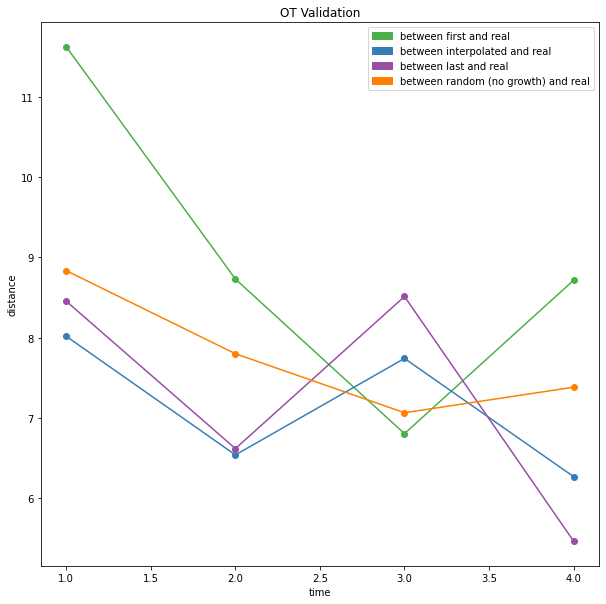

In [482]:
# read in and plot results
wot.graphics.plot_ot_validation_summary_stats(all_triplets_stats_low_noise)

# Change level of noises-high

In [472]:
ot_model_high_noise = wot.ot.OTModel(adata, epsilon = 0.5, lambda1 = 1, lambda2 = 50, growth_iters = 3) 
ot_model_high_noise.compute_all_transport_maps(tmap_out='tmaps_high_noise/serum')

/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly t

In [473]:
TMAP_PATH_high_noise = 'tmaps_high_noise/serum'

In [474]:
tmap_model_high_noise = wot.tmap.TransportMapModel.from_directory(TMAP_PATH_high_noise)
populations_high_noise = tmap_model_high_noise.population_from_cell_sets(cell_sets_trajectory, at_time=8)
trajectory_ds_high_noise = tmap_model_high_noise.trajectories(populations_high_noise)


/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=np.concatenate(trajectories), obs=self.meta.copy(),


In [475]:
# Load embedding coordinates
coord_df = pd.read_csv(FLE_COORDS_PATH, sep='\t', index_col=0)
nbins = 500
xrange = coord_df['x'].min(), coord_df['x'].max()
yrange = coord_df['y'].min(), coord_df['y'].max()
coord_df['x'] = np.floor(
    np.interp(coord_df['x'], [xrange[0], xrange[1]], [0, nbins - 1])).astype(int)
coord_df['y'] = np.floor(
    np.interp(coord_df['y'], [yrange[0], yrange[1]], [0, nbins - 1])).astype(int)
trajectory_ds_high_noise.obs = trajectory_ds_high_noise.obs.join(coord_df)

In [476]:
# Visualize trajectories
trajectory_dropdown_high_noise = widgets.Dropdown(
    options=trajectory_ds_high_noise.var.index,
    description='Trajectory:'
)

def update_trajectory_vis_high_nose(name):
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = trajectory_ds_high_noise.obs.copy()
    binned_df['values'] = trajectory_ds_high_noise[:, name].X
    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.975))
    plt.colorbar().ax.set_title('Trajectory')

widgets.interact(update_trajectory_vis_high_nose, name=trajectory_dropdown_high_noise)

interactive(children=(Dropdown(description='Trajectory:', options=('Blue', 'Cyan', 'Red'), value='Blue'), Outp…

<function __main__.update_trajectory_vis_high_nose(name)>

In [477]:
populations_day0_high_noise = tmap_model_high_noise.population_from_cell_sets(cell_sets_day0, at_time=0)

In [478]:
trajectory_ds_day0_high_noise = tmap_model_high_noise.trajectories(populations_day0_high_noise)


/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=np.concatenate(trajectories), obs=self.meta.copy(),


In [479]:
# Load embedding coordinates
coord_df = pd.read_csv(FLE_COORDS_PATH, sep='\t', index_col=0)
nbins = 500
xrange = coord_df['x'].min(), coord_df['x'].max()
yrange = coord_df['y'].min(), coord_df['y'].max()
coord_df['x'] = np.floor(
    np.interp(coord_df['x'], [xrange[0], xrange[1]], [0, nbins - 1])).astype(int)
coord_df['y'] = np.floor(
    np.interp(coord_df['y'], [yrange[0], yrange[1]], [0, nbins - 1])).astype(int)
trajectory_ds_day0_high_noise.obs = trajectory_ds_day0_high_noise.obs.join(coord_df)

In [480]:
# Visualize trajectories
trajectory_dropdown_day0_high_noise = widgets.Dropdown(
    options=trajectory_ds_day0_high_noise.var.index,
    description='Trajectory:'
)

def update_trajectory_vis_day0_high_nose(name):
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = trajectory_ds_day0_high_noise.obs.copy()
    binned_df['values'] = trajectory_ds_day0_high_noise[:, name].X
    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.975))
    plt.colorbar().ax.set_title('Trajectory')

widgets.interact(update_trajectory_vis_day0_high_nose, name=trajectory_dropdown_day0_high_noise)

interactive(children=(Dropdown(description='Trajectory:', options=('A', 'B', 'D', 'C'), value='A'), Output()),…

<function __main__.update_trajectory_vis_day0_high_nose(name)>

In [483]:
all_triplets_summary_high_noise = wot.ot.compute_validation_summary(ot_model_high_noise)

# # save results
all_triplets_summary_high_noise.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_high_noise.txt')
all_triplets_stats_high_noise = all_triplets_summary_high_noise.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std])
all_triplets_stats_high_noise.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_stats_high_noise.txt')


/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. P

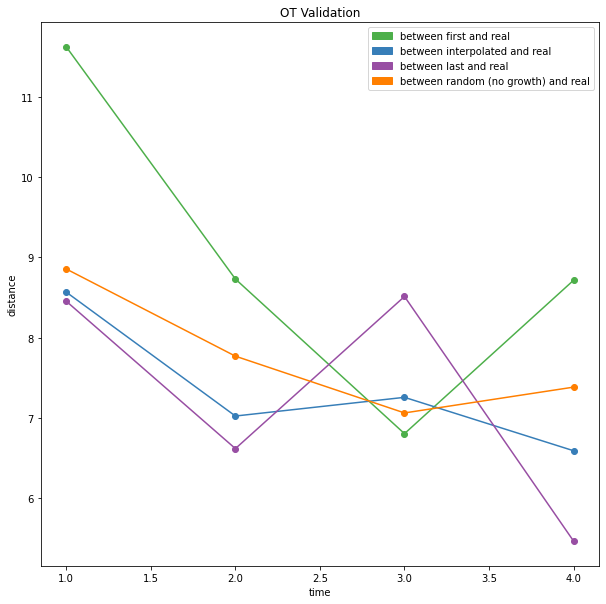

In [484]:
# read in and plot results
wot.graphics.plot_ot_validation_summary_stats(all_triplets_stats_high_noise)

# Including growth rates

In [188]:
CELL_GROWTH_PATH = 'Desktop/EMT_Optimal_Transport/growth_gs_init_2.txt'

In [189]:
# load data
adata_growth = wot.io.read_dataset(VAR_DS_PATH, obs=[CELL_DAYS_PATH, CELL_GROWTH_PATH])
adata_growth.shape

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))


(12588, 15000)

In [386]:
# create OTModel
ot_model_growth = wot.ot.OTModel(adata_growth,epsilon = 0.05, lambda1 = 1,lambda2 = 50) 

In [387]:
# Compute a single transport map from day 3 to 4
tmap_annotated = ot_model_growth.compute_transport_map(3,4)

/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))


In [388]:
# row annotations include cell growth rates
tmap_annotated.obs


g0        g1
id                                            
MCF10A_t3_AAACCCAAGTGTAGTA  1.137427  0.727008
MCF10A_t3_AAACCCACATATCTCT  0.639050  0.801061
MCF10A_t3_AAACCCAGTGTCATGT  0.859223  0.980593
MCF10A_t3_AAACGAAAGCGGTAAC  1.093797  1.465780
MCF10A_t3_AAACGAAGTCCAAGAG  0.978088  1.465695
...                              ...       ...
MCF10A_t3_TTTGGTTTCGAGCTGC  0.778573  1.152165
MCF10A_t3_TTTGGTTTCTTCGTGC  1.164630  1.253786
MCF10A_t3_TTTGTTGAGCGTACAG  1.284616  1.394963
MCF10A_t3_TTTGTTGAGGATACAT  1.172443  0.808223
MCF10A_t3_TTTGTTGCAATCCAGT  0.303796  0.404298

[2132 rows x 2 columns]

In [389]:
# columns annotated by cell barcodes
tmap_annotated.var

Empty DataFrame
Columns: []
Index: [MCF10A_t4_AAACCTGGTTGTCTTT, MCF10A_t4_AAACGGGCATACGCTA, MCF10A_t4_AAAGATGTCCGAAGAG, MCF10A_t4_AAAGCAACATCCGCGA, MCF10A_t4_AAAGCAAGTTAGGGTG, MCF10A_t4_AAAGTAGCAAGTTAAG, MCF10A_t4_AAAGTAGGTAGGGACT, MCF10A_t4_AAAGTAGTCATCGGAT, MCF10A_t4_AAATGCCCAGCGATCC, MCF10A_t4_AAATGCCCATGGATGG, MCF10A_t4_AAATGCCGTGGCCCTA, MCF10A_t4_AACACGTTCTACGAGT, MCF10A_t4_AACCATGTCAGCATGT, MCF10A_t4_AACCATGTCCTTTCTC, MCF10A_t4_AACCGCGAGCTTCGCG, MCF10A_t4_AACCGCGAGGTGACCA, MCF10A_t4_AACGTTGCAACTGGCC, MCF10A_t4_AACGTTGCACCACCAG, MCF10A_t4_AACTCCCAGCGTTGCC, MCF10A_t4_AACTCCCAGTCCCACG, MCF10A_t4_AACTCCCTCGAACTGT, MCF10A_t4_AACTCTTGTCGGCTCA, MCF10A_t4_AACTCTTGTGCACTTA, MCF10A_t4_AACTCTTGTGGTACAG, MCF10A_t4_AACTCTTTCACGGTTA, MCF10A_t4_AACTTTCTCAAGGTAA, MCF10A_t4_AAGACCTTCTTGCCGT, MCF10A_t4_AAGCCGCCACATCCGG, MCF10A_t4_AAGCCGCGTCATACTG, MCF10A_t4_AAGCCGCTCATCATTC, MCF10A_t4_AAGGAGCAGATCCCGC, MCF10A_t4_AAGGAGCAGTGGAGAA, MCF10A_t4_AAGGAGCCATCTATGG, MCF10A_t4_AAGGAGCGTTGCCTCT, MCF10A_t4_AAGGAGCTCATGCATG, MCF10A_t4_AAGGCAGAGGCGCTCT, MCF10A_t4_AAGGCAGCACCACGTG, MCF10A_t4_AAGGCAGCATTCGACA, MCF10A_t4_AAGGCAGGTACCATCA, MCF10A_t4_AAGGCAGTCGAGCCCA, MCF10A_t4_AAGGTTCAGTGAAGTT, MCF10A_t4_AAGTCTGCACGCTTTC, MCF10A_t4_AAGTCTGCATCCCACT, MCF10A_t4_AAGTCTGTCTACGAGT, MCF10A_t4_AAGTCTGTCTCCGGTT, MCF10A_t4_ACACCAACAGGTTTCA, MCF10A_t4_ACACCAATCGGCGCAT, MCF10A_t4_ACACCAATCGGTTAAC, MCF10A_t4_ACACCCTCAAGGTTCT, MCF10A_t4_ACACCCTCATTCCTCG, MCF10A_t4_ACACCCTGTAACGTTC, MCF10A_t4_ACACCCTGTCCAAGTT, MCF10A_t4_ACACTGAAGCTCCTTC, MCF10A_t4_ACACTGACAGCTATTG, MCF10A_t4_ACACTGAGTACTTAGC, MCF10A_t4_ACACTGATCAGAGGTG, MCF10A_t4_ACAGCCGCAACTTGAC, MCF10A_t4_ACATACGAGATCGATA, MCF10A_t4_ACATACGTCACGACTA, MCF10A_t4_ACATCAGGTACTTAGC, MCF10A_t4_ACATCAGGTGGTCCGT, MCF10A_t4_ACATGGTAGGCTAGCA, MCF10A_t4_ACATGGTGTGACTACT, MCF10A_t4_ACCAGTAAGCAGCGTA, MCF10A_t4_ACCAGTACATGTCCTC, MCF10A_t4_ACCAGTACATTCCTCG, MCF10A_t4_ACCCACTAGTGTACGG, MCF10A_t4_ACCCACTGTCTAACGT, MCF10A_t4_ACCCACTGTGACTACT, MCF10A_t4_ACCGTAAAGGTGATAT, MCF10A_t4_ACCGTAACAAGACACG, MCF10A_t4_ACCGTAACAGCCTGTG, MCF10A_t4_ACCTTTAAGATGTGGC, MCF10A_t4_ACCTTTAGTTACAGAA, MCF10A_t4_ACCTTTATCTTGACGA, MCF10A_t4_ACGAGCCCAAGTAGTA, MCF10A_t4_ACGAGCCGTGTGTGCC, MCF10A_t4_ACGAGCCTCAGGTTCA, MCF10A_t4_ACGAGCCTCTCCGGTT, MCF10A_t4_ACGAGGAAGCAACGGT, MCF10A_t4_ACGAGGAAGGACAGAA, MCF10A_t4_ACGAGGAAGTTTGCGT, MCF10A_t4_ACGAGGATCACTCTTA, MCF10A_t4_ACGATACCAGTAAGAT, MCF10A_t4_ACGATGTAGATGCCTT, MCF10A_t4_ACGATGTGTGCTTCTC, MCF10A_t4_ACGATGTGTGTTGAGG, MCF10A_t4_ACGATGTTCACCGTAA, MCF10A_t4_ACGCAGCCACATTAGC, MCF10A_t4_ACGCAGCGTCCGTTAA, MCF10A_t4_ACGCAGCGTCGTGGCT, MCF10A_t4_ACGCCGACATCCTTGC, MCF10A_t4_ACGCCGATCTGGCGTG, MCF10A_t4_ACGGAGAGTCACCCAG, MCF10A_t4_ACGGAGAGTTGAGTTC, MCF10A_t4_ACGGAGATCCAAATGC, MCF10A_t4_ACGGCCATCTCTGAGA, MCF10A_t4_ACGGGCTAGAAGGACA, MCF10A_t4_ACGGGCTTCAACGAAA, MCF10A_t4_ACGGGTCAGGAATCGC, ...]

[1147 rows x 0 columns]

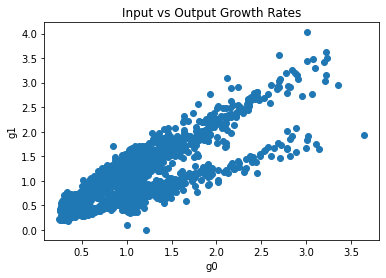

In [390]:
# Visualize how growth rates change with growth iterations
plt.scatter(tmap_annotated.obs['g0'],tmap_annotated.obs['g1'])
plt.xlabel("g0")
plt.ylabel("g1")
plt.title("Input vs Output Growth Rates")
plt.show()


In [391]:
ot_model_strict_growth = wot.ot.OTModel(adata_growth, epsilon = 0.05, lambda1 = 3,lambda2 = 50) 
tmap_anno_strict = ot_model_strict_growth.compute_transport_map(3,4)

/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))


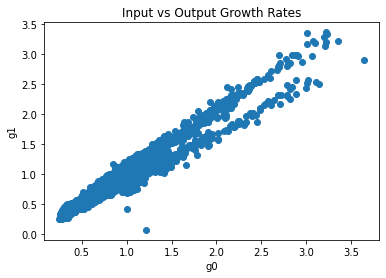

In [392]:
plt.scatter(tmap_anno_strict.obs['g0'],tmap_anno_strict.obs['g1'])
plt.xlabel("g0")
plt.ylabel("g1")
plt.title("Input vs Output Growth Rates")
plt.show()

# Compute all transport maps in batch mode - growth rate


In [443]:
ot_model_growth = wot.ot.OTModel(adata_growth, epsilon = 0.05, lambda1 = 1, lambda2 = 50, growth_iters = 3) 
ot_model_growth.compute_all_transport_maps(tmap_out='tmaps_gs_2/serum')

/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly t

In [444]:
TMAP_PATH_GS = 'tmaps_gs_2/serum'

In [445]:
tmap_model_gs = wot.tmap.TransportMapModel.from_directory(TMAP_PATH_GS)
cell_sets_trajectory = wot.io.read_sets(CELL_SETS_PATH, as_dict=True)
populations_gs = tmap_model_gs.population_from_cell_sets(cell_sets_trajectory, at_time=8)
trajectory_ds_gs = tmap_model_gs.trajectories(populations_gs)


/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:304: FutureWarning: X.dtype being converted to np.float32 from int8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=x, obs=obs, var=var)
/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=np.concatenate(trajectories), obs=self.meta.copy(),


In [446]:
# Load embedding coordinates
coord_df = pd.read_csv(FLE_COORDS_PATH, sep='\t', index_col=0)
nbins = 500
xrange = coord_df['x'].min(), coord_df['x'].max()
yrange = coord_df['y'].min(), coord_df['y'].max()
coord_df['x'] = np.floor(
    np.interp(coord_df['x'], [xrange[0], xrange[1]], [0, nbins - 1])).astype(int)
coord_df['y'] = np.floor(
    np.interp(coord_df['y'], [yrange[0], yrange[1]], [0, nbins - 1])).astype(int)
trajectory_ds_gs.obs = trajectory_ds_gs.obs.join(coord_df)

In [447]:
# Visualize trajectories
trajectory_dropdown_gs = widgets.Dropdown(
    options=trajectory_ds_gs.var.index,
    description='Trajectory:'
)

def update_trajectory_vis_gs(name):
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = trajectory_ds_gs.obs.copy()
    binned_df['values'] = trajectory_ds_gs[:, name].X
    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.975))
    plt.colorbar().ax.set_title('Trajectory')

widgets.interact(update_trajectory_vis_gs, name=trajectory_dropdown_gs)

interactive(children=(Dropdown(description='Trajectory:', options=('Blue', 'Cyan', 'Red'), value='Blue'), Outp…

<function __main__.update_trajectory_vis_gs(name)>

In [452]:
populations_day0_gs = tmap_model_gs.population_from_cell_sets(cell_sets_day0, at_time=0)

In [453]:
trajectory_ds_day0_gs = tmap_model_gs.trajectories(populations_day0_gs)


/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=np.concatenate(trajectories), obs=self.meta.copy(),


In [454]:
# Load embedding coordinates
coord_df = pd.read_csv(FLE_COORDS_PATH, sep='\t', index_col=0)
nbins = 500
xrange = coord_df['x'].min(), coord_df['x'].max()
yrange = coord_df['y'].min(), coord_df['y'].max()
coord_df['x'] = np.floor(
    np.interp(coord_df['x'], [xrange[0], xrange[1]], [0, nbins - 1])).astype(int)
coord_df['y'] = np.floor(
    np.interp(coord_df['y'], [yrange[0], yrange[1]], [0, nbins - 1])).astype(int)
trajectory_ds_day0_gs.obs = trajectory_ds_day0_gs.obs.join(coord_df)

In [455]:
# Visualize trajectories
trajectory_dropdown_day0_gs = widgets.Dropdown(
    options=trajectory_ds_day0_gs.var.index,
    description='Trajectory:'
)

def update_trajectory_vis_day0_gs(name):
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = trajectory_ds_day0_gs.obs.copy()
    binned_df['values'] = trajectory_ds_day0_gs[:, name].X
    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.975))
    plt.colorbar().ax.set_title('Trajectory')

widgets.interact(update_trajectory_vis_day0_gs, name=trajectory_dropdown_day0_gs)

interactive(children=(Dropdown(description='Trajectory:', options=('A', 'B', 'D', 'C'), value='A'), Output()),…

<function __main__.update_trajectory_vis_day0_gs(name)>

# Validation with growth rate

In [416]:
ot_model_val_gs = wot.ot.OTModel(adata_gs, growth_rate_field='g2',growth_iters = 1) 


In [417]:
all_triplets_summary_gs = wot.ot.compute_validation_summary(ot_model_val_gs)

# # save results
all_triplets_summary_gs.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_gs.txt')
all_triplets_stats_gs = all_triplets_summary_gs.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std])
all_triplets_stats_gs.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_stats_gs.txt')

/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. P

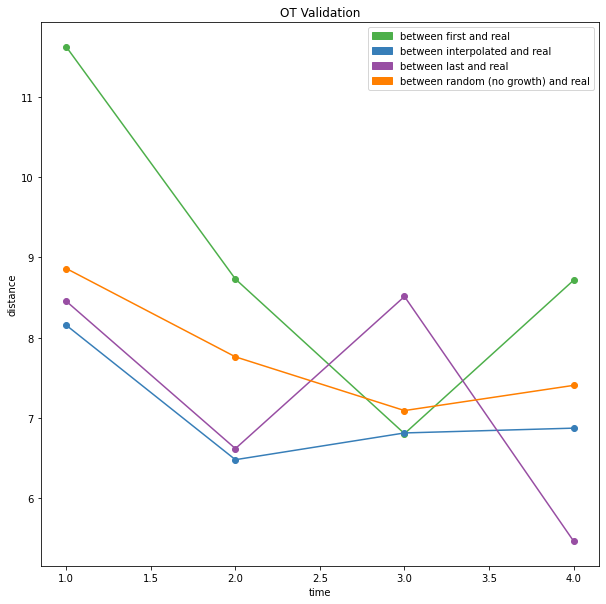

In [418]:
# read in and plot results
all_triplets_stats_gs = pd.read_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_stats_gs.txt')
wot.graphics.plot_ot_validation_summary_stats(all_triplets_stats_gs)

In [419]:
ot_model_val_gs_3 = wot.ot.OTModel(adata_gs, growth_rate_field='g2',growth_iters = 3) 


In [420]:
all_triplets_summary_gs_3 = wot.ot.compute_validation_summary(ot_model_val_gs_3)

# # save results
all_triplets_summary_gs_3.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_gs_3.txt')
all_triplets_stats_gs_3 = all_triplets_summary_gs_3.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std])
all_triplets_stats_gs_3.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_stats_gs_3.txt')

/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. P

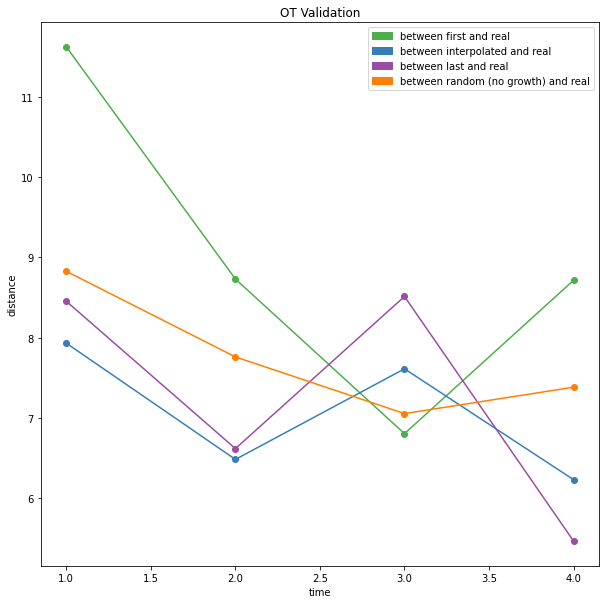

In [421]:
# read in and plot results
all_triplets_stats_gs_3 = pd.read_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_stats_gs_3.txt')
wot.graphics.plot_ot_validation_summary_stats(all_triplets_stats_gs_3)

# Validation without growth rate

In [230]:
ot_model_val = wot.ot.OTModel(adata, growth_rate_field='g2',growth_iters = 1) 


In [231]:
all_triplets_summary = wot.ot.compute_validation_summary(ot_model_val)

# # save results
all_triplets_summary.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary.txt')
all_triplets_stats = all_triplets_summary.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std])
all_triplets_stats.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_stats.txt')

/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. P

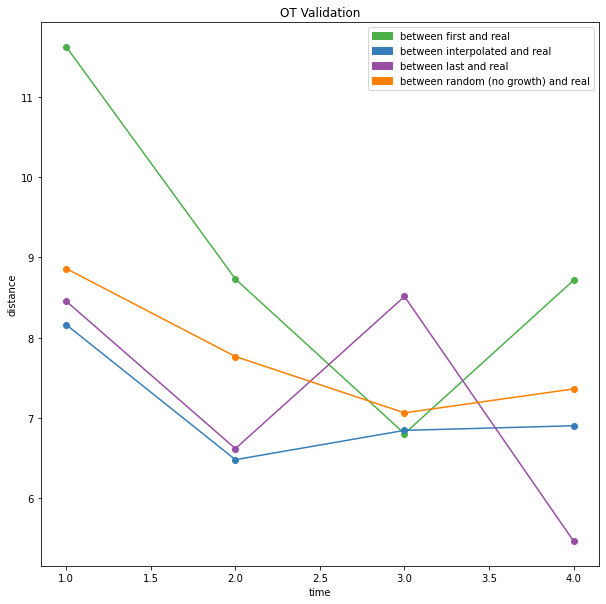

In [237]:
# read in and plot results
all_triplets_stats = pd.read_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_stats.txt')
wot.graphics.plot_ot_validation_summary_stats(all_triplets_stats)

/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. P

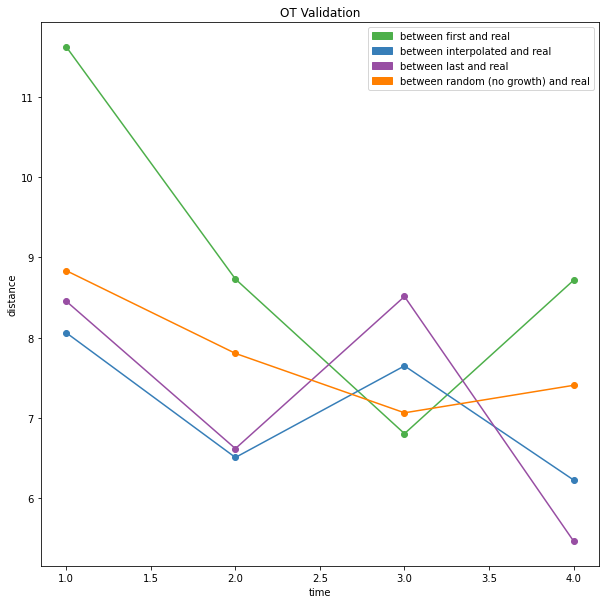

In [434]:
ot_model_val_3 = wot.ot.OTModel(adata, growth_rate_field='g2',growth_iters = 3) 

all_triplets_summary_3 = wot.ot.compute_validation_summary(ot_model_val_3)

# # save results
all_triplets_summary_3.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_3.txt')
all_triplets_stats_3 = all_triplets_summary_3.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std])
all_triplets_stats_3.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_stats_3.txt')
wot.graphics.plot_ot_validation_summary_stats(all_triplets_stats_3)